In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/ISAT.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,0.397252,0.304983,0.296754,0.507656,0.759883,0.226979,0.119758,0.238885,0.716075,0.013412,0.0,0.5,0.5,-1.0,0.572200,0.066667,0.576923,0.463652
2012-10-18,0.420155,0.322722,0.297598,-0.055799,0.568882,0.130815,0.044615,0.165768,0.614341,0.054348,0.5,0.5,0.5,-1.0,0.577598,0.133333,0.576923,0.445922
2012-10-19,0.425245,0.339194,0.297598,-0.041011,0.568882,0.130815,0.044615,-0.332244,0.651859,0.162847,1.0,0.5,0.5,-1.0,0.582996,0.200000,0.576923,0.445922
2012-10-22,0.422700,0.359467,0.303503,-0.125566,0.894453,0.403929,0.271806,0.016637,0.624550,0.620206,-1.0,0.5,0.5,-1.0,0.599190,0.400000,0.615385,0.499113
2012-10-23,0.432880,0.379740,0.317845,0.222244,0.668513,0.293893,0.189047,0.239768,0.613663,0.883282,-0.5,0.5,0.5,-1.0,0.604588,0.466667,0.615385,0.481383


### Plot the Close price - our target

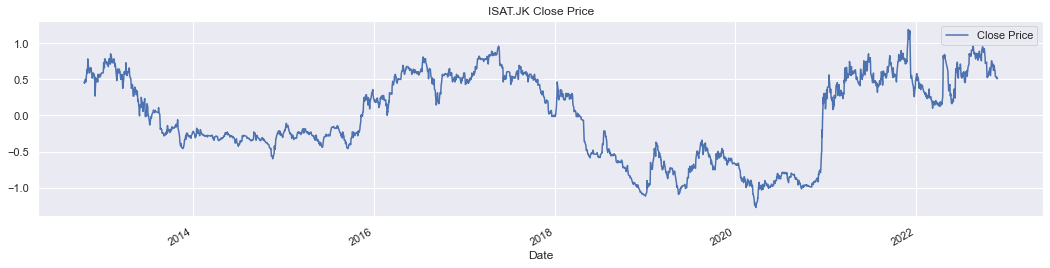

In [3]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('ISAT.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set
- Train: 17 Oct 2012 - 17 Oct 2022
- Validation = 18 Oct 2022 - 25 Nov 2022

In [4]:
len(df['2012-10-17':'2022-10-17'])

2480

In [5]:
train_len = len(df['2012-10-17':'2022-10-17'])
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [7]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.77179
[1]	validation_0-rmse:0.76426
[2]	validation_0-rmse:0.75680
[3]	validation_0-rmse:0.74942
[4]	validation_0-rmse:0.74212
[5]	validation_0-rmse:0.73489
[6]	validation_0-rmse:0.72773
[7]	validation_0-rmse:0.72065
[8]	validation_0-rmse:0.71364
[9]	validation_0-rmse:0.70670
[10]	validation_0-rmse:0.69983
[11]	validation_0-rmse:0.69303
[12]	validation_0-rmse:0.68629
[13]	validation_0-rmse:0.67960
[14]	validation_0-rmse:0.67299
[15]	validation_0-rmse:0.66646
[16]	validation_0-rmse:0.65997
[17]	validation_0-rmse:0.65355
[18]	validation_0-rmse:0.64721
[19]	validation_0-rmse:0.64095
[20]	validation_0-rmse:0.63472
[21]	validation_0-rmse:0.62855
[22]	validation_0-rmse:0.62246
[23]	validation_0-rmse:0.61640
[24]	validation_0-rmse:0.61043
[25]	validation_0-rmse:0.60449
[26]	validation_0-rmse:0.59864
[27]	validation_0-rmse:0.59282
[28]	validation_0-rmse:0.58709
[29]	validation_0-rmse:0.58138
[30]	validation_0-rmse:0.57576
[31]	validation_0-rmse:0.57022
[32]	validation_0-

[260]	validation_0-rmse:0.07704
[261]	validation_0-rmse:0.07654
[262]	validation_0-rmse:0.07604
[263]	validation_0-rmse:0.07555
[264]	validation_0-rmse:0.07505
[265]	validation_0-rmse:0.07456
[266]	validation_0-rmse:0.07409
[267]	validation_0-rmse:0.07362
[268]	validation_0-rmse:0.07315
[269]	validation_0-rmse:0.07268
[270]	validation_0-rmse:0.07223
[271]	validation_0-rmse:0.07177
[272]	validation_0-rmse:0.07133
[273]	validation_0-rmse:0.07087
[274]	validation_0-rmse:0.07042
[275]	validation_0-rmse:0.07001
[276]	validation_0-rmse:0.06957
[277]	validation_0-rmse:0.06916
[278]	validation_0-rmse:0.06873
[279]	validation_0-rmse:0.06830
[280]	validation_0-rmse:0.06790
[281]	validation_0-rmse:0.06748
[282]	validation_0-rmse:0.06709
[283]	validation_0-rmse:0.06667
[284]	validation_0-rmse:0.06627
[285]	validation_0-rmse:0.06589
[286]	validation_0-rmse:0.06549
[287]	validation_0-rmse:0.06510
[288]	validation_0-rmse:0.06473
[289]	validation_0-rmse:0.06436
[290]	validation_0-rmse:0.06400
[291]	va

[17]	validation_0-rmse:0.65236
[18]	validation_0-rmse:0.64596
[19]	validation_0-rmse:0.63963
[20]	validation_0-rmse:0.63336
[21]	validation_0-rmse:0.62715
[22]	validation_0-rmse:0.62099
[23]	validation_0-rmse:0.61491
[24]	validation_0-rmse:0.60888
[25]	validation_0-rmse:0.60291
[26]	validation_0-rmse:0.59701
[27]	validation_0-rmse:0.59117
[28]	validation_0-rmse:0.58539
[29]	validation_0-rmse:0.57966
[30]	validation_0-rmse:0.57400
[31]	validation_0-rmse:0.56839
[32]	validation_0-rmse:0.56284
[33]	validation_0-rmse:0.55734
[34]	validation_0-rmse:0.55191
[35]	validation_0-rmse:0.54653
[36]	validation_0-rmse:0.54120
[37]	validation_0-rmse:0.53593
[38]	validation_0-rmse:0.53071
[39]	validation_0-rmse:0.52553
[40]	validation_0-rmse:0.52041
[41]	validation_0-rmse:0.51535
[42]	validation_0-rmse:0.51034
[43]	validation_0-rmse:0.50538
[44]	validation_0-rmse:0.50046
[45]	validation_0-rmse:0.49560
[46]	validation_0-rmse:0.49078
[47]	validation_0-rmse:0.48602
[48]	validation_0-rmse:0.48130
[49]	val

[276]	validation_0-rmse:0.06948
[277]	validation_0-rmse:0.06906
[278]	validation_0-rmse:0.06864
[279]	validation_0-rmse:0.06822
[280]	validation_0-rmse:0.06781
[281]	validation_0-rmse:0.06740
[282]	validation_0-rmse:0.06700
[283]	validation_0-rmse:0.06661
[284]	validation_0-rmse:0.06622
[285]	validation_0-rmse:0.06583
[286]	validation_0-rmse:0.06545
[287]	validation_0-rmse:0.06507
[288]	validation_0-rmse:0.06470
[289]	validation_0-rmse:0.06433
[290]	validation_0-rmse:0.06397
[291]	validation_0-rmse:0.06360
[292]	validation_0-rmse:0.06325
[293]	validation_0-rmse:0.06289
[294]	validation_0-rmse:0.06254
[295]	validation_0-rmse:0.06221
[296]	validation_0-rmse:0.06185
[297]	validation_0-rmse:0.06152
[298]	validation_0-rmse:0.06119
[299]	validation_0-rmse:0.06086
[300]	validation_0-rmse:0.06053
[301]	validation_0-rmse:0.06021
[302]	validation_0-rmse:0.05990
[303]	validation_0-rmse:0.05958
[304]	validation_0-rmse:0.05927
[305]	validation_0-rmse:0.05896
[306]	validation_0-rmse:0.05866
[307]	va

[34]	validation_0-rmse:0.55429
[35]	validation_0-rmse:0.54897
[36]	validation_0-rmse:0.54368
[37]	validation_0-rmse:0.53844
[38]	validation_0-rmse:0.53327
[39]	validation_0-rmse:0.52813
[40]	validation_0-rmse:0.52306
[41]	validation_0-rmse:0.51804
[42]	validation_0-rmse:0.51307
[43]	validation_0-rmse:0.50816
[44]	validation_0-rmse:0.50330
[45]	validation_0-rmse:0.49848
[46]	validation_0-rmse:0.49370
[47]	validation_0-rmse:0.48897
[48]	validation_0-rmse:0.48426
[49]	validation_0-rmse:0.47963
[50]	validation_0-rmse:0.47501
[51]	validation_0-rmse:0.47044
[52]	validation_0-rmse:0.46594
[53]	validation_0-rmse:0.46146
[54]	validation_0-rmse:0.45706
[55]	validation_0-rmse:0.45268
[56]	validation_0-rmse:0.44833
[57]	validation_0-rmse:0.44407
[58]	validation_0-rmse:0.43980
[59]	validation_0-rmse:0.43561
[60]	validation_0-rmse:0.43143
[61]	validation_0-rmse:0.42733
[62]	validation_0-rmse:0.42323
[63]	validation_0-rmse:0.41917
[64]	validation_0-rmse:0.41521
[65]	validation_0-rmse:0.41122
[66]	val

[293]	validation_0-rmse:0.06338
[294]	validation_0-rmse:0.06302
[295]	validation_0-rmse:0.06266
[296]	validation_0-rmse:0.06230
[297]	validation_0-rmse:0.06196
[298]	validation_0-rmse:0.06160
[299]	validation_0-rmse:0.06126
[300]	validation_0-rmse:0.06092
[301]	validation_0-rmse:0.06058
[302]	validation_0-rmse:0.06026
[303]	validation_0-rmse:0.05993
[304]	validation_0-rmse:0.05960
[305]	validation_0-rmse:0.05928
[306]	validation_0-rmse:0.05896
[307]	validation_0-rmse:0.05865
[308]	validation_0-rmse:0.05834
[309]	validation_0-rmse:0.05803
[310]	validation_0-rmse:0.05773
[311]	validation_0-rmse:0.05743
[312]	validation_0-rmse:0.05713
[313]	validation_0-rmse:0.05684
[314]	validation_0-rmse:0.05654
[315]	validation_0-rmse:0.05626
[316]	validation_0-rmse:0.05598
[317]	validation_0-rmse:0.05570
[318]	validation_0-rmse:0.05543
[319]	validation_0-rmse:0.05515
[320]	validation_0-rmse:0.05486
[321]	validation_0-rmse:0.05458
[322]	validation_0-rmse:0.05431
[323]	validation_0-rmse:0.05403
[324]	va

[51]	validation_0-rmse:0.47834
[52]	validation_0-rmse:0.47393
[53]	validation_0-rmse:0.46966
[54]	validation_0-rmse:0.46529
[55]	validation_0-rmse:0.46110
[56]	validation_0-rmse:0.45687
[57]	validation_0-rmse:0.45267
[58]	validation_0-rmse:0.44854
[59]	validation_0-rmse:0.44443
[60]	validation_0-rmse:0.44037
[61]	validation_0-rmse:0.43642
[62]	validation_0-rmse:0.43244
[63]	validation_0-rmse:0.42859
[64]	validation_0-rmse:0.42476
[65]	validation_0-rmse:0.42089
[66]	validation_0-rmse:0.41707
[67]	validation_0-rmse:0.41335
[68]	validation_0-rmse:0.40969
[69]	validation_0-rmse:0.40597
[70]	validation_0-rmse:0.40239
[71]	validation_0-rmse:0.39881
[72]	validation_0-rmse:0.39520
[73]	validation_0-rmse:0.39164
[74]	validation_0-rmse:0.38819
[75]	validation_0-rmse:0.38476
[76]	validation_0-rmse:0.38130
[77]	validation_0-rmse:0.37788
[78]	validation_0-rmse:0.37455
[79]	validation_0-rmse:0.37119
[80]	validation_0-rmse:0.36787
[81]	validation_0-rmse:0.36457
[82]	validation_0-rmse:0.36139
[83]	val

[309]	validation_0-rmse:0.07639
[310]	validation_0-rmse:0.07613
[311]	validation_0-rmse:0.07576
[312]	validation_0-rmse:0.07542
[313]	validation_0-rmse:0.07507
[314]	validation_0-rmse:0.07482
[315]	validation_0-rmse:0.07446
[316]	validation_0-rmse:0.07411
[317]	validation_0-rmse:0.07387
[318]	validation_0-rmse:0.07350
[319]	validation_0-rmse:0.07318
[320]	validation_0-rmse:0.07284
[321]	validation_0-rmse:0.07247
[322]	validation_0-rmse:0.07225
[323]	validation_0-rmse:0.07189
[324]	validation_0-rmse:0.07155
[325]	validation_0-rmse:0.07123
[326]	validation_0-rmse:0.07104
[327]	validation_0-rmse:0.07073
[328]	validation_0-rmse:0.07039
[329]	validation_0-rmse:0.07020
[330]	validation_0-rmse:0.06990
[331]	validation_0-rmse:0.06962
[332]	validation_0-rmse:0.06944
[333]	validation_0-rmse:0.06913
[334]	validation_0-rmse:0.06895
[335]	validation_0-rmse:0.06865
[336]	validation_0-rmse:0.06833
[337]	validation_0-rmse:0.06813
[338]	validation_0-rmse:0.06783
[339]	validation_0-rmse:0.06766
[340]	va

[68]	validation_0-rmse:0.39691
[69]	validation_0-rmse:0.39312
[70]	validation_0-rmse:0.38934
[71]	validation_0-rmse:0.38562
[72]	validation_0-rmse:0.38193
[73]	validation_0-rmse:0.37828
[74]	validation_0-rmse:0.37466
[75]	validation_0-rmse:0.37109
[76]	validation_0-rmse:0.36755
[77]	validation_0-rmse:0.36404
[78]	validation_0-rmse:0.36057
[79]	validation_0-rmse:0.35714
[80]	validation_0-rmse:0.35374
[81]	validation_0-rmse:0.35037
[82]	validation_0-rmse:0.34704
[83]	validation_0-rmse:0.34375
[84]	validation_0-rmse:0.34048
[85]	validation_0-rmse:0.33725
[86]	validation_0-rmse:0.33406
[87]	validation_0-rmse:0.33090
[88]	validation_0-rmse:0.32778
[89]	validation_0-rmse:0.32468
[90]	validation_0-rmse:0.32161
[91]	validation_0-rmse:0.31858
[92]	validation_0-rmse:0.31557
[93]	validation_0-rmse:0.31259
[94]	validation_0-rmse:0.30966
[95]	validation_0-rmse:0.30676
[96]	validation_0-rmse:0.30387
[97]	validation_0-rmse:0.30102
[98]	validation_0-rmse:0.29821
[99]	validation_0-rmse:0.29542
[100]	va

[326]	validation_0-rmse:0.06224
[327]	validation_0-rmse:0.06203
[328]	validation_0-rmse:0.06183
[329]	validation_0-rmse:0.06163
[330]	validation_0-rmse:0.06143
[331]	validation_0-rmse:0.06122
[332]	validation_0-rmse:0.06103
[333]	validation_0-rmse:0.06084
[334]	validation_0-rmse:0.06066
[335]	validation_0-rmse:0.06047
[336]	validation_0-rmse:0.06028
[337]	validation_0-rmse:0.06009
[338]	validation_0-rmse:0.05992
[339]	validation_0-rmse:0.05974
[340]	validation_0-rmse:0.05956
[341]	validation_0-rmse:0.05937
[342]	validation_0-rmse:0.05921
[343]	validation_0-rmse:0.05903
[344]	validation_0-rmse:0.05887
[345]	validation_0-rmse:0.05870
[346]	validation_0-rmse:0.05853
[347]	validation_0-rmse:0.05837
[348]	validation_0-rmse:0.05821
[349]	validation_0-rmse:0.05804
[350]	validation_0-rmse:0.05788
[351]	validation_0-rmse:0.05772
[352]	validation_0-rmse:0.05757
[353]	validation_0-rmse:0.05742
[354]	validation_0-rmse:0.05727
[355]	validation_0-rmse:0.05712
[356]	validation_0-rmse:0.05697
[357]	va

[85]	validation_0-rmse:0.33913
[86]	validation_0-rmse:0.33586
[87]	validation_0-rmse:0.33270
[88]	validation_0-rmse:0.32955
[89]	validation_0-rmse:0.32639
[90]	validation_0-rmse:0.32330
[91]	validation_0-rmse:0.32020
[92]	validation_0-rmse:0.31719
[93]	validation_0-rmse:0.31416
[94]	validation_0-rmse:0.31121
[95]	validation_0-rmse:0.30824
[96]	validation_0-rmse:0.30535
[97]	validation_0-rmse:0.30244
[98]	validation_0-rmse:0.29961
[99]	validation_0-rmse:0.29677
[100]	validation_0-rmse:0.29400
[101]	validation_0-rmse:0.29120
[102]	validation_0-rmse:0.28848
[103]	validation_0-rmse:0.28580
[104]	validation_0-rmse:0.28309
[105]	validation_0-rmse:0.28046
[106]	validation_0-rmse:0.27781
[107]	validation_0-rmse:0.27523
[108]	validation_0-rmse:0.27265
[109]	validation_0-rmse:0.27008
[110]	validation_0-rmse:0.26758
[111]	validation_0-rmse:0.26507
[112]	validation_0-rmse:0.26262
[113]	validation_0-rmse:0.26020
[114]	validation_0-rmse:0.25775
[115]	validation_0-rmse:0.25539
[116]	validation_0-rmse

[342]	validation_0-rmse:0.04920
[343]	validation_0-rmse:0.04899
[344]	validation_0-rmse:0.04878
[345]	validation_0-rmse:0.04857
[346]	validation_0-rmse:0.04836
[347]	validation_0-rmse:0.04818
[348]	validation_0-rmse:0.04797
[349]	validation_0-rmse:0.04778
[350]	validation_0-rmse:0.04761
[351]	validation_0-rmse:0.04741
[352]	validation_0-rmse:0.04722
[353]	validation_0-rmse:0.04703
[354]	validation_0-rmse:0.04686
[355]	validation_0-rmse:0.04667
[356]	validation_0-rmse:0.04649
[357]	validation_0-rmse:0.04632
[358]	validation_0-rmse:0.04614
[359]	validation_0-rmse:0.04598
[360]	validation_0-rmse:0.04581
[361]	validation_0-rmse:0.04564
[362]	validation_0-rmse:0.04546
[363]	validation_0-rmse:0.04530
[364]	validation_0-rmse:0.04515
[365]	validation_0-rmse:0.04498
[366]	validation_0-rmse:0.04482
[367]	validation_0-rmse:0.04466
[368]	validation_0-rmse:0.04450
[369]	validation_0-rmse:0.04434
[370]	validation_0-rmse:0.04419
[371]	validation_0-rmse:0.04403
[372]	validation_0-rmse:0.04389
[373]	va

[599]	validation_0-rmse:0.02980
[0]	validation_0-rmse:0.77171
[1]	validation_0-rmse:0.76411
[2]	validation_0-rmse:0.75658
[3]	validation_0-rmse:0.74914
[4]	validation_0-rmse:0.74176
[5]	validation_0-rmse:0.73446
[6]	validation_0-rmse:0.72722
[7]	validation_0-rmse:0.72007
[8]	validation_0-rmse:0.71300
[9]	validation_0-rmse:0.70599
[10]	validation_0-rmse:0.69904
[11]	validation_0-rmse:0.69217
[12]	validation_0-rmse:0.68537
[13]	validation_0-rmse:0.67863
[14]	validation_0-rmse:0.67197
[15]	validation_0-rmse:0.66537
[16]	validation_0-rmse:0.65883
[17]	validation_0-rmse:0.65236
[18]	validation_0-rmse:0.64596
[19]	validation_0-rmse:0.63963
[20]	validation_0-rmse:0.63336
[21]	validation_0-rmse:0.62715
[22]	validation_0-rmse:0.62099
[23]	validation_0-rmse:0.61491
[24]	validation_0-rmse:0.60888
[25]	validation_0-rmse:0.60291
[26]	validation_0-rmse:0.59701
[27]	validation_0-rmse:0.59117
[28]	validation_0-rmse:0.58539
[29]	validation_0-rmse:0.57966
[30]	validation_0-rmse:0.57400
[31]	validation_0

[259]	validation_0-rmse:0.07740
[260]	validation_0-rmse:0.07689
[261]	validation_0-rmse:0.07639
[262]	validation_0-rmse:0.07589
[263]	validation_0-rmse:0.07539
[264]	validation_0-rmse:0.07491
[265]	validation_0-rmse:0.07445
[266]	validation_0-rmse:0.07396
[267]	validation_0-rmse:0.07350
[268]	validation_0-rmse:0.07303
[269]	validation_0-rmse:0.07257
[270]	validation_0-rmse:0.07211
[271]	validation_0-rmse:0.07166
[272]	validation_0-rmse:0.07122
[273]	validation_0-rmse:0.07077
[274]	validation_0-rmse:0.07034
[275]	validation_0-rmse:0.06991
[276]	validation_0-rmse:0.06948
[277]	validation_0-rmse:0.06906
[278]	validation_0-rmse:0.06864
[279]	validation_0-rmse:0.06822
[280]	validation_0-rmse:0.06781
[281]	validation_0-rmse:0.06740
[282]	validation_0-rmse:0.06700
[283]	validation_0-rmse:0.06661
[284]	validation_0-rmse:0.06622
[285]	validation_0-rmse:0.06583
[286]	validation_0-rmse:0.06545
[287]	validation_0-rmse:0.06507
[288]	validation_0-rmse:0.06470
[289]	validation_0-rmse:0.06433
[290]	va

[516]	validation_0-rmse:0.03419
[517]	validation_0-rmse:0.03416
[518]	validation_0-rmse:0.03413
[519]	validation_0-rmse:0.03409
[520]	validation_0-rmse:0.03405
[521]	validation_0-rmse:0.03401
[522]	validation_0-rmse:0.03397
[523]	validation_0-rmse:0.03394
[524]	validation_0-rmse:0.03390
[525]	validation_0-rmse:0.03387
[526]	validation_0-rmse:0.03384
[527]	validation_0-rmse:0.03381
[528]	validation_0-rmse:0.03378
[529]	validation_0-rmse:0.03374
[530]	validation_0-rmse:0.03371
[531]	validation_0-rmse:0.03367
[532]	validation_0-rmse:0.03364
[533]	validation_0-rmse:0.03361
[534]	validation_0-rmse:0.03358
[535]	validation_0-rmse:0.03355
[536]	validation_0-rmse:0.03352
[537]	validation_0-rmse:0.03349
[538]	validation_0-rmse:0.03346
[539]	validation_0-rmse:0.03344
[540]	validation_0-rmse:0.03341
[541]	validation_0-rmse:0.03337
[542]	validation_0-rmse:0.03334
[543]	validation_0-rmse:0.03331
[544]	validation_0-rmse:0.03329
[545]	validation_0-rmse:0.03326
[546]	validation_0-rmse:0.03322
[547]	va

[176]	validation_0-rmse:0.14913
[177]	validation_0-rmse:0.14784
[178]	validation_0-rmse:0.14661
[179]	validation_0-rmse:0.14535
[180]	validation_0-rmse:0.14415
[181]	validation_0-rmse:0.14297
[182]	validation_0-rmse:0.14174
[183]	validation_0-rmse:0.14058
[184]	validation_0-rmse:0.13938
[185]	validation_0-rmse:0.13823
[186]	validation_0-rmse:0.13711
[187]	validation_0-rmse:0.13594
[188]	validation_0-rmse:0.13483
[189]	validation_0-rmse:0.13372
[190]	validation_0-rmse:0.13259
[191]	validation_0-rmse:0.13153
[192]	validation_0-rmse:0.13042
[193]	validation_0-rmse:0.12936
[194]	validation_0-rmse:0.12827
[195]	validation_0-rmse:0.12723
[196]	validation_0-rmse:0.12618
[197]	validation_0-rmse:0.12512
[198]	validation_0-rmse:0.12411
[199]	validation_0-rmse:0.12309
[200]	validation_0-rmse:0.12210
[201]	validation_0-rmse:0.12109
[202]	validation_0-rmse:0.12013
[203]	validation_0-rmse:0.11918
[204]	validation_0-rmse:0.11824
[205]	validation_0-rmse:0.11731
[206]	validation_0-rmse:0.11638
[207]	va

[433]	validation_0-rmse:0.03679
[434]	validation_0-rmse:0.03671
[435]	validation_0-rmse:0.03662
[436]	validation_0-rmse:0.03654
[437]	validation_0-rmse:0.03646
[438]	validation_0-rmse:0.03638
[439]	validation_0-rmse:0.03631
[440]	validation_0-rmse:0.03624
[441]	validation_0-rmse:0.03616
[442]	validation_0-rmse:0.03608
[443]	validation_0-rmse:0.03601
[444]	validation_0-rmse:0.03594
[445]	validation_0-rmse:0.03587
[446]	validation_0-rmse:0.03580
[447]	validation_0-rmse:0.03572
[448]	validation_0-rmse:0.03565
[449]	validation_0-rmse:0.03558
[450]	validation_0-rmse:0.03551
[451]	validation_0-rmse:0.03544
[452]	validation_0-rmse:0.03538
[453]	validation_0-rmse:0.03531
[454]	validation_0-rmse:0.03525
[455]	validation_0-rmse:0.03519
[456]	validation_0-rmse:0.03513
[457]	validation_0-rmse:0.03507
[458]	validation_0-rmse:0.03500
[459]	validation_0-rmse:0.03495
[460]	validation_0-rmse:0.03489
[461]	validation_0-rmse:0.03483
[462]	validation_0-rmse:0.03477
[463]	validation_0-rmse:0.03471
[464]	va

[93]	validation_0-rmse:0.32784
[94]	validation_0-rmse:0.32500
[95]	validation_0-rmse:0.32215
[96]	validation_0-rmse:0.31938
[97]	validation_0-rmse:0.31668
[98]	validation_0-rmse:0.31410
[99]	validation_0-rmse:0.31136
[100]	validation_0-rmse:0.30874
[101]	validation_0-rmse:0.30605
[102]	validation_0-rmse:0.30342
[103]	validation_0-rmse:0.30087
[104]	validation_0-rmse:0.29838
[105]	validation_0-rmse:0.29589
[106]	validation_0-rmse:0.29343
[107]	validation_0-rmse:0.29098
[108]	validation_0-rmse:0.28847
[109]	validation_0-rmse:0.28596
[110]	validation_0-rmse:0.28358
[111]	validation_0-rmse:0.28124
[112]	validation_0-rmse:0.27888
[113]	validation_0-rmse:0.27659
[114]	validation_0-rmse:0.27431
[115]	validation_0-rmse:0.27205
[116]	validation_0-rmse:0.26981
[117]	validation_0-rmse:0.26748
[118]	validation_0-rmse:0.26537
[119]	validation_0-rmse:0.26321
[120]	validation_0-rmse:0.26098
[121]	validation_0-rmse:0.25882
[122]	validation_0-rmse:0.25670
[123]	validation_0-rmse:0.25463
[124]	validatio

[350]	validation_0-rmse:0.06492
[351]	validation_0-rmse:0.06475
[352]	validation_0-rmse:0.06447
[353]	validation_0-rmse:0.06433
[354]	validation_0-rmse:0.06407
[355]	validation_0-rmse:0.06381
[356]	validation_0-rmse:0.06365
[357]	validation_0-rmse:0.06338
[358]	validation_0-rmse:0.06311
[359]	validation_0-rmse:0.06286
[360]	validation_0-rmse:0.06267
[361]	validation_0-rmse:0.06253
[362]	validation_0-rmse:0.06229
[363]	validation_0-rmse:0.06206
[364]	validation_0-rmse:0.06191
[365]	validation_0-rmse:0.06167
[366]	validation_0-rmse:0.06148
[367]	validation_0-rmse:0.06126
[368]	validation_0-rmse:0.06103
[369]	validation_0-rmse:0.06079
[370]	validation_0-rmse:0.06057
[371]	validation_0-rmse:0.06043
[372]	validation_0-rmse:0.06019
[373]	validation_0-rmse:0.06006
[374]	validation_0-rmse:0.05985
[375]	validation_0-rmse:0.05972
[376]	validation_0-rmse:0.05949
[377]	validation_0-rmse:0.05931
[378]	validation_0-rmse:0.05917
[379]	validation_0-rmse:0.05895
[380]	validation_0-rmse:0.05876
[381]	va

[7]	validation_0-rmse:0.72014
[8]	validation_0-rmse:0.71307
[9]	validation_0-rmse:0.70607
[10]	validation_0-rmse:0.69913
[11]	validation_0-rmse:0.69227
[12]	validation_0-rmse:0.68548
[13]	validation_0-rmse:0.67876
[14]	validation_0-rmse:0.67210
[15]	validation_0-rmse:0.66552
[16]	validation_0-rmse:0.65900
[17]	validation_0-rmse:0.65255
[18]	validation_0-rmse:0.64615
[19]	validation_0-rmse:0.63984
[20]	validation_0-rmse:0.63358
[21]	validation_0-rmse:0.62738
[22]	validation_0-rmse:0.62125
[23]	validation_0-rmse:0.61517
[24]	validation_0-rmse:0.60917
[25]	validation_0-rmse:0.60321
[26]	validation_0-rmse:0.59732
[27]	validation_0-rmse:0.59149
[28]	validation_0-rmse:0.58572
[29]	validation_0-rmse:0.58001
[30]	validation_0-rmse:0.57435
[31]	validation_0-rmse:0.56876
[32]	validation_0-rmse:0.56322
[33]	validation_0-rmse:0.55773
[34]	validation_0-rmse:0.55230
[35]	validation_0-rmse:0.54692
[36]	validation_0-rmse:0.54160
[37]	validation_0-rmse:0.53633
[38]	validation_0-rmse:0.53111
[39]	valida

[267]	validation_0-rmse:0.08018
[268]	validation_0-rmse:0.07975
[269]	validation_0-rmse:0.07933
[270]	validation_0-rmse:0.07891
[271]	validation_0-rmse:0.07850
[272]	validation_0-rmse:0.07808
[273]	validation_0-rmse:0.07767
[274]	validation_0-rmse:0.07728
[275]	validation_0-rmse:0.07689
[276]	validation_0-rmse:0.07650
[277]	validation_0-rmse:0.07613
[278]	validation_0-rmse:0.07576
[279]	validation_0-rmse:0.07538
[280]	validation_0-rmse:0.07502
[281]	validation_0-rmse:0.07466
[282]	validation_0-rmse:0.07430
[283]	validation_0-rmse:0.07395
[284]	validation_0-rmse:0.07360
[285]	validation_0-rmse:0.07324
[286]	validation_0-rmse:0.07290
[287]	validation_0-rmse:0.07256
[288]	validation_0-rmse:0.07223
[289]	validation_0-rmse:0.07190
[290]	validation_0-rmse:0.07158
[291]	validation_0-rmse:0.07125
[292]	validation_0-rmse:0.07094
[293]	validation_0-rmse:0.07063
[294]	validation_0-rmse:0.07033
[295]	validation_0-rmse:0.07003
[296]	validation_0-rmse:0.06972
[297]	validation_0-rmse:0.06942
[298]	va

[524]	validation_0-rmse:0.04486
[525]	validation_0-rmse:0.04480
[526]	validation_0-rmse:0.04477
[527]	validation_0-rmse:0.04473
[528]	validation_0-rmse:0.04470
[529]	validation_0-rmse:0.04467
[530]	validation_0-rmse:0.04463
[531]	validation_0-rmse:0.04458
[532]	validation_0-rmse:0.04455
[533]	validation_0-rmse:0.04452
[534]	validation_0-rmse:0.04449
[535]	validation_0-rmse:0.04444
[536]	validation_0-rmse:0.04442
[537]	validation_0-rmse:0.04438
[538]	validation_0-rmse:0.04435
[539]	validation_0-rmse:0.04431
[540]	validation_0-rmse:0.04427
[541]	validation_0-rmse:0.04421
[542]	validation_0-rmse:0.04416
[543]	validation_0-rmse:0.04414
[544]	validation_0-rmse:0.04408
[545]	validation_0-rmse:0.04405
[546]	validation_0-rmse:0.04402
[547]	validation_0-rmse:0.04398
[548]	validation_0-rmse:0.04395
[549]	validation_0-rmse:0.04390
[550]	validation_0-rmse:0.04386
[551]	validation_0-rmse:0.04382
[552]	validation_0-rmse:0.04376
[553]	validation_0-rmse:0.04373
[554]	validation_0-rmse:0.04371
[555]	va

[184]	validation_0-rmse:0.13771
[185]	validation_0-rmse:0.13654
[186]	validation_0-rmse:0.13538
[187]	validation_0-rmse:0.13424
[188]	validation_0-rmse:0.13314
[189]	validation_0-rmse:0.13202
[190]	validation_0-rmse:0.13091
[191]	validation_0-rmse:0.12983
[192]	validation_0-rmse:0.12875
[193]	validation_0-rmse:0.12767
[194]	validation_0-rmse:0.12661
[195]	validation_0-rmse:0.12557
[196]	validation_0-rmse:0.12455
[197]	validation_0-rmse:0.12354
[198]	validation_0-rmse:0.12253
[199]	validation_0-rmse:0.12153
[200]	validation_0-rmse:0.12054
[201]	validation_0-rmse:0.11954
[202]	validation_0-rmse:0.11856
[203]	validation_0-rmse:0.11759
[204]	validation_0-rmse:0.11664
[205]	validation_0-rmse:0.11569
[206]	validation_0-rmse:0.11478
[207]	validation_0-rmse:0.11385
[208]	validation_0-rmse:0.11296
[209]	validation_0-rmse:0.11208
[210]	validation_0-rmse:0.11120
[211]	validation_0-rmse:0.11033
[212]	validation_0-rmse:0.10945
[213]	validation_0-rmse:0.10858
[214]	validation_0-rmse:0.10774
[215]	va

[441]	validation_0-rmse:0.03653
[442]	validation_0-rmse:0.03646
[443]	validation_0-rmse:0.03638
[444]	validation_0-rmse:0.03631
[445]	validation_0-rmse:0.03624
[446]	validation_0-rmse:0.03616
[447]	validation_0-rmse:0.03609
[448]	validation_0-rmse:0.03602
[449]	validation_0-rmse:0.03596
[450]	validation_0-rmse:0.03589
[451]	validation_0-rmse:0.03581
[452]	validation_0-rmse:0.03575
[453]	validation_0-rmse:0.03569
[454]	validation_0-rmse:0.03562
[455]	validation_0-rmse:0.03555
[456]	validation_0-rmse:0.03548
[457]	validation_0-rmse:0.03542
[458]	validation_0-rmse:0.03536
[459]	validation_0-rmse:0.03530
[460]	validation_0-rmse:0.03524
[461]	validation_0-rmse:0.03518
[462]	validation_0-rmse:0.03511
[463]	validation_0-rmse:0.03505
[464]	validation_0-rmse:0.03499
[465]	validation_0-rmse:0.03493
[466]	validation_0-rmse:0.03487
[467]	validation_0-rmse:0.03481
[468]	validation_0-rmse:0.03475
[469]	validation_0-rmse:0.03469
[470]	validation_0-rmse:0.03463
[471]	validation_0-rmse:0.03458
[472]	va

[698]	validation_0-rmse:0.02782
[699]	validation_0-rmse:0.02780
[0]	validation_0-rmse:0.77171
[1]	validation_0-rmse:0.76411
[2]	validation_0-rmse:0.75658
[3]	validation_0-rmse:0.74914
[4]	validation_0-rmse:0.74176
[5]	validation_0-rmse:0.73446
[6]	validation_0-rmse:0.72722
[7]	validation_0-rmse:0.72007
[8]	validation_0-rmse:0.71300
[9]	validation_0-rmse:0.70599
[10]	validation_0-rmse:0.69904
[11]	validation_0-rmse:0.69217
[12]	validation_0-rmse:0.68537
[13]	validation_0-rmse:0.67863
[14]	validation_0-rmse:0.67197
[15]	validation_0-rmse:0.66537
[16]	validation_0-rmse:0.65883
[17]	validation_0-rmse:0.65236
[18]	validation_0-rmse:0.64596
[19]	validation_0-rmse:0.63963
[20]	validation_0-rmse:0.63336
[21]	validation_0-rmse:0.62715
[22]	validation_0-rmse:0.62099
[23]	validation_0-rmse:0.61491
[24]	validation_0-rmse:0.60888
[25]	validation_0-rmse:0.60291
[26]	validation_0-rmse:0.59701
[27]	validation_0-rmse:0.59117
[28]	validation_0-rmse:0.58539
[29]	validation_0-rmse:0.57966
[30]	validation_

[258]	validation_0-rmse:0.07790
[259]	validation_0-rmse:0.07740
[260]	validation_0-rmse:0.07689
[261]	validation_0-rmse:0.07639
[262]	validation_0-rmse:0.07589
[263]	validation_0-rmse:0.07539
[264]	validation_0-rmse:0.07491
[265]	validation_0-rmse:0.07445
[266]	validation_0-rmse:0.07396
[267]	validation_0-rmse:0.07350
[268]	validation_0-rmse:0.07303
[269]	validation_0-rmse:0.07257
[270]	validation_0-rmse:0.07211
[271]	validation_0-rmse:0.07166
[272]	validation_0-rmse:0.07122
[273]	validation_0-rmse:0.07077
[274]	validation_0-rmse:0.07034
[275]	validation_0-rmse:0.06991
[276]	validation_0-rmse:0.06948
[277]	validation_0-rmse:0.06906
[278]	validation_0-rmse:0.06864
[279]	validation_0-rmse:0.06822
[280]	validation_0-rmse:0.06781
[281]	validation_0-rmse:0.06740
[282]	validation_0-rmse:0.06700
[283]	validation_0-rmse:0.06661
[284]	validation_0-rmse:0.06622
[285]	validation_0-rmse:0.06583
[286]	validation_0-rmse:0.06545
[287]	validation_0-rmse:0.06507
[288]	validation_0-rmse:0.06470
[289]	va

[515]	validation_0-rmse:0.03423
[516]	validation_0-rmse:0.03419
[517]	validation_0-rmse:0.03416
[518]	validation_0-rmse:0.03413
[519]	validation_0-rmse:0.03409
[520]	validation_0-rmse:0.03405
[521]	validation_0-rmse:0.03401
[522]	validation_0-rmse:0.03397
[523]	validation_0-rmse:0.03394
[524]	validation_0-rmse:0.03390
[525]	validation_0-rmse:0.03387
[526]	validation_0-rmse:0.03384
[527]	validation_0-rmse:0.03381
[528]	validation_0-rmse:0.03378
[529]	validation_0-rmse:0.03374
[530]	validation_0-rmse:0.03371
[531]	validation_0-rmse:0.03367
[532]	validation_0-rmse:0.03364
[533]	validation_0-rmse:0.03361
[534]	validation_0-rmse:0.03358
[535]	validation_0-rmse:0.03355
[536]	validation_0-rmse:0.03352
[537]	validation_0-rmse:0.03349
[538]	validation_0-rmse:0.03346
[539]	validation_0-rmse:0.03344
[540]	validation_0-rmse:0.03341
[541]	validation_0-rmse:0.03337
[542]	validation_0-rmse:0.03334
[543]	validation_0-rmse:0.03331
[544]	validation_0-rmse:0.03329
[545]	validation_0-rmse:0.03326
[546]	va

[74]	validation_0-rmse:0.37734
[75]	validation_0-rmse:0.37377
[76]	validation_0-rmse:0.37021
[77]	validation_0-rmse:0.36672
[78]	validation_0-rmse:0.36323
[79]	validation_0-rmse:0.35978
[80]	validation_0-rmse:0.35640
[81]	validation_0-rmse:0.35301
[82]	validation_0-rmse:0.34969
[83]	validation_0-rmse:0.34640
[84]	validation_0-rmse:0.34315
[85]	validation_0-rmse:0.33990
[86]	validation_0-rmse:0.33671
[87]	validation_0-rmse:0.33352
[88]	validation_0-rmse:0.33041
[89]	validation_0-rmse:0.32728
[90]	validation_0-rmse:0.32423
[91]	validation_0-rmse:0.32117
[92]	validation_0-rmse:0.31818
[93]	validation_0-rmse:0.31517
[94]	validation_0-rmse:0.31223
[95]	validation_0-rmse:0.30932
[96]	validation_0-rmse:0.30645
[97]	validation_0-rmse:0.30360
[98]	validation_0-rmse:0.30076
[99]	validation_0-rmse:0.29797
[100]	validation_0-rmse:0.29522
[101]	validation_0-rmse:0.29250
[102]	validation_0-rmse:0.28981
[103]	validation_0-rmse:0.28710
[104]	validation_0-rmse:0.28447
[105]	validation_0-rmse:0.28186
[1

[331]	validation_0-rmse:0.05196
[332]	validation_0-rmse:0.05172
[333]	validation_0-rmse:0.05147
[334]	validation_0-rmse:0.05124
[335]	validation_0-rmse:0.05099
[336]	validation_0-rmse:0.05076
[337]	validation_0-rmse:0.05052
[338]	validation_0-rmse:0.05029
[339]	validation_0-rmse:0.05005
[340]	validation_0-rmse:0.04984
[341]	validation_0-rmse:0.04961
[342]	validation_0-rmse:0.04938
[343]	validation_0-rmse:0.04917
[344]	validation_0-rmse:0.04894
[345]	validation_0-rmse:0.04873
[346]	validation_0-rmse:0.04852
[347]	validation_0-rmse:0.04831
[348]	validation_0-rmse:0.04809
[349]	validation_0-rmse:0.04789
[350]	validation_0-rmse:0.04769
[351]	validation_0-rmse:0.04750
[352]	validation_0-rmse:0.04732
[353]	validation_0-rmse:0.04711
[354]	validation_0-rmse:0.04691
[355]	validation_0-rmse:0.04672
[356]	validation_0-rmse:0.04653
[357]	validation_0-rmse:0.04633
[358]	validation_0-rmse:0.04616
[359]	validation_0-rmse:0.04598
[360]	validation_0-rmse:0.04580
[361]	validation_0-rmse:0.04561
[362]	va

[588]	validation_0-rmse:0.03025
[589]	validation_0-rmse:0.03023
[590]	validation_0-rmse:0.03021
[591]	validation_0-rmse:0.03017
[592]	validation_0-rmse:0.03015
[593]	validation_0-rmse:0.03013
[594]	validation_0-rmse:0.03011
[595]	validation_0-rmse:0.03009
[596]	validation_0-rmse:0.03007
[597]	validation_0-rmse:0.03004
[598]	validation_0-rmse:0.03003
[599]	validation_0-rmse:0.03000
[600]	validation_0-rmse:0.02998
[601]	validation_0-rmse:0.02996
[602]	validation_0-rmse:0.02994
[603]	validation_0-rmse:0.02992
[604]	validation_0-rmse:0.02990
[605]	validation_0-rmse:0.02988
[606]	validation_0-rmse:0.02986
[607]	validation_0-rmse:0.02984
[608]	validation_0-rmse:0.02982
[609]	validation_0-rmse:0.02981
[610]	validation_0-rmse:0.02978
[611]	validation_0-rmse:0.02976
[612]	validation_0-rmse:0.02974
[613]	validation_0-rmse:0.02973
[614]	validation_0-rmse:0.02971
[615]	validation_0-rmse:0.02969
[616]	validation_0-rmse:0.02968
[617]	validation_0-rmse:0.02965
[618]	validation_0-rmse:0.02963
[619]	va

[148]	validation_0-rmse:0.20856
[149]	validation_0-rmse:0.20696
[150]	validation_0-rmse:0.20539
[151]	validation_0-rmse:0.20381
[152]	validation_0-rmse:0.20232
[153]	validation_0-rmse:0.20078
[154]	validation_0-rmse:0.19925
[155]	validation_0-rmse:0.19776
[156]	validation_0-rmse:0.19626
[157]	validation_0-rmse:0.19467
[158]	validation_0-rmse:0.19320
[159]	validation_0-rmse:0.19176
[160]	validation_0-rmse:0.19041
[161]	validation_0-rmse:0.18900
[162]	validation_0-rmse:0.18759
[163]	validation_0-rmse:0.18610
[164]	validation_0-rmse:0.18473
[165]	validation_0-rmse:0.18337
[166]	validation_0-rmse:0.18216
[167]	validation_0-rmse:0.18084
[168]	validation_0-rmse:0.17942
[169]	validation_0-rmse:0.17823
[170]	validation_0-rmse:0.17683
[171]	validation_0-rmse:0.17545
[172]	validation_0-rmse:0.17418
[173]	validation_0-rmse:0.17291
[174]	validation_0-rmse:0.17168
[175]	validation_0-rmse:0.17048
[176]	validation_0-rmse:0.16916
[177]	validation_0-rmse:0.16792
[178]	validation_0-rmse:0.16674
[179]	va

[405]	validation_0-rmse:0.05480
[406]	validation_0-rmse:0.05464
[407]	validation_0-rmse:0.05455
[408]	validation_0-rmse:0.05441
[409]	validation_0-rmse:0.05424
[410]	validation_0-rmse:0.05414
[411]	validation_0-rmse:0.05397
[412]	validation_0-rmse:0.05384
[413]	validation_0-rmse:0.05371
[414]	validation_0-rmse:0.05362
[415]	validation_0-rmse:0.05346
[416]	validation_0-rmse:0.05334
[417]	validation_0-rmse:0.05318
[418]	validation_0-rmse:0.05305
[419]	validation_0-rmse:0.05289
[420]	validation_0-rmse:0.05280
[421]	validation_0-rmse:0.05271
[422]	validation_0-rmse:0.05255
[423]	validation_0-rmse:0.05244
[424]	validation_0-rmse:0.05236
[425]	validation_0-rmse:0.05225
[426]	validation_0-rmse:0.05209
[427]	validation_0-rmse:0.05201
[428]	validation_0-rmse:0.05185
[429]	validation_0-rmse:0.05174
[430]	validation_0-rmse:0.05166
[431]	validation_0-rmse:0.05151
[432]	validation_0-rmse:0.05140
[433]	validation_0-rmse:0.05132
[434]	validation_0-rmse:0.05124
[435]	validation_0-rmse:0.05109
[436]	va

[662]	validation_0-rmse:0.03893
[663]	validation_0-rmse:0.03889
[664]	validation_0-rmse:0.03888
[665]	validation_0-rmse:0.03887
[666]	validation_0-rmse:0.03883
[667]	validation_0-rmse:0.03881
[668]	validation_0-rmse:0.03877
[669]	validation_0-rmse:0.03876
[670]	validation_0-rmse:0.03873
[671]	validation_0-rmse:0.03872
[672]	validation_0-rmse:0.03868
[673]	validation_0-rmse:0.03866
[674]	validation_0-rmse:0.03865
[675]	validation_0-rmse:0.03862
[676]	validation_0-rmse:0.03858
[677]	validation_0-rmse:0.03857
[678]	validation_0-rmse:0.03855
[679]	validation_0-rmse:0.03854
[680]	validation_0-rmse:0.03851
[681]	validation_0-rmse:0.03847
[682]	validation_0-rmse:0.03844
[683]	validation_0-rmse:0.03841
[684]	validation_0-rmse:0.03838
[685]	validation_0-rmse:0.03837
[686]	validation_0-rmse:0.03836
[687]	validation_0-rmse:0.03833
[688]	validation_0-rmse:0.03832
[689]	validation_0-rmse:0.03828
[690]	validation_0-rmse:0.03825
[691]	validation_0-rmse:0.03824
[692]	validation_0-rmse:0.03821
[693]	va

[222]	validation_0-rmse:0.10552
[223]	validation_0-rmse:0.10481
[224]	validation_0-rmse:0.10408
[225]	validation_0-rmse:0.10336
[226]	validation_0-rmse:0.10266
[227]	validation_0-rmse:0.10197
[228]	validation_0-rmse:0.10129
[229]	validation_0-rmse:0.10061
[230]	validation_0-rmse:0.09995
[231]	validation_0-rmse:0.09930
[232]	validation_0-rmse:0.09865
[233]	validation_0-rmse:0.09801
[234]	validation_0-rmse:0.09737
[235]	validation_0-rmse:0.09674
[236]	validation_0-rmse:0.09612
[237]	validation_0-rmse:0.09551
[238]	validation_0-rmse:0.09490
[239]	validation_0-rmse:0.09430
[240]	validation_0-rmse:0.09370
[241]	validation_0-rmse:0.09311
[242]	validation_0-rmse:0.09255
[243]	validation_0-rmse:0.09198
[244]	validation_0-rmse:0.09141
[245]	validation_0-rmse:0.09086
[246]	validation_0-rmse:0.09031
[247]	validation_0-rmse:0.08977
[248]	validation_0-rmse:0.08924
[249]	validation_0-rmse:0.08871
[250]	validation_0-rmse:0.08818
[251]	validation_0-rmse:0.08767
[252]	validation_0-rmse:0.08716
[253]	va

[479]	validation_0-rmse:0.04667
[480]	validation_0-rmse:0.04662
[481]	validation_0-rmse:0.04657
[482]	validation_0-rmse:0.04652
[483]	validation_0-rmse:0.04647
[484]	validation_0-rmse:0.04644
[485]	validation_0-rmse:0.04639
[486]	validation_0-rmse:0.04634
[487]	validation_0-rmse:0.04631
[488]	validation_0-rmse:0.04626
[489]	validation_0-rmse:0.04622
[490]	validation_0-rmse:0.04617
[491]	validation_0-rmse:0.04614
[492]	validation_0-rmse:0.04610
[493]	validation_0-rmse:0.04607
[494]	validation_0-rmse:0.04602
[495]	validation_0-rmse:0.04598
[496]	validation_0-rmse:0.04593
[497]	validation_0-rmse:0.04589
[498]	validation_0-rmse:0.04585
[499]	validation_0-rmse:0.04580
[500]	validation_0-rmse:0.04577
[501]	validation_0-rmse:0.04574
[502]	validation_0-rmse:0.04569
[503]	validation_0-rmse:0.04565
[504]	validation_0-rmse:0.04561
[505]	validation_0-rmse:0.04558
[506]	validation_0-rmse:0.04553
[507]	validation_0-rmse:0.04549
[508]	validation_0-rmse:0.04545
[509]	validation_0-rmse:0.04541
[510]	va

[37]	validation_0-rmse:0.53794
[38]	validation_0-rmse:0.53276
[39]	validation_0-rmse:0.52761
[40]	validation_0-rmse:0.52252
[41]	validation_0-rmse:0.51750
[42]	validation_0-rmse:0.51250
[43]	validation_0-rmse:0.50759
[44]	validation_0-rmse:0.50269
[45]	validation_0-rmse:0.49784
[46]	validation_0-rmse:0.49307
[47]	validation_0-rmse:0.48831
[48]	validation_0-rmse:0.48363
[49]	validation_0-rmse:0.47897
[50]	validation_0-rmse:0.47436
[51]	validation_0-rmse:0.46983
[52]	validation_0-rmse:0.46531
[53]	validation_0-rmse:0.46086
[54]	validation_0-rmse:0.45644
[55]	validation_0-rmse:0.45208
[56]	validation_0-rmse:0.44771
[57]	validation_0-rmse:0.44344
[58]	validation_0-rmse:0.43916
[59]	validation_0-rmse:0.43498
[60]	validation_0-rmse:0.43079
[61]	validation_0-rmse:0.42668
[62]	validation_0-rmse:0.42262
[63]	validation_0-rmse:0.41855
[64]	validation_0-rmse:0.41456
[65]	validation_0-rmse:0.41061
[66]	validation_0-rmse:0.40669
[67]	validation_0-rmse:0.40283
[68]	validation_0-rmse:0.39899
[69]	val

[295]	validation_0-rmse:0.06220
[296]	validation_0-rmse:0.06187
[297]	validation_0-rmse:0.06151
[298]	validation_0-rmse:0.06119
[299]	validation_0-rmse:0.06084
[300]	validation_0-rmse:0.06050
[301]	validation_0-rmse:0.06016
[302]	validation_0-rmse:0.05983
[303]	validation_0-rmse:0.05950
[304]	validation_0-rmse:0.05917
[305]	validation_0-rmse:0.05884
[306]	validation_0-rmse:0.05852
[307]	validation_0-rmse:0.05822
[308]	validation_0-rmse:0.05791
[309]	validation_0-rmse:0.05760
[310]	validation_0-rmse:0.05729
[311]	validation_0-rmse:0.05699
[312]	validation_0-rmse:0.05669
[313]	validation_0-rmse:0.05639
[314]	validation_0-rmse:0.05611
[315]	validation_0-rmse:0.05582
[316]	validation_0-rmse:0.05556
[317]	validation_0-rmse:0.05527
[318]	validation_0-rmse:0.05499
[319]	validation_0-rmse:0.05472
[320]	validation_0-rmse:0.05444
[321]	validation_0-rmse:0.05416
[322]	validation_0-rmse:0.05392
[323]	validation_0-rmse:0.05365
[324]	validation_0-rmse:0.05338
[325]	validation_0-rmse:0.05312
[326]	va

[552]	validation_0-rmse:0.03117
[553]	validation_0-rmse:0.03115
[554]	validation_0-rmse:0.03111
[555]	validation_0-rmse:0.03107
[556]	validation_0-rmse:0.03103
[557]	validation_0-rmse:0.03100
[558]	validation_0-rmse:0.03098
[559]	validation_0-rmse:0.03094
[560]	validation_0-rmse:0.03091
[561]	validation_0-rmse:0.03088
[562]	validation_0-rmse:0.03084
[563]	validation_0-rmse:0.03081
[564]	validation_0-rmse:0.03077
[565]	validation_0-rmse:0.03074
[566]	validation_0-rmse:0.03072
[567]	validation_0-rmse:0.03069
[568]	validation_0-rmse:0.03067
[569]	validation_0-rmse:0.03064
[570]	validation_0-rmse:0.03060
[571]	validation_0-rmse:0.03057
[572]	validation_0-rmse:0.03054
[573]	validation_0-rmse:0.03051
[574]	validation_0-rmse:0.03047
[575]	validation_0-rmse:0.03044
[576]	validation_0-rmse:0.03042
[577]	validation_0-rmse:0.03038
[578]	validation_0-rmse:0.03037
[579]	validation_0-rmse:0.03034
[580]	validation_0-rmse:0.03032
[581]	validation_0-rmse:0.03028
[582]	validation_0-rmse:0.03026
[583]	va

[809]	validation_0-rmse:0.02640
[810]	validation_0-rmse:0.02639
[811]	validation_0-rmse:0.02639
[812]	validation_0-rmse:0.02637
[813]	validation_0-rmse:0.02636
[814]	validation_0-rmse:0.02635
[815]	validation_0-rmse:0.02634
[816]	validation_0-rmse:0.02633
[817]	validation_0-rmse:0.02632
[818]	validation_0-rmse:0.02631
[819]	validation_0-rmse:0.02630
[820]	validation_0-rmse:0.02629
[821]	validation_0-rmse:0.02627
[822]	validation_0-rmse:0.02626
[823]	validation_0-rmse:0.02625
[824]	validation_0-rmse:0.02625
[825]	validation_0-rmse:0.02624
[826]	validation_0-rmse:0.02623
[827]	validation_0-rmse:0.02622
[828]	validation_0-rmse:0.02621
[829]	validation_0-rmse:0.02620
[830]	validation_0-rmse:0.02619
[831]	validation_0-rmse:0.02619
[832]	validation_0-rmse:0.02617
[833]	validation_0-rmse:0.02616
[834]	validation_0-rmse:0.02616
[835]	validation_0-rmse:0.02615
[836]	validation_0-rmse:0.02615
[837]	validation_0-rmse:0.02614
[838]	validation_0-rmse:0.02612
[839]	validation_0-rmse:0.02612
[840]	va

[68]	validation_0-rmse:0.39643
[69]	validation_0-rmse:0.39264
[70]	validation_0-rmse:0.38888
[71]	validation_0-rmse:0.38517
[72]	validation_0-rmse:0.38148
[73]	validation_0-rmse:0.37782
[74]	validation_0-rmse:0.37420
[75]	validation_0-rmse:0.37062
[76]	validation_0-rmse:0.36707
[77]	validation_0-rmse:0.36355
[78]	validation_0-rmse:0.36007
[79]	validation_0-rmse:0.35663
[80]	validation_0-rmse:0.35324
[81]	validation_0-rmse:0.34989
[82]	validation_0-rmse:0.34656
[83]	validation_0-rmse:0.34328
[84]	validation_0-rmse:0.34003
[85]	validation_0-rmse:0.33680
[86]	validation_0-rmse:0.33360
[87]	validation_0-rmse:0.33045
[88]	validation_0-rmse:0.32732
[89]	validation_0-rmse:0.32421
[90]	validation_0-rmse:0.32115
[91]	validation_0-rmse:0.31812
[92]	validation_0-rmse:0.31511
[93]	validation_0-rmse:0.31213
[94]	validation_0-rmse:0.30919
[95]	validation_0-rmse:0.30628
[96]	validation_0-rmse:0.30341
[97]	validation_0-rmse:0.30055
[98]	validation_0-rmse:0.29772
[99]	validation_0-rmse:0.29493
[100]	va

[326]	validation_0-rmse:0.05325
[327]	validation_0-rmse:0.05302
[328]	validation_0-rmse:0.05278
[329]	validation_0-rmse:0.05255
[330]	validation_0-rmse:0.05231
[331]	validation_0-rmse:0.05209
[332]	validation_0-rmse:0.05186
[333]	validation_0-rmse:0.05163
[334]	validation_0-rmse:0.05141
[335]	validation_0-rmse:0.05119
[336]	validation_0-rmse:0.05098
[337]	validation_0-rmse:0.05077
[338]	validation_0-rmse:0.05056
[339]	validation_0-rmse:0.05036
[340]	validation_0-rmse:0.05015
[341]	validation_0-rmse:0.04995
[342]	validation_0-rmse:0.04976
[343]	validation_0-rmse:0.04955
[344]	validation_0-rmse:0.04934
[345]	validation_0-rmse:0.04914
[346]	validation_0-rmse:0.04894
[347]	validation_0-rmse:0.04874
[348]	validation_0-rmse:0.04855
[349]	validation_0-rmse:0.04837
[350]	validation_0-rmse:0.04819
[351]	validation_0-rmse:0.04800
[352]	validation_0-rmse:0.04782
[353]	validation_0-rmse:0.04764
[354]	validation_0-rmse:0.04745
[355]	validation_0-rmse:0.04727
[356]	validation_0-rmse:0.04709
[357]	va

[583]	validation_0-rmse:0.03236
[584]	validation_0-rmse:0.03235
[585]	validation_0-rmse:0.03233
[586]	validation_0-rmse:0.03229
[587]	validation_0-rmse:0.03227
[588]	validation_0-rmse:0.03225
[589]	validation_0-rmse:0.03223
[590]	validation_0-rmse:0.03222
[591]	validation_0-rmse:0.03220
[592]	validation_0-rmse:0.03217
[593]	validation_0-rmse:0.03215
[594]	validation_0-rmse:0.03213
[595]	validation_0-rmse:0.03210
[596]	validation_0-rmse:0.03208
[597]	validation_0-rmse:0.03207
[598]	validation_0-rmse:0.03205
[599]	validation_0-rmse:0.03203
[600]	validation_0-rmse:0.03201
[601]	validation_0-rmse:0.03198
[602]	validation_0-rmse:0.03196
[603]	validation_0-rmse:0.03194
[604]	validation_0-rmse:0.03192
[605]	validation_0-rmse:0.03190
[606]	validation_0-rmse:0.03188
[607]	validation_0-rmse:0.03187
[608]	validation_0-rmse:0.03186
[609]	validation_0-rmse:0.03184
[610]	validation_0-rmse:0.03182
[611]	validation_0-rmse:0.03181
[612]	validation_0-rmse:0.03179
[613]	validation_0-rmse:0.03177
[614]	va

[840]	validation_0-rmse:0.02882
[841]	validation_0-rmse:0.02881
[842]	validation_0-rmse:0.02880
[843]	validation_0-rmse:0.02880
[844]	validation_0-rmse:0.02879
[845]	validation_0-rmse:0.02879
[846]	validation_0-rmse:0.02878
[847]	validation_0-rmse:0.02876
[848]	validation_0-rmse:0.02876
[849]	validation_0-rmse:0.02875
[850]	validation_0-rmse:0.02875
[851]	validation_0-rmse:0.02874
[852]	validation_0-rmse:0.02874
[853]	validation_0-rmse:0.02873
[854]	validation_0-rmse:0.02872
[855]	validation_0-rmse:0.02871
[856]	validation_0-rmse:0.02871
[857]	validation_0-rmse:0.02870
[858]	validation_0-rmse:0.02869
[859]	validation_0-rmse:0.02868
[860]	validation_0-rmse:0.02868
[861]	validation_0-rmse:0.02868
[862]	validation_0-rmse:0.02868
[863]	validation_0-rmse:0.02867
[864]	validation_0-rmse:0.02866
[865]	validation_0-rmse:0.02866
[866]	validation_0-rmse:0.02866
[867]	validation_0-rmse:0.02865
[868]	validation_0-rmse:0.02865
[869]	validation_0-rmse:0.02863
[870]	validation_0-rmse:0.02863
[871]	va

[100]	validation_0-rmse:0.29522
[101]	validation_0-rmse:0.29250
[102]	validation_0-rmse:0.28981
[103]	validation_0-rmse:0.28710
[104]	validation_0-rmse:0.28447
[105]	validation_0-rmse:0.28186
[106]	validation_0-rmse:0.27922
[107]	validation_0-rmse:0.27664
[108]	validation_0-rmse:0.27402
[109]	validation_0-rmse:0.27149
[110]	validation_0-rmse:0.26900
[111]	validation_0-rmse:0.26646
[112]	validation_0-rmse:0.26402
[113]	validation_0-rmse:0.26159
[114]	validation_0-rmse:0.25922
[115]	validation_0-rmse:0.25678
[116]	validation_0-rmse:0.25445
[117]	validation_0-rmse:0.25210
[118]	validation_0-rmse:0.24981
[119]	validation_0-rmse:0.24748
[120]	validation_0-rmse:0.24524
[121]	validation_0-rmse:0.24302
[122]	validation_0-rmse:0.24075
[123]	validation_0-rmse:0.23858
[124]	validation_0-rmse:0.23636
[125]	validation_0-rmse:0.23423
[126]	validation_0-rmse:0.23208
[127]	validation_0-rmse:0.22999
[128]	validation_0-rmse:0.22793
[129]	validation_0-rmse:0.22588
[130]	validation_0-rmse:0.22379
[131]	va

[357]	validation_0-rmse:0.04633
[358]	validation_0-rmse:0.04616
[359]	validation_0-rmse:0.04598
[360]	validation_0-rmse:0.04580
[361]	validation_0-rmse:0.04561
[362]	validation_0-rmse:0.04544
[363]	validation_0-rmse:0.04526
[364]	validation_0-rmse:0.04508
[365]	validation_0-rmse:0.04491
[366]	validation_0-rmse:0.04474
[367]	validation_0-rmse:0.04459
[368]	validation_0-rmse:0.04442
[369]	validation_0-rmse:0.04425
[370]	validation_0-rmse:0.04409
[371]	validation_0-rmse:0.04394
[372]	validation_0-rmse:0.04378
[373]	validation_0-rmse:0.04362
[374]	validation_0-rmse:0.04347
[375]	validation_0-rmse:0.04332
[376]	validation_0-rmse:0.04317
[377]	validation_0-rmse:0.04301
[378]	validation_0-rmse:0.04287
[379]	validation_0-rmse:0.04273
[380]	validation_0-rmse:0.04258
[381]	validation_0-rmse:0.04245
[382]	validation_0-rmse:0.04231
[383]	validation_0-rmse:0.04217
[384]	validation_0-rmse:0.04204
[385]	validation_0-rmse:0.04189
[386]	validation_0-rmse:0.04176
[387]	validation_0-rmse:0.04163
[388]	va

[614]	validation_0-rmse:0.02971
[615]	validation_0-rmse:0.02969
[616]	validation_0-rmse:0.02968
[617]	validation_0-rmse:0.02965
[618]	validation_0-rmse:0.02963
[619]	validation_0-rmse:0.02961
[620]	validation_0-rmse:0.02960
[621]	validation_0-rmse:0.02958
[622]	validation_0-rmse:0.02956
[623]	validation_0-rmse:0.02954
[624]	validation_0-rmse:0.02952
[625]	validation_0-rmse:0.02951
[626]	validation_0-rmse:0.02949
[627]	validation_0-rmse:0.02947
[628]	validation_0-rmse:0.02945
[629]	validation_0-rmse:0.02944
[630]	validation_0-rmse:0.02942
[631]	validation_0-rmse:0.02941
[632]	validation_0-rmse:0.02939
[633]	validation_0-rmse:0.02937
[634]	validation_0-rmse:0.02936
[635]	validation_0-rmse:0.02935
[636]	validation_0-rmse:0.02933
[637]	validation_0-rmse:0.02931
[638]	validation_0-rmse:0.02929
[639]	validation_0-rmse:0.02928
[640]	validation_0-rmse:0.02926
[641]	validation_0-rmse:0.02923
[642]	validation_0-rmse:0.02922
[643]	validation_0-rmse:0.02921
[644]	validation_0-rmse:0.02920
[645]	va

[871]	validation_0-rmse:0.02633
[872]	validation_0-rmse:0.02633
[873]	validation_0-rmse:0.02632
[874]	validation_0-rmse:0.02631
[875]	validation_0-rmse:0.02630
[876]	validation_0-rmse:0.02628
[877]	validation_0-rmse:0.02627
[878]	validation_0-rmse:0.02626
[879]	validation_0-rmse:0.02625
[880]	validation_0-rmse:0.02624
[881]	validation_0-rmse:0.02624
[882]	validation_0-rmse:0.02623
[883]	validation_0-rmse:0.02623
[884]	validation_0-rmse:0.02621
[885]	validation_0-rmse:0.02620
[886]	validation_0-rmse:0.02619
[887]	validation_0-rmse:0.02618
[888]	validation_0-rmse:0.02618
[889]	validation_0-rmse:0.02617
[890]	validation_0-rmse:0.02616
[891]	validation_0-rmse:0.02615
[892]	validation_0-rmse:0.02615
[893]	validation_0-rmse:0.02614
[894]	validation_0-rmse:0.02613
[895]	validation_0-rmse:0.02612
[896]	validation_0-rmse:0.02611
[897]	validation_0-rmse:0.02610
[898]	validation_0-rmse:0.02610
[899]	validation_0-rmse:0.02609
[900]	validation_0-rmse:0.02608
[901]	validation_0-rmse:0.02608
[902]	va

[131]	validation_0-rmse:0.23868
[132]	validation_0-rmse:0.23676
[133]	validation_0-rmse:0.23488
[134]	validation_0-rmse:0.23298
[135]	validation_0-rmse:0.23116
[136]	validation_0-rmse:0.22942
[137]	validation_0-rmse:0.22753
[138]	validation_0-rmse:0.22565
[139]	validation_0-rmse:0.22386
[140]	validation_0-rmse:0.22202
[141]	validation_0-rmse:0.22027
[142]	validation_0-rmse:0.21847
[143]	validation_0-rmse:0.21675
[144]	validation_0-rmse:0.21496
[145]	validation_0-rmse:0.21330
[146]	validation_0-rmse:0.21173
[147]	validation_0-rmse:0.21010
[148]	validation_0-rmse:0.20856
[149]	validation_0-rmse:0.20696
[150]	validation_0-rmse:0.20539
[151]	validation_0-rmse:0.20381
[152]	validation_0-rmse:0.20232
[153]	validation_0-rmse:0.20078
[154]	validation_0-rmse:0.19925
[155]	validation_0-rmse:0.19776
[156]	validation_0-rmse:0.19626
[157]	validation_0-rmse:0.19467
[158]	validation_0-rmse:0.19320
[159]	validation_0-rmse:0.19176
[160]	validation_0-rmse:0.19041
[161]	validation_0-rmse:0.18900
[162]	va

[388]	validation_0-rmse:0.05741
[389]	validation_0-rmse:0.05721
[390]	validation_0-rmse:0.05702
[391]	validation_0-rmse:0.05688
[392]	validation_0-rmse:0.05677
[393]	validation_0-rmse:0.05659
[394]	validation_0-rmse:0.05640
[395]	validation_0-rmse:0.05630
[396]	validation_0-rmse:0.05613
[397]	validation_0-rmse:0.05596
[398]	validation_0-rmse:0.05578
[399]	validation_0-rmse:0.05561
[400]	validation_0-rmse:0.05552
[401]	validation_0-rmse:0.05541
[402]	validation_0-rmse:0.05525
[403]	validation_0-rmse:0.05507
[404]	validation_0-rmse:0.05496
[405]	validation_0-rmse:0.05480
[406]	validation_0-rmse:0.05464
[407]	validation_0-rmse:0.05455
[408]	validation_0-rmse:0.05441
[409]	validation_0-rmse:0.05424
[410]	validation_0-rmse:0.05414
[411]	validation_0-rmse:0.05397
[412]	validation_0-rmse:0.05384
[413]	validation_0-rmse:0.05371
[414]	validation_0-rmse:0.05362
[415]	validation_0-rmse:0.05346
[416]	validation_0-rmse:0.05334
[417]	validation_0-rmse:0.05318
[418]	validation_0-rmse:0.05305
[419]	va

[645]	validation_0-rmse:0.03939
[646]	validation_0-rmse:0.03935
[647]	validation_0-rmse:0.03933
[648]	validation_0-rmse:0.03931
[649]	validation_0-rmse:0.03926
[650]	validation_0-rmse:0.03925
[651]	validation_0-rmse:0.03923
[652]	validation_0-rmse:0.03922
[653]	validation_0-rmse:0.03917
[654]	validation_0-rmse:0.03915
[655]	validation_0-rmse:0.03911
[656]	validation_0-rmse:0.03909
[657]	validation_0-rmse:0.03907
[658]	validation_0-rmse:0.03903
[659]	validation_0-rmse:0.03901
[660]	validation_0-rmse:0.03900
[661]	validation_0-rmse:0.03895
[662]	validation_0-rmse:0.03893
[663]	validation_0-rmse:0.03889
[664]	validation_0-rmse:0.03888
[665]	validation_0-rmse:0.03887
[666]	validation_0-rmse:0.03883
[667]	validation_0-rmse:0.03881
[668]	validation_0-rmse:0.03877
[669]	validation_0-rmse:0.03876
[670]	validation_0-rmse:0.03873
[671]	validation_0-rmse:0.03872
[672]	validation_0-rmse:0.03868
[673]	validation_0-rmse:0.03866
[674]	validation_0-rmse:0.03865
[675]	validation_0-rmse:0.03862
[676]	va

[902]	validation_0-rmse:0.03502
[903]	validation_0-rmse:0.03502
[904]	validation_0-rmse:0.03502
[905]	validation_0-rmse:0.03499
[906]	validation_0-rmse:0.03497
[907]	validation_0-rmse:0.03496
[908]	validation_0-rmse:0.03495
[909]	validation_0-rmse:0.03494
[910]	validation_0-rmse:0.03494
[911]	validation_0-rmse:0.03493
[912]	validation_0-rmse:0.03490
[913]	validation_0-rmse:0.03489
[914]	validation_0-rmse:0.03489
[915]	validation_0-rmse:0.03487
[916]	validation_0-rmse:0.03487
[917]	validation_0-rmse:0.03485
[918]	validation_0-rmse:0.03484
[919]	validation_0-rmse:0.03484
[920]	validation_0-rmse:0.03483
[921]	validation_0-rmse:0.03483
[922]	validation_0-rmse:0.03481
[923]	validation_0-rmse:0.03480
[924]	validation_0-rmse:0.03478
[925]	validation_0-rmse:0.03477
[926]	validation_0-rmse:0.03477
[927]	validation_0-rmse:0.03475
[928]	validation_0-rmse:0.03474
[929]	validation_0-rmse:0.03474
[930]	validation_0-rmse:0.03471
[931]	validation_0-rmse:0.03471
[932]	validation_0-rmse:0.03470
[933]	va

[162]	validation_0-rmse:0.16777
[163]	validation_0-rmse:0.16636
[164]	validation_0-rmse:0.16497
[165]	validation_0-rmse:0.16360
[166]	validation_0-rmse:0.16223
[167]	validation_0-rmse:0.16087
[168]	validation_0-rmse:0.15953
[169]	validation_0-rmse:0.15822
[170]	validation_0-rmse:0.15692
[171]	validation_0-rmse:0.15563
[172]	validation_0-rmse:0.15435
[173]	validation_0-rmse:0.15308
[174]	validation_0-rmse:0.15183
[175]	validation_0-rmse:0.15059
[176]	validation_0-rmse:0.14938
[177]	validation_0-rmse:0.14816
[178]	validation_0-rmse:0.14696
[179]	validation_0-rmse:0.14577
[180]	validation_0-rmse:0.14461
[181]	validation_0-rmse:0.14344
[182]	validation_0-rmse:0.14231
[183]	validation_0-rmse:0.14117
[184]	validation_0-rmse:0.14006
[185]	validation_0-rmse:0.13895
[186]	validation_0-rmse:0.13786
[187]	validation_0-rmse:0.13678
[188]	validation_0-rmse:0.13571
[189]	validation_0-rmse:0.13465
[190]	validation_0-rmse:0.13360
[191]	validation_0-rmse:0.13257
[192]	validation_0-rmse:0.13154
[193]	va

[419]	validation_0-rmse:0.05025
[420]	validation_0-rmse:0.05018
[421]	validation_0-rmse:0.05011
[422]	validation_0-rmse:0.05004
[423]	validation_0-rmse:0.04996
[424]	validation_0-rmse:0.04990
[425]	validation_0-rmse:0.04981
[426]	validation_0-rmse:0.04975
[427]	validation_0-rmse:0.04967
[428]	validation_0-rmse:0.04959
[429]	validation_0-rmse:0.04953
[430]	validation_0-rmse:0.04947
[431]	validation_0-rmse:0.04939
[432]	validation_0-rmse:0.04933
[433]	validation_0-rmse:0.04925
[434]	validation_0-rmse:0.04920
[435]	validation_0-rmse:0.04912
[436]	validation_0-rmse:0.04907
[437]	validation_0-rmse:0.04899
[438]	validation_0-rmse:0.04894
[439]	validation_0-rmse:0.04886
[440]	validation_0-rmse:0.04881
[441]	validation_0-rmse:0.04874
[442]	validation_0-rmse:0.04869
[443]	validation_0-rmse:0.04863
[444]	validation_0-rmse:0.04855
[445]	validation_0-rmse:0.04851
[446]	validation_0-rmse:0.04843
[447]	validation_0-rmse:0.04837
[448]	validation_0-rmse:0.04831
[449]	validation_0-rmse:0.04826
[450]	va

[676]	validation_0-rmse:0.04094
[677]	validation_0-rmse:0.04091
[678]	validation_0-rmse:0.04090
[679]	validation_0-rmse:0.04090
[680]	validation_0-rmse:0.04088
[681]	validation_0-rmse:0.04086
[682]	validation_0-rmse:0.04085
[683]	validation_0-rmse:0.04084
[684]	validation_0-rmse:0.04083
[685]	validation_0-rmse:0.04080
[686]	validation_0-rmse:0.04078
[687]	validation_0-rmse:0.04077
[688]	validation_0-rmse:0.04073
[689]	validation_0-rmse:0.04072
[690]	validation_0-rmse:0.04070
[691]	validation_0-rmse:0.04069
[692]	validation_0-rmse:0.04068
[693]	validation_0-rmse:0.04066
[694]	validation_0-rmse:0.04065
[695]	validation_0-rmse:0.04064
[696]	validation_0-rmse:0.04063
[697]	validation_0-rmse:0.04062
[698]	validation_0-rmse:0.04061
[699]	validation_0-rmse:0.04060
[700]	validation_0-rmse:0.04058
[701]	validation_0-rmse:0.04057
[702]	validation_0-rmse:0.04056
[703]	validation_0-rmse:0.04055
[704]	validation_0-rmse:0.04054
[705]	validation_0-rmse:0.04053
[706]	validation_0-rmse:0.04053
[707]	va

[933]	validation_0-rmse:0.03853
[934]	validation_0-rmse:0.03851
[935]	validation_0-rmse:0.03851
[936]	validation_0-rmse:0.03850
[937]	validation_0-rmse:0.03850
[938]	validation_0-rmse:0.03849
[939]	validation_0-rmse:0.03848
[940]	validation_0-rmse:0.03846
[941]	validation_0-rmse:0.03846
[942]	validation_0-rmse:0.03845
[943]	validation_0-rmse:0.03844
[944]	validation_0-rmse:0.03843
[945]	validation_0-rmse:0.03842
[946]	validation_0-rmse:0.03841
[947]	validation_0-rmse:0.03841
[948]	validation_0-rmse:0.03839
[949]	validation_0-rmse:0.03839
[950]	validation_0-rmse:0.03838
[951]	validation_0-rmse:0.03837
[952]	validation_0-rmse:0.03837
[953]	validation_0-rmse:0.03837
[954]	validation_0-rmse:0.03836
[955]	validation_0-rmse:0.03836
[956]	validation_0-rmse:0.03835
[957]	validation_0-rmse:0.03835
[958]	validation_0-rmse:0.03834
[959]	validation_0-rmse:0.03833
[960]	validation_0-rmse:0.03832
[961]	validation_0-rmse:0.03831
[962]	validation_0-rmse:0.03831
[963]	validation_0-rmse:0.03830
[964]	va

[193]	validation_0-rmse:0.12160
[194]	validation_0-rmse:0.12052
[195]	validation_0-rmse:0.11945
[196]	validation_0-rmse:0.11840
[197]	validation_0-rmse:0.11736
[198]	validation_0-rmse:0.11633
[199]	validation_0-rmse:0.11530
[200]	validation_0-rmse:0.11428
[201]	validation_0-rmse:0.11327
[202]	validation_0-rmse:0.11228
[203]	validation_0-rmse:0.11130
[204]	validation_0-rmse:0.11033
[205]	validation_0-rmse:0.10937
[206]	validation_0-rmse:0.10842
[207]	validation_0-rmse:0.10748
[208]	validation_0-rmse:0.10654
[209]	validation_0-rmse:0.10562
[210]	validation_0-rmse:0.10472
[211]	validation_0-rmse:0.10382
[212]	validation_0-rmse:0.10292
[213]	validation_0-rmse:0.10203
[214]	validation_0-rmse:0.10116
[215]	validation_0-rmse:0.10030
[216]	validation_0-rmse:0.09944
[217]	validation_0-rmse:0.09860
[218]	validation_0-rmse:0.09777
[219]	validation_0-rmse:0.09694
[220]	validation_0-rmse:0.09612
[221]	validation_0-rmse:0.09531
[222]	validation_0-rmse:0.09451
[223]	validation_0-rmse:0.09372
[224]	va

[450]	validation_0-rmse:0.02882
[451]	validation_0-rmse:0.02876
[452]	validation_0-rmse:0.02871
[453]	validation_0-rmse:0.02866
[454]	validation_0-rmse:0.02861
[455]	validation_0-rmse:0.02856
[456]	validation_0-rmse:0.02850
[457]	validation_0-rmse:0.02846
[458]	validation_0-rmse:0.02841
[459]	validation_0-rmse:0.02837
[460]	validation_0-rmse:0.02832
[461]	validation_0-rmse:0.02827
[462]	validation_0-rmse:0.02823
[463]	validation_0-rmse:0.02819
[464]	validation_0-rmse:0.02814
[465]	validation_0-rmse:0.02809
[466]	validation_0-rmse:0.02805
[467]	validation_0-rmse:0.02800
[468]	validation_0-rmse:0.02796
[469]	validation_0-rmse:0.02793
[470]	validation_0-rmse:0.02788
[471]	validation_0-rmse:0.02784
[472]	validation_0-rmse:0.02780
[473]	validation_0-rmse:0.02776
[474]	validation_0-rmse:0.02771
[475]	validation_0-rmse:0.02768
[476]	validation_0-rmse:0.02764
[477]	validation_0-rmse:0.02759
[478]	validation_0-rmse:0.02755
[479]	validation_0-rmse:0.02751
[480]	validation_0-rmse:0.02748
[481]	va

[209]	validation_0-rmse:0.10510
[210]	validation_0-rmse:0.10421
[211]	validation_0-rmse:0.10332
[212]	validation_0-rmse:0.10242
[213]	validation_0-rmse:0.10155
[214]	validation_0-rmse:0.10067
[215]	validation_0-rmse:0.09982
[216]	validation_0-rmse:0.09898
[217]	validation_0-rmse:0.09814
[218]	validation_0-rmse:0.09730
[219]	validation_0-rmse:0.09648
[220]	validation_0-rmse:0.09567
[221]	validation_0-rmse:0.09487
[222]	validation_0-rmse:0.09408
[223]	validation_0-rmse:0.09330
[224]	validation_0-rmse:0.09252
[225]	validation_0-rmse:0.09175
[226]	validation_0-rmse:0.09097
[227]	validation_0-rmse:0.09022
[228]	validation_0-rmse:0.08947
[229]	validation_0-rmse:0.08873
[230]	validation_0-rmse:0.08799
[231]	validation_0-rmse:0.08727
[232]	validation_0-rmse:0.08655
[233]	validation_0-rmse:0.08584
[234]	validation_0-rmse:0.08515
[235]	validation_0-rmse:0.08445
[236]	validation_0-rmse:0.08377
[237]	validation_0-rmse:0.08310
[238]	validation_0-rmse:0.08242
[239]	validation_0-rmse:0.08176
[240]	va

[466]	validation_0-rmse:0.03141
[467]	validation_0-rmse:0.03138
[468]	validation_0-rmse:0.03135
[469]	validation_0-rmse:0.03131
[470]	validation_0-rmse:0.03129
[471]	validation_0-rmse:0.03124
[472]	validation_0-rmse:0.03121
[473]	validation_0-rmse:0.03118
[474]	validation_0-rmse:0.03114
[475]	validation_0-rmse:0.03111
[476]	validation_0-rmse:0.03108
[477]	validation_0-rmse:0.03104
[478]	validation_0-rmse:0.03101
[479]	validation_0-rmse:0.03097
[480]	validation_0-rmse:0.03095
[481]	validation_0-rmse:0.03091
[482]	validation_0-rmse:0.03088
[483]	validation_0-rmse:0.03085
[484]	validation_0-rmse:0.03081
[485]	validation_0-rmse:0.03078
[486]	validation_0-rmse:0.03075
[487]	validation_0-rmse:0.03073
[488]	validation_0-rmse:0.03069
[489]	validation_0-rmse:0.03067
[490]	validation_0-rmse:0.03064
[491]	validation_0-rmse:0.03062
[492]	validation_0-rmse:0.03059
[493]	validation_0-rmse:0.03056
[494]	validation_0-rmse:0.03054
[495]	validation_0-rmse:0.03051
[496]	validation_0-rmse:0.03048
[497]	va

[226]	validation_0-rmse:0.09064
[227]	validation_0-rmse:0.08987
[228]	validation_0-rmse:0.08909
[229]	validation_0-rmse:0.08834
[230]	validation_0-rmse:0.08761
[231]	validation_0-rmse:0.08687
[232]	validation_0-rmse:0.08613
[233]	validation_0-rmse:0.08541
[234]	validation_0-rmse:0.08470
[235]	validation_0-rmse:0.08397
[236]	validation_0-rmse:0.08326
[237]	validation_0-rmse:0.08256
[238]	validation_0-rmse:0.08187
[239]	validation_0-rmse:0.08119
[240]	validation_0-rmse:0.08052
[241]	validation_0-rmse:0.07986
[242]	validation_0-rmse:0.07919
[243]	validation_0-rmse:0.07853
[244]	validation_0-rmse:0.07789
[245]	validation_0-rmse:0.07725
[246]	validation_0-rmse:0.07662
[247]	validation_0-rmse:0.07600
[248]	validation_0-rmse:0.07538
[249]	validation_0-rmse:0.07477
[250]	validation_0-rmse:0.07416
[251]	validation_0-rmse:0.07357
[252]	validation_0-rmse:0.07299
[253]	validation_0-rmse:0.07240
[254]	validation_0-rmse:0.07182
[255]	validation_0-rmse:0.07124
[256]	validation_0-rmse:0.07069
[257]	va

[483]	validation_0-rmse:0.02737
[484]	validation_0-rmse:0.02734
[485]	validation_0-rmse:0.02730
[486]	validation_0-rmse:0.02727
[487]	validation_0-rmse:0.02724
[488]	validation_0-rmse:0.02721
[489]	validation_0-rmse:0.02717
[490]	validation_0-rmse:0.02715
[491]	validation_0-rmse:0.02711
[492]	validation_0-rmse:0.02708
[493]	validation_0-rmse:0.02705
[494]	validation_0-rmse:0.02703
[495]	validation_0-rmse:0.02699
[496]	validation_0-rmse:0.02697
[497]	validation_0-rmse:0.02693
[498]	validation_0-rmse:0.02691
[499]	validation_0-rmse:0.02688
[0]	validation_0-rmse:0.77196
[1]	validation_0-rmse:0.76460
[2]	validation_0-rmse:0.75732
[3]	validation_0-rmse:0.75010
[4]	validation_0-rmse:0.74295
[5]	validation_0-rmse:0.73588
[6]	validation_0-rmse:0.72888
[7]	validation_0-rmse:0.72195
[8]	validation_0-rmse:0.71508
[9]	validation_0-rmse:0.70828
[10]	validation_0-rmse:0.70155
[11]	validation_0-rmse:0.69489
[12]	validation_0-rmse:0.68829
[13]	validation_0-rmse:0.68177
[14]	validation_0-rmse:0.67530
[

[243]	validation_0-rmse:0.09802
[244]	validation_0-rmse:0.09734
[245]	validation_0-rmse:0.09671
[246]	validation_0-rmse:0.09609
[247]	validation_0-rmse:0.09544
[248]	validation_0-rmse:0.09485
[249]	validation_0-rmse:0.09421
[250]	validation_0-rmse:0.09358
[251]	validation_0-rmse:0.09296
[252]	validation_0-rmse:0.09235
[253]	validation_0-rmse:0.09178
[254]	validation_0-rmse:0.09118
[255]	validation_0-rmse:0.09063
[256]	validation_0-rmse:0.09005
[257]	validation_0-rmse:0.08945
[258]	validation_0-rmse:0.08892
[259]	validation_0-rmse:0.08835
[260]	validation_0-rmse:0.08783
[261]	validation_0-rmse:0.08726
[262]	validation_0-rmse:0.08670
[263]	validation_0-rmse:0.08615
[264]	validation_0-rmse:0.08566
[265]	validation_0-rmse:0.08511
[266]	validation_0-rmse:0.08458
[267]	validation_0-rmse:0.08408
[268]	validation_0-rmse:0.08360
[269]	validation_0-rmse:0.08313
[270]	validation_0-rmse:0.08262
[271]	validation_0-rmse:0.08216
[272]	validation_0-rmse:0.08165
[273]	validation_0-rmse:0.08120
[274]	va

[0]	validation_0-rmse:0.77171
[1]	validation_0-rmse:0.76410
[2]	validation_0-rmse:0.75656
[3]	validation_0-rmse:0.74910
[4]	validation_0-rmse:0.74172
[5]	validation_0-rmse:0.73441
[6]	validation_0-rmse:0.72717
[7]	validation_0-rmse:0.72000
[8]	validation_0-rmse:0.71291
[9]	validation_0-rmse:0.70589
[10]	validation_0-rmse:0.69893
[11]	validation_0-rmse:0.69205
[12]	validation_0-rmse:0.68524
[13]	validation_0-rmse:0.67850
[14]	validation_0-rmse:0.67182
[15]	validation_0-rmse:0.66521
[16]	validation_0-rmse:0.65866
[17]	validation_0-rmse:0.65218
[18]	validation_0-rmse:0.64576
[19]	validation_0-rmse:0.63941
[20]	validation_0-rmse:0.63313
[21]	validation_0-rmse:0.62690
[22]	validation_0-rmse:0.62074
[23]	validation_0-rmse:0.61464
[24]	validation_0-rmse:0.60860
[25]	validation_0-rmse:0.60262
[26]	validation_0-rmse:0.59670
[27]	validation_0-rmse:0.59083
[28]	validation_0-rmse:0.58503
[29]	validation_0-rmse:0.57929
[30]	validation_0-rmse:0.57359
[31]	validation_0-rmse:0.56796
[32]	validation_0-

[260]	validation_0-rmse:0.07615
[261]	validation_0-rmse:0.07568
[262]	validation_0-rmse:0.07521
[263]	validation_0-rmse:0.07477
[264]	validation_0-rmse:0.07432
[265]	validation_0-rmse:0.07387
[266]	validation_0-rmse:0.07344
[267]	validation_0-rmse:0.07300
[268]	validation_0-rmse:0.07257
[269]	validation_0-rmse:0.07214
[270]	validation_0-rmse:0.07172
[271]	validation_0-rmse:0.07132
[272]	validation_0-rmse:0.07091
[273]	validation_0-rmse:0.07050
[274]	validation_0-rmse:0.07010
[275]	validation_0-rmse:0.06970
[276]	validation_0-rmse:0.06931
[277]	validation_0-rmse:0.06893
[278]	validation_0-rmse:0.06855
[279]	validation_0-rmse:0.06817
[280]	validation_0-rmse:0.06780
[281]	validation_0-rmse:0.06744
[282]	validation_0-rmse:0.06707
[283]	validation_0-rmse:0.06673
[284]	validation_0-rmse:0.06637
[285]	validation_0-rmse:0.06604
[286]	validation_0-rmse:0.06570
[287]	validation_0-rmse:0.06536
[288]	validation_0-rmse:0.06503
[289]	validation_0-rmse:0.06472
[290]	validation_0-rmse:0.06438
[291]	va

[17]	validation_0-rmse:0.65288
[18]	validation_0-rmse:0.64647
[19]	validation_0-rmse:0.64014
[20]	validation_0-rmse:0.63386
[21]	validation_0-rmse:0.62764
[22]	validation_0-rmse:0.62148
[23]	validation_0-rmse:0.61539
[24]	validation_0-rmse:0.60935
[25]	validation_0-rmse:0.60337
[26]	validation_0-rmse:0.59747
[27]	validation_0-rmse:0.59166
[28]	validation_0-rmse:0.58586
[29]	validation_0-rmse:0.58012
[30]	validation_0-rmse:0.57444
[31]	validation_0-rmse:0.56881
[32]	validation_0-rmse:0.56325
[33]	validation_0-rmse:0.55774
[34]	validation_0-rmse:0.55229
[35]	validation_0-rmse:0.54687
[36]	validation_0-rmse:0.54151
[37]	validation_0-rmse:0.53623
[38]	validation_0-rmse:0.53098
[39]	validation_0-rmse:0.52580
[40]	validation_0-rmse:0.52065
[41]	validation_0-rmse:0.51556
[42]	validation_0-rmse:0.51052
[43]	validation_0-rmse:0.50554
[44]	validation_0-rmse:0.50061
[45]	validation_0-rmse:0.49571
[46]	validation_0-rmse:0.49086
[47]	validation_0-rmse:0.48609
[48]	validation_0-rmse:0.48134
[49]	val

[276]	validation_0-rmse:0.06178
[277]	validation_0-rmse:0.06133
[278]	validation_0-rmse:0.06090
[279]	validation_0-rmse:0.06046
[280]	validation_0-rmse:0.06004
[281]	validation_0-rmse:0.05961
[282]	validation_0-rmse:0.05920
[283]	validation_0-rmse:0.05879
[284]	validation_0-rmse:0.05838
[285]	validation_0-rmse:0.05798
[286]	validation_0-rmse:0.05758
[287]	validation_0-rmse:0.05720
[288]	validation_0-rmse:0.05681
[289]	validation_0-rmse:0.05642
[290]	validation_0-rmse:0.05603
[291]	validation_0-rmse:0.05565
[292]	validation_0-rmse:0.05527
[293]	validation_0-rmse:0.05491
[294]	validation_0-rmse:0.05454
[295]	validation_0-rmse:0.05418
[296]	validation_0-rmse:0.05381
[297]	validation_0-rmse:0.05346
[298]	validation_0-rmse:0.05310
[299]	validation_0-rmse:0.05276
[300]	validation_0-rmse:0.05242
[301]	validation_0-rmse:0.05208
[302]	validation_0-rmse:0.05175
[303]	validation_0-rmse:0.05142
[304]	validation_0-rmse:0.05109
[305]	validation_0-rmse:0.05077
[306]	validation_0-rmse:0.05045
[307]	va

[533]	validation_0-rmse:0.02590
[534]	validation_0-rmse:0.02587
[535]	validation_0-rmse:0.02585
[536]	validation_0-rmse:0.02582
[537]	validation_0-rmse:0.02580
[538]	validation_0-rmse:0.02578
[539]	validation_0-rmse:0.02576
[540]	validation_0-rmse:0.02574
[541]	validation_0-rmse:0.02571
[542]	validation_0-rmse:0.02568
[543]	validation_0-rmse:0.02566
[544]	validation_0-rmse:0.02564
[545]	validation_0-rmse:0.02561
[546]	validation_0-rmse:0.02559
[547]	validation_0-rmse:0.02557
[548]	validation_0-rmse:0.02555
[549]	validation_0-rmse:0.02553
[550]	validation_0-rmse:0.02551
[551]	validation_0-rmse:0.02548
[552]	validation_0-rmse:0.02546
[553]	validation_0-rmse:0.02544
[554]	validation_0-rmse:0.02542
[555]	validation_0-rmse:0.02540
[556]	validation_0-rmse:0.02538
[557]	validation_0-rmse:0.02536
[558]	validation_0-rmse:0.02534
[559]	validation_0-rmse:0.02533
[560]	validation_0-rmse:0.02530
[561]	validation_0-rmse:0.02528
[562]	validation_0-rmse:0.02525
[563]	validation_0-rmse:0.02523
[564]	va

[193]	validation_0-rmse:0.12094
[194]	validation_0-rmse:0.11987
[195]	validation_0-rmse:0.11881
[196]	validation_0-rmse:0.11775
[197]	validation_0-rmse:0.11672
[198]	validation_0-rmse:0.11569
[199]	validation_0-rmse:0.11469
[200]	validation_0-rmse:0.11368
[201]	validation_0-rmse:0.11269
[202]	validation_0-rmse:0.11171
[203]	validation_0-rmse:0.11073
[204]	validation_0-rmse:0.10978
[205]	validation_0-rmse:0.10882
[206]	validation_0-rmse:0.10787
[207]	validation_0-rmse:0.10694
[208]	validation_0-rmse:0.10602
[209]	validation_0-rmse:0.10510
[210]	validation_0-rmse:0.10421
[211]	validation_0-rmse:0.10332
[212]	validation_0-rmse:0.10242
[213]	validation_0-rmse:0.10155
[214]	validation_0-rmse:0.10067
[215]	validation_0-rmse:0.09982
[216]	validation_0-rmse:0.09898
[217]	validation_0-rmse:0.09814
[218]	validation_0-rmse:0.09730
[219]	validation_0-rmse:0.09648
[220]	validation_0-rmse:0.09567
[221]	validation_0-rmse:0.09487
[222]	validation_0-rmse:0.09408
[223]	validation_0-rmse:0.09330
[224]	va

[450]	validation_0-rmse:0.03205
[451]	validation_0-rmse:0.03200
[452]	validation_0-rmse:0.03195
[453]	validation_0-rmse:0.03191
[454]	validation_0-rmse:0.03187
[455]	validation_0-rmse:0.03183
[456]	validation_0-rmse:0.03178
[457]	validation_0-rmse:0.03174
[458]	validation_0-rmse:0.03169
[459]	validation_0-rmse:0.03166
[460]	validation_0-rmse:0.03163
[461]	validation_0-rmse:0.03159
[462]	validation_0-rmse:0.03156
[463]	validation_0-rmse:0.03152
[464]	validation_0-rmse:0.03148
[465]	validation_0-rmse:0.03145
[466]	validation_0-rmse:0.03141
[467]	validation_0-rmse:0.03138
[468]	validation_0-rmse:0.03135
[469]	validation_0-rmse:0.03131
[470]	validation_0-rmse:0.03129
[471]	validation_0-rmse:0.03124
[472]	validation_0-rmse:0.03121
[473]	validation_0-rmse:0.03118
[474]	validation_0-rmse:0.03114
[475]	validation_0-rmse:0.03111
[476]	validation_0-rmse:0.03108
[477]	validation_0-rmse:0.03104
[478]	validation_0-rmse:0.03101
[479]	validation_0-rmse:0.03097
[480]	validation_0-rmse:0.03095
[481]	va

[110]	validation_0-rmse:0.26426
[111]	validation_0-rmse:0.26171
[112]	validation_0-rmse:0.25920
[113]	validation_0-rmse:0.25674
[114]	validation_0-rmse:0.25430
[115]	validation_0-rmse:0.25188
[116]	validation_0-rmse:0.24946
[117]	validation_0-rmse:0.24710
[118]	validation_0-rmse:0.24473
[119]	validation_0-rmse:0.24241
[120]	validation_0-rmse:0.24009
[121]	validation_0-rmse:0.23781
[122]	validation_0-rmse:0.23553
[123]	validation_0-rmse:0.23330
[124]	validation_0-rmse:0.23107
[125]	validation_0-rmse:0.22888
[126]	validation_0-rmse:0.22669
[127]	validation_0-rmse:0.22454
[128]	validation_0-rmse:0.22240
[129]	validation_0-rmse:0.22030
[130]	validation_0-rmse:0.21822
[131]	validation_0-rmse:0.21614
[132]	validation_0-rmse:0.21409
[133]	validation_0-rmse:0.21207
[134]	validation_0-rmse:0.21005
[135]	validation_0-rmse:0.20805
[136]	validation_0-rmse:0.20609
[137]	validation_0-rmse:0.20412
[138]	validation_0-rmse:0.20220
[139]	validation_0-rmse:0.20028
[140]	validation_0-rmse:0.19840
[141]	va

[367]	validation_0-rmse:0.03588
[368]	validation_0-rmse:0.03574
[369]	validation_0-rmse:0.03560
[370]	validation_0-rmse:0.03545
[371]	validation_0-rmse:0.03532
[372]	validation_0-rmse:0.03518
[373]	validation_0-rmse:0.03504
[374]	validation_0-rmse:0.03491
[375]	validation_0-rmse:0.03478
[376]	validation_0-rmse:0.03466
[377]	validation_0-rmse:0.03453
[378]	validation_0-rmse:0.03440
[379]	validation_0-rmse:0.03427
[380]	validation_0-rmse:0.03415
[381]	validation_0-rmse:0.03403
[382]	validation_0-rmse:0.03391
[383]	validation_0-rmse:0.03379
[384]	validation_0-rmse:0.03368
[385]	validation_0-rmse:0.03356
[386]	validation_0-rmse:0.03344
[387]	validation_0-rmse:0.03333
[388]	validation_0-rmse:0.03322
[389]	validation_0-rmse:0.03310
[390]	validation_0-rmse:0.03300
[391]	validation_0-rmse:0.03289
[392]	validation_0-rmse:0.03278
[393]	validation_0-rmse:0.03267
[394]	validation_0-rmse:0.03258
[395]	validation_0-rmse:0.03247
[396]	validation_0-rmse:0.03237
[397]	validation_0-rmse:0.03228
[398]	va

[25]	validation_0-rmse:0.60844
[26]	validation_0-rmse:0.60274
[27]	validation_0-rmse:0.59716
[28]	validation_0-rmse:0.59165
[29]	validation_0-rmse:0.58609
[30]	validation_0-rmse:0.58068
[31]	validation_0-rmse:0.57519
[32]	validation_0-rmse:0.56988
[33]	validation_0-rmse:0.56463
[34]	validation_0-rmse:0.55927
[35]	validation_0-rmse:0.55413
[36]	validation_0-rmse:0.54905
[37]	validation_0-rmse:0.54384
[38]	validation_0-rmse:0.53878
[39]	validation_0-rmse:0.53384
[40]	validation_0-rmse:0.52883
[41]	validation_0-rmse:0.52383
[42]	validation_0-rmse:0.51891
[43]	validation_0-rmse:0.51404
[44]	validation_0-rmse:0.50921
[45]	validation_0-rmse:0.50443
[46]	validation_0-rmse:0.49970
[47]	validation_0-rmse:0.49514
[48]	validation_0-rmse:0.49050
[49]	validation_0-rmse:0.48591
[50]	validation_0-rmse:0.48137
[51]	validation_0-rmse:0.47688
[52]	validation_0-rmse:0.47253
[53]	validation_0-rmse:0.46811
[54]	validation_0-rmse:0.46373
[55]	validation_0-rmse:0.45951
[56]	validation_0-rmse:0.45524
[57]	val

[284]	validation_0-rmse:0.07628
[285]	validation_0-rmse:0.07588
[286]	validation_0-rmse:0.07546
[287]	validation_0-rmse:0.07503
[288]	validation_0-rmse:0.07462
[289]	validation_0-rmse:0.07419
[290]	validation_0-rmse:0.07380
[291]	validation_0-rmse:0.07342
[292]	validation_0-rmse:0.07301
[293]	validation_0-rmse:0.07262
[294]	validation_0-rmse:0.07222
[295]	validation_0-rmse:0.07185
[296]	validation_0-rmse:0.07149
[297]	validation_0-rmse:0.07112
[298]	validation_0-rmse:0.07073
[299]	validation_0-rmse:0.07037
[300]	validation_0-rmse:0.07003
[301]	validation_0-rmse:0.06967
[302]	validation_0-rmse:0.06934
[303]	validation_0-rmse:0.06901
[304]	validation_0-rmse:0.06867
[305]	validation_0-rmse:0.06832
[306]	validation_0-rmse:0.06799
[307]	validation_0-rmse:0.06763
[308]	validation_0-rmse:0.06729
[309]	validation_0-rmse:0.06696
[310]	validation_0-rmse:0.06666
[311]	validation_0-rmse:0.06632
[312]	validation_0-rmse:0.06600
[313]	validation_0-rmse:0.06570
[314]	validation_0-rmse:0.06541
[315]	va

[541]	validation_0-rmse:0.03951
[542]	validation_0-rmse:0.03948
[543]	validation_0-rmse:0.03945
[544]	validation_0-rmse:0.03941
[545]	validation_0-rmse:0.03937
[546]	validation_0-rmse:0.03935
[547]	validation_0-rmse:0.03931
[548]	validation_0-rmse:0.03929
[549]	validation_0-rmse:0.03925
[550]	validation_0-rmse:0.03922
[551]	validation_0-rmse:0.03918
[552]	validation_0-rmse:0.03916
[553]	validation_0-rmse:0.03910
[554]	validation_0-rmse:0.03908
[555]	validation_0-rmse:0.03905
[556]	validation_0-rmse:0.03903
[557]	validation_0-rmse:0.03899
[558]	validation_0-rmse:0.03895
[559]	validation_0-rmse:0.03893
[560]	validation_0-rmse:0.03890
[561]	validation_0-rmse:0.03886
[562]	validation_0-rmse:0.03884
[563]	validation_0-rmse:0.03881
[564]	validation_0-rmse:0.03878
[565]	validation_0-rmse:0.03875
[566]	validation_0-rmse:0.03872
[567]	validation_0-rmse:0.03869
[568]	validation_0-rmse:0.03866
[569]	validation_0-rmse:0.03863
[570]	validation_0-rmse:0.03858
[571]	validation_0-rmse:0.03856
[572]	va

[201]	validation_0-rmse:0.11676
[202]	validation_0-rmse:0.11581
[203]	validation_0-rmse:0.11488
[204]	validation_0-rmse:0.11395
[205]	validation_0-rmse:0.11304
[206]	validation_0-rmse:0.11213
[207]	validation_0-rmse:0.11125
[208]	validation_0-rmse:0.11036
[209]	validation_0-rmse:0.10949
[210]	validation_0-rmse:0.10863
[211]	validation_0-rmse:0.10778
[212]	validation_0-rmse:0.10692
[213]	validation_0-rmse:0.10609
[214]	validation_0-rmse:0.10527
[215]	validation_0-rmse:0.10446
[216]	validation_0-rmse:0.10365
[217]	validation_0-rmse:0.10285
[218]	validation_0-rmse:0.10207
[219]	validation_0-rmse:0.10129
[220]	validation_0-rmse:0.10052
[221]	validation_0-rmse:0.09976
[222]	validation_0-rmse:0.09901
[223]	validation_0-rmse:0.09827
[224]	validation_0-rmse:0.09753
[225]	validation_0-rmse:0.09681
[226]	validation_0-rmse:0.09610
[227]	validation_0-rmse:0.09538
[228]	validation_0-rmse:0.09468
[229]	validation_0-rmse:0.09399
[230]	validation_0-rmse:0.09330
[231]	validation_0-rmse:0.09262
[232]	va

[458]	validation_0-rmse:0.04317
[459]	validation_0-rmse:0.04313
[460]	validation_0-rmse:0.04309
[461]	validation_0-rmse:0.04306
[462]	validation_0-rmse:0.04302
[463]	validation_0-rmse:0.04298
[464]	validation_0-rmse:0.04295
[465]	validation_0-rmse:0.04292
[466]	validation_0-rmse:0.04288
[467]	validation_0-rmse:0.04285
[468]	validation_0-rmse:0.04282
[469]	validation_0-rmse:0.04278
[470]	validation_0-rmse:0.04275
[471]	validation_0-rmse:0.04271
[472]	validation_0-rmse:0.04268
[473]	validation_0-rmse:0.04265
[474]	validation_0-rmse:0.04262
[475]	validation_0-rmse:0.04259
[476]	validation_0-rmse:0.04256
[477]	validation_0-rmse:0.04253
[478]	validation_0-rmse:0.04250
[479]	validation_0-rmse:0.04247
[480]	validation_0-rmse:0.04243
[481]	validation_0-rmse:0.04240
[482]	validation_0-rmse:0.04238
[483]	validation_0-rmse:0.04234
[484]	validation_0-rmse:0.04231
[485]	validation_0-rmse:0.04229
[486]	validation_0-rmse:0.04225
[487]	validation_0-rmse:0.04222
[488]	validation_0-rmse:0.04219
[489]	va

[118]	validation_0-rmse:0.24387
[119]	validation_0-rmse:0.24156
[120]	validation_0-rmse:0.23927
[121]	validation_0-rmse:0.23701
[122]	validation_0-rmse:0.23474
[123]	validation_0-rmse:0.23253
[124]	validation_0-rmse:0.23031
[125]	validation_0-rmse:0.22813
[126]	validation_0-rmse:0.22597
[127]	validation_0-rmse:0.22384
[128]	validation_0-rmse:0.22171
[129]	validation_0-rmse:0.21963
[130]	validation_0-rmse:0.21755
[131]	validation_0-rmse:0.21550
[132]	validation_0-rmse:0.21348
[133]	validation_0-rmse:0.21146
[134]	validation_0-rmse:0.20946
[135]	validation_0-rmse:0.20750
[136]	validation_0-rmse:0.20554
[137]	validation_0-rmse:0.20362
[138]	validation_0-rmse:0.20172
[139]	validation_0-rmse:0.19984
[140]	validation_0-rmse:0.19795
[141]	validation_0-rmse:0.19608
[142]	validation_0-rmse:0.19425
[143]	validation_0-rmse:0.19245
[144]	validation_0-rmse:0.19063
[145]	validation_0-rmse:0.18883
[146]	validation_0-rmse:0.18709
[147]	validation_0-rmse:0.18534
[148]	validation_0-rmse:0.18360
[149]	va

[375]	validation_0-rmse:0.03547
[376]	validation_0-rmse:0.03535
[377]	validation_0-rmse:0.03521
[378]	validation_0-rmse:0.03508
[379]	validation_0-rmse:0.03495
[380]	validation_0-rmse:0.03483
[381]	validation_0-rmse:0.03470
[382]	validation_0-rmse:0.03457
[383]	validation_0-rmse:0.03445
[384]	validation_0-rmse:0.03433
[385]	validation_0-rmse:0.03421
[386]	validation_0-rmse:0.03409
[387]	validation_0-rmse:0.03397
[388]	validation_0-rmse:0.03385
[389]	validation_0-rmse:0.03374
[390]	validation_0-rmse:0.03362
[391]	validation_0-rmse:0.03352
[392]	validation_0-rmse:0.03340
[393]	validation_0-rmse:0.03329
[394]	validation_0-rmse:0.03319
[395]	validation_0-rmse:0.03308
[396]	validation_0-rmse:0.03297
[397]	validation_0-rmse:0.03287
[398]	validation_0-rmse:0.03277
[399]	validation_0-rmse:0.03267
[400]	validation_0-rmse:0.03257
[401]	validation_0-rmse:0.03246
[402]	validation_0-rmse:0.03236
[403]	validation_0-rmse:0.03227
[404]	validation_0-rmse:0.03218
[405]	validation_0-rmse:0.03208
[406]	va

[632]	validation_0-rmse:0.02408
[633]	validation_0-rmse:0.02407
[634]	validation_0-rmse:0.02405
[635]	validation_0-rmse:0.02404
[636]	validation_0-rmse:0.02402
[637]	validation_0-rmse:0.02401
[638]	validation_0-rmse:0.02399
[639]	validation_0-rmse:0.02398
[640]	validation_0-rmse:0.02396
[641]	validation_0-rmse:0.02395
[642]	validation_0-rmse:0.02393
[643]	validation_0-rmse:0.02392
[644]	validation_0-rmse:0.02391
[645]	validation_0-rmse:0.02389
[646]	validation_0-rmse:0.02388
[647]	validation_0-rmse:0.02386
[648]	validation_0-rmse:0.02385
[649]	validation_0-rmse:0.02384
[650]	validation_0-rmse:0.02382
[651]	validation_0-rmse:0.02381
[652]	validation_0-rmse:0.02380
[653]	validation_0-rmse:0.02379
[654]	validation_0-rmse:0.02378
[655]	validation_0-rmse:0.02377
[656]	validation_0-rmse:0.02375
[657]	validation_0-rmse:0.02374
[658]	validation_0-rmse:0.02373
[659]	validation_0-rmse:0.02371
[660]	validation_0-rmse:0.02370
[661]	validation_0-rmse:0.02369
[662]	validation_0-rmse:0.02368
[663]	va

[192]	validation_0-rmse:0.12202
[193]	validation_0-rmse:0.12094
[194]	validation_0-rmse:0.11987
[195]	validation_0-rmse:0.11881
[196]	validation_0-rmse:0.11775
[197]	validation_0-rmse:0.11672
[198]	validation_0-rmse:0.11569
[199]	validation_0-rmse:0.11469
[200]	validation_0-rmse:0.11368
[201]	validation_0-rmse:0.11269
[202]	validation_0-rmse:0.11171
[203]	validation_0-rmse:0.11073
[204]	validation_0-rmse:0.10978
[205]	validation_0-rmse:0.10882
[206]	validation_0-rmse:0.10787
[207]	validation_0-rmse:0.10694
[208]	validation_0-rmse:0.10602
[209]	validation_0-rmse:0.10510
[210]	validation_0-rmse:0.10421
[211]	validation_0-rmse:0.10332
[212]	validation_0-rmse:0.10242
[213]	validation_0-rmse:0.10155
[214]	validation_0-rmse:0.10067
[215]	validation_0-rmse:0.09982
[216]	validation_0-rmse:0.09898
[217]	validation_0-rmse:0.09814
[218]	validation_0-rmse:0.09730
[219]	validation_0-rmse:0.09648
[220]	validation_0-rmse:0.09567
[221]	validation_0-rmse:0.09487
[222]	validation_0-rmse:0.09408
[223]	va

[449]	validation_0-rmse:0.03209
[450]	validation_0-rmse:0.03205
[451]	validation_0-rmse:0.03200
[452]	validation_0-rmse:0.03195
[453]	validation_0-rmse:0.03191
[454]	validation_0-rmse:0.03187
[455]	validation_0-rmse:0.03183
[456]	validation_0-rmse:0.03178
[457]	validation_0-rmse:0.03174
[458]	validation_0-rmse:0.03169
[459]	validation_0-rmse:0.03166
[460]	validation_0-rmse:0.03163
[461]	validation_0-rmse:0.03159
[462]	validation_0-rmse:0.03156
[463]	validation_0-rmse:0.03152
[464]	validation_0-rmse:0.03148
[465]	validation_0-rmse:0.03145
[466]	validation_0-rmse:0.03141
[467]	validation_0-rmse:0.03138
[468]	validation_0-rmse:0.03135
[469]	validation_0-rmse:0.03131
[470]	validation_0-rmse:0.03129
[471]	validation_0-rmse:0.03124
[472]	validation_0-rmse:0.03121
[473]	validation_0-rmse:0.03118
[474]	validation_0-rmse:0.03114
[475]	validation_0-rmse:0.03111
[476]	validation_0-rmse:0.03108
[477]	validation_0-rmse:0.03104
[478]	validation_0-rmse:0.03101
[479]	validation_0-rmse:0.03097
[480]	va

[6]	validation_0-rmse:0.72763
[7]	validation_0-rmse:0.72051
[8]	validation_0-rmse:0.71348
[9]	validation_0-rmse:0.70653
[10]	validation_0-rmse:0.69962
[11]	validation_0-rmse:0.69281
[12]	validation_0-rmse:0.68606
[13]	validation_0-rmse:0.67935
[14]	validation_0-rmse:0.67272
[15]	validation_0-rmse:0.66618
[16]	validation_0-rmse:0.65968
[17]	validation_0-rmse:0.65324
[18]	validation_0-rmse:0.64687
[19]	validation_0-rmse:0.64058
[20]	validation_0-rmse:0.63434
[21]	validation_0-rmse:0.62816
[22]	validation_0-rmse:0.62203
[23]	validation_0-rmse:0.61600
[24]	validation_0-rmse:0.60999
[25]	validation_0-rmse:0.60404
[26]	validation_0-rmse:0.59817
[27]	validation_0-rmse:0.59233
[28]	validation_0-rmse:0.58655
[29]	validation_0-rmse:0.58085
[30]	validation_0-rmse:0.57519
[31]	validation_0-rmse:0.56959
[32]	validation_0-rmse:0.56405
[33]	validation_0-rmse:0.55855
[34]	validation_0-rmse:0.55312
[35]	validation_0-rmse:0.54772
[36]	validation_0-rmse:0.54239
[37]	validation_0-rmse:0.53711
[38]	validat

[266]	validation_0-rmse:0.06539
[267]	validation_0-rmse:0.06489
[268]	validation_0-rmse:0.06440
[269]	validation_0-rmse:0.06391
[270]	validation_0-rmse:0.06343
[271]	validation_0-rmse:0.06295
[272]	validation_0-rmse:0.06248
[273]	validation_0-rmse:0.06201
[274]	validation_0-rmse:0.06155
[275]	validation_0-rmse:0.06110
[276]	validation_0-rmse:0.06065
[277]	validation_0-rmse:0.06020
[278]	validation_0-rmse:0.05976
[279]	validation_0-rmse:0.05932
[280]	validation_0-rmse:0.05889
[281]	validation_0-rmse:0.05847
[282]	validation_0-rmse:0.05805
[283]	validation_0-rmse:0.05763
[284]	validation_0-rmse:0.05722
[285]	validation_0-rmse:0.05681
[286]	validation_0-rmse:0.05641
[287]	validation_0-rmse:0.05602
[288]	validation_0-rmse:0.05562
[289]	validation_0-rmse:0.05523
[290]	validation_0-rmse:0.05485
[291]	validation_0-rmse:0.05447
[292]	validation_0-rmse:0.05409
[293]	validation_0-rmse:0.05372
[294]	validation_0-rmse:0.05336
[295]	validation_0-rmse:0.05299
[296]	validation_0-rmse:0.05264
[297]	va

[523]	validation_0-rmse:0.02633
[524]	validation_0-rmse:0.02630
[525]	validation_0-rmse:0.02628
[526]	validation_0-rmse:0.02625
[527]	validation_0-rmse:0.02623
[528]	validation_0-rmse:0.02621
[529]	validation_0-rmse:0.02619
[530]	validation_0-rmse:0.02618
[531]	validation_0-rmse:0.02617
[532]	validation_0-rmse:0.02615
[533]	validation_0-rmse:0.02613
[534]	validation_0-rmse:0.02611
[535]	validation_0-rmse:0.02609
[536]	validation_0-rmse:0.02606
[537]	validation_0-rmse:0.02605
[538]	validation_0-rmse:0.02602
[539]	validation_0-rmse:0.02601
[540]	validation_0-rmse:0.02600
[541]	validation_0-rmse:0.02598
[542]	validation_0-rmse:0.02596
[543]	validation_0-rmse:0.02593
[544]	validation_0-rmse:0.02592
[545]	validation_0-rmse:0.02590
[546]	validation_0-rmse:0.02588
[547]	validation_0-rmse:0.02587
[548]	validation_0-rmse:0.02585
[549]	validation_0-rmse:0.02583
[550]	validation_0-rmse:0.02582
[551]	validation_0-rmse:0.02580
[552]	validation_0-rmse:0.02578
[553]	validation_0-rmse:0.02577
[554]	va

[82]	validation_0-rmse:0.35837
[83]	validation_0-rmse:0.35510
[84]	validation_0-rmse:0.35193
[85]	validation_0-rmse:0.34870
[86]	validation_0-rmse:0.34562
[87]	validation_0-rmse:0.34254
[88]	validation_0-rmse:0.33949
[89]	validation_0-rmse:0.33641
[90]	validation_0-rmse:0.33342
[91]	validation_0-rmse:0.33039
[92]	validation_0-rmse:0.32740
[93]	validation_0-rmse:0.32444
[94]	validation_0-rmse:0.32157
[95]	validation_0-rmse:0.31865
[96]	validation_0-rmse:0.31577
[97]	validation_0-rmse:0.31299
[98]	validation_0-rmse:0.31016
[99]	validation_0-rmse:0.30740
[100]	validation_0-rmse:0.30470
[101]	validation_0-rmse:0.30204
[102]	validation_0-rmse:0.29938
[103]	validation_0-rmse:0.29676
[104]	validation_0-rmse:0.29416
[105]	validation_0-rmse:0.29158
[106]	validation_0-rmse:0.28899
[107]	validation_0-rmse:0.28640
[108]	validation_0-rmse:0.28390
[109]	validation_0-rmse:0.28137
[110]	validation_0-rmse:0.27889
[111]	validation_0-rmse:0.27646
[112]	validation_0-rmse:0.27401
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.05869
[340]	validation_0-rmse:0.05845
[341]	validation_0-rmse:0.05820
[342]	validation_0-rmse:0.05801
[343]	validation_0-rmse:0.05777
[344]	validation_0-rmse:0.05755
[345]	validation_0-rmse:0.05732
[346]	validation_0-rmse:0.05709
[347]	validation_0-rmse:0.05686
[348]	validation_0-rmse:0.05665
[349]	validation_0-rmse:0.05643
[350]	validation_0-rmse:0.05621
[351]	validation_0-rmse:0.05600
[352]	validation_0-rmse:0.05578
[353]	validation_0-rmse:0.05559
[354]	validation_0-rmse:0.05538
[355]	validation_0-rmse:0.05518
[356]	validation_0-rmse:0.05499
[357]	validation_0-rmse:0.05480
[358]	validation_0-rmse:0.05461
[359]	validation_0-rmse:0.05442
[360]	validation_0-rmse:0.05422
[361]	validation_0-rmse:0.05402
[362]	validation_0-rmse:0.05384
[363]	validation_0-rmse:0.05367
[364]	validation_0-rmse:0.05350
[365]	validation_0-rmse:0.05333
[366]	validation_0-rmse:0.05316
[367]	validation_0-rmse:0.05301
[368]	validation_0-rmse:0.05284
[369]	validation_0-rmse:0.05268
[370]	va

[596]	validation_0-rmse:0.03787
[597]	validation_0-rmse:0.03784
[598]	validation_0-rmse:0.03782
[599]	validation_0-rmse:0.03780
[600]	validation_0-rmse:0.03778
[601]	validation_0-rmse:0.03775
[602]	validation_0-rmse:0.03773
[603]	validation_0-rmse:0.03772
[604]	validation_0-rmse:0.03772
[605]	validation_0-rmse:0.03770
[606]	validation_0-rmse:0.03768
[607]	validation_0-rmse:0.03766
[608]	validation_0-rmse:0.03766
[609]	validation_0-rmse:0.03763
[610]	validation_0-rmse:0.03760
[611]	validation_0-rmse:0.03759
[612]	validation_0-rmse:0.03758
[613]	validation_0-rmse:0.03756
[614]	validation_0-rmse:0.03755
[615]	validation_0-rmse:0.03752
[616]	validation_0-rmse:0.03750
[617]	validation_0-rmse:0.03747
[618]	validation_0-rmse:0.03745
[619]	validation_0-rmse:0.03743
[620]	validation_0-rmse:0.03741
[621]	validation_0-rmse:0.03740
[622]	validation_0-rmse:0.03738
[623]	validation_0-rmse:0.03736
[624]	validation_0-rmse:0.03734
[625]	validation_0-rmse:0.03732
[626]	validation_0-rmse:0.03729
[627]	va

[156]	validation_0-rmse:0.17207
[157]	validation_0-rmse:0.17053
[158]	validation_0-rmse:0.16900
[159]	validation_0-rmse:0.16749
[160]	validation_0-rmse:0.16599
[161]	validation_0-rmse:0.16451
[162]	validation_0-rmse:0.16305
[163]	validation_0-rmse:0.16160
[164]	validation_0-rmse:0.16017
[165]	validation_0-rmse:0.15875
[166]	validation_0-rmse:0.15735
[167]	validation_0-rmse:0.15596
[168]	validation_0-rmse:0.15458
[169]	validation_0-rmse:0.15323
[170]	validation_0-rmse:0.15188
[171]	validation_0-rmse:0.15056
[172]	validation_0-rmse:0.14924
[173]	validation_0-rmse:0.14794
[174]	validation_0-rmse:0.14666
[175]	validation_0-rmse:0.14539
[176]	validation_0-rmse:0.14412
[177]	validation_0-rmse:0.14289
[178]	validation_0-rmse:0.14166
[179]	validation_0-rmse:0.14044
[180]	validation_0-rmse:0.13923
[181]	validation_0-rmse:0.13804
[182]	validation_0-rmse:0.13686
[183]	validation_0-rmse:0.13569
[184]	validation_0-rmse:0.13455
[185]	validation_0-rmse:0.13340
[186]	validation_0-rmse:0.13227
[187]	va

[413]	validation_0-rmse:0.04513
[414]	validation_0-rmse:0.04507
[415]	validation_0-rmse:0.04501
[416]	validation_0-rmse:0.04496
[417]	validation_0-rmse:0.04491
[418]	validation_0-rmse:0.04486
[419]	validation_0-rmse:0.04481
[420]	validation_0-rmse:0.04476
[421]	validation_0-rmse:0.04471
[422]	validation_0-rmse:0.04466
[423]	validation_0-rmse:0.04461
[424]	validation_0-rmse:0.04456
[425]	validation_0-rmse:0.04451
[426]	validation_0-rmse:0.04446
[427]	validation_0-rmse:0.04441
[428]	validation_0-rmse:0.04435
[429]	validation_0-rmse:0.04431
[430]	validation_0-rmse:0.04427
[431]	validation_0-rmse:0.04421
[432]	validation_0-rmse:0.04417
[433]	validation_0-rmse:0.04413
[434]	validation_0-rmse:0.04409
[435]	validation_0-rmse:0.04405
[436]	validation_0-rmse:0.04401
[437]	validation_0-rmse:0.04396
[438]	validation_0-rmse:0.04392
[439]	validation_0-rmse:0.04388
[440]	validation_0-rmse:0.04383
[441]	validation_0-rmse:0.04380
[442]	validation_0-rmse:0.04376
[443]	validation_0-rmse:0.04372
[444]	va

[670]	validation_0-rmse:0.03912
[671]	validation_0-rmse:0.03910
[672]	validation_0-rmse:0.03909
[673]	validation_0-rmse:0.03907
[674]	validation_0-rmse:0.03907
[675]	validation_0-rmse:0.03906
[676]	validation_0-rmse:0.03906
[677]	validation_0-rmse:0.03905
[678]	validation_0-rmse:0.03904
[679]	validation_0-rmse:0.03903
[680]	validation_0-rmse:0.03903
[681]	validation_0-rmse:0.03902
[682]	validation_0-rmse:0.03901
[683]	validation_0-rmse:0.03900
[684]	validation_0-rmse:0.03899
[685]	validation_0-rmse:0.03898
[686]	validation_0-rmse:0.03898
[687]	validation_0-rmse:0.03898
[688]	validation_0-rmse:0.03896
[689]	validation_0-rmse:0.03896
[690]	validation_0-rmse:0.03895
[691]	validation_0-rmse:0.03894
[692]	validation_0-rmse:0.03893
[693]	validation_0-rmse:0.03893
[694]	validation_0-rmse:0.03892
[695]	validation_0-rmse:0.03891
[696]	validation_0-rmse:0.03891
[697]	validation_0-rmse:0.03890
[698]	validation_0-rmse:0.03889
[699]	validation_0-rmse:0.03888
[0]	validation_0-rmse:0.77175
[1]	valida

[230]	validation_0-rmse:0.08839
[231]	validation_0-rmse:0.08766
[232]	validation_0-rmse:0.08694
[233]	validation_0-rmse:0.08623
[234]	validation_0-rmse:0.08551
[235]	validation_0-rmse:0.08482
[236]	validation_0-rmse:0.08412
[237]	validation_0-rmse:0.08343
[238]	validation_0-rmse:0.08276
[239]	validation_0-rmse:0.08209
[240]	validation_0-rmse:0.08142
[241]	validation_0-rmse:0.08077
[242]	validation_0-rmse:0.08012
[243]	validation_0-rmse:0.07947
[244]	validation_0-rmse:0.07883
[245]	validation_0-rmse:0.07820
[246]	validation_0-rmse:0.07758
[247]	validation_0-rmse:0.07696
[248]	validation_0-rmse:0.07635
[249]	validation_0-rmse:0.07575
[250]	validation_0-rmse:0.07516
[251]	validation_0-rmse:0.07457
[252]	validation_0-rmse:0.07398
[253]	validation_0-rmse:0.07341
[254]	validation_0-rmse:0.07284
[255]	validation_0-rmse:0.07228
[256]	validation_0-rmse:0.07173
[257]	validation_0-rmse:0.07117
[258]	validation_0-rmse:0.07063
[259]	validation_0-rmse:0.07009
[260]	validation_0-rmse:0.06956
[261]	va

[487]	validation_0-rmse:0.02721
[488]	validation_0-rmse:0.02717
[489]	validation_0-rmse:0.02713
[490]	validation_0-rmse:0.02710
[491]	validation_0-rmse:0.02706
[492]	validation_0-rmse:0.02702
[493]	validation_0-rmse:0.02700
[494]	validation_0-rmse:0.02696
[495]	validation_0-rmse:0.02693
[496]	validation_0-rmse:0.02689
[497]	validation_0-rmse:0.02686
[498]	validation_0-rmse:0.02683
[499]	validation_0-rmse:0.02679
[500]	validation_0-rmse:0.02676
[501]	validation_0-rmse:0.02673
[502]	validation_0-rmse:0.02670
[503]	validation_0-rmse:0.02667
[504]	validation_0-rmse:0.02664
[505]	validation_0-rmse:0.02661
[506]	validation_0-rmse:0.02659
[507]	validation_0-rmse:0.02656
[508]	validation_0-rmse:0.02653
[509]	validation_0-rmse:0.02650
[510]	validation_0-rmse:0.02647
[511]	validation_0-rmse:0.02645
[512]	validation_0-rmse:0.02641
[513]	validation_0-rmse:0.02639
[514]	validation_0-rmse:0.02637
[515]	validation_0-rmse:0.02634
[516]	validation_0-rmse:0.02631
[517]	validation_0-rmse:0.02628
[518]	va

[744]	validation_0-rmse:0.02292
[745]	validation_0-rmse:0.02291
[746]	validation_0-rmse:0.02290
[747]	validation_0-rmse:0.02289
[748]	validation_0-rmse:0.02289
[749]	validation_0-rmse:0.02288
[750]	validation_0-rmse:0.02287
[751]	validation_0-rmse:0.02286
[752]	validation_0-rmse:0.02285
[753]	validation_0-rmse:0.02284
[754]	validation_0-rmse:0.02284
[755]	validation_0-rmse:0.02283
[756]	validation_0-rmse:0.02282
[757]	validation_0-rmse:0.02281
[758]	validation_0-rmse:0.02281
[759]	validation_0-rmse:0.02280
[760]	validation_0-rmse:0.02279
[761]	validation_0-rmse:0.02278
[762]	validation_0-rmse:0.02278
[763]	validation_0-rmse:0.02277
[764]	validation_0-rmse:0.02277
[765]	validation_0-rmse:0.02276
[766]	validation_0-rmse:0.02275
[767]	validation_0-rmse:0.02275
[768]	validation_0-rmse:0.02274
[769]	validation_0-rmse:0.02273
[770]	validation_0-rmse:0.02272
[771]	validation_0-rmse:0.02271
[772]	validation_0-rmse:0.02270
[773]	validation_0-rmse:0.02270
[774]	validation_0-rmse:0.02269
[775]	va

[1]	validation_0-rmse:0.76405
[2]	validation_0-rmse:0.75649
[3]	validation_0-rmse:0.74901
[4]	validation_0-rmse:0.74161
[5]	validation_0-rmse:0.73427
[6]	validation_0-rmse:0.72701
[7]	validation_0-rmse:0.71983
[8]	validation_0-rmse:0.71271
[9]	validation_0-rmse:0.70567
[10]	validation_0-rmse:0.69869
[11]	validation_0-rmse:0.69179
[12]	validation_0-rmse:0.68496
[13]	validation_0-rmse:0.67819
[14]	validation_0-rmse:0.67149
[15]	validation_0-rmse:0.66487
[16]	validation_0-rmse:0.65830
[17]	validation_0-rmse:0.65180
[18]	validation_0-rmse:0.64537
[19]	validation_0-rmse:0.63900
[20]	validation_0-rmse:0.63270
[21]	validation_0-rmse:0.62646
[22]	validation_0-rmse:0.62028
[23]	validation_0-rmse:0.61416
[24]	validation_0-rmse:0.60810
[25]	validation_0-rmse:0.60211
[26]	validation_0-rmse:0.59618
[27]	validation_0-rmse:0.59031
[28]	validation_0-rmse:0.58450
[29]	validation_0-rmse:0.57874
[30]	validation_0-rmse:0.57305
[31]	validation_0-rmse:0.56741
[32]	validation_0-rmse:0.56182
[33]	validation_0

[261]	validation_0-rmse:0.06901
[262]	validation_0-rmse:0.06850
[263]	validation_0-rmse:0.06800
[264]	validation_0-rmse:0.06750
[265]	validation_0-rmse:0.06702
[266]	validation_0-rmse:0.06652
[267]	validation_0-rmse:0.06604
[268]	validation_0-rmse:0.06557
[269]	validation_0-rmse:0.06511
[270]	validation_0-rmse:0.06465
[271]	validation_0-rmse:0.06418
[272]	validation_0-rmse:0.06374
[273]	validation_0-rmse:0.06328
[274]	validation_0-rmse:0.06285
[275]	validation_0-rmse:0.06240
[276]	validation_0-rmse:0.06197
[277]	validation_0-rmse:0.06154
[278]	validation_0-rmse:0.06112
[279]	validation_0-rmse:0.06070
[280]	validation_0-rmse:0.06029
[281]	validation_0-rmse:0.05988
[282]	validation_0-rmse:0.05948
[283]	validation_0-rmse:0.05908
[284]	validation_0-rmse:0.05870
[285]	validation_0-rmse:0.05830
[286]	validation_0-rmse:0.05790
[287]	validation_0-rmse:0.05752
[288]	validation_0-rmse:0.05715
[289]	validation_0-rmse:0.05679
[290]	validation_0-rmse:0.05643
[291]	validation_0-rmse:0.05605
[292]	va

[518]	validation_0-rmse:0.03002
[519]	validation_0-rmse:0.03000
[520]	validation_0-rmse:0.02998
[521]	validation_0-rmse:0.02997
[522]	validation_0-rmse:0.02995
[523]	validation_0-rmse:0.02992
[524]	validation_0-rmse:0.02991
[525]	validation_0-rmse:0.02989
[526]	validation_0-rmse:0.02987
[527]	validation_0-rmse:0.02986
[528]	validation_0-rmse:0.02984
[529]	validation_0-rmse:0.02982
[530]	validation_0-rmse:0.02980
[531]	validation_0-rmse:0.02978
[532]	validation_0-rmse:0.02976
[533]	validation_0-rmse:0.02975
[534]	validation_0-rmse:0.02973
[535]	validation_0-rmse:0.02972
[536]	validation_0-rmse:0.02970
[537]	validation_0-rmse:0.02969
[538]	validation_0-rmse:0.02967
[539]	validation_0-rmse:0.02966
[540]	validation_0-rmse:0.02964
[541]	validation_0-rmse:0.02963
[542]	validation_0-rmse:0.02961
[543]	validation_0-rmse:0.02959
[544]	validation_0-rmse:0.02958
[545]	validation_0-rmse:0.02957
[546]	validation_0-rmse:0.02955
[547]	validation_0-rmse:0.02953
[548]	validation_0-rmse:0.02952
[549]	va

[775]	validation_0-rmse:0.02758
[776]	validation_0-rmse:0.02758
[777]	validation_0-rmse:0.02757
[778]	validation_0-rmse:0.02757
[779]	validation_0-rmse:0.02757
[780]	validation_0-rmse:0.02756
[781]	validation_0-rmse:0.02756
[782]	validation_0-rmse:0.02756
[783]	validation_0-rmse:0.02755
[784]	validation_0-rmse:0.02755
[785]	validation_0-rmse:0.02755
[786]	validation_0-rmse:0.02755
[787]	validation_0-rmse:0.02754
[788]	validation_0-rmse:0.02754
[789]	validation_0-rmse:0.02754
[790]	validation_0-rmse:0.02753
[791]	validation_0-rmse:0.02753
[792]	validation_0-rmse:0.02752
[793]	validation_0-rmse:0.02752
[794]	validation_0-rmse:0.02752
[795]	validation_0-rmse:0.02751
[796]	validation_0-rmse:0.02751
[797]	validation_0-rmse:0.02751
[798]	validation_0-rmse:0.02750
[799]	validation_0-rmse:0.02750
[800]	validation_0-rmse:0.02750
[801]	validation_0-rmse:0.02750
[802]	validation_0-rmse:0.02749
[803]	validation_0-rmse:0.02749
[804]	validation_0-rmse:0.02748
[805]	validation_0-rmse:0.02748
[806]	va

[33]	validation_0-rmse:0.55855
[34]	validation_0-rmse:0.55312
[35]	validation_0-rmse:0.54772
[36]	validation_0-rmse:0.54239
[37]	validation_0-rmse:0.53711
[38]	validation_0-rmse:0.53188
[39]	validation_0-rmse:0.52671
[40]	validation_0-rmse:0.52159
[41]	validation_0-rmse:0.51652
[42]	validation_0-rmse:0.51149
[43]	validation_0-rmse:0.50652
[44]	validation_0-rmse:0.50160
[45]	validation_0-rmse:0.49671
[46]	validation_0-rmse:0.49187
[47]	validation_0-rmse:0.48708
[48]	validation_0-rmse:0.48235
[49]	validation_0-rmse:0.47768
[50]	validation_0-rmse:0.47304
[51]	validation_0-rmse:0.46843
[52]	validation_0-rmse:0.46388
[53]	validation_0-rmse:0.45937
[54]	validation_0-rmse:0.45492
[55]	validation_0-rmse:0.45049
[56]	validation_0-rmse:0.44612
[57]	validation_0-rmse:0.44178
[58]	validation_0-rmse:0.43749
[59]	validation_0-rmse:0.43326
[60]	validation_0-rmse:0.42905
[61]	validation_0-rmse:0.42490
[62]	validation_0-rmse:0.42076
[63]	validation_0-rmse:0.41670
[64]	validation_0-rmse:0.41264
[65]	val

[292]	validation_0-rmse:0.05409
[293]	validation_0-rmse:0.05372
[294]	validation_0-rmse:0.05336
[295]	validation_0-rmse:0.05299
[296]	validation_0-rmse:0.05264
[297]	validation_0-rmse:0.05229
[298]	validation_0-rmse:0.05194
[299]	validation_0-rmse:0.05159
[300]	validation_0-rmse:0.05125
[301]	validation_0-rmse:0.05091
[302]	validation_0-rmse:0.05058
[303]	validation_0-rmse:0.05026
[304]	validation_0-rmse:0.04993
[305]	validation_0-rmse:0.04961
[306]	validation_0-rmse:0.04928
[307]	validation_0-rmse:0.04897
[308]	validation_0-rmse:0.04865
[309]	validation_0-rmse:0.04835
[310]	validation_0-rmse:0.04804
[311]	validation_0-rmse:0.04774
[312]	validation_0-rmse:0.04745
[313]	validation_0-rmse:0.04716
[314]	validation_0-rmse:0.04687
[315]	validation_0-rmse:0.04658
[316]	validation_0-rmse:0.04630
[317]	validation_0-rmse:0.04603
[318]	validation_0-rmse:0.04575
[319]	validation_0-rmse:0.04548
[320]	validation_0-rmse:0.04521
[321]	validation_0-rmse:0.04495
[322]	validation_0-rmse:0.04470
[323]	va

[549]	validation_0-rmse:0.02583
[550]	validation_0-rmse:0.02582
[551]	validation_0-rmse:0.02580
[552]	validation_0-rmse:0.02578
[553]	validation_0-rmse:0.02577
[554]	validation_0-rmse:0.02575
[555]	validation_0-rmse:0.02573
[556]	validation_0-rmse:0.02571
[557]	validation_0-rmse:0.02570
[558]	validation_0-rmse:0.02568
[559]	validation_0-rmse:0.02567
[560]	validation_0-rmse:0.02565
[561]	validation_0-rmse:0.02564
[562]	validation_0-rmse:0.02562
[563]	validation_0-rmse:0.02560
[564]	validation_0-rmse:0.02559
[565]	validation_0-rmse:0.02557
[566]	validation_0-rmse:0.02556
[567]	validation_0-rmse:0.02554
[568]	validation_0-rmse:0.02552
[569]	validation_0-rmse:0.02550
[570]	validation_0-rmse:0.02549
[571]	validation_0-rmse:0.02548
[572]	validation_0-rmse:0.02547
[573]	validation_0-rmse:0.02545
[574]	validation_0-rmse:0.02544
[575]	validation_0-rmse:0.02543
[576]	validation_0-rmse:0.02541
[577]	validation_0-rmse:0.02540
[578]	validation_0-rmse:0.02539
[579]	validation_0-rmse:0.02537
[580]	va

[806]	validation_0-rmse:0.02335
[807]	validation_0-rmse:0.02335
[808]	validation_0-rmse:0.02333
[809]	validation_0-rmse:0.02333
[810]	validation_0-rmse:0.02332
[811]	validation_0-rmse:0.02332
[812]	validation_0-rmse:0.02331
[813]	validation_0-rmse:0.02330
[814]	validation_0-rmse:0.02330
[815]	validation_0-rmse:0.02329
[816]	validation_0-rmse:0.02328
[817]	validation_0-rmse:0.02328
[818]	validation_0-rmse:0.02328
[819]	validation_0-rmse:0.02327
[820]	validation_0-rmse:0.02327
[821]	validation_0-rmse:0.02326
[822]	validation_0-rmse:0.02326
[823]	validation_0-rmse:0.02325
[824]	validation_0-rmse:0.02325
[825]	validation_0-rmse:0.02324
[826]	validation_0-rmse:0.02323
[827]	validation_0-rmse:0.02323
[828]	validation_0-rmse:0.02322
[829]	validation_0-rmse:0.02322
[830]	validation_0-rmse:0.02321
[831]	validation_0-rmse:0.02321
[832]	validation_0-rmse:0.02320
[833]	validation_0-rmse:0.02319
[834]	validation_0-rmse:0.02319
[835]	validation_0-rmse:0.02318
[836]	validation_0-rmse:0.02317
[837]	va

[65]	validation_0-rmse:0.41870
[66]	validation_0-rmse:0.41479
[67]	validation_0-rmse:0.41104
[68]	validation_0-rmse:0.40725
[69]	validation_0-rmse:0.40348
[70]	validation_0-rmse:0.39973
[71]	validation_0-rmse:0.39612
[72]	validation_0-rmse:0.39247
[73]	validation_0-rmse:0.38886
[74]	validation_0-rmse:0.38538
[75]	validation_0-rmse:0.38183
[76]	validation_0-rmse:0.37841
[77]	validation_0-rmse:0.37494
[78]	validation_0-rmse:0.37153
[79]	validation_0-rmse:0.36822
[80]	validation_0-rmse:0.36493
[81]	validation_0-rmse:0.36161
[82]	validation_0-rmse:0.35837
[83]	validation_0-rmse:0.35510
[84]	validation_0-rmse:0.35193
[85]	validation_0-rmse:0.34870
[86]	validation_0-rmse:0.34562
[87]	validation_0-rmse:0.34254
[88]	validation_0-rmse:0.33949
[89]	validation_0-rmse:0.33641
[90]	validation_0-rmse:0.33342
[91]	validation_0-rmse:0.33039
[92]	validation_0-rmse:0.32740
[93]	validation_0-rmse:0.32444
[94]	validation_0-rmse:0.32157
[95]	validation_0-rmse:0.31865
[96]	validation_0-rmse:0.31577
[97]	val

[322]	validation_0-rmse:0.06311
[323]	validation_0-rmse:0.06282
[324]	validation_0-rmse:0.06255
[325]	validation_0-rmse:0.06225
[326]	validation_0-rmse:0.06199
[327]	validation_0-rmse:0.06169
[328]	validation_0-rmse:0.06140
[329]	validation_0-rmse:0.06114
[330]	validation_0-rmse:0.06085
[331]	validation_0-rmse:0.06061
[332]	validation_0-rmse:0.06039
[333]	validation_0-rmse:0.06014
[334]	validation_0-rmse:0.05986
[335]	validation_0-rmse:0.05962
[336]	validation_0-rmse:0.05942
[337]	validation_0-rmse:0.05916
[338]	validation_0-rmse:0.05892
[339]	validation_0-rmse:0.05869
[340]	validation_0-rmse:0.05845
[341]	validation_0-rmse:0.05820
[342]	validation_0-rmse:0.05801
[343]	validation_0-rmse:0.05777
[344]	validation_0-rmse:0.05755
[345]	validation_0-rmse:0.05732
[346]	validation_0-rmse:0.05709
[347]	validation_0-rmse:0.05686
[348]	validation_0-rmse:0.05665
[349]	validation_0-rmse:0.05643
[350]	validation_0-rmse:0.05621
[351]	validation_0-rmse:0.05600
[352]	validation_0-rmse:0.05578
[353]	va

[579]	validation_0-rmse:0.03835
[580]	validation_0-rmse:0.03830
[581]	validation_0-rmse:0.03828
[582]	validation_0-rmse:0.03825
[583]	validation_0-rmse:0.03822
[584]	validation_0-rmse:0.03820
[585]	validation_0-rmse:0.03815
[586]	validation_0-rmse:0.03814
[587]	validation_0-rmse:0.03812
[588]	validation_0-rmse:0.03809
[589]	validation_0-rmse:0.03805
[590]	validation_0-rmse:0.03803
[591]	validation_0-rmse:0.03801
[592]	validation_0-rmse:0.03798
[593]	validation_0-rmse:0.03796
[594]	validation_0-rmse:0.03792
[595]	validation_0-rmse:0.03790
[596]	validation_0-rmse:0.03787
[597]	validation_0-rmse:0.03784
[598]	validation_0-rmse:0.03782
[599]	validation_0-rmse:0.03780
[600]	validation_0-rmse:0.03778
[601]	validation_0-rmse:0.03775
[602]	validation_0-rmse:0.03773
[603]	validation_0-rmse:0.03772
[604]	validation_0-rmse:0.03772
[605]	validation_0-rmse:0.03770
[606]	validation_0-rmse:0.03768
[607]	validation_0-rmse:0.03766
[608]	validation_0-rmse:0.03766
[609]	validation_0-rmse:0.03763
[610]	va

[836]	validation_0-rmse:0.03451
[837]	validation_0-rmse:0.03451
[838]	validation_0-rmse:0.03450
[839]	validation_0-rmse:0.03449
[840]	validation_0-rmse:0.03447
[841]	validation_0-rmse:0.03446
[842]	validation_0-rmse:0.03446
[843]	validation_0-rmse:0.03446
[844]	validation_0-rmse:0.03445
[845]	validation_0-rmse:0.03444
[846]	validation_0-rmse:0.03443
[847]	validation_0-rmse:0.03443
[848]	validation_0-rmse:0.03442
[849]	validation_0-rmse:0.03442
[850]	validation_0-rmse:0.03441
[851]	validation_0-rmse:0.03440
[852]	validation_0-rmse:0.03439
[853]	validation_0-rmse:0.03438
[854]	validation_0-rmse:0.03437
[855]	validation_0-rmse:0.03436
[856]	validation_0-rmse:0.03436
[857]	validation_0-rmse:0.03435
[858]	validation_0-rmse:0.03434
[859]	validation_0-rmse:0.03433
[860]	validation_0-rmse:0.03433
[861]	validation_0-rmse:0.03432
[862]	validation_0-rmse:0.03431
[863]	validation_0-rmse:0.03431
[864]	validation_0-rmse:0.03430
[865]	validation_0-rmse:0.03429
[866]	validation_0-rmse:0.03429
[867]	va

[96]	validation_0-rmse:0.30134
[97]	validation_0-rmse:0.29847
[98]	validation_0-rmse:0.29564
[99]	validation_0-rmse:0.29281
[100]	validation_0-rmse:0.29002
[101]	validation_0-rmse:0.28727
[102]	validation_0-rmse:0.28452
[103]	validation_0-rmse:0.28182
[104]	validation_0-rmse:0.27913
[105]	validation_0-rmse:0.27647
[106]	validation_0-rmse:0.27387
[107]	validation_0-rmse:0.27127
[108]	validation_0-rmse:0.26870
[109]	validation_0-rmse:0.26617
[110]	validation_0-rmse:0.26365
[111]	validation_0-rmse:0.26115
[112]	validation_0-rmse:0.25868
[113]	validation_0-rmse:0.25623
[114]	validation_0-rmse:0.25382
[115]	validation_0-rmse:0.25144
[116]	validation_0-rmse:0.24907
[117]	validation_0-rmse:0.24673
[118]	validation_0-rmse:0.24440
[119]	validation_0-rmse:0.24210
[120]	validation_0-rmse:0.23983
[121]	validation_0-rmse:0.23760
[122]	validation_0-rmse:0.23536
[123]	validation_0-rmse:0.23316
[124]	validation_0-rmse:0.23099
[125]	validation_0-rmse:0.22884
[126]	validation_0-rmse:0.22670
[127]	valida

[353]	validation_0-rmse:0.05060
[354]	validation_0-rmse:0.05047
[355]	validation_0-rmse:0.05034
[356]	validation_0-rmse:0.05022
[357]	validation_0-rmse:0.05009
[358]	validation_0-rmse:0.04996
[359]	validation_0-rmse:0.04984
[360]	validation_0-rmse:0.04972
[361]	validation_0-rmse:0.04959
[362]	validation_0-rmse:0.04947
[363]	validation_0-rmse:0.04935
[364]	validation_0-rmse:0.04924
[365]	validation_0-rmse:0.04913
[366]	validation_0-rmse:0.04900
[367]	validation_0-rmse:0.04889
[368]	validation_0-rmse:0.04878
[369]	validation_0-rmse:0.04867
[370]	validation_0-rmse:0.04855
[371]	validation_0-rmse:0.04845
[372]	validation_0-rmse:0.04835
[373]	validation_0-rmse:0.04824
[374]	validation_0-rmse:0.04813
[375]	validation_0-rmse:0.04804
[376]	validation_0-rmse:0.04794
[377]	validation_0-rmse:0.04785
[378]	validation_0-rmse:0.04774
[379]	validation_0-rmse:0.04764
[380]	validation_0-rmse:0.04756
[381]	validation_0-rmse:0.04746
[382]	validation_0-rmse:0.04737
[383]	validation_0-rmse:0.04727
[384]	va

[610]	validation_0-rmse:0.03977
[611]	validation_0-rmse:0.03976
[612]	validation_0-rmse:0.03974
[613]	validation_0-rmse:0.03973
[614]	validation_0-rmse:0.03972
[615]	validation_0-rmse:0.03971
[616]	validation_0-rmse:0.03970
[617]	validation_0-rmse:0.03969
[618]	validation_0-rmse:0.03968
[619]	validation_0-rmse:0.03967
[620]	validation_0-rmse:0.03966
[621]	validation_0-rmse:0.03964
[622]	validation_0-rmse:0.03963
[623]	validation_0-rmse:0.03962
[624]	validation_0-rmse:0.03961
[625]	validation_0-rmse:0.03960
[626]	validation_0-rmse:0.03958
[627]	validation_0-rmse:0.03958
[628]	validation_0-rmse:0.03956
[629]	validation_0-rmse:0.03955
[630]	validation_0-rmse:0.03954
[631]	validation_0-rmse:0.03953
[632]	validation_0-rmse:0.03952
[633]	validation_0-rmse:0.03951
[634]	validation_0-rmse:0.03949
[635]	validation_0-rmse:0.03948
[636]	validation_0-rmse:0.03947
[637]	validation_0-rmse:0.03947
[638]	validation_0-rmse:0.03946
[639]	validation_0-rmse:0.03944
[640]	validation_0-rmse:0.03943
[641]	va

[867]	validation_0-rmse:0.03805
[868]	validation_0-rmse:0.03804
[869]	validation_0-rmse:0.03804
[870]	validation_0-rmse:0.03803
[871]	validation_0-rmse:0.03802
[872]	validation_0-rmse:0.03802
[873]	validation_0-rmse:0.03802
[874]	validation_0-rmse:0.03801
[875]	validation_0-rmse:0.03801
[876]	validation_0-rmse:0.03800
[877]	validation_0-rmse:0.03800
[878]	validation_0-rmse:0.03799
[879]	validation_0-rmse:0.03798
[880]	validation_0-rmse:0.03798
[881]	validation_0-rmse:0.03798
[882]	validation_0-rmse:0.03798
[883]	validation_0-rmse:0.03797
[884]	validation_0-rmse:0.03797
[885]	validation_0-rmse:0.03797
[886]	validation_0-rmse:0.03796
[887]	validation_0-rmse:0.03796
[888]	validation_0-rmse:0.03795
[889]	validation_0-rmse:0.03795
[890]	validation_0-rmse:0.03794
[891]	validation_0-rmse:0.03794
[892]	validation_0-rmse:0.03793
[893]	validation_0-rmse:0.03793
[894]	validation_0-rmse:0.03793
[895]	validation_0-rmse:0.03792
[896]	validation_0-rmse:0.03792
[897]	validation_0-rmse:0.03791
[898]	va

[127]	validation_0-rmse:0.22233
[128]	validation_0-rmse:0.22020
[129]	validation_0-rmse:0.21809
[130]	validation_0-rmse:0.21600
[131]	validation_0-rmse:0.21394
[132]	validation_0-rmse:0.21190
[133]	validation_0-rmse:0.20987
[134]	validation_0-rmse:0.20786
[135]	validation_0-rmse:0.20588
[136]	validation_0-rmse:0.20391
[137]	validation_0-rmse:0.20197
[138]	validation_0-rmse:0.20005
[139]	validation_0-rmse:0.19815
[140]	validation_0-rmse:0.19626
[141]	validation_0-rmse:0.19439
[142]	validation_0-rmse:0.19255
[143]	validation_0-rmse:0.19072
[144]	validation_0-rmse:0.18891
[145]	validation_0-rmse:0.18711
[146]	validation_0-rmse:0.18534
[147]	validation_0-rmse:0.18358
[148]	validation_0-rmse:0.18184
[149]	validation_0-rmse:0.18012
[150]	validation_0-rmse:0.17842
[151]	validation_0-rmse:0.17674
[152]	validation_0-rmse:0.17507
[153]	validation_0-rmse:0.17342
[154]	validation_0-rmse:0.17179
[155]	validation_0-rmse:0.17017
[156]	validation_0-rmse:0.16857
[157]	validation_0-rmse:0.16697
[158]	va

[384]	validation_0-rmse:0.03111
[385]	validation_0-rmse:0.03099
[386]	validation_0-rmse:0.03087
[387]	validation_0-rmse:0.03076
[388]	validation_0-rmse:0.03064
[389]	validation_0-rmse:0.03053
[390]	validation_0-rmse:0.03042
[391]	validation_0-rmse:0.03032
[392]	validation_0-rmse:0.03021
[393]	validation_0-rmse:0.03011
[394]	validation_0-rmse:0.03001
[395]	validation_0-rmse:0.02990
[396]	validation_0-rmse:0.02980
[397]	validation_0-rmse:0.02970
[398]	validation_0-rmse:0.02960
[399]	validation_0-rmse:0.02951
[400]	validation_0-rmse:0.02941
[401]	validation_0-rmse:0.02932
[402]	validation_0-rmse:0.02922
[403]	validation_0-rmse:0.02913
[404]	validation_0-rmse:0.02904
[405]	validation_0-rmse:0.02895
[406]	validation_0-rmse:0.02886
[407]	validation_0-rmse:0.02877
[408]	validation_0-rmse:0.02869
[409]	validation_0-rmse:0.02860
[410]	validation_0-rmse:0.02852
[411]	validation_0-rmse:0.02844
[412]	validation_0-rmse:0.02836
[413]	validation_0-rmse:0.02828
[414]	validation_0-rmse:0.02820
[415]	va

[144]	validation_0-rmse:0.18830
[145]	validation_0-rmse:0.18652
[146]	validation_0-rmse:0.18477
[147]	validation_0-rmse:0.18303
[148]	validation_0-rmse:0.18130
[149]	validation_0-rmse:0.17958
[150]	validation_0-rmse:0.17790
[151]	validation_0-rmse:0.17622
[152]	validation_0-rmse:0.17456
[153]	validation_0-rmse:0.17293
[154]	validation_0-rmse:0.17130
[155]	validation_0-rmse:0.16970
[156]	validation_0-rmse:0.16811
[157]	validation_0-rmse:0.16653
[158]	validation_0-rmse:0.16497
[159]	validation_0-rmse:0.16343
[160]	validation_0-rmse:0.16190
[161]	validation_0-rmse:0.16039
[162]	validation_0-rmse:0.15889
[163]	validation_0-rmse:0.15741
[164]	validation_0-rmse:0.15594
[165]	validation_0-rmse:0.15450
[166]	validation_0-rmse:0.15306
[167]	validation_0-rmse:0.15164
[168]	validation_0-rmse:0.15023
[169]	validation_0-rmse:0.14884
[170]	validation_0-rmse:0.14746
[171]	validation_0-rmse:0.14609
[172]	validation_0-rmse:0.14474
[173]	validation_0-rmse:0.14341
[174]	validation_0-rmse:0.14209
[175]	va

[401]	validation_0-rmse:0.03207
[402]	validation_0-rmse:0.03199
[403]	validation_0-rmse:0.03192
[404]	validation_0-rmse:0.03184
[405]	validation_0-rmse:0.03176
[406]	validation_0-rmse:0.03169
[407]	validation_0-rmse:0.03162
[408]	validation_0-rmse:0.03154
[409]	validation_0-rmse:0.03147
[410]	validation_0-rmse:0.03140
[411]	validation_0-rmse:0.03134
[412]	validation_0-rmse:0.03127
[413]	validation_0-rmse:0.03121
[414]	validation_0-rmse:0.03115
[415]	validation_0-rmse:0.03109
[416]	validation_0-rmse:0.03104
[417]	validation_0-rmse:0.03097
[418]	validation_0-rmse:0.03091
[419]	validation_0-rmse:0.03085
[420]	validation_0-rmse:0.03080
[421]	validation_0-rmse:0.03073
[422]	validation_0-rmse:0.03067
[423]	validation_0-rmse:0.03061
[424]	validation_0-rmse:0.03056
[425]	validation_0-rmse:0.03052
[426]	validation_0-rmse:0.03046
[427]	validation_0-rmse:0.03040
[428]	validation_0-rmse:0.03034
[429]	validation_0-rmse:0.03028
[430]	validation_0-rmse:0.03023
[431]	validation_0-rmse:0.03017
[432]	va

[161]	validation_0-rmse:0.16065
[162]	validation_0-rmse:0.15913
[163]	validation_0-rmse:0.15761
[164]	validation_0-rmse:0.15612
[165]	validation_0-rmse:0.15464
[166]	validation_0-rmse:0.15318
[167]	validation_0-rmse:0.15173
[168]	validation_0-rmse:0.15030
[169]	validation_0-rmse:0.14887
[170]	validation_0-rmse:0.14746
[171]	validation_0-rmse:0.14606
[172]	validation_0-rmse:0.14468
[173]	validation_0-rmse:0.14332
[174]	validation_0-rmse:0.14196
[175]	validation_0-rmse:0.14063
[176]	validation_0-rmse:0.13930
[177]	validation_0-rmse:0.13800
[178]	validation_0-rmse:0.13670
[179]	validation_0-rmse:0.13541
[180]	validation_0-rmse:0.13414
[181]	validation_0-rmse:0.13288
[182]	validation_0-rmse:0.13164
[183]	validation_0-rmse:0.13040
[184]	validation_0-rmse:0.12918
[185]	validation_0-rmse:0.12798
[186]	validation_0-rmse:0.12678
[187]	validation_0-rmse:0.12560
[188]	validation_0-rmse:0.12442
[189]	validation_0-rmse:0.12326
[190]	validation_0-rmse:0.12212
[191]	validation_0-rmse:0.12098
[192]	va

[418]	validation_0-rmse:0.02677
[419]	validation_0-rmse:0.02670
[420]	validation_0-rmse:0.02663
[421]	validation_0-rmse:0.02656
[422]	validation_0-rmse:0.02649
[423]	validation_0-rmse:0.02643
[424]	validation_0-rmse:0.02636
[425]	validation_0-rmse:0.02629
[426]	validation_0-rmse:0.02623
[427]	validation_0-rmse:0.02617
[428]	validation_0-rmse:0.02610
[429]	validation_0-rmse:0.02603
[430]	validation_0-rmse:0.02598
[431]	validation_0-rmse:0.02591
[432]	validation_0-rmse:0.02585
[433]	validation_0-rmse:0.02578
[434]	validation_0-rmse:0.02573
[435]	validation_0-rmse:0.02567
[436]	validation_0-rmse:0.02561
[437]	validation_0-rmse:0.02556
[438]	validation_0-rmse:0.02550
[439]	validation_0-rmse:0.02546
[440]	validation_0-rmse:0.02540
[441]	validation_0-rmse:0.02535
[442]	validation_0-rmse:0.02530
[443]	validation_0-rmse:0.02525
[444]	validation_0-rmse:0.02520
[445]	validation_0-rmse:0.02515
[446]	validation_0-rmse:0.02511
[447]	validation_0-rmse:0.02506
[448]	validation_0-rmse:0.02501
[449]	va

[177]	validation_0-rmse:0.15671
[178]	validation_0-rmse:0.15547
[179]	validation_0-rmse:0.15421
[180]	validation_0-rmse:0.15291
[181]	validation_0-rmse:0.15170
[182]	validation_0-rmse:0.15044
[183]	validation_0-rmse:0.14924
[184]	validation_0-rmse:0.14804
[185]	validation_0-rmse:0.14688
[186]	validation_0-rmse:0.14568
[187]	validation_0-rmse:0.14447
[188]	validation_0-rmse:0.14335
[189]	validation_0-rmse:0.14221
[190]	validation_0-rmse:0.14109
[191]	validation_0-rmse:0.13993
[192]	validation_0-rmse:0.13883
[193]	validation_0-rmse:0.13770
[194]	validation_0-rmse:0.13663
[195]	validation_0-rmse:0.13556
[196]	validation_0-rmse:0.13452
[197]	validation_0-rmse:0.13343
[198]	validation_0-rmse:0.13239
[199]	validation_0-rmse:0.13138
[200]	validation_0-rmse:0.13037
[201]	validation_0-rmse:0.12938
[202]	validation_0-rmse:0.12836
[203]	validation_0-rmse:0.12733
[204]	validation_0-rmse:0.12637
[205]	validation_0-rmse:0.12540
[206]	validation_0-rmse:0.12445
[207]	validation_0-rmse:0.12348
[208]	va

[434]	validation_0-rmse:0.04193
[435]	validation_0-rmse:0.04184
[436]	validation_0-rmse:0.04176
[437]	validation_0-rmse:0.04167
[438]	validation_0-rmse:0.04159
[439]	validation_0-rmse:0.04152
[440]	validation_0-rmse:0.04144
[441]	validation_0-rmse:0.04137
[442]	validation_0-rmse:0.04130
[443]	validation_0-rmse:0.04122
[444]	validation_0-rmse:0.04114
[445]	validation_0-rmse:0.04107
[446]	validation_0-rmse:0.04100
[447]	validation_0-rmse:0.04091
[448]	validation_0-rmse:0.04084
[449]	validation_0-rmse:0.04075
[450]	validation_0-rmse:0.04069
[451]	validation_0-rmse:0.04062
[452]	validation_0-rmse:0.04054
[453]	validation_0-rmse:0.04047
[454]	validation_0-rmse:0.04041
[455]	validation_0-rmse:0.04034
[456]	validation_0-rmse:0.04028
[457]	validation_0-rmse:0.04023
[458]	validation_0-rmse:0.04015
[459]	validation_0-rmse:0.04009
[460]	validation_0-rmse:0.04002
[461]	validation_0-rmse:0.03995
[462]	validation_0-rmse:0.03989
[463]	validation_0-rmse:0.03981
[464]	validation_0-rmse:0.03975
[465]	va

[194]	validation_0-rmse:0.12175
[195]	validation_0-rmse:0.12071
[196]	validation_0-rmse:0.11968
[197]	validation_0-rmse:0.11866
[198]	validation_0-rmse:0.11766
[199]	validation_0-rmse:0.11666
[200]	validation_0-rmse:0.11568
[201]	validation_0-rmse:0.11471
[202]	validation_0-rmse:0.11375
[203]	validation_0-rmse:0.11279
[204]	validation_0-rmse:0.11185
[205]	validation_0-rmse:0.11092
[206]	validation_0-rmse:0.11000
[207]	validation_0-rmse:0.10909
[208]	validation_0-rmse:0.10819
[209]	validation_0-rmse:0.10730
[210]	validation_0-rmse:0.10642
[211]	validation_0-rmse:0.10554
[212]	validation_0-rmse:0.10468
[213]	validation_0-rmse:0.10383
[214]	validation_0-rmse:0.10299
[215]	validation_0-rmse:0.10217
[216]	validation_0-rmse:0.10134
[217]	validation_0-rmse:0.10053
[218]	validation_0-rmse:0.09972
[219]	validation_0-rmse:0.09893
[220]	validation_0-rmse:0.09815
[221]	validation_0-rmse:0.09738
[222]	validation_0-rmse:0.09661
[223]	validation_0-rmse:0.09585
[224]	validation_0-rmse:0.09510
[225]	va

[451]	validation_0-rmse:0.04076
[452]	validation_0-rmse:0.04073
[453]	validation_0-rmse:0.04070
[454]	validation_0-rmse:0.04067
[455]	validation_0-rmse:0.04064
[456]	validation_0-rmse:0.04061
[457]	validation_0-rmse:0.04058
[458]	validation_0-rmse:0.04055
[459]	validation_0-rmse:0.04052
[460]	validation_0-rmse:0.04049
[461]	validation_0-rmse:0.04046
[462]	validation_0-rmse:0.04044
[463]	validation_0-rmse:0.04041
[464]	validation_0-rmse:0.04038
[465]	validation_0-rmse:0.04036
[466]	validation_0-rmse:0.04033
[467]	validation_0-rmse:0.04030
[468]	validation_0-rmse:0.04028
[469]	validation_0-rmse:0.04025
[470]	validation_0-rmse:0.04023
[471]	validation_0-rmse:0.04021
[472]	validation_0-rmse:0.04018
[473]	validation_0-rmse:0.04015
[474]	validation_0-rmse:0.04013
[475]	validation_0-rmse:0.04011
[476]	validation_0-rmse:0.04009
[477]	validation_0-rmse:0.04006
[478]	validation_0-rmse:0.04004
[479]	validation_0-rmse:0.04001
[480]	validation_0-rmse:0.03999
[481]	validation_0-rmse:0.03997
[482]	va

[211]	validation_0-rmse:0.10133
[212]	validation_0-rmse:0.10042
[213]	validation_0-rmse:0.09953
[214]	validation_0-rmse:0.09865
[215]	validation_0-rmse:0.09777
[216]	validation_0-rmse:0.09690
[217]	validation_0-rmse:0.09604
[218]	validation_0-rmse:0.09519
[219]	validation_0-rmse:0.09435
[220]	validation_0-rmse:0.09352
[221]	validation_0-rmse:0.09270
[222]	validation_0-rmse:0.09189
[223]	validation_0-rmse:0.09108
[224]	validation_0-rmse:0.09028
[225]	validation_0-rmse:0.08950
[226]	validation_0-rmse:0.08872
[227]	validation_0-rmse:0.08794
[228]	validation_0-rmse:0.08718
[229]	validation_0-rmse:0.08642
[230]	validation_0-rmse:0.08568
[231]	validation_0-rmse:0.08494
[232]	validation_0-rmse:0.08420
[233]	validation_0-rmse:0.08348
[234]	validation_0-rmse:0.08276
[235]	validation_0-rmse:0.08205
[236]	validation_0-rmse:0.08135
[237]	validation_0-rmse:0.08065
[238]	validation_0-rmse:0.07997
[239]	validation_0-rmse:0.07929
[240]	validation_0-rmse:0.07861
[241]	validation_0-rmse:0.07795
[242]	va

[468]	validation_0-rmse:0.02520
[469]	validation_0-rmse:0.02516
[470]	validation_0-rmse:0.02512
[471]	validation_0-rmse:0.02508
[472]	validation_0-rmse:0.02504
[473]	validation_0-rmse:0.02501
[474]	validation_0-rmse:0.02497
[475]	validation_0-rmse:0.02493
[476]	validation_0-rmse:0.02490
[477]	validation_0-rmse:0.02486
[478]	validation_0-rmse:0.02483
[479]	validation_0-rmse:0.02479
[480]	validation_0-rmse:0.02475
[481]	validation_0-rmse:0.02472
[482]	validation_0-rmse:0.02469
[483]	validation_0-rmse:0.02465
[484]	validation_0-rmse:0.02462
[485]	validation_0-rmse:0.02459
[486]	validation_0-rmse:0.02456
[487]	validation_0-rmse:0.02453
[488]	validation_0-rmse:0.02450
[489]	validation_0-rmse:0.02447
[490]	validation_0-rmse:0.02444
[491]	validation_0-rmse:0.02441
[492]	validation_0-rmse:0.02438
[493]	validation_0-rmse:0.02435
[494]	validation_0-rmse:0.02432
[495]	validation_0-rmse:0.02429
[496]	validation_0-rmse:0.02426
[497]	validation_0-rmse:0.02424
[498]	validation_0-rmse:0.02421
[499]	va

[128]	validation_0-rmse:0.21942
[129]	validation_0-rmse:0.21732
[130]	validation_0-rmse:0.21523
[131]	validation_0-rmse:0.21318
[132]	validation_0-rmse:0.21115
[133]	validation_0-rmse:0.20913
[134]	validation_0-rmse:0.20714
[135]	validation_0-rmse:0.20516
[136]	validation_0-rmse:0.20321
[137]	validation_0-rmse:0.20128
[138]	validation_0-rmse:0.19937
[139]	validation_0-rmse:0.19748
[140]	validation_0-rmse:0.19561
[141]	validation_0-rmse:0.19377
[142]	validation_0-rmse:0.19193
[143]	validation_0-rmse:0.19011
[144]	validation_0-rmse:0.18830
[145]	validation_0-rmse:0.18652
[146]	validation_0-rmse:0.18477
[147]	validation_0-rmse:0.18303
[148]	validation_0-rmse:0.18130
[149]	validation_0-rmse:0.17958
[150]	validation_0-rmse:0.17790
[151]	validation_0-rmse:0.17622
[152]	validation_0-rmse:0.17456
[153]	validation_0-rmse:0.17293
[154]	validation_0-rmse:0.17130
[155]	validation_0-rmse:0.16970
[156]	validation_0-rmse:0.16811
[157]	validation_0-rmse:0.16653
[158]	validation_0-rmse:0.16497
[159]	va

[385]	validation_0-rmse:0.03348
[386]	validation_0-rmse:0.03337
[387]	validation_0-rmse:0.03326
[388]	validation_0-rmse:0.03316
[389]	validation_0-rmse:0.03306
[390]	validation_0-rmse:0.03297
[391]	validation_0-rmse:0.03289
[392]	validation_0-rmse:0.03281
[393]	validation_0-rmse:0.03273
[394]	validation_0-rmse:0.03264
[395]	validation_0-rmse:0.03256
[396]	validation_0-rmse:0.03248
[397]	validation_0-rmse:0.03239
[398]	validation_0-rmse:0.03230
[399]	validation_0-rmse:0.03223
[400]	validation_0-rmse:0.03215
[401]	validation_0-rmse:0.03207
[402]	validation_0-rmse:0.03199
[403]	validation_0-rmse:0.03192
[404]	validation_0-rmse:0.03184
[405]	validation_0-rmse:0.03176
[406]	validation_0-rmse:0.03169
[407]	validation_0-rmse:0.03162
[408]	validation_0-rmse:0.03154
[409]	validation_0-rmse:0.03147
[410]	validation_0-rmse:0.03140
[411]	validation_0-rmse:0.03134
[412]	validation_0-rmse:0.03127
[413]	validation_0-rmse:0.03121
[414]	validation_0-rmse:0.03115
[415]	validation_0-rmse:0.03109
[416]	va

[43]	validation_0-rmse:0.50565
[44]	validation_0-rmse:0.50072
[45]	validation_0-rmse:0.49583
[46]	validation_0-rmse:0.49098
[47]	validation_0-rmse:0.48617
[48]	validation_0-rmse:0.48143
[49]	validation_0-rmse:0.47674
[50]	validation_0-rmse:0.47208
[51]	validation_0-rmse:0.46747
[52]	validation_0-rmse:0.46291
[53]	validation_0-rmse:0.45840
[54]	validation_0-rmse:0.45393
[55]	validation_0-rmse:0.44950
[56]	validation_0-rmse:0.44510
[57]	validation_0-rmse:0.44076
[58]	validation_0-rmse:0.43645
[59]	validation_0-rmse:0.43220
[60]	validation_0-rmse:0.42799
[61]	validation_0-rmse:0.42382
[62]	validation_0-rmse:0.41968
[63]	validation_0-rmse:0.41558
[64]	validation_0-rmse:0.41153
[65]	validation_0-rmse:0.40751
[66]	validation_0-rmse:0.40353
[67]	validation_0-rmse:0.39961
[68]	validation_0-rmse:0.39571
[69]	validation_0-rmse:0.39186
[70]	validation_0-rmse:0.38805
[71]	validation_0-rmse:0.38428
[72]	validation_0-rmse:0.38055
[73]	validation_0-rmse:0.37685
[74]	validation_0-rmse:0.37318
[75]	val

[301]	validation_0-rmse:0.04738
[302]	validation_0-rmse:0.04704
[303]	validation_0-rmse:0.04670
[304]	validation_0-rmse:0.04637
[305]	validation_0-rmse:0.04605
[306]	validation_0-rmse:0.04572
[307]	validation_0-rmse:0.04540
[308]	validation_0-rmse:0.04509
[309]	validation_0-rmse:0.04477
[310]	validation_0-rmse:0.04446
[311]	validation_0-rmse:0.04416
[312]	validation_0-rmse:0.04386
[313]	validation_0-rmse:0.04356
[314]	validation_0-rmse:0.04326
[315]	validation_0-rmse:0.04298
[316]	validation_0-rmse:0.04269
[317]	validation_0-rmse:0.04241
[318]	validation_0-rmse:0.04212
[319]	validation_0-rmse:0.04185
[320]	validation_0-rmse:0.04158
[321]	validation_0-rmse:0.04131
[322]	validation_0-rmse:0.04105
[323]	validation_0-rmse:0.04079
[324]	validation_0-rmse:0.04052
[325]	validation_0-rmse:0.04027
[326]	validation_0-rmse:0.04002
[327]	validation_0-rmse:0.03977
[328]	validation_0-rmse:0.03953
[329]	validation_0-rmse:0.03928
[330]	validation_0-rmse:0.03904
[331]	validation_0-rmse:0.03880
[332]	va

[558]	validation_0-rmse:0.02228
[559]	validation_0-rmse:0.02227
[560]	validation_0-rmse:0.02226
[561]	validation_0-rmse:0.02224
[562]	validation_0-rmse:0.02222
[563]	validation_0-rmse:0.02221
[564]	validation_0-rmse:0.02220
[565]	validation_0-rmse:0.02218
[566]	validation_0-rmse:0.02217
[567]	validation_0-rmse:0.02216
[568]	validation_0-rmse:0.02214
[569]	validation_0-rmse:0.02213
[570]	validation_0-rmse:0.02212
[571]	validation_0-rmse:0.02211
[572]	validation_0-rmse:0.02210
[573]	validation_0-rmse:0.02208
[574]	validation_0-rmse:0.02207
[575]	validation_0-rmse:0.02206
[576]	validation_0-rmse:0.02205
[577]	validation_0-rmse:0.02204
[578]	validation_0-rmse:0.02203
[579]	validation_0-rmse:0.02202
[580]	validation_0-rmse:0.02200
[581]	validation_0-rmse:0.02200
[582]	validation_0-rmse:0.02199
[583]	validation_0-rmse:0.02197
[584]	validation_0-rmse:0.02196
[585]	validation_0-rmse:0.02195
[586]	validation_0-rmse:0.02194
[587]	validation_0-rmse:0.02193
[588]	validation_0-rmse:0.02192
[589]	va

[218]	validation_0-rmse:0.11357
[219]	validation_0-rmse:0.11274
[220]	validation_0-rmse:0.11193
[221]	validation_0-rmse:0.11107
[222]	validation_0-rmse:0.11026
[223]	validation_0-rmse:0.10943
[224]	validation_0-rmse:0.10863
[225]	validation_0-rmse:0.10781
[226]	validation_0-rmse:0.10704
[227]	validation_0-rmse:0.10627
[228]	validation_0-rmse:0.10547
[229]	validation_0-rmse:0.10469
[230]	validation_0-rmse:0.10397
[231]	validation_0-rmse:0.10319
[232]	validation_0-rmse:0.10246
[233]	validation_0-rmse:0.10176
[234]	validation_0-rmse:0.10101
[235]	validation_0-rmse:0.10031
[236]	validation_0-rmse:0.09957
[237]	validation_0-rmse:0.09889
[238]	validation_0-rmse:0.09817
[239]	validation_0-rmse:0.09751
[240]	validation_0-rmse:0.09685
[241]	validation_0-rmse:0.09615
[242]	validation_0-rmse:0.09550
[243]	validation_0-rmse:0.09482
[244]	validation_0-rmse:0.09414
[245]	validation_0-rmse:0.09353
[246]	validation_0-rmse:0.09289
[247]	validation_0-rmse:0.09224
[248]	validation_0-rmse:0.09163
[249]	va

[475]	validation_0-rmse:0.03902
[476]	validation_0-rmse:0.03896
[477]	validation_0-rmse:0.03890
[478]	validation_0-rmse:0.03884
[479]	validation_0-rmse:0.03879
[480]	validation_0-rmse:0.03873
[481]	validation_0-rmse:0.03868
[482]	validation_0-rmse:0.03862
[483]	validation_0-rmse:0.03856
[484]	validation_0-rmse:0.03850
[485]	validation_0-rmse:0.03845
[486]	validation_0-rmse:0.03839
[487]	validation_0-rmse:0.03834
[488]	validation_0-rmse:0.03830
[489]	validation_0-rmse:0.03825
[490]	validation_0-rmse:0.03819
[491]	validation_0-rmse:0.03816
[492]	validation_0-rmse:0.03811
[493]	validation_0-rmse:0.03807
[494]	validation_0-rmse:0.03803
[495]	validation_0-rmse:0.03798
[496]	validation_0-rmse:0.03793
[497]	validation_0-rmse:0.03790
[498]	validation_0-rmse:0.03784
[499]	validation_0-rmse:0.03780
[500]	validation_0-rmse:0.03775
[501]	validation_0-rmse:0.03771
[502]	validation_0-rmse:0.03768
[503]	validation_0-rmse:0.03765
[504]	validation_0-rmse:0.03761
[505]	validation_0-rmse:0.03758
[506]	va

[135]	validation_0-rmse:0.20729
[136]	validation_0-rmse:0.20536
[137]	validation_0-rmse:0.20345
[138]	validation_0-rmse:0.20155
[139]	validation_0-rmse:0.19968
[140]	validation_0-rmse:0.19783
[141]	validation_0-rmse:0.19600
[142]	validation_0-rmse:0.19419
[143]	validation_0-rmse:0.19239
[144]	validation_0-rmse:0.19061
[145]	validation_0-rmse:0.18886
[146]	validation_0-rmse:0.18711
[147]	validation_0-rmse:0.18539
[148]	validation_0-rmse:0.18369
[149]	validation_0-rmse:0.18200
[150]	validation_0-rmse:0.18032
[151]	validation_0-rmse:0.17867
[152]	validation_0-rmse:0.17704
[153]	validation_0-rmse:0.17542
[154]	validation_0-rmse:0.17381
[155]	validation_0-rmse:0.17223
[156]	validation_0-rmse:0.17066
[157]	validation_0-rmse:0.16910
[158]	validation_0-rmse:0.16757
[159]	validation_0-rmse:0.16605
[160]	validation_0-rmse:0.16455
[161]	validation_0-rmse:0.16306
[162]	validation_0-rmse:0.16159
[163]	validation_0-rmse:0.16013
[164]	validation_0-rmse:0.15869
[165]	validation_0-rmse:0.15727
[166]	va

[392]	validation_0-rmse:0.04364
[393]	validation_0-rmse:0.04357
[394]	validation_0-rmse:0.04350
[395]	validation_0-rmse:0.04343
[396]	validation_0-rmse:0.04336
[397]	validation_0-rmse:0.04330
[398]	validation_0-rmse:0.04324
[399]	validation_0-rmse:0.04317
[400]	validation_0-rmse:0.04310
[401]	validation_0-rmse:0.04304
[402]	validation_0-rmse:0.04298
[403]	validation_0-rmse:0.04292
[404]	validation_0-rmse:0.04286
[405]	validation_0-rmse:0.04280
[406]	validation_0-rmse:0.04274
[407]	validation_0-rmse:0.04268
[408]	validation_0-rmse:0.04262
[409]	validation_0-rmse:0.04256
[410]	validation_0-rmse:0.04250
[411]	validation_0-rmse:0.04245
[412]	validation_0-rmse:0.04239
[413]	validation_0-rmse:0.04234
[414]	validation_0-rmse:0.04229
[415]	validation_0-rmse:0.04224
[416]	validation_0-rmse:0.04219
[417]	validation_0-rmse:0.04214
[418]	validation_0-rmse:0.04209
[419]	validation_0-rmse:0.04204
[420]	validation_0-rmse:0.04200
[421]	validation_0-rmse:0.04194
[422]	validation_0-rmse:0.04190
[423]	va

[50]	validation_0-rmse:0.47118
[51]	validation_0-rmse:0.46656
[52]	validation_0-rmse:0.46199
[53]	validation_0-rmse:0.45746
[54]	validation_0-rmse:0.45298
[55]	validation_0-rmse:0.44855
[56]	validation_0-rmse:0.44416
[57]	validation_0-rmse:0.43981
[58]	validation_0-rmse:0.43550
[59]	validation_0-rmse:0.43124
[60]	validation_0-rmse:0.42702
[61]	validation_0-rmse:0.42283
[62]	validation_0-rmse:0.41868
[63]	validation_0-rmse:0.41457
[64]	validation_0-rmse:0.41052
[65]	validation_0-rmse:0.40650
[66]	validation_0-rmse:0.40253
[67]	validation_0-rmse:0.39859
[68]	validation_0-rmse:0.39469
[69]	validation_0-rmse:0.39083
[70]	validation_0-rmse:0.38701
[71]	validation_0-rmse:0.38322
[72]	validation_0-rmse:0.37948
[73]	validation_0-rmse:0.37576
[74]	validation_0-rmse:0.37209
[75]	validation_0-rmse:0.36846
[76]	validation_0-rmse:0.36488
[77]	validation_0-rmse:0.36132
[78]	validation_0-rmse:0.35781
[79]	validation_0-rmse:0.35432
[80]	validation_0-rmse:0.35086
[81]	validation_0-rmse:0.34744
[82]	val

[308]	validation_0-rmse:0.04654
[309]	validation_0-rmse:0.04623
[310]	validation_0-rmse:0.04592
[311]	validation_0-rmse:0.04562
[312]	validation_0-rmse:0.04532
[313]	validation_0-rmse:0.04502
[314]	validation_0-rmse:0.04473
[315]	validation_0-rmse:0.04445
[316]	validation_0-rmse:0.04417
[317]	validation_0-rmse:0.04388
[318]	validation_0-rmse:0.04361
[319]	validation_0-rmse:0.04333
[320]	validation_0-rmse:0.04306
[321]	validation_0-rmse:0.04280
[322]	validation_0-rmse:0.04252
[323]	validation_0-rmse:0.04226
[324]	validation_0-rmse:0.04200
[325]	validation_0-rmse:0.04174
[326]	validation_0-rmse:0.04149
[327]	validation_0-rmse:0.04123
[328]	validation_0-rmse:0.04099
[329]	validation_0-rmse:0.04075
[330]	validation_0-rmse:0.04050
[331]	validation_0-rmse:0.04027
[332]	validation_0-rmse:0.04003
[333]	validation_0-rmse:0.03979
[334]	validation_0-rmse:0.03956
[335]	validation_0-rmse:0.03934
[336]	validation_0-rmse:0.03911
[337]	validation_0-rmse:0.03889
[338]	validation_0-rmse:0.03867
[339]	va

[565]	validation_0-rmse:0.02296
[566]	validation_0-rmse:0.02295
[567]	validation_0-rmse:0.02294
[568]	validation_0-rmse:0.02293
[569]	validation_0-rmse:0.02292
[570]	validation_0-rmse:0.02291
[571]	validation_0-rmse:0.02289
[572]	validation_0-rmse:0.02288
[573]	validation_0-rmse:0.02287
[574]	validation_0-rmse:0.02286
[575]	validation_0-rmse:0.02285
[576]	validation_0-rmse:0.02284
[577]	validation_0-rmse:0.02283
[578]	validation_0-rmse:0.02281
[579]	validation_0-rmse:0.02280
[580]	validation_0-rmse:0.02279
[581]	validation_0-rmse:0.02279
[582]	validation_0-rmse:0.02278
[583]	validation_0-rmse:0.02277
[584]	validation_0-rmse:0.02276
[585]	validation_0-rmse:0.02275
[586]	validation_0-rmse:0.02274
[587]	validation_0-rmse:0.02272
[588]	validation_0-rmse:0.02271
[589]	validation_0-rmse:0.02271
[590]	validation_0-rmse:0.02270
[591]	validation_0-rmse:0.02269
[592]	validation_0-rmse:0.02268
[593]	validation_0-rmse:0.02267
[594]	validation_0-rmse:0.02265
[595]	validation_0-rmse:0.02264
[596]	va

[124]	validation_0-rmse:0.22804
[125]	validation_0-rmse:0.22584
[126]	validation_0-rmse:0.22367
[127]	validation_0-rmse:0.22153
[128]	validation_0-rmse:0.21942
[129]	validation_0-rmse:0.21732
[130]	validation_0-rmse:0.21523
[131]	validation_0-rmse:0.21318
[132]	validation_0-rmse:0.21115
[133]	validation_0-rmse:0.20913
[134]	validation_0-rmse:0.20714
[135]	validation_0-rmse:0.20516
[136]	validation_0-rmse:0.20321
[137]	validation_0-rmse:0.20128
[138]	validation_0-rmse:0.19937
[139]	validation_0-rmse:0.19748
[140]	validation_0-rmse:0.19561
[141]	validation_0-rmse:0.19377
[142]	validation_0-rmse:0.19193
[143]	validation_0-rmse:0.19011
[144]	validation_0-rmse:0.18830
[145]	validation_0-rmse:0.18652
[146]	validation_0-rmse:0.18477
[147]	validation_0-rmse:0.18303
[148]	validation_0-rmse:0.18130
[149]	validation_0-rmse:0.17958
[150]	validation_0-rmse:0.17790
[151]	validation_0-rmse:0.17622
[152]	validation_0-rmse:0.17456
[153]	validation_0-rmse:0.17293
[154]	validation_0-rmse:0.17130
[155]	va

[381]	validation_0-rmse:0.03391
[382]	validation_0-rmse:0.03380
[383]	validation_0-rmse:0.03369
[384]	validation_0-rmse:0.03358
[385]	validation_0-rmse:0.03348
[386]	validation_0-rmse:0.03337
[387]	validation_0-rmse:0.03326
[388]	validation_0-rmse:0.03316
[389]	validation_0-rmse:0.03306
[390]	validation_0-rmse:0.03297
[391]	validation_0-rmse:0.03289
[392]	validation_0-rmse:0.03281
[393]	validation_0-rmse:0.03273
[394]	validation_0-rmse:0.03264
[395]	validation_0-rmse:0.03256
[396]	validation_0-rmse:0.03248
[397]	validation_0-rmse:0.03239
[398]	validation_0-rmse:0.03230
[399]	validation_0-rmse:0.03223
[400]	validation_0-rmse:0.03215
[401]	validation_0-rmse:0.03207
[402]	validation_0-rmse:0.03199
[403]	validation_0-rmse:0.03192
[404]	validation_0-rmse:0.03184
[405]	validation_0-rmse:0.03176
[406]	validation_0-rmse:0.03169
[407]	validation_0-rmse:0.03162
[408]	validation_0-rmse:0.03154
[409]	validation_0-rmse:0.03147
[410]	validation_0-rmse:0.03140
[411]	validation_0-rmse:0.03134
[412]	va

[638]	validation_0-rmse:0.02676
[639]	validation_0-rmse:0.02675
[640]	validation_0-rmse:0.02675
[641]	validation_0-rmse:0.02674
[642]	validation_0-rmse:0.02674
[643]	validation_0-rmse:0.02674
[644]	validation_0-rmse:0.02673
[645]	validation_0-rmse:0.02672
[646]	validation_0-rmse:0.02672
[647]	validation_0-rmse:0.02672
[648]	validation_0-rmse:0.02672
[649]	validation_0-rmse:0.02671
[650]	validation_0-rmse:0.02671
[651]	validation_0-rmse:0.02670
[652]	validation_0-rmse:0.02670
[653]	validation_0-rmse:0.02669
[654]	validation_0-rmse:0.02669
[655]	validation_0-rmse:0.02668
[656]	validation_0-rmse:0.02668
[657]	validation_0-rmse:0.02667
[658]	validation_0-rmse:0.02666
[659]	validation_0-rmse:0.02666
[660]	validation_0-rmse:0.02665
[661]	validation_0-rmse:0.02665
[662]	validation_0-rmse:0.02664
[663]	validation_0-rmse:0.02664
[664]	validation_0-rmse:0.02664
[665]	validation_0-rmse:0.02663
[666]	validation_0-rmse:0.02663
[667]	validation_0-rmse:0.02662
[668]	validation_0-rmse:0.02662
[669]	va

[198]	validation_0-rmse:0.11335
[199]	validation_0-rmse:0.11230
[200]	validation_0-rmse:0.11126
[201]	validation_0-rmse:0.11023
[202]	validation_0-rmse:0.10922
[203]	validation_0-rmse:0.10821
[204]	validation_0-rmse:0.10722
[205]	validation_0-rmse:0.10623
[206]	validation_0-rmse:0.10525
[207]	validation_0-rmse:0.10429
[208]	validation_0-rmse:0.10333
[209]	validation_0-rmse:0.10239
[210]	validation_0-rmse:0.10145
[211]	validation_0-rmse:0.10053
[212]	validation_0-rmse:0.09961
[213]	validation_0-rmse:0.09870
[214]	validation_0-rmse:0.09781
[215]	validation_0-rmse:0.09692
[216]	validation_0-rmse:0.09604
[217]	validation_0-rmse:0.09517
[218]	validation_0-rmse:0.09431
[219]	validation_0-rmse:0.09346
[220]	validation_0-rmse:0.09262
[221]	validation_0-rmse:0.09179
[222]	validation_0-rmse:0.09096
[223]	validation_0-rmse:0.09014
[224]	validation_0-rmse:0.08932
[225]	validation_0-rmse:0.08853
[226]	validation_0-rmse:0.08774
[227]	validation_0-rmse:0.08695
[228]	validation_0-rmse:0.08618
[229]	va

[455]	validation_0-rmse:0.02469
[456]	validation_0-rmse:0.02464
[457]	validation_0-rmse:0.02460
[458]	validation_0-rmse:0.02456
[459]	validation_0-rmse:0.02452
[460]	validation_0-rmse:0.02448
[461]	validation_0-rmse:0.02444
[462]	validation_0-rmse:0.02440
[463]	validation_0-rmse:0.02436
[464]	validation_0-rmse:0.02432
[465]	validation_0-rmse:0.02428
[466]	validation_0-rmse:0.02424
[467]	validation_0-rmse:0.02421
[468]	validation_0-rmse:0.02418
[469]	validation_0-rmse:0.02414
[470]	validation_0-rmse:0.02411
[471]	validation_0-rmse:0.02407
[472]	validation_0-rmse:0.02404
[473]	validation_0-rmse:0.02401
[474]	validation_0-rmse:0.02397
[475]	validation_0-rmse:0.02394
[476]	validation_0-rmse:0.02391
[477]	validation_0-rmse:0.02388
[478]	validation_0-rmse:0.02385
[479]	validation_0-rmse:0.02382
[480]	validation_0-rmse:0.02379
[481]	validation_0-rmse:0.02376
[482]	validation_0-rmse:0.02374
[483]	validation_0-rmse:0.02371
[484]	validation_0-rmse:0.02367
[485]	validation_0-rmse:0.02364
[486]	va

[12]	validation_0-rmse:0.68816
[13]	validation_0-rmse:0.68163
[14]	validation_0-rmse:0.67515
[15]	validation_0-rmse:0.66873
[16]	validation_0-rmse:0.66239
[17]	validation_0-rmse:0.65609
[18]	validation_0-rmse:0.64990
[19]	validation_0-rmse:0.64374
[20]	validation_0-rmse:0.63767
[21]	validation_0-rmse:0.63162
[22]	validation_0-rmse:0.62567
[23]	validation_0-rmse:0.61976
[24]	validation_0-rmse:0.61390
[25]	validation_0-rmse:0.60813
[26]	validation_0-rmse:0.60241
[27]	validation_0-rmse:0.59683
[28]	validation_0-rmse:0.59129
[29]	validation_0-rmse:0.58582
[30]	validation_0-rmse:0.58041
[31]	validation_0-rmse:0.57490
[32]	validation_0-rmse:0.56958
[33]	validation_0-rmse:0.56432
[34]	validation_0-rmse:0.55910
[35]	validation_0-rmse:0.55394
[36]	validation_0-rmse:0.54871
[37]	validation_0-rmse:0.54350
[38]	validation_0-rmse:0.53850
[39]	validation_0-rmse:0.53343
[40]	validation_0-rmse:0.52847
[41]	validation_0-rmse:0.52362
[42]	validation_0-rmse:0.51870
[43]	validation_0-rmse:0.51395
[44]	val

[271]	validation_0-rmse:0.07912
[272]	validation_0-rmse:0.07865
[273]	validation_0-rmse:0.07816
[274]	validation_0-rmse:0.07769
[275]	validation_0-rmse:0.07723
[276]	validation_0-rmse:0.07677
[277]	validation_0-rmse:0.07632
[278]	validation_0-rmse:0.07587
[279]	validation_0-rmse:0.07543
[280]	validation_0-rmse:0.07499
[281]	validation_0-rmse:0.07455
[282]	validation_0-rmse:0.07411
[283]	validation_0-rmse:0.07368
[284]	validation_0-rmse:0.07326
[285]	validation_0-rmse:0.07285
[286]	validation_0-rmse:0.07244
[287]	validation_0-rmse:0.07204
[288]	validation_0-rmse:0.07163
[289]	validation_0-rmse:0.07124
[290]	validation_0-rmse:0.07085
[291]	validation_0-rmse:0.07047
[292]	validation_0-rmse:0.07008
[293]	validation_0-rmse:0.06971
[294]	validation_0-rmse:0.06933
[295]	validation_0-rmse:0.06896
[296]	validation_0-rmse:0.06859
[297]	validation_0-rmse:0.06822
[298]	validation_0-rmse:0.06786
[299]	validation_0-rmse:0.06751
[300]	validation_0-rmse:0.06716
[301]	validation_0-rmse:0.06682
[302]	va

[528]	validation_0-rmse:0.03678
[529]	validation_0-rmse:0.03675
[530]	validation_0-rmse:0.03671
[531]	validation_0-rmse:0.03668
[532]	validation_0-rmse:0.03664
[533]	validation_0-rmse:0.03661
[534]	validation_0-rmse:0.03658
[535]	validation_0-rmse:0.03655
[536]	validation_0-rmse:0.03653
[537]	validation_0-rmse:0.03651
[538]	validation_0-rmse:0.03648
[539]	validation_0-rmse:0.03645
[540]	validation_0-rmse:0.03642
[541]	validation_0-rmse:0.03640
[542]	validation_0-rmse:0.03638
[543]	validation_0-rmse:0.03635
[544]	validation_0-rmse:0.03632
[545]	validation_0-rmse:0.03630
[546]	validation_0-rmse:0.03628
[547]	validation_0-rmse:0.03626
[548]	validation_0-rmse:0.03623
[549]	validation_0-rmse:0.03620
[550]	validation_0-rmse:0.03618
[551]	validation_0-rmse:0.03615
[552]	validation_0-rmse:0.03613
[553]	validation_0-rmse:0.03610
[554]	validation_0-rmse:0.03607
[555]	validation_0-rmse:0.03605
[556]	validation_0-rmse:0.03603
[557]	validation_0-rmse:0.03601
[558]	validation_0-rmse:0.03598
[559]	va

[87]	validation_0-rmse:0.32773
[88]	validation_0-rmse:0.32458
[89]	validation_0-rmse:0.32144
[90]	validation_0-rmse:0.31835
[91]	validation_0-rmse:0.31528
[92]	validation_0-rmse:0.31225
[93]	validation_0-rmse:0.30925
[94]	validation_0-rmse:0.30627
[95]	validation_0-rmse:0.30333
[96]	validation_0-rmse:0.30042
[97]	validation_0-rmse:0.29753
[98]	validation_0-rmse:0.29468
[99]	validation_0-rmse:0.29186
[100]	validation_0-rmse:0.28906
[101]	validation_0-rmse:0.28630
[102]	validation_0-rmse:0.28356
[103]	validation_0-rmse:0.28086
[104]	validation_0-rmse:0.27816
[105]	validation_0-rmse:0.27551
[106]	validation_0-rmse:0.27288
[107]	validation_0-rmse:0.27028
[108]	validation_0-rmse:0.26770
[109]	validation_0-rmse:0.26516
[110]	validation_0-rmse:0.26263
[111]	validation_0-rmse:0.26014
[112]	validation_0-rmse:0.25767
[113]	validation_0-rmse:0.25522
[114]	validation_0-rmse:0.25280
[115]	validation_0-rmse:0.25040
[116]	validation_0-rmse:0.24803
[117]	validation_0-rmse:0.24568
[118]	validation_0-rm

[344]	validation_0-rmse:0.04885
[345]	validation_0-rmse:0.04870
[346]	validation_0-rmse:0.04855
[347]	validation_0-rmse:0.04841
[348]	validation_0-rmse:0.04826
[349]	validation_0-rmse:0.04811
[350]	validation_0-rmse:0.04797
[351]	validation_0-rmse:0.04783
[352]	validation_0-rmse:0.04769
[353]	validation_0-rmse:0.04755
[354]	validation_0-rmse:0.04742
[355]	validation_0-rmse:0.04729
[356]	validation_0-rmse:0.04716
[357]	validation_0-rmse:0.04703
[358]	validation_0-rmse:0.04691
[359]	validation_0-rmse:0.04678
[360]	validation_0-rmse:0.04666
[361]	validation_0-rmse:0.04654
[362]	validation_0-rmse:0.04642
[363]	validation_0-rmse:0.04631
[364]	validation_0-rmse:0.04619
[365]	validation_0-rmse:0.04608
[366]	validation_0-rmse:0.04597
[367]	validation_0-rmse:0.04586
[368]	validation_0-rmse:0.04576
[369]	validation_0-rmse:0.04565
[370]	validation_0-rmse:0.04554
[371]	validation_0-rmse:0.04545
[372]	validation_0-rmse:0.04535
[373]	validation_0-rmse:0.04525
[374]	validation_0-rmse:0.04516
[375]	va

[601]	validation_0-rmse:0.03826
[602]	validation_0-rmse:0.03825
[603]	validation_0-rmse:0.03825
[604]	validation_0-rmse:0.03824
[605]	validation_0-rmse:0.03824
[606]	validation_0-rmse:0.03823
[607]	validation_0-rmse:0.03822
[608]	validation_0-rmse:0.03821
[609]	validation_0-rmse:0.03820
[610]	validation_0-rmse:0.03819
[611]	validation_0-rmse:0.03819
[612]	validation_0-rmse:0.03818
[613]	validation_0-rmse:0.03818
[614]	validation_0-rmse:0.03817
[615]	validation_0-rmse:0.03817
[616]	validation_0-rmse:0.03816
[617]	validation_0-rmse:0.03816
[618]	validation_0-rmse:0.03815
[619]	validation_0-rmse:0.03814
[620]	validation_0-rmse:0.03813
[621]	validation_0-rmse:0.03812
[622]	validation_0-rmse:0.03812
[623]	validation_0-rmse:0.03811
[624]	validation_0-rmse:0.03810
[625]	validation_0-rmse:0.03810
[626]	validation_0-rmse:0.03809
[627]	validation_0-rmse:0.03808
[628]	validation_0-rmse:0.03807
[629]	validation_0-rmse:0.03807
[630]	validation_0-rmse:0.03805
[631]	validation_0-rmse:0.03805
[632]	va

[161]	validation_0-rmse:0.16078
[162]	validation_0-rmse:0.15926
[163]	validation_0-rmse:0.15777
[164]	validation_0-rmse:0.15629
[165]	validation_0-rmse:0.15483
[166]	validation_0-rmse:0.15338
[167]	validation_0-rmse:0.15194
[168]	validation_0-rmse:0.15051
[169]	validation_0-rmse:0.14911
[170]	validation_0-rmse:0.14771
[171]	validation_0-rmse:0.14633
[172]	validation_0-rmse:0.14497
[173]	validation_0-rmse:0.14362
[174]	validation_0-rmse:0.14228
[175]	validation_0-rmse:0.14095
[176]	validation_0-rmse:0.13964
[177]	validation_0-rmse:0.13835
[178]	validation_0-rmse:0.13706
[179]	validation_0-rmse:0.13579
[180]	validation_0-rmse:0.13453
[181]	validation_0-rmse:0.13329
[182]	validation_0-rmse:0.13206
[183]	validation_0-rmse:0.13084
[184]	validation_0-rmse:0.12963
[185]	validation_0-rmse:0.12843
[186]	validation_0-rmse:0.12725
[187]	validation_0-rmse:0.12609
[188]	validation_0-rmse:0.12492
[189]	validation_0-rmse:0.12378
[190]	validation_0-rmse:0.12265
[191]	validation_0-rmse:0.12152
[192]	va

[418]	validation_0-rmse:0.02789
[419]	validation_0-rmse:0.02782
[420]	validation_0-rmse:0.02775
[421]	validation_0-rmse:0.02768
[422]	validation_0-rmse:0.02761
[423]	validation_0-rmse:0.02754
[424]	validation_0-rmse:0.02747
[425]	validation_0-rmse:0.02740
[426]	validation_0-rmse:0.02733
[427]	validation_0-rmse:0.02727
[428]	validation_0-rmse:0.02721
[429]	validation_0-rmse:0.02714
[430]	validation_0-rmse:0.02708
[431]	validation_0-rmse:0.02701
[432]	validation_0-rmse:0.02696
[433]	validation_0-rmse:0.02689
[434]	validation_0-rmse:0.02684
[435]	validation_0-rmse:0.02678
[436]	validation_0-rmse:0.02671
[437]	validation_0-rmse:0.02666
[438]	validation_0-rmse:0.02660
[439]	validation_0-rmse:0.02654
[440]	validation_0-rmse:0.02648
[441]	validation_0-rmse:0.02643
[442]	validation_0-rmse:0.02638
[443]	validation_0-rmse:0.02632
[444]	validation_0-rmse:0.02627
[445]	validation_0-rmse:0.02621
[446]	validation_0-rmse:0.02616
[447]	validation_0-rmse:0.02612
[448]	validation_0-rmse:0.02606
[449]	va

[675]	validation_0-rmse:0.02197
[676]	validation_0-rmse:0.02197
[677]	validation_0-rmse:0.02196
[678]	validation_0-rmse:0.02196
[679]	validation_0-rmse:0.02195
[680]	validation_0-rmse:0.02194
[681]	validation_0-rmse:0.02194
[682]	validation_0-rmse:0.02193
[683]	validation_0-rmse:0.02192
[684]	validation_0-rmse:0.02191
[685]	validation_0-rmse:0.02191
[686]	validation_0-rmse:0.02190
[687]	validation_0-rmse:0.02189
[688]	validation_0-rmse:0.02188
[689]	validation_0-rmse:0.02188
[690]	validation_0-rmse:0.02187
[691]	validation_0-rmse:0.02186
[692]	validation_0-rmse:0.02186
[693]	validation_0-rmse:0.02185
[694]	validation_0-rmse:0.02184
[695]	validation_0-rmse:0.02184
[696]	validation_0-rmse:0.02183
[697]	validation_0-rmse:0.02182
[698]	validation_0-rmse:0.02182
[699]	validation_0-rmse:0.02181
[700]	validation_0-rmse:0.02181
[701]	validation_0-rmse:0.02180
[702]	validation_0-rmse:0.02179
[703]	validation_0-rmse:0.02179
[704]	validation_0-rmse:0.02178
[705]	validation_0-rmse:0.02177
[706]	va

[932]	validation_0-rmse:0.02100
[933]	validation_0-rmse:0.02100
[934]	validation_0-rmse:0.02100
[935]	validation_0-rmse:0.02100
[936]	validation_0-rmse:0.02099
[937]	validation_0-rmse:0.02099
[938]	validation_0-rmse:0.02099
[939]	validation_0-rmse:0.02099
[940]	validation_0-rmse:0.02098
[941]	validation_0-rmse:0.02098
[942]	validation_0-rmse:0.02098
[943]	validation_0-rmse:0.02098
[944]	validation_0-rmse:0.02097
[945]	validation_0-rmse:0.02097
[946]	validation_0-rmse:0.02097
[947]	validation_0-rmse:0.02097
[948]	validation_0-rmse:0.02096
[949]	validation_0-rmse:0.02096
[950]	validation_0-rmse:0.02096
[951]	validation_0-rmse:0.02096
[952]	validation_0-rmse:0.02095
[953]	validation_0-rmse:0.02095
[954]	validation_0-rmse:0.02095
[955]	validation_0-rmse:0.02095
[956]	validation_0-rmse:0.02094
[957]	validation_0-rmse:0.02094
[958]	validation_0-rmse:0.02094
[959]	validation_0-rmse:0.02093
[960]	validation_0-rmse:0.02093
[961]	validation_0-rmse:0.02093
[962]	validation_0-rmse:0.02093
[963]	va

[192]	validation_0-rmse:0.12036
[193]	validation_0-rmse:0.11925
[194]	validation_0-rmse:0.11818
[195]	validation_0-rmse:0.11710
[196]	validation_0-rmse:0.11605
[197]	validation_0-rmse:0.11500
[198]	validation_0-rmse:0.11395
[199]	validation_0-rmse:0.11293
[200]	validation_0-rmse:0.11191
[201]	validation_0-rmse:0.11090
[202]	validation_0-rmse:0.10991
[203]	validation_0-rmse:0.10893
[204]	validation_0-rmse:0.10796
[205]	validation_0-rmse:0.10699
[206]	validation_0-rmse:0.10603
[207]	validation_0-rmse:0.10509
[208]	validation_0-rmse:0.10416
[209]	validation_0-rmse:0.10322
[210]	validation_0-rmse:0.10232
[211]	validation_0-rmse:0.10142
[212]	validation_0-rmse:0.10052
[213]	validation_0-rmse:0.09964
[214]	validation_0-rmse:0.09877
[215]	validation_0-rmse:0.09790
[216]	validation_0-rmse:0.09704
[217]	validation_0-rmse:0.09620
[218]	validation_0-rmse:0.09535
[219]	validation_0-rmse:0.09453
[220]	validation_0-rmse:0.09371
[221]	validation_0-rmse:0.09289
[222]	validation_0-rmse:0.09209
[223]	va

[449]	validation_0-rmse:0.02938
[450]	validation_0-rmse:0.02934
[451]	validation_0-rmse:0.02931
[452]	validation_0-rmse:0.02927
[453]	validation_0-rmse:0.02923
[454]	validation_0-rmse:0.02920
[455]	validation_0-rmse:0.02916
[456]	validation_0-rmse:0.02912
[457]	validation_0-rmse:0.02908
[458]	validation_0-rmse:0.02905
[459]	validation_0-rmse:0.02902
[460]	validation_0-rmse:0.02899
[461]	validation_0-rmse:0.02896
[462]	validation_0-rmse:0.02893
[463]	validation_0-rmse:0.02891
[464]	validation_0-rmse:0.02888
[465]	validation_0-rmse:0.02885
[466]	validation_0-rmse:0.02882
[467]	validation_0-rmse:0.02879
[468]	validation_0-rmse:0.02876
[469]	validation_0-rmse:0.02872
[470]	validation_0-rmse:0.02869
[471]	validation_0-rmse:0.02866
[472]	validation_0-rmse:0.02864
[473]	validation_0-rmse:0.02862
[474]	validation_0-rmse:0.02860
[475]	validation_0-rmse:0.02857
[476]	validation_0-rmse:0.02854
[477]	validation_0-rmse:0.02852
[478]	validation_0-rmse:0.02850
[479]	validation_0-rmse:0.02847
[480]	va

[706]	validation_0-rmse:0.02640
[707]	validation_0-rmse:0.02639
[708]	validation_0-rmse:0.02638
[709]	validation_0-rmse:0.02638
[710]	validation_0-rmse:0.02638
[711]	validation_0-rmse:0.02637
[712]	validation_0-rmse:0.02637
[713]	validation_0-rmse:0.02636
[714]	validation_0-rmse:0.02636
[715]	validation_0-rmse:0.02635
[716]	validation_0-rmse:0.02635
[717]	validation_0-rmse:0.02634
[718]	validation_0-rmse:0.02634
[719]	validation_0-rmse:0.02634
[720]	validation_0-rmse:0.02633
[721]	validation_0-rmse:0.02632
[722]	validation_0-rmse:0.02632
[723]	validation_0-rmse:0.02632
[724]	validation_0-rmse:0.02631
[725]	validation_0-rmse:0.02631
[726]	validation_0-rmse:0.02630
[727]	validation_0-rmse:0.02630
[728]	validation_0-rmse:0.02630
[729]	validation_0-rmse:0.02630
[730]	validation_0-rmse:0.02629
[731]	validation_0-rmse:0.02629
[732]	validation_0-rmse:0.02628
[733]	validation_0-rmse:0.02628
[734]	validation_0-rmse:0.02628
[735]	validation_0-rmse:0.02627
[736]	validation_0-rmse:0.02627
[737]	va

[963]	validation_0-rmse:0.02586
[964]	validation_0-rmse:0.02586
[965]	validation_0-rmse:0.02587
[966]	validation_0-rmse:0.02586
[967]	validation_0-rmse:0.02586
[968]	validation_0-rmse:0.02586
[969]	validation_0-rmse:0.02586
[970]	validation_0-rmse:0.02586
[971]	validation_0-rmse:0.02586
[972]	validation_0-rmse:0.02586
[973]	validation_0-rmse:0.02586
[974]	validation_0-rmse:0.02586
[975]	validation_0-rmse:0.02586
[976]	validation_0-rmse:0.02586
[977]	validation_0-rmse:0.02586
[978]	validation_0-rmse:0.02586
[979]	validation_0-rmse:0.02585
[980]	validation_0-rmse:0.02585
[981]	validation_0-rmse:0.02585
[982]	validation_0-rmse:0.02585
[983]	validation_0-rmse:0.02585
[984]	validation_0-rmse:0.02585
[985]	validation_0-rmse:0.02585
[986]	validation_0-rmse:0.02585
[987]	validation_0-rmse:0.02585
[988]	validation_0-rmse:0.02585
[989]	validation_0-rmse:0.02585
[990]	validation_0-rmse:0.02585
[991]	validation_0-rmse:0.02584
[992]	validation_0-rmse:0.02584
[993]	validation_0-rmse:0.02584
[994]	va

[223]	validation_0-rmse:0.09014
[224]	validation_0-rmse:0.08932
[225]	validation_0-rmse:0.08853
[226]	validation_0-rmse:0.08774
[227]	validation_0-rmse:0.08695
[228]	validation_0-rmse:0.08618
[229]	validation_0-rmse:0.08542
[230]	validation_0-rmse:0.08466
[231]	validation_0-rmse:0.08391
[232]	validation_0-rmse:0.08317
[233]	validation_0-rmse:0.08244
[234]	validation_0-rmse:0.08171
[235]	validation_0-rmse:0.08099
[236]	validation_0-rmse:0.08028
[237]	validation_0-rmse:0.07957
[238]	validation_0-rmse:0.07888
[239]	validation_0-rmse:0.07819
[240]	validation_0-rmse:0.07750
[241]	validation_0-rmse:0.07683
[242]	validation_0-rmse:0.07618
[243]	validation_0-rmse:0.07551
[244]	validation_0-rmse:0.07486
[245]	validation_0-rmse:0.07422
[246]	validation_0-rmse:0.07358
[247]	validation_0-rmse:0.07294
[248]	validation_0-rmse:0.07231
[249]	validation_0-rmse:0.07170
[250]	validation_0-rmse:0.07108
[251]	validation_0-rmse:0.07048
[252]	validation_0-rmse:0.06988
[253]	validation_0-rmse:0.06929
[254]	va

[480]	validation_0-rmse:0.02379
[481]	validation_0-rmse:0.02376
[482]	validation_0-rmse:0.02374
[483]	validation_0-rmse:0.02371
[484]	validation_0-rmse:0.02367
[485]	validation_0-rmse:0.02364
[486]	validation_0-rmse:0.02361
[487]	validation_0-rmse:0.02359
[488]	validation_0-rmse:0.02357
[489]	validation_0-rmse:0.02355
[490]	validation_0-rmse:0.02352
[491]	validation_0-rmse:0.02349
[492]	validation_0-rmse:0.02347
[493]	validation_0-rmse:0.02344
[494]	validation_0-rmse:0.02342
[495]	validation_0-rmse:0.02340
[496]	validation_0-rmse:0.02337
[497]	validation_0-rmse:0.02335
[498]	validation_0-rmse:0.02333
[499]	validation_0-rmse:0.02331
[500]	validation_0-rmse:0.02328
[501]	validation_0-rmse:0.02325
[502]	validation_0-rmse:0.02324
[503]	validation_0-rmse:0.02322
[504]	validation_0-rmse:0.02320
[505]	validation_0-rmse:0.02318
[506]	validation_0-rmse:0.02316
[507]	validation_0-rmse:0.02314
[508]	validation_0-rmse:0.02311
[509]	validation_0-rmse:0.02310
[510]	validation_0-rmse:0.02307
[511]	va

[737]	validation_0-rmse:0.02098
[738]	validation_0-rmse:0.02097
[739]	validation_0-rmse:0.02097
[740]	validation_0-rmse:0.02096
[741]	validation_0-rmse:0.02096
[742]	validation_0-rmse:0.02096
[743]	validation_0-rmse:0.02095
[744]	validation_0-rmse:0.02095
[745]	validation_0-rmse:0.02094
[746]	validation_0-rmse:0.02094
[747]	validation_0-rmse:0.02093
[748]	validation_0-rmse:0.02093
[749]	validation_0-rmse:0.02093
[750]	validation_0-rmse:0.02092
[751]	validation_0-rmse:0.02092
[752]	validation_0-rmse:0.02091
[753]	validation_0-rmse:0.02091
[754]	validation_0-rmse:0.02091
[755]	validation_0-rmse:0.02090
[756]	validation_0-rmse:0.02090
[757]	validation_0-rmse:0.02090
[758]	validation_0-rmse:0.02089
[759]	validation_0-rmse:0.02089
[760]	validation_0-rmse:0.02088
[761]	validation_0-rmse:0.02088
[762]	validation_0-rmse:0.02088
[763]	validation_0-rmse:0.02087
[764]	validation_0-rmse:0.02087
[765]	validation_0-rmse:0.02086
[766]	validation_0-rmse:0.02086
[767]	validation_0-rmse:0.02086
[768]	va

[994]	validation_0-rmse:0.02030
[995]	validation_0-rmse:0.02030
[996]	validation_0-rmse:0.02030
[997]	validation_0-rmse:0.02029
[998]	validation_0-rmse:0.02029
[999]	validation_0-rmse:0.02029
[0]	validation_0-rmse:0.77196
[1]	validation_0-rmse:0.76459
[2]	validation_0-rmse:0.75730
[3]	validation_0-rmse:0.75008
[4]	validation_0-rmse:0.74291
[5]	validation_0-rmse:0.73583
[6]	validation_0-rmse:0.72881
[7]	validation_0-rmse:0.72187
[8]	validation_0-rmse:0.71500
[9]	validation_0-rmse:0.70818
[10]	validation_0-rmse:0.70145
[11]	validation_0-rmse:0.69478
[12]	validation_0-rmse:0.68816
[13]	validation_0-rmse:0.68163
[14]	validation_0-rmse:0.67515
[15]	validation_0-rmse:0.66873
[16]	validation_0-rmse:0.66239
[17]	validation_0-rmse:0.65609
[18]	validation_0-rmse:0.64990
[19]	validation_0-rmse:0.64374
[20]	validation_0-rmse:0.63767
[21]	validation_0-rmse:0.63162
[22]	validation_0-rmse:0.62567
[23]	validation_0-rmse:0.61976
[24]	validation_0-rmse:0.61390
[25]	validation_0-rmse:0.60813
[26]	validat

[254]	validation_0-rmse:0.08805
[255]	validation_0-rmse:0.08745
[256]	validation_0-rmse:0.08689
[257]	validation_0-rmse:0.08635
[258]	validation_0-rmse:0.08579
[259]	validation_0-rmse:0.08525
[260]	validation_0-rmse:0.08472
[261]	validation_0-rmse:0.08418
[262]	validation_0-rmse:0.08363
[263]	validation_0-rmse:0.08311
[264]	validation_0-rmse:0.08259
[265]	validation_0-rmse:0.08208
[266]	validation_0-rmse:0.08158
[267]	validation_0-rmse:0.08108
[268]	validation_0-rmse:0.08058
[269]	validation_0-rmse:0.08010
[270]	validation_0-rmse:0.07962
[271]	validation_0-rmse:0.07912
[272]	validation_0-rmse:0.07865
[273]	validation_0-rmse:0.07816
[274]	validation_0-rmse:0.07769
[275]	validation_0-rmse:0.07723
[276]	validation_0-rmse:0.07677
[277]	validation_0-rmse:0.07632
[278]	validation_0-rmse:0.07587
[279]	validation_0-rmse:0.07543
[280]	validation_0-rmse:0.07499
[281]	validation_0-rmse:0.07455
[282]	validation_0-rmse:0.07411
[283]	validation_0-rmse:0.07368
[284]	validation_0-rmse:0.07326
[285]	va

[511]	validation_0-rmse:0.03735
[512]	validation_0-rmse:0.03731
[513]	validation_0-rmse:0.03728
[514]	validation_0-rmse:0.03725
[515]	validation_0-rmse:0.03721
[516]	validation_0-rmse:0.03717
[517]	validation_0-rmse:0.03714
[518]	validation_0-rmse:0.03710
[519]	validation_0-rmse:0.03707
[520]	validation_0-rmse:0.03703
[521]	validation_0-rmse:0.03700
[522]	validation_0-rmse:0.03697
[523]	validation_0-rmse:0.03694
[524]	validation_0-rmse:0.03690
[525]	validation_0-rmse:0.03687
[526]	validation_0-rmse:0.03684
[527]	validation_0-rmse:0.03681
[528]	validation_0-rmse:0.03678
[529]	validation_0-rmse:0.03675
[530]	validation_0-rmse:0.03671
[531]	validation_0-rmse:0.03668
[532]	validation_0-rmse:0.03664
[533]	validation_0-rmse:0.03661
[534]	validation_0-rmse:0.03658
[535]	validation_0-rmse:0.03655
[536]	validation_0-rmse:0.03653
[537]	validation_0-rmse:0.03651
[538]	validation_0-rmse:0.03648
[539]	validation_0-rmse:0.03645
[540]	validation_0-rmse:0.03642
[541]	validation_0-rmse:0.03640
[542]	va

[768]	validation_0-rmse:0.03362
[769]	validation_0-rmse:0.03361
[770]	validation_0-rmse:0.03360
[771]	validation_0-rmse:0.03360
[772]	validation_0-rmse:0.03359
[773]	validation_0-rmse:0.03359
[774]	validation_0-rmse:0.03359
[775]	validation_0-rmse:0.03357
[776]	validation_0-rmse:0.03357
[777]	validation_0-rmse:0.03356
[778]	validation_0-rmse:0.03356
[779]	validation_0-rmse:0.03355
[780]	validation_0-rmse:0.03355
[781]	validation_0-rmse:0.03355
[782]	validation_0-rmse:0.03354
[783]	validation_0-rmse:0.03354
[784]	validation_0-rmse:0.03354
[785]	validation_0-rmse:0.03353
[786]	validation_0-rmse:0.03351
[787]	validation_0-rmse:0.03352
[788]	validation_0-rmse:0.03351
[789]	validation_0-rmse:0.03351
[790]	validation_0-rmse:0.03350
[791]	validation_0-rmse:0.03350
[792]	validation_0-rmse:0.03349
[793]	validation_0-rmse:0.03348
[794]	validation_0-rmse:0.03348
[795]	validation_0-rmse:0.03348
[796]	validation_0-rmse:0.03348
[797]	validation_0-rmse:0.03348
[798]	validation_0-rmse:0.03347
[799]	va

[26]	validation_0-rmse:0.59642
[27]	validation_0-rmse:0.59055
[28]	validation_0-rmse:0.58474
[29]	validation_0-rmse:0.57899
[30]	validation_0-rmse:0.57329
[31]	validation_0-rmse:0.56765
[32]	validation_0-rmse:0.56207
[33]	validation_0-rmse:0.55655
[34]	validation_0-rmse:0.55107
[35]	validation_0-rmse:0.54566
[36]	validation_0-rmse:0.54029
[37]	validation_0-rmse:0.53498
[38]	validation_0-rmse:0.52973
[39]	validation_0-rmse:0.52452
[40]	validation_0-rmse:0.51937
[41]	validation_0-rmse:0.51428
[42]	validation_0-rmse:0.50923
[43]	validation_0-rmse:0.50423
[44]	validation_0-rmse:0.49928
[45]	validation_0-rmse:0.49439
[46]	validation_0-rmse:0.48953
[47]	validation_0-rmse:0.48474
[48]	validation_0-rmse:0.47999
[49]	validation_0-rmse:0.47529
[50]	validation_0-rmse:0.47064
[51]	validation_0-rmse:0.46604
[52]	validation_0-rmse:0.46147
[53]	validation_0-rmse:0.45696
[54]	validation_0-rmse:0.45249
[55]	validation_0-rmse:0.44807
[56]	validation_0-rmse:0.44369
[57]	validation_0-rmse:0.43935
[58]	val

[285]	validation_0-rmse:0.06288
[286]	validation_0-rmse:0.06253
[287]	validation_0-rmse:0.06219
[288]	validation_0-rmse:0.06185
[289]	validation_0-rmse:0.06153
[290]	validation_0-rmse:0.06119
[291]	validation_0-rmse:0.06088
[292]	validation_0-rmse:0.06055
[293]	validation_0-rmse:0.06024
[294]	validation_0-rmse:0.05992
[295]	validation_0-rmse:0.05962
[296]	validation_0-rmse:0.05932
[297]	validation_0-rmse:0.05903
[298]	validation_0-rmse:0.05874
[299]	validation_0-rmse:0.05845
[300]	validation_0-rmse:0.05816
[301]	validation_0-rmse:0.05788
[302]	validation_0-rmse:0.05760
[303]	validation_0-rmse:0.05733
[304]	validation_0-rmse:0.05706
[305]	validation_0-rmse:0.05680
[306]	validation_0-rmse:0.05654
[307]	validation_0-rmse:0.05628
[308]	validation_0-rmse:0.05602
[309]	validation_0-rmse:0.05577
[310]	validation_0-rmse:0.05553
[311]	validation_0-rmse:0.05528
[312]	validation_0-rmse:0.05504
[313]	validation_0-rmse:0.05481
[314]	validation_0-rmse:0.05457
[315]	validation_0-rmse:0.05434
[316]	va

[542]	validation_0-rmse:0.03890
[543]	validation_0-rmse:0.03888
[544]	validation_0-rmse:0.03887
[545]	validation_0-rmse:0.03886
[546]	validation_0-rmse:0.03885
[547]	validation_0-rmse:0.03883
[548]	validation_0-rmse:0.03882
[549]	validation_0-rmse:0.03880
[550]	validation_0-rmse:0.03879
[551]	validation_0-rmse:0.03878
[552]	validation_0-rmse:0.03876
[553]	validation_0-rmse:0.03875
[554]	validation_0-rmse:0.03873
[555]	validation_0-rmse:0.03872
[556]	validation_0-rmse:0.03871
[557]	validation_0-rmse:0.03869
[558]	validation_0-rmse:0.03868
[559]	validation_0-rmse:0.03866
[560]	validation_0-rmse:0.03865
[561]	validation_0-rmse:0.03864
[562]	validation_0-rmse:0.03863
[563]	validation_0-rmse:0.03862
[564]	validation_0-rmse:0.03860
[565]	validation_0-rmse:0.03859
[566]	validation_0-rmse:0.03858
[567]	validation_0-rmse:0.03857
[568]	validation_0-rmse:0.03856
[569]	validation_0-rmse:0.03855
[570]	validation_0-rmse:0.03854
[571]	validation_0-rmse:0.03852
[572]	validation_0-rmse:0.03852
[573]	va

[799]	validation_0-rmse:0.03719
[800]	validation_0-rmse:0.03719
[801]	validation_0-rmse:0.03718
[802]	validation_0-rmse:0.03718
[803]	validation_0-rmse:0.03718
[804]	validation_0-rmse:0.03717
[805]	validation_0-rmse:0.03717
[806]	validation_0-rmse:0.03716
[807]	validation_0-rmse:0.03716
[808]	validation_0-rmse:0.03715
[809]	validation_0-rmse:0.03715
[810]	validation_0-rmse:0.03715
[811]	validation_0-rmse:0.03715
[812]	validation_0-rmse:0.03714
[813]	validation_0-rmse:0.03714
[814]	validation_0-rmse:0.03714
[815]	validation_0-rmse:0.03713
[816]	validation_0-rmse:0.03713
[817]	validation_0-rmse:0.03713
[818]	validation_0-rmse:0.03712
[819]	validation_0-rmse:0.03712
[820]	validation_0-rmse:0.03711
[821]	validation_0-rmse:0.03711
[822]	validation_0-rmse:0.03711
[823]	validation_0-rmse:0.03711
[824]	validation_0-rmse:0.03710
[825]	validation_0-rmse:0.03710
[826]	validation_0-rmse:0.03710
[827]	validation_0-rmse:0.03710
[828]	validation_0-rmse:0.03709
[829]	validation_0-rmse:0.03709
[830]	va

[58]	validation_0-rmse:0.33036
[59]	validation_0-rmse:0.32570
[60]	validation_0-rmse:0.32108
[61]	validation_0-rmse:0.31647
[62]	validation_0-rmse:0.31200
[63]	validation_0-rmse:0.30754
[64]	validation_0-rmse:0.30322
[65]	validation_0-rmse:0.29889
[66]	validation_0-rmse:0.29470
[67]	validation_0-rmse:0.29051
[68]	validation_0-rmse:0.28645
[69]	validation_0-rmse:0.28245
[70]	validation_0-rmse:0.27844
[71]	validation_0-rmse:0.27457
[72]	validation_0-rmse:0.27069
[73]	validation_0-rmse:0.26694
[74]	validation_0-rmse:0.26318
[75]	validation_0-rmse:0.25954
[76]	validation_0-rmse:0.25592
[77]	validation_0-rmse:0.25232
[78]	validation_0-rmse:0.24879
[79]	validation_0-rmse:0.24530
[80]	validation_0-rmse:0.24194
[81]	validation_0-rmse:0.23855
[82]	validation_0-rmse:0.23530
[83]	validation_0-rmse:0.23202
[84]	validation_0-rmse:0.22886
[85]	validation_0-rmse:0.22567
[86]	validation_0-rmse:0.22257
[87]	validation_0-rmse:0.21955
[88]	validation_0-rmse:0.21651
[89]	validation_0-rmse:0.21358
[90]	val

[316]	validation_0-rmse:0.03440
[317]	validation_0-rmse:0.03433
[318]	validation_0-rmse:0.03424
[319]	validation_0-rmse:0.03414
[320]	validation_0-rmse:0.03406
[321]	validation_0-rmse:0.03396
[322]	validation_0-rmse:0.03389
[323]	validation_0-rmse:0.03382
[324]	validation_0-rmse:0.03375
[325]	validation_0-rmse:0.03365
[326]	validation_0-rmse:0.03358
[327]	validation_0-rmse:0.03349
[328]	validation_0-rmse:0.03341
[329]	validation_0-rmse:0.03335
[330]	validation_0-rmse:0.03330
[331]	validation_0-rmse:0.03323
[332]	validation_0-rmse:0.03316
[333]	validation_0-rmse:0.03310
[334]	validation_0-rmse:0.03305
[335]	validation_0-rmse:0.03299
[336]	validation_0-rmse:0.03293
[337]	validation_0-rmse:0.03288
[338]	validation_0-rmse:0.03282
[339]	validation_0-rmse:0.03276
[340]	validation_0-rmse:0.03271
[341]	validation_0-rmse:0.03263
[342]	validation_0-rmse:0.03256
[343]	validation_0-rmse:0.03251
[344]	validation_0-rmse:0.03244
[345]	validation_0-rmse:0.03237
[346]	validation_0-rmse:0.03232
[347]	va

[75]	validation_0-rmse:0.25793
[76]	validation_0-rmse:0.25435
[77]	validation_0-rmse:0.25079
[78]	validation_0-rmse:0.24731
[79]	validation_0-rmse:0.24389
[80]	validation_0-rmse:0.24048
[81]	validation_0-rmse:0.23717
[82]	validation_0-rmse:0.23388
[83]	validation_0-rmse:0.23063
[84]	validation_0-rmse:0.22747
[85]	validation_0-rmse:0.22432
[86]	validation_0-rmse:0.22126
[87]	validation_0-rmse:0.21820
[88]	validation_0-rmse:0.21523
[89]	validation_0-rmse:0.21227
[90]	validation_0-rmse:0.20936
[91]	validation_0-rmse:0.20652
[92]	validation_0-rmse:0.20370
[93]	validation_0-rmse:0.20096
[94]	validation_0-rmse:0.19823
[95]	validation_0-rmse:0.19554
[96]	validation_0-rmse:0.19292
[97]	validation_0-rmse:0.19031
[98]	validation_0-rmse:0.18774
[99]	validation_0-rmse:0.18524
[100]	validation_0-rmse:0.18276
[101]	validation_0-rmse:0.18031
[102]	validation_0-rmse:0.17793
[103]	validation_0-rmse:0.17555
[104]	validation_0-rmse:0.17323
[105]	validation_0-rmse:0.17093
[106]	validation_0-rmse:0.16867
[

[332]	validation_0-rmse:0.03479
[333]	validation_0-rmse:0.03473
[334]	validation_0-rmse:0.03467
[335]	validation_0-rmse:0.03462
[336]	validation_0-rmse:0.03455
[337]	validation_0-rmse:0.03449
[338]	validation_0-rmse:0.03443
[339]	validation_0-rmse:0.03438
[340]	validation_0-rmse:0.03432
[341]	validation_0-rmse:0.03429
[342]	validation_0-rmse:0.03424
[343]	validation_0-rmse:0.03417
[344]	validation_0-rmse:0.03411
[345]	validation_0-rmse:0.03406
[346]	validation_0-rmse:0.03401
[347]	validation_0-rmse:0.03397
[348]	validation_0-rmse:0.03392
[349]	validation_0-rmse:0.03386
[350]	validation_0-rmse:0.03381
[351]	validation_0-rmse:0.03376
[352]	validation_0-rmse:0.03371
[353]	validation_0-rmse:0.03367
[354]	validation_0-rmse:0.03362
[355]	validation_0-rmse:0.03358
[356]	validation_0-rmse:0.03353
[357]	validation_0-rmse:0.03348
[358]	validation_0-rmse:0.03343
[359]	validation_0-rmse:0.03338
[360]	validation_0-rmse:0.03332
[361]	validation_0-rmse:0.03328
[362]	validation_0-rmse:0.03323
[363]	va

[92]	validation_0-rmse:0.20648
[93]	validation_0-rmse:0.20364
[94]	validation_0-rmse:0.20094
[95]	validation_0-rmse:0.19829
[96]	validation_0-rmse:0.19561
[97]	validation_0-rmse:0.19295
[98]	validation_0-rmse:0.19040
[99]	validation_0-rmse:0.18779
[100]	validation_0-rmse:0.18534
[101]	validation_0-rmse:0.18293
[102]	validation_0-rmse:0.18054
[103]	validation_0-rmse:0.17810
[104]	validation_0-rmse:0.17581
[105]	validation_0-rmse:0.17354
[106]	validation_0-rmse:0.17123
[107]	validation_0-rmse:0.16902
[108]	validation_0-rmse:0.16686
[109]	validation_0-rmse:0.16465
[110]	validation_0-rmse:0.16256
[111]	validation_0-rmse:0.16050
[112]	validation_0-rmse:0.15838
[113]	validation_0-rmse:0.15629
[114]	validation_0-rmse:0.15430
[115]	validation_0-rmse:0.15228
[116]	validation_0-rmse:0.15036
[117]	validation_0-rmse:0.14848
[118]	validation_0-rmse:0.14656
[119]	validation_0-rmse:0.14474
[120]	validation_0-rmse:0.14295
[121]	validation_0-rmse:0.14111
[122]	validation_0-rmse:0.13937
[123]	validation

[349]	validation_0-rmse:0.03185
[350]	validation_0-rmse:0.03180
[351]	validation_0-rmse:0.03175
[352]	validation_0-rmse:0.03170
[353]	validation_0-rmse:0.03165
[354]	validation_0-rmse:0.03161
[355]	validation_0-rmse:0.03156
[356]	validation_0-rmse:0.03152
[357]	validation_0-rmse:0.03148
[358]	validation_0-rmse:0.03143
[359]	validation_0-rmse:0.03138
[360]	validation_0-rmse:0.03135
[361]	validation_0-rmse:0.03131
[362]	validation_0-rmse:0.03126
[363]	validation_0-rmse:0.03121
[364]	validation_0-rmse:0.03118
[365]	validation_0-rmse:0.03113
[366]	validation_0-rmse:0.03109
[367]	validation_0-rmse:0.03105
[368]	validation_0-rmse:0.03102
[369]	validation_0-rmse:0.03098
[370]	validation_0-rmse:0.03093
[371]	validation_0-rmse:0.03089
[372]	validation_0-rmse:0.03085
[373]	validation_0-rmse:0.03081
[374]	validation_0-rmse:0.03077
[375]	validation_0-rmse:0.03074
[376]	validation_0-rmse:0.03071
[377]	validation_0-rmse:0.03068
[378]	validation_0-rmse:0.03064
[379]	validation_0-rmse:0.03061
[380]	va

[109]	validation_0-rmse:0.18420
[110]	validation_0-rmse:0.18223
[111]	validation_0-rmse:0.18023
[112]	validation_0-rmse:0.17810
[113]	validation_0-rmse:0.17614
[114]	validation_0-rmse:0.17425
[115]	validation_0-rmse:0.17228
[116]	validation_0-rmse:0.17055
[117]	validation_0-rmse:0.16857
[118]	validation_0-rmse:0.16676
[119]	validation_0-rmse:0.16500
[120]	validation_0-rmse:0.16330
[121]	validation_0-rmse:0.16159
[122]	validation_0-rmse:0.16007
[123]	validation_0-rmse:0.15841
[124]	validation_0-rmse:0.15671
[125]	validation_0-rmse:0.15509
[126]	validation_0-rmse:0.15350
[127]	validation_0-rmse:0.15198
[128]	validation_0-rmse:0.15044
[129]	validation_0-rmse:0.14903
[130]	validation_0-rmse:0.14749
[131]	validation_0-rmse:0.14598
[132]	validation_0-rmse:0.14448
[133]	validation_0-rmse:0.14316
[134]	validation_0-rmse:0.14185
[135]	validation_0-rmse:0.14036
[136]	validation_0-rmse:0.13899
[137]	validation_0-rmse:0.13762
[138]	validation_0-rmse:0.13619
[139]	validation_0-rmse:0.13483
[140]	va

[366]	validation_0-rmse:0.04264
[367]	validation_0-rmse:0.04260
[368]	validation_0-rmse:0.04255
[369]	validation_0-rmse:0.04245
[370]	validation_0-rmse:0.04235
[371]	validation_0-rmse:0.04231
[372]	validation_0-rmse:0.04226
[373]	validation_0-rmse:0.04222
[374]	validation_0-rmse:0.04218
[375]	validation_0-rmse:0.04212
[376]	validation_0-rmse:0.04203
[377]	validation_0-rmse:0.04196
[378]	validation_0-rmse:0.04187
[379]	validation_0-rmse:0.04183
[380]	validation_0-rmse:0.04179
[381]	validation_0-rmse:0.04170
[382]	validation_0-rmse:0.04166
[383]	validation_0-rmse:0.04157
[384]	validation_0-rmse:0.04153
[385]	validation_0-rmse:0.04145
[386]	validation_0-rmse:0.04139
[387]	validation_0-rmse:0.04131
[388]	validation_0-rmse:0.04126
[389]	validation_0-rmse:0.04118
[390]	validation_0-rmse:0.04111
[391]	validation_0-rmse:0.04106
[392]	validation_0-rmse:0.04102
[393]	validation_0-rmse:0.04098
[394]	validation_0-rmse:0.04090
[395]	validation_0-rmse:0.04084
[396]	validation_0-rmse:0.04081
[397]	va

[126]	validation_0-rmse:0.13365
[127]	validation_0-rmse:0.13211
[128]	validation_0-rmse:0.13058
[129]	validation_0-rmse:0.12906
[130]	validation_0-rmse:0.12758
[131]	validation_0-rmse:0.12613
[132]	validation_0-rmse:0.12470
[133]	validation_0-rmse:0.12329
[134]	validation_0-rmse:0.12191
[135]	validation_0-rmse:0.12056
[136]	validation_0-rmse:0.11922
[137]	validation_0-rmse:0.11791
[138]	validation_0-rmse:0.11661
[139]	validation_0-rmse:0.11532
[140]	validation_0-rmse:0.11406
[141]	validation_0-rmse:0.11283
[142]	validation_0-rmse:0.11160
[143]	validation_0-rmse:0.11041
[144]	validation_0-rmse:0.10925
[145]	validation_0-rmse:0.10809
[146]	validation_0-rmse:0.10696
[147]	validation_0-rmse:0.10584
[148]	validation_0-rmse:0.10476
[149]	validation_0-rmse:0.10370
[150]	validation_0-rmse:0.10264
[151]	validation_0-rmse:0.10160
[152]	validation_0-rmse:0.10059
[153]	validation_0-rmse:0.09960
[154]	validation_0-rmse:0.09863
[155]	validation_0-rmse:0.09767
[156]	validation_0-rmse:0.09671
[157]	va

[383]	validation_0-rmse:0.04299
[384]	validation_0-rmse:0.04297
[385]	validation_0-rmse:0.04293
[386]	validation_0-rmse:0.04291
[387]	validation_0-rmse:0.04287
[388]	validation_0-rmse:0.04283
[389]	validation_0-rmse:0.04279
[390]	validation_0-rmse:0.04274
[391]	validation_0-rmse:0.04273
[392]	validation_0-rmse:0.04269
[393]	validation_0-rmse:0.04264
[394]	validation_0-rmse:0.04261
[395]	validation_0-rmse:0.04258
[396]	validation_0-rmse:0.04252
[397]	validation_0-rmse:0.04247
[398]	validation_0-rmse:0.04244
[399]	validation_0-rmse:0.04239
[400]	validation_0-rmse:0.04236
[401]	validation_0-rmse:0.04232
[402]	validation_0-rmse:0.04230
[403]	validation_0-rmse:0.04225
[404]	validation_0-rmse:0.04222
[405]	validation_0-rmse:0.04219
[406]	validation_0-rmse:0.04218
[407]	validation_0-rmse:0.04214
[408]	validation_0-rmse:0.04212
[409]	validation_0-rmse:0.04209
[410]	validation_0-rmse:0.04206
[411]	validation_0-rmse:0.04203
[412]	validation_0-rmse:0.04200
[413]	validation_0-rmse:0.04197
[414]	va

[143]	validation_0-rmse:0.10647
[144]	validation_0-rmse:0.10522
[145]	validation_0-rmse:0.10401
[146]	validation_0-rmse:0.10281
[147]	validation_0-rmse:0.10163
[148]	validation_0-rmse:0.10047
[149]	validation_0-rmse:0.09935
[150]	validation_0-rmse:0.09823
[151]	validation_0-rmse:0.09711
[152]	validation_0-rmse:0.09602
[153]	validation_0-rmse:0.09496
[154]	validation_0-rmse:0.09390
[155]	validation_0-rmse:0.09287
[156]	validation_0-rmse:0.09187
[157]	validation_0-rmse:0.09086
[158]	validation_0-rmse:0.08990
[159]	validation_0-rmse:0.08892
[160]	validation_0-rmse:0.08797
[161]	validation_0-rmse:0.08702
[162]	validation_0-rmse:0.08609
[163]	validation_0-rmse:0.08514
[164]	validation_0-rmse:0.08424
[165]	validation_0-rmse:0.08337
[166]	validation_0-rmse:0.08251
[167]	validation_0-rmse:0.08166
[168]	validation_0-rmse:0.08082
[169]	validation_0-rmse:0.08000
[170]	validation_0-rmse:0.07919
[171]	validation_0-rmse:0.07839
[172]	validation_0-rmse:0.07760
[173]	validation_0-rmse:0.07684
[174]	va

[400]	validation_0-rmse:0.02984
[401]	validation_0-rmse:0.02981
[402]	validation_0-rmse:0.02975
[403]	validation_0-rmse:0.02971
[404]	validation_0-rmse:0.02966
[405]	validation_0-rmse:0.02964
[406]	validation_0-rmse:0.02960
[407]	validation_0-rmse:0.02956
[408]	validation_0-rmse:0.02953
[409]	validation_0-rmse:0.02950
[410]	validation_0-rmse:0.02948
[411]	validation_0-rmse:0.02945
[412]	validation_0-rmse:0.02940
[413]	validation_0-rmse:0.02937
[414]	validation_0-rmse:0.02934
[415]	validation_0-rmse:0.02930
[416]	validation_0-rmse:0.02927
[417]	validation_0-rmse:0.02923
[418]	validation_0-rmse:0.02921
[419]	validation_0-rmse:0.02917
[420]	validation_0-rmse:0.02912
[421]	validation_0-rmse:0.02910
[422]	validation_0-rmse:0.02907
[423]	validation_0-rmse:0.02903
[424]	validation_0-rmse:0.02899
[425]	validation_0-rmse:0.02896
[426]	validation_0-rmse:0.02894
[427]	validation_0-rmse:0.02891
[428]	validation_0-rmse:0.02887
[429]	validation_0-rmse:0.02884
[430]	validation_0-rmse:0.02880
[431]	va

[59]	validation_0-rmse:0.32349
[60]	validation_0-rmse:0.31890
[61]	validation_0-rmse:0.31438
[62]	validation_0-rmse:0.30993
[63]	validation_0-rmse:0.30553
[64]	validation_0-rmse:0.30122
[65]	validation_0-rmse:0.29697
[66]	validation_0-rmse:0.29279
[67]	validation_0-rmse:0.28866
[68]	validation_0-rmse:0.28462
[69]	validation_0-rmse:0.28062
[70]	validation_0-rmse:0.27671
[71]	validation_0-rmse:0.27285
[72]	validation_0-rmse:0.26904
[73]	validation_0-rmse:0.26529
[74]	validation_0-rmse:0.26161
[75]	validation_0-rmse:0.25793
[76]	validation_0-rmse:0.25435
[77]	validation_0-rmse:0.25079
[78]	validation_0-rmse:0.24731
[79]	validation_0-rmse:0.24389
[80]	validation_0-rmse:0.24048
[81]	validation_0-rmse:0.23717
[82]	validation_0-rmse:0.23388
[83]	validation_0-rmse:0.23063
[84]	validation_0-rmse:0.22747
[85]	validation_0-rmse:0.22432
[86]	validation_0-rmse:0.22126
[87]	validation_0-rmse:0.21820
[88]	validation_0-rmse:0.21523
[89]	validation_0-rmse:0.21227
[90]	validation_0-rmse:0.20936
[91]	val

[317]	validation_0-rmse:0.03584
[318]	validation_0-rmse:0.03575
[319]	validation_0-rmse:0.03567
[320]	validation_0-rmse:0.03559
[321]	validation_0-rmse:0.03551
[322]	validation_0-rmse:0.03545
[323]	validation_0-rmse:0.03537
[324]	validation_0-rmse:0.03531
[325]	validation_0-rmse:0.03525
[326]	validation_0-rmse:0.03518
[327]	validation_0-rmse:0.03511
[328]	validation_0-rmse:0.03503
[329]	validation_0-rmse:0.03497
[330]	validation_0-rmse:0.03490
[331]	validation_0-rmse:0.03485
[332]	validation_0-rmse:0.03479
[333]	validation_0-rmse:0.03473
[334]	validation_0-rmse:0.03467
[335]	validation_0-rmse:0.03462
[336]	validation_0-rmse:0.03455
[337]	validation_0-rmse:0.03449
[338]	validation_0-rmse:0.03443
[339]	validation_0-rmse:0.03438
[340]	validation_0-rmse:0.03432
[341]	validation_0-rmse:0.03429
[342]	validation_0-rmse:0.03424
[343]	validation_0-rmse:0.03417
[344]	validation_0-rmse:0.03411
[345]	validation_0-rmse:0.03406
[346]	validation_0-rmse:0.03401
[347]	validation_0-rmse:0.03397
[348]	va

[574]	validation_0-rmse:0.02847
[575]	validation_0-rmse:0.02848
[576]	validation_0-rmse:0.02847
[577]	validation_0-rmse:0.02847
[578]	validation_0-rmse:0.02846
[579]	validation_0-rmse:0.02846
[580]	validation_0-rmse:0.02845
[581]	validation_0-rmse:0.02845
[582]	validation_0-rmse:0.02846
[583]	validation_0-rmse:0.02845
[584]	validation_0-rmse:0.02845
[585]	validation_0-rmse:0.02844
[586]	validation_0-rmse:0.02845
[587]	validation_0-rmse:0.02844
[588]	validation_0-rmse:0.02843
[589]	validation_0-rmse:0.02842
[590]	validation_0-rmse:0.02842
[591]	validation_0-rmse:0.02841
[592]	validation_0-rmse:0.02839
[593]	validation_0-rmse:0.02839
[594]	validation_0-rmse:0.02838
[595]	validation_0-rmse:0.02839
[596]	validation_0-rmse:0.02837
[597]	validation_0-rmse:0.02837
[598]	validation_0-rmse:0.02837
[599]	validation_0-rmse:0.02836
[0]	validation_0-rmse:0.76800
[1]	validation_0-rmse:0.75678
[2]	validation_0-rmse:0.74573
[3]	validation_0-rmse:0.73485
[4]	validation_0-rmse:0.72413
[5]	validation_0-r

[233]	validation_0-rmse:0.04748
[234]	validation_0-rmse:0.04718
[235]	validation_0-rmse:0.04688
[236]	validation_0-rmse:0.04658
[237]	validation_0-rmse:0.04631
[238]	validation_0-rmse:0.04603
[239]	validation_0-rmse:0.04576
[240]	validation_0-rmse:0.04550
[241]	validation_0-rmse:0.04523
[242]	validation_0-rmse:0.04498
[243]	validation_0-rmse:0.04473
[244]	validation_0-rmse:0.04448
[245]	validation_0-rmse:0.04424
[246]	validation_0-rmse:0.04398
[247]	validation_0-rmse:0.04375
[248]	validation_0-rmse:0.04353
[249]	validation_0-rmse:0.04331
[250]	validation_0-rmse:0.04308
[251]	validation_0-rmse:0.04287
[252]	validation_0-rmse:0.04264
[253]	validation_0-rmse:0.04244
[254]	validation_0-rmse:0.04221
[255]	validation_0-rmse:0.04201
[256]	validation_0-rmse:0.04181
[257]	validation_0-rmse:0.04160
[258]	validation_0-rmse:0.04141
[259]	validation_0-rmse:0.04121
[260]	validation_0-rmse:0.04100
[261]	validation_0-rmse:0.04082
[262]	validation_0-rmse:0.04064
[263]	validation_0-rmse:0.04044
[264]	va

[490]	validation_0-rmse:0.02783
[491]	validation_0-rmse:0.02780
[492]	validation_0-rmse:0.02778
[493]	validation_0-rmse:0.02776
[494]	validation_0-rmse:0.02774
[495]	validation_0-rmse:0.02771
[496]	validation_0-rmse:0.02769
[497]	validation_0-rmse:0.02767
[498]	validation_0-rmse:0.02765
[499]	validation_0-rmse:0.02764
[500]	validation_0-rmse:0.02761
[501]	validation_0-rmse:0.02759
[502]	validation_0-rmse:0.02758
[503]	validation_0-rmse:0.02757
[504]	validation_0-rmse:0.02755
[505]	validation_0-rmse:0.02752
[506]	validation_0-rmse:0.02751
[507]	validation_0-rmse:0.02748
[508]	validation_0-rmse:0.02747
[509]	validation_0-rmse:0.02745
[510]	validation_0-rmse:0.02743
[511]	validation_0-rmse:0.02742
[512]	validation_0-rmse:0.02740
[513]	validation_0-rmse:0.02739
[514]	validation_0-rmse:0.02736
[515]	validation_0-rmse:0.02735
[516]	validation_0-rmse:0.02734
[517]	validation_0-rmse:0.02732
[518]	validation_0-rmse:0.02730
[519]	validation_0-rmse:0.02728
[520]	validation_0-rmse:0.02726
[521]	va

[150]	validation_0-rmse:0.12093
[151]	validation_0-rmse:0.11979
[152]	validation_0-rmse:0.11865
[153]	validation_0-rmse:0.11742
[154]	validation_0-rmse:0.11634
[155]	validation_0-rmse:0.11528
[156]	validation_0-rmse:0.11413
[157]	validation_0-rmse:0.11321
[158]	validation_0-rmse:0.11219
[159]	validation_0-rmse:0.11105
[160]	validation_0-rmse:0.11011
[161]	validation_0-rmse:0.10898
[162]	validation_0-rmse:0.10802
[163]	validation_0-rmse:0.10698
[164]	validation_0-rmse:0.10604
[165]	validation_0-rmse:0.10504
[166]	validation_0-rmse:0.10411
[167]	validation_0-rmse:0.10322
[168]	validation_0-rmse:0.10221
[169]	validation_0-rmse:0.10134
[170]	validation_0-rmse:0.10048
[171]	validation_0-rmse:0.09951
[172]	validation_0-rmse:0.09870
[173]	validation_0-rmse:0.09780
[174]	validation_0-rmse:0.09702
[175]	validation_0-rmse:0.09609
[176]	validation_0-rmse:0.09534
[177]	validation_0-rmse:0.09444
[178]	validation_0-rmse:0.09367
[179]	validation_0-rmse:0.09293
[180]	validation_0-rmse:0.09217
[181]	va

[407]	validation_0-rmse:0.04021
[408]	validation_0-rmse:0.04014
[409]	validation_0-rmse:0.04011
[410]	validation_0-rmse:0.04006
[411]	validation_0-rmse:0.04004
[412]	validation_0-rmse:0.03999
[413]	validation_0-rmse:0.03995
[414]	validation_0-rmse:0.03991
[415]	validation_0-rmse:0.03988
[416]	validation_0-rmse:0.03980
[417]	validation_0-rmse:0.03977
[418]	validation_0-rmse:0.03970
[419]	validation_0-rmse:0.03965
[420]	validation_0-rmse:0.03962
[421]	validation_0-rmse:0.03959
[422]	validation_0-rmse:0.03952
[423]	validation_0-rmse:0.03947
[424]	validation_0-rmse:0.03943
[425]	validation_0-rmse:0.03937
[426]	validation_0-rmse:0.03932
[427]	validation_0-rmse:0.03928
[428]	validation_0-rmse:0.03926
[429]	validation_0-rmse:0.03924
[430]	validation_0-rmse:0.03919
[431]	validation_0-rmse:0.03914
[432]	validation_0-rmse:0.03911
[433]	validation_0-rmse:0.03907
[434]	validation_0-rmse:0.03905
[435]	validation_0-rmse:0.03902
[436]	validation_0-rmse:0.03896
[437]	validation_0-rmse:0.03891
[438]	va

[66]	validation_0-rmse:0.29334
[67]	validation_0-rmse:0.28922
[68]	validation_0-rmse:0.28518
[69]	validation_0-rmse:0.28120
[70]	validation_0-rmse:0.27727
[71]	validation_0-rmse:0.27342
[72]	validation_0-rmse:0.26962
[73]	validation_0-rmse:0.26587
[74]	validation_0-rmse:0.26219
[75]	validation_0-rmse:0.25859
[76]	validation_0-rmse:0.25501
[77]	validation_0-rmse:0.25152
[78]	validation_0-rmse:0.24806
[79]	validation_0-rmse:0.24466
[80]	validation_0-rmse:0.24131
[81]	validation_0-rmse:0.23803
[82]	validation_0-rmse:0.23478
[83]	validation_0-rmse:0.23161
[84]	validation_0-rmse:0.22846
[85]	validation_0-rmse:0.22538
[86]	validation_0-rmse:0.22235
[87]	validation_0-rmse:0.21937
[88]	validation_0-rmse:0.21641
[89]	validation_0-rmse:0.21350
[90]	validation_0-rmse:0.21066
[91]	validation_0-rmse:0.20785
[92]	validation_0-rmse:0.20509
[93]	validation_0-rmse:0.20238
[94]	validation_0-rmse:0.19970
[95]	validation_0-rmse:0.19707
[96]	validation_0-rmse:0.19446
[97]	validation_0-rmse:0.19192
[98]	val

[324]	validation_0-rmse:0.04638
[325]	validation_0-rmse:0.04631
[326]	validation_0-rmse:0.04624
[327]	validation_0-rmse:0.04617
[328]	validation_0-rmse:0.04612
[329]	validation_0-rmse:0.04604
[330]	validation_0-rmse:0.04598
[331]	validation_0-rmse:0.04590
[332]	validation_0-rmse:0.04583
[333]	validation_0-rmse:0.04579
[334]	validation_0-rmse:0.04573
[335]	validation_0-rmse:0.04567
[336]	validation_0-rmse:0.04560
[337]	validation_0-rmse:0.04555
[338]	validation_0-rmse:0.04548
[339]	validation_0-rmse:0.04542
[340]	validation_0-rmse:0.04536
[341]	validation_0-rmse:0.04530
[342]	validation_0-rmse:0.04523
[343]	validation_0-rmse:0.04519
[344]	validation_0-rmse:0.04512
[345]	validation_0-rmse:0.04506
[346]	validation_0-rmse:0.04501
[347]	validation_0-rmse:0.04495
[348]	validation_0-rmse:0.04487
[349]	validation_0-rmse:0.04482
[350]	validation_0-rmse:0.04475
[351]	validation_0-rmse:0.04470
[352]	validation_0-rmse:0.04466
[353]	validation_0-rmse:0.04461
[354]	validation_0-rmse:0.04457
[355]	va

[581]	validation_0-rmse:0.03897
[582]	validation_0-rmse:0.03893
[583]	validation_0-rmse:0.03891
[584]	validation_0-rmse:0.03890
[585]	validation_0-rmse:0.03889
[586]	validation_0-rmse:0.03888
[587]	validation_0-rmse:0.03887
[588]	validation_0-rmse:0.03887
[589]	validation_0-rmse:0.03885
[590]	validation_0-rmse:0.03884
[591]	validation_0-rmse:0.03884
[592]	validation_0-rmse:0.03883
[593]	validation_0-rmse:0.03883
[594]	validation_0-rmse:0.03882
[595]	validation_0-rmse:0.03880
[596]	validation_0-rmse:0.03879
[597]	validation_0-rmse:0.03878
[598]	validation_0-rmse:0.03876
[599]	validation_0-rmse:0.03874
[0]	validation_0-rmse:0.76799
[1]	validation_0-rmse:0.75675
[2]	validation_0-rmse:0.74568
[3]	validation_0-rmse:0.73478
[4]	validation_0-rmse:0.72405
[5]	validation_0-rmse:0.71348
[6]	validation_0-rmse:0.70308
[7]	validation_0-rmse:0.69282
[8]	validation_0-rmse:0.68274
[9]	validation_0-rmse:0.67278
[10]	validation_0-rmse:0.66294
[11]	validation_0-rmse:0.65325
[12]	validation_0-rmse:0.64376

[241]	validation_0-rmse:0.04543
[242]	validation_0-rmse:0.04518
[243]	validation_0-rmse:0.04495
[244]	validation_0-rmse:0.04471
[245]	validation_0-rmse:0.04448
[246]	validation_0-rmse:0.04423
[247]	validation_0-rmse:0.04400
[248]	validation_0-rmse:0.04377
[249]	validation_0-rmse:0.04356
[250]	validation_0-rmse:0.04333
[251]	validation_0-rmse:0.04314
[252]	validation_0-rmse:0.04293
[253]	validation_0-rmse:0.04271
[254]	validation_0-rmse:0.04252
[255]	validation_0-rmse:0.04232
[256]	validation_0-rmse:0.04213
[257]	validation_0-rmse:0.04192
[258]	validation_0-rmse:0.04172
[259]	validation_0-rmse:0.04154
[260]	validation_0-rmse:0.04135
[261]	validation_0-rmse:0.04118
[262]	validation_0-rmse:0.04100
[263]	validation_0-rmse:0.04083
[264]	validation_0-rmse:0.04067
[265]	validation_0-rmse:0.04049
[266]	validation_0-rmse:0.04033
[267]	validation_0-rmse:0.04015
[268]	validation_0-rmse:0.03999
[269]	validation_0-rmse:0.03984
[270]	validation_0-rmse:0.03969
[271]	validation_0-rmse:0.03953
[272]	va

[498]	validation_0-rmse:0.02714
[499]	validation_0-rmse:0.02712
[500]	validation_0-rmse:0.02709
[501]	validation_0-rmse:0.02708
[502]	validation_0-rmse:0.02706
[503]	validation_0-rmse:0.02705
[504]	validation_0-rmse:0.02702
[505]	validation_0-rmse:0.02699
[506]	validation_0-rmse:0.02698
[507]	validation_0-rmse:0.02697
[508]	validation_0-rmse:0.02694
[509]	validation_0-rmse:0.02691
[510]	validation_0-rmse:0.02690
[511]	validation_0-rmse:0.02688
[512]	validation_0-rmse:0.02685
[513]	validation_0-rmse:0.02682
[514]	validation_0-rmse:0.02681
[515]	validation_0-rmse:0.02680
[516]	validation_0-rmse:0.02678
[517]	validation_0-rmse:0.02676
[518]	validation_0-rmse:0.02675
[519]	validation_0-rmse:0.02674
[520]	validation_0-rmse:0.02672
[521]	validation_0-rmse:0.02670
[522]	validation_0-rmse:0.02667
[523]	validation_0-rmse:0.02666
[524]	validation_0-rmse:0.02663
[525]	validation_0-rmse:0.02661
[526]	validation_0-rmse:0.02659
[527]	validation_0-rmse:0.02658
[528]	validation_0-rmse:0.02656
[529]	va

[57]	validation_0-rmse:0.33289
[58]	validation_0-rmse:0.32815
[59]	validation_0-rmse:0.32349
[60]	validation_0-rmse:0.31890
[61]	validation_0-rmse:0.31438
[62]	validation_0-rmse:0.30993
[63]	validation_0-rmse:0.30553
[64]	validation_0-rmse:0.30122
[65]	validation_0-rmse:0.29697
[66]	validation_0-rmse:0.29279
[67]	validation_0-rmse:0.28866
[68]	validation_0-rmse:0.28462
[69]	validation_0-rmse:0.28062
[70]	validation_0-rmse:0.27671
[71]	validation_0-rmse:0.27285
[72]	validation_0-rmse:0.26904
[73]	validation_0-rmse:0.26529
[74]	validation_0-rmse:0.26161
[75]	validation_0-rmse:0.25793
[76]	validation_0-rmse:0.25435
[77]	validation_0-rmse:0.25079
[78]	validation_0-rmse:0.24731
[79]	validation_0-rmse:0.24389
[80]	validation_0-rmse:0.24048
[81]	validation_0-rmse:0.23717
[82]	validation_0-rmse:0.23388
[83]	validation_0-rmse:0.23063
[84]	validation_0-rmse:0.22747
[85]	validation_0-rmse:0.22432
[86]	validation_0-rmse:0.22126
[87]	validation_0-rmse:0.21820
[88]	validation_0-rmse:0.21523
[89]	val

[315]	validation_0-rmse:0.03596
[316]	validation_0-rmse:0.03589
[317]	validation_0-rmse:0.03584
[318]	validation_0-rmse:0.03575
[319]	validation_0-rmse:0.03567
[320]	validation_0-rmse:0.03559
[321]	validation_0-rmse:0.03551
[322]	validation_0-rmse:0.03545
[323]	validation_0-rmse:0.03537
[324]	validation_0-rmse:0.03531
[325]	validation_0-rmse:0.03525
[326]	validation_0-rmse:0.03518
[327]	validation_0-rmse:0.03511
[328]	validation_0-rmse:0.03503
[329]	validation_0-rmse:0.03497
[330]	validation_0-rmse:0.03490
[331]	validation_0-rmse:0.03485
[332]	validation_0-rmse:0.03479
[333]	validation_0-rmse:0.03473
[334]	validation_0-rmse:0.03467
[335]	validation_0-rmse:0.03462
[336]	validation_0-rmse:0.03455
[337]	validation_0-rmse:0.03449
[338]	validation_0-rmse:0.03443
[339]	validation_0-rmse:0.03438
[340]	validation_0-rmse:0.03432
[341]	validation_0-rmse:0.03429
[342]	validation_0-rmse:0.03424
[343]	validation_0-rmse:0.03417
[344]	validation_0-rmse:0.03411
[345]	validation_0-rmse:0.03406
[346]	va

[572]	validation_0-rmse:0.02849
[573]	validation_0-rmse:0.02848
[574]	validation_0-rmse:0.02847
[575]	validation_0-rmse:0.02848
[576]	validation_0-rmse:0.02847
[577]	validation_0-rmse:0.02847
[578]	validation_0-rmse:0.02846
[579]	validation_0-rmse:0.02846
[580]	validation_0-rmse:0.02845
[581]	validation_0-rmse:0.02845
[582]	validation_0-rmse:0.02846
[583]	validation_0-rmse:0.02845
[584]	validation_0-rmse:0.02845
[585]	validation_0-rmse:0.02844
[586]	validation_0-rmse:0.02845
[587]	validation_0-rmse:0.02844
[588]	validation_0-rmse:0.02843
[589]	validation_0-rmse:0.02842
[590]	validation_0-rmse:0.02842
[591]	validation_0-rmse:0.02841
[592]	validation_0-rmse:0.02839
[593]	validation_0-rmse:0.02839
[594]	validation_0-rmse:0.02838
[595]	validation_0-rmse:0.02839
[596]	validation_0-rmse:0.02837
[597]	validation_0-rmse:0.02837
[598]	validation_0-rmse:0.02837
[599]	validation_0-rmse:0.02836
[600]	validation_0-rmse:0.02835
[601]	validation_0-rmse:0.02834
[602]	validation_0-rmse:0.02834
[603]	va

[132]	validation_0-rmse:0.12310
[133]	validation_0-rmse:0.12156
[134]	validation_0-rmse:0.12012
[135]	validation_0-rmse:0.11866
[136]	validation_0-rmse:0.11726
[137]	validation_0-rmse:0.11589
[138]	validation_0-rmse:0.11452
[139]	validation_0-rmse:0.11314
[140]	validation_0-rmse:0.11176
[141]	validation_0-rmse:0.11045
[142]	validation_0-rmse:0.10916
[143]	validation_0-rmse:0.10787
[144]	validation_0-rmse:0.10659
[145]	validation_0-rmse:0.10535
[146]	validation_0-rmse:0.10412
[147]	validation_0-rmse:0.10290
[148]	validation_0-rmse:0.10173
[149]	validation_0-rmse:0.10053
[150]	validation_0-rmse:0.09939
[151]	validation_0-rmse:0.09828
[152]	validation_0-rmse:0.09715
[153]	validation_0-rmse:0.09608
[154]	validation_0-rmse:0.09502
[155]	validation_0-rmse:0.09394
[156]	validation_0-rmse:0.09291
[157]	validation_0-rmse:0.09190
[158]	validation_0-rmse:0.09087
[159]	validation_0-rmse:0.08990
[160]	validation_0-rmse:0.08894
[161]	validation_0-rmse:0.08796
[162]	validation_0-rmse:0.08704
[163]	va

[389]	validation_0-rmse:0.03029
[390]	validation_0-rmse:0.03026
[391]	validation_0-rmse:0.03022
[392]	validation_0-rmse:0.03020
[393]	validation_0-rmse:0.03016
[394]	validation_0-rmse:0.03012
[395]	validation_0-rmse:0.03009
[396]	validation_0-rmse:0.03004
[397]	validation_0-rmse:0.03000
[398]	validation_0-rmse:0.02997
[399]	validation_0-rmse:0.02994
[400]	validation_0-rmse:0.02991
[401]	validation_0-rmse:0.02989
[402]	validation_0-rmse:0.02986
[403]	validation_0-rmse:0.02983
[404]	validation_0-rmse:0.02981
[405]	validation_0-rmse:0.02978
[406]	validation_0-rmse:0.02974
[407]	validation_0-rmse:0.02971
[408]	validation_0-rmse:0.02969
[409]	validation_0-rmse:0.02966
[410]	validation_0-rmse:0.02964
[411]	validation_0-rmse:0.02962
[412]	validation_0-rmse:0.02958
[413]	validation_0-rmse:0.02955
[414]	validation_0-rmse:0.02951
[415]	validation_0-rmse:0.02947
[416]	validation_0-rmse:0.02944
[417]	validation_0-rmse:0.02941
[418]	validation_0-rmse:0.02938
[419]	validation_0-rmse:0.02936
[420]	va

[646]	validation_0-rmse:0.02560
[647]	validation_0-rmse:0.02560
[648]	validation_0-rmse:0.02558
[649]	validation_0-rmse:0.02558
[650]	validation_0-rmse:0.02557
[651]	validation_0-rmse:0.02556
[652]	validation_0-rmse:0.02555
[653]	validation_0-rmse:0.02554
[654]	validation_0-rmse:0.02553
[655]	validation_0-rmse:0.02552
[656]	validation_0-rmse:0.02551
[657]	validation_0-rmse:0.02551
[658]	validation_0-rmse:0.02550
[659]	validation_0-rmse:0.02549
[660]	validation_0-rmse:0.02549
[661]	validation_0-rmse:0.02547
[662]	validation_0-rmse:0.02546
[663]	validation_0-rmse:0.02545
[664]	validation_0-rmse:0.02544
[665]	validation_0-rmse:0.02543
[666]	validation_0-rmse:0.02542
[667]	validation_0-rmse:0.02541
[668]	validation_0-rmse:0.02540
[669]	validation_0-rmse:0.02539
[670]	validation_0-rmse:0.02539
[671]	validation_0-rmse:0.02538
[672]	validation_0-rmse:0.02537
[673]	validation_0-rmse:0.02536
[674]	validation_0-rmse:0.02534
[675]	validation_0-rmse:0.02534
[676]	validation_0-rmse:0.02533
[677]	va

[206]	validation_0-rmse:0.07611
[207]	validation_0-rmse:0.07560
[208]	validation_0-rmse:0.07523
[209]	validation_0-rmse:0.07469
[210]	validation_0-rmse:0.07410
[211]	validation_0-rmse:0.07374
[212]	validation_0-rmse:0.07316
[213]	validation_0-rmse:0.07265
[214]	validation_0-rmse:0.07214
[215]	validation_0-rmse:0.07166
[216]	validation_0-rmse:0.07121
[217]	validation_0-rmse:0.07092
[218]	validation_0-rmse:0.07041
[219]	validation_0-rmse:0.06993
[220]	validation_0-rmse:0.06947
[221]	validation_0-rmse:0.06919
[222]	validation_0-rmse:0.06871
[223]	validation_0-rmse:0.06828
[224]	validation_0-rmse:0.06781
[225]	validation_0-rmse:0.06755
[226]	validation_0-rmse:0.06709
[227]	validation_0-rmse:0.06667
[228]	validation_0-rmse:0.06641
[229]	validation_0-rmse:0.06613
[230]	validation_0-rmse:0.06569
[231]	validation_0-rmse:0.06536
[232]	validation_0-rmse:0.06499
[233]	validation_0-rmse:0.06475
[234]	validation_0-rmse:0.06434
[235]	validation_0-rmse:0.06393
[236]	validation_0-rmse:0.06368
[237]	va

[463]	validation_0-rmse:0.03799
[464]	validation_0-rmse:0.03797
[465]	validation_0-rmse:0.03794
[466]	validation_0-rmse:0.03789
[467]	validation_0-rmse:0.03787
[468]	validation_0-rmse:0.03786
[469]	validation_0-rmse:0.03780
[470]	validation_0-rmse:0.03777
[471]	validation_0-rmse:0.03772
[472]	validation_0-rmse:0.03768
[473]	validation_0-rmse:0.03767
[474]	validation_0-rmse:0.03762
[475]	validation_0-rmse:0.03761
[476]	validation_0-rmse:0.03757
[477]	validation_0-rmse:0.03756
[478]	validation_0-rmse:0.03751
[479]	validation_0-rmse:0.03749
[480]	validation_0-rmse:0.03744
[481]	validation_0-rmse:0.03740
[482]	validation_0-rmse:0.03737
[483]	validation_0-rmse:0.03735
[484]	validation_0-rmse:0.03733
[485]	validation_0-rmse:0.03730
[486]	validation_0-rmse:0.03725
[487]	validation_0-rmse:0.03722
[488]	validation_0-rmse:0.03720
[489]	validation_0-rmse:0.03718
[490]	validation_0-rmse:0.03715
[491]	validation_0-rmse:0.03714
[492]	validation_0-rmse:0.03712
[493]	validation_0-rmse:0.03708
[494]	va

[20]	validation_0-rmse:0.57110
[21]	validation_0-rmse:0.56275
[22]	validation_0-rmse:0.55454
[23]	validation_0-rmse:0.54642
[24]	validation_0-rmse:0.53844
[25]	validation_0-rmse:0.53060
[26]	validation_0-rmse:0.52286
[27]	validation_0-rmse:0.51524
[28]	validation_0-rmse:0.50773
[29]	validation_0-rmse:0.50033
[30]	validation_0-rmse:0.49306
[31]	validation_0-rmse:0.48588
[32]	validation_0-rmse:0.47882
[33]	validation_0-rmse:0.47187
[34]	validation_0-rmse:0.46502
[35]	validation_0-rmse:0.45828
[36]	validation_0-rmse:0.45165
[37]	validation_0-rmse:0.44510
[38]	validation_0-rmse:0.43867
[39]	validation_0-rmse:0.43232
[40]	validation_0-rmse:0.42608
[41]	validation_0-rmse:0.41993
[42]	validation_0-rmse:0.41387
[43]	validation_0-rmse:0.40790
[44]	validation_0-rmse:0.40204
[45]	validation_0-rmse:0.39625
[46]	validation_0-rmse:0.39056
[47]	validation_0-rmse:0.38495
[48]	validation_0-rmse:0.37942
[49]	validation_0-rmse:0.37398
[50]	validation_0-rmse:0.36862
[51]	validation_0-rmse:0.36335
[52]	val

[279]	validation_0-rmse:0.05016
[280]	validation_0-rmse:0.05003
[281]	validation_0-rmse:0.04993
[282]	validation_0-rmse:0.04983
[283]	validation_0-rmse:0.04974
[284]	validation_0-rmse:0.04963
[285]	validation_0-rmse:0.04954
[286]	validation_0-rmse:0.04942
[287]	validation_0-rmse:0.04933
[288]	validation_0-rmse:0.04924
[289]	validation_0-rmse:0.04912
[290]	validation_0-rmse:0.04901
[291]	validation_0-rmse:0.04893
[292]	validation_0-rmse:0.04885
[293]	validation_0-rmse:0.04875
[294]	validation_0-rmse:0.04866
[295]	validation_0-rmse:0.04859
[296]	validation_0-rmse:0.04849
[297]	validation_0-rmse:0.04842
[298]	validation_0-rmse:0.04832
[299]	validation_0-rmse:0.04825
[300]	validation_0-rmse:0.04816
[301]	validation_0-rmse:0.04806
[302]	validation_0-rmse:0.04797
[303]	validation_0-rmse:0.04790
[304]	validation_0-rmse:0.04783
[305]	validation_0-rmse:0.04777
[306]	validation_0-rmse:0.04767
[307]	validation_0-rmse:0.04760
[308]	validation_0-rmse:0.04750
[309]	validation_0-rmse:0.04741
[310]	va

[536]	validation_0-rmse:0.03958
[537]	validation_0-rmse:0.03957
[538]	validation_0-rmse:0.03956
[539]	validation_0-rmse:0.03954
[540]	validation_0-rmse:0.03952
[541]	validation_0-rmse:0.03950
[542]	validation_0-rmse:0.03948
[543]	validation_0-rmse:0.03946
[544]	validation_0-rmse:0.03945
[545]	validation_0-rmse:0.03944
[546]	validation_0-rmse:0.03943
[547]	validation_0-rmse:0.03941
[548]	validation_0-rmse:0.03941
[549]	validation_0-rmse:0.03939
[550]	validation_0-rmse:0.03938
[551]	validation_0-rmse:0.03938
[552]	validation_0-rmse:0.03936
[553]	validation_0-rmse:0.03936
[554]	validation_0-rmse:0.03932
[555]	validation_0-rmse:0.03931
[556]	validation_0-rmse:0.03931
[557]	validation_0-rmse:0.03929
[558]	validation_0-rmse:0.03927
[559]	validation_0-rmse:0.03927
[560]	validation_0-rmse:0.03925
[561]	validation_0-rmse:0.03925
[562]	validation_0-rmse:0.03924
[563]	validation_0-rmse:0.03923
[564]	validation_0-rmse:0.03922
[565]	validation_0-rmse:0.03918
[566]	validation_0-rmse:0.03917
[567]	va

[96]	validation_0-rmse:0.19414
[97]	validation_0-rmse:0.19149
[98]	validation_0-rmse:0.18895
[99]	validation_0-rmse:0.18641
[100]	validation_0-rmse:0.18392
[101]	validation_0-rmse:0.18150
[102]	validation_0-rmse:0.17905
[103]	validation_0-rmse:0.17667
[104]	validation_0-rmse:0.17436
[105]	validation_0-rmse:0.17203
[106]	validation_0-rmse:0.16978
[107]	validation_0-rmse:0.16752
[108]	validation_0-rmse:0.16531
[109]	validation_0-rmse:0.16317
[110]	validation_0-rmse:0.16104
[111]	validation_0-rmse:0.15892
[112]	validation_0-rmse:0.15684
[113]	validation_0-rmse:0.15479
[114]	validation_0-rmse:0.15277
[115]	validation_0-rmse:0.15078
[116]	validation_0-rmse:0.14882
[117]	validation_0-rmse:0.14693
[118]	validation_0-rmse:0.14505
[119]	validation_0-rmse:0.14321
[120]	validation_0-rmse:0.14138
[121]	validation_0-rmse:0.13956
[122]	validation_0-rmse:0.13779
[123]	validation_0-rmse:0.13602
[124]	validation_0-rmse:0.13430
[125]	validation_0-rmse:0.13261
[126]	validation_0-rmse:0.13099
[127]	valida

[353]	validation_0-rmse:0.03195
[354]	validation_0-rmse:0.03191
[355]	validation_0-rmse:0.03186
[356]	validation_0-rmse:0.03181
[357]	validation_0-rmse:0.03175
[358]	validation_0-rmse:0.03171
[359]	validation_0-rmse:0.03166
[360]	validation_0-rmse:0.03162
[361]	validation_0-rmse:0.03155
[362]	validation_0-rmse:0.03151
[363]	validation_0-rmse:0.03147
[364]	validation_0-rmse:0.03143
[365]	validation_0-rmse:0.03137
[366]	validation_0-rmse:0.03134
[367]	validation_0-rmse:0.03127
[368]	validation_0-rmse:0.03122
[369]	validation_0-rmse:0.03116
[370]	validation_0-rmse:0.03110
[371]	validation_0-rmse:0.03106
[372]	validation_0-rmse:0.03103
[373]	validation_0-rmse:0.03099
[374]	validation_0-rmse:0.03092
[375]	validation_0-rmse:0.03089
[376]	validation_0-rmse:0.03085
[377]	validation_0-rmse:0.03080
[378]	validation_0-rmse:0.03075
[379]	validation_0-rmse:0.03071
[380]	validation_0-rmse:0.03068
[381]	validation_0-rmse:0.03065
[382]	validation_0-rmse:0.03058
[383]	validation_0-rmse:0.03053
[384]	va

[610]	validation_0-rmse:0.02550
[611]	validation_0-rmse:0.02549
[612]	validation_0-rmse:0.02547
[613]	validation_0-rmse:0.02546
[614]	validation_0-rmse:0.02545
[615]	validation_0-rmse:0.02545
[616]	validation_0-rmse:0.02543
[617]	validation_0-rmse:0.02540
[618]	validation_0-rmse:0.02539
[619]	validation_0-rmse:0.02538
[620]	validation_0-rmse:0.02537
[621]	validation_0-rmse:0.02537
[622]	validation_0-rmse:0.02536
[623]	validation_0-rmse:0.02534
[624]	validation_0-rmse:0.02534
[625]	validation_0-rmse:0.02533
[626]	validation_0-rmse:0.02532
[627]	validation_0-rmse:0.02532
[628]	validation_0-rmse:0.02530
[629]	validation_0-rmse:0.02529
[630]	validation_0-rmse:0.02528
[631]	validation_0-rmse:0.02526
[632]	validation_0-rmse:0.02525
[633]	validation_0-rmse:0.02525
[634]	validation_0-rmse:0.02524
[635]	validation_0-rmse:0.02523
[636]	validation_0-rmse:0.02523
[637]	validation_0-rmse:0.02522
[638]	validation_0-rmse:0.02521
[639]	validation_0-rmse:0.02521
[640]	validation_0-rmse:0.02519
[641]	va

[867]	validation_0-rmse:0.02345
[868]	validation_0-rmse:0.02343
[869]	validation_0-rmse:0.02342
[870]	validation_0-rmse:0.02342
[871]	validation_0-rmse:0.02341
[872]	validation_0-rmse:0.02340
[873]	validation_0-rmse:0.02339
[874]	validation_0-rmse:0.02338
[875]	validation_0-rmse:0.02337
[876]	validation_0-rmse:0.02336
[877]	validation_0-rmse:0.02336
[878]	validation_0-rmse:0.02335
[879]	validation_0-rmse:0.02335
[880]	validation_0-rmse:0.02334
[881]	validation_0-rmse:0.02333
[882]	validation_0-rmse:0.02331
[883]	validation_0-rmse:0.02331
[884]	validation_0-rmse:0.02331
[885]	validation_0-rmse:0.02330
[886]	validation_0-rmse:0.02329
[887]	validation_0-rmse:0.02328
[888]	validation_0-rmse:0.02327
[889]	validation_0-rmse:0.02327
[890]	validation_0-rmse:0.02326
[891]	validation_0-rmse:0.02326
[892]	validation_0-rmse:0.02325
[893]	validation_0-rmse:0.02325
[894]	validation_0-rmse:0.02324
[895]	validation_0-rmse:0.02323
[896]	validation_0-rmse:0.02322
[897]	validation_0-rmse:0.02321
[898]	va

[127]	validation_0-rmse:0.12862
[128]	validation_0-rmse:0.12700
[129]	validation_0-rmse:0.12544
[130]	validation_0-rmse:0.12389
[131]	validation_0-rmse:0.12237
[132]	validation_0-rmse:0.12086
[133]	validation_0-rmse:0.11938
[134]	validation_0-rmse:0.11793
[135]	validation_0-rmse:0.11651
[136]	validation_0-rmse:0.11511
[137]	validation_0-rmse:0.11373
[138]	validation_0-rmse:0.11237
[139]	validation_0-rmse:0.11105
[140]	validation_0-rmse:0.10974
[141]	validation_0-rmse:0.10844
[142]	validation_0-rmse:0.10718
[143]	validation_0-rmse:0.10593
[144]	validation_0-rmse:0.10469
[145]	validation_0-rmse:0.10348
[146]	validation_0-rmse:0.10230
[147]	validation_0-rmse:0.10113
[148]	validation_0-rmse:0.09998
[149]	validation_0-rmse:0.09884
[150]	validation_0-rmse:0.09770
[151]	validation_0-rmse:0.09662
[152]	validation_0-rmse:0.09553
[153]	validation_0-rmse:0.09446
[154]	validation_0-rmse:0.09342
[155]	validation_0-rmse:0.09239
[156]	validation_0-rmse:0.09137
[157]	validation_0-rmse:0.09039
[158]	va

[384]	validation_0-rmse:0.03238
[385]	validation_0-rmse:0.03235
[386]	validation_0-rmse:0.03231
[387]	validation_0-rmse:0.03226
[388]	validation_0-rmse:0.03223
[389]	validation_0-rmse:0.03219
[390]	validation_0-rmse:0.03215
[391]	validation_0-rmse:0.03212
[392]	validation_0-rmse:0.03209
[393]	validation_0-rmse:0.03206
[394]	validation_0-rmse:0.03202
[395]	validation_0-rmse:0.03201
[396]	validation_0-rmse:0.03197
[397]	validation_0-rmse:0.03194
[398]	validation_0-rmse:0.03189
[399]	validation_0-rmse:0.03187
[400]	validation_0-rmse:0.03184
[401]	validation_0-rmse:0.03182
[402]	validation_0-rmse:0.03180
[403]	validation_0-rmse:0.03176
[404]	validation_0-rmse:0.03173
[405]	validation_0-rmse:0.03169
[406]	validation_0-rmse:0.03167
[407]	validation_0-rmse:0.03164
[408]	validation_0-rmse:0.03161
[409]	validation_0-rmse:0.03157
[410]	validation_0-rmse:0.03155
[411]	validation_0-rmse:0.03153
[412]	validation_0-rmse:0.03149
[413]	validation_0-rmse:0.03146
[414]	validation_0-rmse:0.03142
[415]	va

[641]	validation_0-rmse:0.02810
[642]	validation_0-rmse:0.02809
[643]	validation_0-rmse:0.02809
[644]	validation_0-rmse:0.02809
[645]	validation_0-rmse:0.02808
[646]	validation_0-rmse:0.02806
[647]	validation_0-rmse:0.02806
[648]	validation_0-rmse:0.02805
[649]	validation_0-rmse:0.02805
[650]	validation_0-rmse:0.02804
[651]	validation_0-rmse:0.02803
[652]	validation_0-rmse:0.02802
[653]	validation_0-rmse:0.02801
[654]	validation_0-rmse:0.02800
[655]	validation_0-rmse:0.02801
[656]	validation_0-rmse:0.02800
[657]	validation_0-rmse:0.02799
[658]	validation_0-rmse:0.02799
[659]	validation_0-rmse:0.02799
[660]	validation_0-rmse:0.02797
[661]	validation_0-rmse:0.02796
[662]	validation_0-rmse:0.02797
[663]	validation_0-rmse:0.02796
[664]	validation_0-rmse:0.02796
[665]	validation_0-rmse:0.02796
[666]	validation_0-rmse:0.02796
[667]	validation_0-rmse:0.02795
[668]	validation_0-rmse:0.02795
[669]	validation_0-rmse:0.02794
[670]	validation_0-rmse:0.02793
[671]	validation_0-rmse:0.02792
[672]	va

[898]	validation_0-rmse:0.02678
[899]	validation_0-rmse:0.02677
[900]	validation_0-rmse:0.02676
[901]	validation_0-rmse:0.02676
[902]	validation_0-rmse:0.02675
[903]	validation_0-rmse:0.02675
[904]	validation_0-rmse:0.02674
[905]	validation_0-rmse:0.02674
[906]	validation_0-rmse:0.02673
[907]	validation_0-rmse:0.02673
[908]	validation_0-rmse:0.02673
[909]	validation_0-rmse:0.02672
[910]	validation_0-rmse:0.02673
[911]	validation_0-rmse:0.02672
[912]	validation_0-rmse:0.02672
[913]	validation_0-rmse:0.02671
[914]	validation_0-rmse:0.02671
[915]	validation_0-rmse:0.02671
[916]	validation_0-rmse:0.02670
[917]	validation_0-rmse:0.02670
[918]	validation_0-rmse:0.02670
[919]	validation_0-rmse:0.02670
[920]	validation_0-rmse:0.02669
[921]	validation_0-rmse:0.02669
[922]	validation_0-rmse:0.02668
[923]	validation_0-rmse:0.02668
[924]	validation_0-rmse:0.02667
[925]	validation_0-rmse:0.02667
[926]	validation_0-rmse:0.02667
[927]	validation_0-rmse:0.02668
[928]	validation_0-rmse:0.02667
[929]	va

[158]	validation_0-rmse:0.09087
[159]	validation_0-rmse:0.08990
[160]	validation_0-rmse:0.08894
[161]	validation_0-rmse:0.08796
[162]	validation_0-rmse:0.08704
[163]	validation_0-rmse:0.08608
[164]	validation_0-rmse:0.08517
[165]	validation_0-rmse:0.08427
[166]	validation_0-rmse:0.08339
[167]	validation_0-rmse:0.08252
[168]	validation_0-rmse:0.08167
[169]	validation_0-rmse:0.08082
[170]	validation_0-rmse:0.07999
[171]	validation_0-rmse:0.07918
[172]	validation_0-rmse:0.07840
[173]	validation_0-rmse:0.07761
[174]	validation_0-rmse:0.07680
[175]	validation_0-rmse:0.07604
[176]	validation_0-rmse:0.07529
[177]	validation_0-rmse:0.07455
[178]	validation_0-rmse:0.07382
[179]	validation_0-rmse:0.07312
[180]	validation_0-rmse:0.07239
[181]	validation_0-rmse:0.07170
[182]	validation_0-rmse:0.07101
[183]	validation_0-rmse:0.07032
[184]	validation_0-rmse:0.06967
[185]	validation_0-rmse:0.06901
[186]	validation_0-rmse:0.06838
[187]	validation_0-rmse:0.06775
[188]	validation_0-rmse:0.06713
[189]	va

[415]	validation_0-rmse:0.02947
[416]	validation_0-rmse:0.02944
[417]	validation_0-rmse:0.02941
[418]	validation_0-rmse:0.02938
[419]	validation_0-rmse:0.02936
[420]	validation_0-rmse:0.02933
[421]	validation_0-rmse:0.02931
[422]	validation_0-rmse:0.02928
[423]	validation_0-rmse:0.02926
[424]	validation_0-rmse:0.02925
[425]	validation_0-rmse:0.02922
[426]	validation_0-rmse:0.02920
[427]	validation_0-rmse:0.02917
[428]	validation_0-rmse:0.02915
[429]	validation_0-rmse:0.02910
[430]	validation_0-rmse:0.02908
[431]	validation_0-rmse:0.02907
[432]	validation_0-rmse:0.02904
[433]	validation_0-rmse:0.02902
[434]	validation_0-rmse:0.02900
[435]	validation_0-rmse:0.02898
[436]	validation_0-rmse:0.02894
[437]	validation_0-rmse:0.02891
[438]	validation_0-rmse:0.02890
[439]	validation_0-rmse:0.02888
[440]	validation_0-rmse:0.02885
[441]	validation_0-rmse:0.02881
[442]	validation_0-rmse:0.02878
[443]	validation_0-rmse:0.02876
[444]	validation_0-rmse:0.02874
[445]	validation_0-rmse:0.02871
[446]	va

[672]	validation_0-rmse:0.02537
[673]	validation_0-rmse:0.02536
[674]	validation_0-rmse:0.02534
[675]	validation_0-rmse:0.02534
[676]	validation_0-rmse:0.02533
[677]	validation_0-rmse:0.02532
[678]	validation_0-rmse:0.02530
[679]	validation_0-rmse:0.02529
[680]	validation_0-rmse:0.02528
[681]	validation_0-rmse:0.02527
[682]	validation_0-rmse:0.02525
[683]	validation_0-rmse:0.02525
[684]	validation_0-rmse:0.02524
[685]	validation_0-rmse:0.02523
[686]	validation_0-rmse:0.02522
[687]	validation_0-rmse:0.02521
[688]	validation_0-rmse:0.02521
[689]	validation_0-rmse:0.02520
[690]	validation_0-rmse:0.02519
[691]	validation_0-rmse:0.02518
[692]	validation_0-rmse:0.02517
[693]	validation_0-rmse:0.02516
[694]	validation_0-rmse:0.02515
[695]	validation_0-rmse:0.02514
[696]	validation_0-rmse:0.02514
[697]	validation_0-rmse:0.02512
[698]	validation_0-rmse:0.02511
[699]	validation_0-rmse:0.02510
[700]	validation_0-rmse:0.02509
[701]	validation_0-rmse:0.02508
[702]	validation_0-rmse:0.02508
[703]	va

[929]	validation_0-rmse:0.02357
[930]	validation_0-rmse:0.02356
[931]	validation_0-rmse:0.02356
[932]	validation_0-rmse:0.02356
[933]	validation_0-rmse:0.02355
[934]	validation_0-rmse:0.02354
[935]	validation_0-rmse:0.02354
[936]	validation_0-rmse:0.02354
[937]	validation_0-rmse:0.02354
[938]	validation_0-rmse:0.02353
[939]	validation_0-rmse:0.02353
[940]	validation_0-rmse:0.02353
[941]	validation_0-rmse:0.02353
[942]	validation_0-rmse:0.02352
[943]	validation_0-rmse:0.02352
[944]	validation_0-rmse:0.02351
[945]	validation_0-rmse:0.02351
[946]	validation_0-rmse:0.02350
[947]	validation_0-rmse:0.02350
[948]	validation_0-rmse:0.02348
[949]	validation_0-rmse:0.02347
[950]	validation_0-rmse:0.02347
[951]	validation_0-rmse:0.02346
[952]	validation_0-rmse:0.02346
[953]	validation_0-rmse:0.02345
[954]	validation_0-rmse:0.02345
[955]	validation_0-rmse:0.02344
[956]	validation_0-rmse:0.02344
[957]	validation_0-rmse:0.02343
[958]	validation_0-rmse:0.02342
[959]	validation_0-rmse:0.02342
[960]	va

[188]	validation_0-rmse:0.08668
[189]	validation_0-rmse:0.08605
[190]	validation_0-rmse:0.08530
[191]	validation_0-rmse:0.08466
[192]	validation_0-rmse:0.08418
[193]	validation_0-rmse:0.08349
[194]	validation_0-rmse:0.08303
[195]	validation_0-rmse:0.08235
[196]	validation_0-rmse:0.08173
[197]	validation_0-rmse:0.08129
[198]	validation_0-rmse:0.08064
[199]	validation_0-rmse:0.08001
[200]	validation_0-rmse:0.07937
[201]	validation_0-rmse:0.07882
[202]	validation_0-rmse:0.07841
[203]	validation_0-rmse:0.07783
[204]	validation_0-rmse:0.07723
[205]	validation_0-rmse:0.07665
[206]	validation_0-rmse:0.07611
[207]	validation_0-rmse:0.07560
[208]	validation_0-rmse:0.07523
[209]	validation_0-rmse:0.07469
[210]	validation_0-rmse:0.07410
[211]	validation_0-rmse:0.07374
[212]	validation_0-rmse:0.07316
[213]	validation_0-rmse:0.07265
[214]	validation_0-rmse:0.07214
[215]	validation_0-rmse:0.07166
[216]	validation_0-rmse:0.07121
[217]	validation_0-rmse:0.07092
[218]	validation_0-rmse:0.07041
[219]	va

[445]	validation_0-rmse:0.03861
[446]	validation_0-rmse:0.03857
[447]	validation_0-rmse:0.03855
[448]	validation_0-rmse:0.03849
[449]	validation_0-rmse:0.03846
[450]	validation_0-rmse:0.03842
[451]	validation_0-rmse:0.03837
[452]	validation_0-rmse:0.03832
[453]	validation_0-rmse:0.03831
[454]	validation_0-rmse:0.03829
[455]	validation_0-rmse:0.03823
[456]	validation_0-rmse:0.03821
[457]	validation_0-rmse:0.03817
[458]	validation_0-rmse:0.03815
[459]	validation_0-rmse:0.03814
[460]	validation_0-rmse:0.03811
[461]	validation_0-rmse:0.03806
[462]	validation_0-rmse:0.03803
[463]	validation_0-rmse:0.03799
[464]	validation_0-rmse:0.03797
[465]	validation_0-rmse:0.03794
[466]	validation_0-rmse:0.03789
[467]	validation_0-rmse:0.03787
[468]	validation_0-rmse:0.03786
[469]	validation_0-rmse:0.03780
[470]	validation_0-rmse:0.03777
[471]	validation_0-rmse:0.03772
[472]	validation_0-rmse:0.03768
[473]	validation_0-rmse:0.03767
[474]	validation_0-rmse:0.03762
[475]	validation_0-rmse:0.03761
[476]	va

[702]	validation_0-rmse:0.03356
[703]	validation_0-rmse:0.03354
[704]	validation_0-rmse:0.03352
[705]	validation_0-rmse:0.03352
[706]	validation_0-rmse:0.03351
[707]	validation_0-rmse:0.03348
[708]	validation_0-rmse:0.03348
[709]	validation_0-rmse:0.03347
[710]	validation_0-rmse:0.03344
[711]	validation_0-rmse:0.03343
[712]	validation_0-rmse:0.03341
[713]	validation_0-rmse:0.03341
[714]	validation_0-rmse:0.03340
[715]	validation_0-rmse:0.03338
[716]	validation_0-rmse:0.03338
[717]	validation_0-rmse:0.03337
[718]	validation_0-rmse:0.03334
[719]	validation_0-rmse:0.03334
[720]	validation_0-rmse:0.03333
[721]	validation_0-rmse:0.03332
[722]	validation_0-rmse:0.03332
[723]	validation_0-rmse:0.03331
[724]	validation_0-rmse:0.03331
[725]	validation_0-rmse:0.03330
[726]	validation_0-rmse:0.03329
[727]	validation_0-rmse:0.03327
[728]	validation_0-rmse:0.03326
[729]	validation_0-rmse:0.03324
[730]	validation_0-rmse:0.03324
[731]	validation_0-rmse:0.03323
[732]	validation_0-rmse:0.03321
[733]	va

[959]	validation_0-rmse:0.03127
[960]	validation_0-rmse:0.03125
[961]	validation_0-rmse:0.03125
[962]	validation_0-rmse:0.03123
[963]	validation_0-rmse:0.03123
[964]	validation_0-rmse:0.03122
[965]	validation_0-rmse:0.03122
[966]	validation_0-rmse:0.03121
[967]	validation_0-rmse:0.03121
[968]	validation_0-rmse:0.03120
[969]	validation_0-rmse:0.03120
[970]	validation_0-rmse:0.03120
[971]	validation_0-rmse:0.03119
[972]	validation_0-rmse:0.03118
[973]	validation_0-rmse:0.03118
[974]	validation_0-rmse:0.03117
[975]	validation_0-rmse:0.03116
[976]	validation_0-rmse:0.03116
[977]	validation_0-rmse:0.03114
[978]	validation_0-rmse:0.03114
[979]	validation_0-rmse:0.03113
[980]	validation_0-rmse:0.03111
[981]	validation_0-rmse:0.03111
[982]	validation_0-rmse:0.03111
[983]	validation_0-rmse:0.03110
[984]	validation_0-rmse:0.03110
[985]	validation_0-rmse:0.03109
[986]	validation_0-rmse:0.03109
[987]	validation_0-rmse:0.03108
[988]	validation_0-rmse:0.03107
[989]	validation_0-rmse:0.03106
[990]	va

[219]	validation_0-rmse:0.06148
[220]	validation_0-rmse:0.06117
[221]	validation_0-rmse:0.06087
[222]	validation_0-rmse:0.06058
[223]	validation_0-rmse:0.06031
[224]	validation_0-rmse:0.06005
[225]	validation_0-rmse:0.05977
[226]	validation_0-rmse:0.05951
[227]	validation_0-rmse:0.05925
[228]	validation_0-rmse:0.05899
[229]	validation_0-rmse:0.05874
[230]	validation_0-rmse:0.05849
[231]	validation_0-rmse:0.05824
[232]	validation_0-rmse:0.05800
[233]	validation_0-rmse:0.05776
[234]	validation_0-rmse:0.05752
[235]	validation_0-rmse:0.05728
[236]	validation_0-rmse:0.05704
[237]	validation_0-rmse:0.05684
[238]	validation_0-rmse:0.05662
[239]	validation_0-rmse:0.05641
[240]	validation_0-rmse:0.05618
[241]	validation_0-rmse:0.05598
[242]	validation_0-rmse:0.05578
[243]	validation_0-rmse:0.05560
[244]	validation_0-rmse:0.05539
[245]	validation_0-rmse:0.05521
[246]	validation_0-rmse:0.05501
[247]	validation_0-rmse:0.05481
[248]	validation_0-rmse:0.05462
[249]	validation_0-rmse:0.05444
[250]	va

[476]	validation_0-rmse:0.04051
[477]	validation_0-rmse:0.04049
[478]	validation_0-rmse:0.04048
[479]	validation_0-rmse:0.04046
[480]	validation_0-rmse:0.04045
[481]	validation_0-rmse:0.04042
[482]	validation_0-rmse:0.04039
[483]	validation_0-rmse:0.04037
[484]	validation_0-rmse:0.04036
[485]	validation_0-rmse:0.04034
[486]	validation_0-rmse:0.04032
[487]	validation_0-rmse:0.04032
[488]	validation_0-rmse:0.04030
[489]	validation_0-rmse:0.04028
[490]	validation_0-rmse:0.04027
[491]	validation_0-rmse:0.04025
[492]	validation_0-rmse:0.04022
[493]	validation_0-rmse:0.04020
[494]	validation_0-rmse:0.04019
[495]	validation_0-rmse:0.04017
[496]	validation_0-rmse:0.04016
[497]	validation_0-rmse:0.04014
[498]	validation_0-rmse:0.04012
[499]	validation_0-rmse:0.04012
[500]	validation_0-rmse:0.04010
[501]	validation_0-rmse:0.04007
[502]	validation_0-rmse:0.04006
[503]	validation_0-rmse:0.04004
[504]	validation_0-rmse:0.04002
[505]	validation_0-rmse:0.04001
[506]	validation_0-rmse:0.04000
[507]	va

[733]	validation_0-rmse:0.03756
[734]	validation_0-rmse:0.03753
[735]	validation_0-rmse:0.03753
[736]	validation_0-rmse:0.03752
[737]	validation_0-rmse:0.03751
[738]	validation_0-rmse:0.03751
[739]	validation_0-rmse:0.03750
[740]	validation_0-rmse:0.03749
[741]	validation_0-rmse:0.03747
[742]	validation_0-rmse:0.03746
[743]	validation_0-rmse:0.03745
[744]	validation_0-rmse:0.03744
[745]	validation_0-rmse:0.03742
[746]	validation_0-rmse:0.03742
[747]	validation_0-rmse:0.03740
[748]	validation_0-rmse:0.03740
[749]	validation_0-rmse:0.03739
[750]	validation_0-rmse:0.03738
[751]	validation_0-rmse:0.03737
[752]	validation_0-rmse:0.03737
[753]	validation_0-rmse:0.03736
[754]	validation_0-rmse:0.03736
[755]	validation_0-rmse:0.03736
[756]	validation_0-rmse:0.03735
[757]	validation_0-rmse:0.03733
[758]	validation_0-rmse:0.03732
[759]	validation_0-rmse:0.03732
[760]	validation_0-rmse:0.03730
[761]	validation_0-rmse:0.03729
[762]	validation_0-rmse:0.03729
[763]	validation_0-rmse:0.03728
[764]	va

[990]	validation_0-rmse:0.03597
[991]	validation_0-rmse:0.03597
[992]	validation_0-rmse:0.03596
[993]	validation_0-rmse:0.03595
[994]	validation_0-rmse:0.03595
[995]	validation_0-rmse:0.03594
[996]	validation_0-rmse:0.03594
[997]	validation_0-rmse:0.03592
[998]	validation_0-rmse:0.03592
[999]	validation_0-rmse:0.03592
[0]	validation_0-rmse:0.76793
[1]	validation_0-rmse:0.75663
[2]	validation_0-rmse:0.74551
[3]	validation_0-rmse:0.73455
[4]	validation_0-rmse:0.72376
[5]	validation_0-rmse:0.71313
[6]	validation_0-rmse:0.70267
[7]	validation_0-rmse:0.69235
[8]	validation_0-rmse:0.68220
[9]	validation_0-rmse:0.67215
[10]	validation_0-rmse:0.66229
[11]	validation_0-rmse:0.65255
[12]	validation_0-rmse:0.64295
[13]	validation_0-rmse:0.63355
[14]	validation_0-rmse:0.62423
[15]	validation_0-rmse:0.61506
[16]	validation_0-rmse:0.60601
[17]	validation_0-rmse:0.59710
[18]	validation_0-rmse:0.58832
[19]	validation_0-rmse:0.57967
[20]	validation_0-rmse:0.57116
[21]	validation_0-rmse:0.56283
[22]	val

[250]	validation_0-rmse:0.03527
[251]	validation_0-rmse:0.03507
[252]	validation_0-rmse:0.03487
[253]	validation_0-rmse:0.03468
[254]	validation_0-rmse:0.03449
[255]	validation_0-rmse:0.03430
[256]	validation_0-rmse:0.03412
[257]	validation_0-rmse:0.03394
[258]	validation_0-rmse:0.03376
[259]	validation_0-rmse:0.03359
[260]	validation_0-rmse:0.03343
[261]	validation_0-rmse:0.03326
[262]	validation_0-rmse:0.03310
[263]	validation_0-rmse:0.03295
[264]	validation_0-rmse:0.03279
[265]	validation_0-rmse:0.03264
[266]	validation_0-rmse:0.03248
[267]	validation_0-rmse:0.03233
[268]	validation_0-rmse:0.03219
[269]	validation_0-rmse:0.03205
[270]	validation_0-rmse:0.03191
[271]	validation_0-rmse:0.03178
[272]	validation_0-rmse:0.03163
[273]	validation_0-rmse:0.03149
[274]	validation_0-rmse:0.03135
[275]	validation_0-rmse:0.03123
[276]	validation_0-rmse:0.03111
[277]	validation_0-rmse:0.03099
[278]	validation_0-rmse:0.03087
[279]	validation_0-rmse:0.03075
[280]	validation_0-rmse:0.03063
[281]	va

[7]	validation_0-rmse:0.69159
[8]	validation_0-rmse:0.68133
[9]	validation_0-rmse:0.67125
[10]	validation_0-rmse:0.66131
[11]	validation_0-rmse:0.65152
[12]	validation_0-rmse:0.64188
[13]	validation_0-rmse:0.63238
[14]	validation_0-rmse:0.62302
[15]	validation_0-rmse:0.61380
[16]	validation_0-rmse:0.60473
[17]	validation_0-rmse:0.59580
[18]	validation_0-rmse:0.58699
[19]	validation_0-rmse:0.57832
[20]	validation_0-rmse:0.56978
[21]	validation_0-rmse:0.56135
[22]	validation_0-rmse:0.55307
[23]	validation_0-rmse:0.54491
[24]	validation_0-rmse:0.53687
[25]	validation_0-rmse:0.52896
[26]	validation_0-rmse:0.52116
[27]	validation_0-rmse:0.51349
[28]	validation_0-rmse:0.50593
[29]	validation_0-rmse:0.49848
[30]	validation_0-rmse:0.49112
[31]	validation_0-rmse:0.48390
[32]	validation_0-rmse:0.47677
[33]	validation_0-rmse:0.46977
[34]	validation_0-rmse:0.46286
[35]	validation_0-rmse:0.45605
[36]	validation_0-rmse:0.44936
[37]	validation_0-rmse:0.44275
[38]	validation_0-rmse:0.43626
[39]	valida

[267]	validation_0-rmse:0.03477
[268]	validation_0-rmse:0.03464
[269]	validation_0-rmse:0.03451
[270]	validation_0-rmse:0.03441
[271]	validation_0-rmse:0.03429
[272]	validation_0-rmse:0.03418
[273]	validation_0-rmse:0.03407
[274]	validation_0-rmse:0.03395
[275]	validation_0-rmse:0.03385
[276]	validation_0-rmse:0.03376
[277]	validation_0-rmse:0.03364
[278]	validation_0-rmse:0.03354
[279]	validation_0-rmse:0.03346
[280]	validation_0-rmse:0.03334
[281]	validation_0-rmse:0.03327
[282]	validation_0-rmse:0.03319
[283]	validation_0-rmse:0.03311
[284]	validation_0-rmse:0.03302
[285]	validation_0-rmse:0.03292
[286]	validation_0-rmse:0.03284
[287]	validation_0-rmse:0.03277
[288]	validation_0-rmse:0.03270
[289]	validation_0-rmse:0.03261
[290]	validation_0-rmse:0.03252
[291]	validation_0-rmse:0.03245
[292]	validation_0-rmse:0.03239
[293]	validation_0-rmse:0.03232
[294]	validation_0-rmse:0.03225
[295]	validation_0-rmse:0.03217
[296]	validation_0-rmse:0.03211
[297]	validation_0-rmse:0.03204
[298]	va

[25]	validation_0-rmse:0.53138
[26]	validation_0-rmse:0.52363
[27]	validation_0-rmse:0.51600
[28]	validation_0-rmse:0.50847
[29]	validation_0-rmse:0.50106
[30]	validation_0-rmse:0.49373
[31]	validation_0-rmse:0.48654
[32]	validation_0-rmse:0.47942
[33]	validation_0-rmse:0.47242
[34]	validation_0-rmse:0.46554
[35]	validation_0-rmse:0.45875
[36]	validation_0-rmse:0.45208
[37]	validation_0-rmse:0.44547
[38]	validation_0-rmse:0.43900
[39]	validation_0-rmse:0.43262
[40]	validation_0-rmse:0.42632
[41]	validation_0-rmse:0.42010
[42]	validation_0-rmse:0.41402
[43]	validation_0-rmse:0.40798
[44]	validation_0-rmse:0.40204
[45]	validation_0-rmse:0.39622
[46]	validation_0-rmse:0.39045
[47]	validation_0-rmse:0.38481
[48]	validation_0-rmse:0.37921
[49]	validation_0-rmse:0.37369
[50]	validation_0-rmse:0.36823
[51]	validation_0-rmse:0.36292
[52]	validation_0-rmse:0.35764
[53]	validation_0-rmse:0.35243
[54]	validation_0-rmse:0.34734
[55]	validation_0-rmse:0.34229
[56]	validation_0-rmse:0.33732
[57]	val

[284]	validation_0-rmse:0.02995
[285]	validation_0-rmse:0.02985
[286]	validation_0-rmse:0.02977
[287]	validation_0-rmse:0.02967
[288]	validation_0-rmse:0.02958
[289]	validation_0-rmse:0.02948
[290]	validation_0-rmse:0.02940
[291]	validation_0-rmse:0.02931
[292]	validation_0-rmse:0.02923
[293]	validation_0-rmse:0.02914
[294]	validation_0-rmse:0.02906
[295]	validation_0-rmse:0.02898
[296]	validation_0-rmse:0.02891
[297]	validation_0-rmse:0.02884
[298]	validation_0-rmse:0.02877
[299]	validation_0-rmse:0.02870
[300]	validation_0-rmse:0.02862
[301]	validation_0-rmse:0.02855
[302]	validation_0-rmse:0.02848
[303]	validation_0-rmse:0.02842
[304]	validation_0-rmse:0.02835
[305]	validation_0-rmse:0.02828
[306]	validation_0-rmse:0.02822
[307]	validation_0-rmse:0.02815
[308]	validation_0-rmse:0.02810
[309]	validation_0-rmse:0.02805
[310]	validation_0-rmse:0.02798
[311]	validation_0-rmse:0.02791
[312]	validation_0-rmse:0.02786
[313]	validation_0-rmse:0.02780
[314]	validation_0-rmse:0.02774
[315]	va

[42]	validation_0-rmse:0.42430
[43]	validation_0-rmse:0.41841
[44]	validation_0-rmse:0.41255
[45]	validation_0-rmse:0.40678
[46]	validation_0-rmse:0.40128
[47]	validation_0-rmse:0.39573
[48]	validation_0-rmse:0.39027
[49]	validation_0-rmse:0.38488
[50]	validation_0-rmse:0.37958
[51]	validation_0-rmse:0.37446
[52]	validation_0-rmse:0.36935
[53]	validation_0-rmse:0.36429
[54]	validation_0-rmse:0.35940
[55]	validation_0-rmse:0.35448
[56]	validation_0-rmse:0.34961
[57]	validation_0-rmse:0.34497
[58]	validation_0-rmse:0.34037
[59]	validation_0-rmse:0.33583
[60]	validation_0-rmse:0.33128
[61]	validation_0-rmse:0.32676
[62]	validation_0-rmse:0.32242
[63]	validation_0-rmse:0.31811
[64]	validation_0-rmse:0.31382
[65]	validation_0-rmse:0.30959
[66]	validation_0-rmse:0.30551
[67]	validation_0-rmse:0.30143
[68]	validation_0-rmse:0.29746
[69]	validation_0-rmse:0.29357
[70]	validation_0-rmse:0.28972
[71]	validation_0-rmse:0.28593
[72]	validation_0-rmse:0.28211
[73]	validation_0-rmse:0.27833
[74]	val

[300]	validation_0-rmse:0.04380
[301]	validation_0-rmse:0.04370
[302]	validation_0-rmse:0.04360
[303]	validation_0-rmse:0.04348
[304]	validation_0-rmse:0.04341
[305]	validation_0-rmse:0.04332
[306]	validation_0-rmse:0.04322
[307]	validation_0-rmse:0.04315
[308]	validation_0-rmse:0.04311
[309]	validation_0-rmse:0.04299
[310]	validation_0-rmse:0.04292
[311]	validation_0-rmse:0.04281
[312]	validation_0-rmse:0.04273
[313]	validation_0-rmse:0.04269
[314]	validation_0-rmse:0.04259
[315]	validation_0-rmse:0.04253
[316]	validation_0-rmse:0.04242
[317]	validation_0-rmse:0.04235
[318]	validation_0-rmse:0.04232
[319]	validation_0-rmse:0.04222
[320]	validation_0-rmse:0.04219
[321]	validation_0-rmse:0.04213
[322]	validation_0-rmse:0.04210
[323]	validation_0-rmse:0.04204
[324]	validation_0-rmse:0.04198
[325]	validation_0-rmse:0.04189
[326]	validation_0-rmse:0.04184
[327]	validation_0-rmse:0.04179
[328]	validation_0-rmse:0.04177
[329]	validation_0-rmse:0.04171
[330]	validation_0-rmse:0.04167
[331]	va

[59]	validation_0-rmse:0.32164
[60]	validation_0-rmse:0.31703
[61]	validation_0-rmse:0.31246
[62]	validation_0-rmse:0.30797
[63]	validation_0-rmse:0.30356
[64]	validation_0-rmse:0.29924
[65]	validation_0-rmse:0.29497
[66]	validation_0-rmse:0.29075
[67]	validation_0-rmse:0.28662
[68]	validation_0-rmse:0.28252
[69]	validation_0-rmse:0.27848
[70]	validation_0-rmse:0.27451
[71]	validation_0-rmse:0.27062
[72]	validation_0-rmse:0.26678
[73]	validation_0-rmse:0.26298
[74]	validation_0-rmse:0.25928
[75]	validation_0-rmse:0.25560
[76]	validation_0-rmse:0.25197
[77]	validation_0-rmse:0.24843
[78]	validation_0-rmse:0.24491
[79]	validation_0-rmse:0.24145
[80]	validation_0-rmse:0.23804
[81]	validation_0-rmse:0.23469
[82]	validation_0-rmse:0.23140
[83]	validation_0-rmse:0.22818
[84]	validation_0-rmse:0.22498
[85]	validation_0-rmse:0.22186
[86]	validation_0-rmse:0.21875
[87]	validation_0-rmse:0.21572
[88]	validation_0-rmse:0.21274
[89]	validation_0-rmse:0.20978
[90]	validation_0-rmse:0.20690
[91]	val

[317]	validation_0-rmse:0.04245
[318]	validation_0-rmse:0.04240
[319]	validation_0-rmse:0.04236
[320]	validation_0-rmse:0.04230
[321]	validation_0-rmse:0.04226
[322]	validation_0-rmse:0.04222
[323]	validation_0-rmse:0.04218
[324]	validation_0-rmse:0.04214
[325]	validation_0-rmse:0.04209
[326]	validation_0-rmse:0.04206
[327]	validation_0-rmse:0.04201
[328]	validation_0-rmse:0.04196
[329]	validation_0-rmse:0.04192
[330]	validation_0-rmse:0.04187
[331]	validation_0-rmse:0.04184
[332]	validation_0-rmse:0.04180
[333]	validation_0-rmse:0.04175
[334]	validation_0-rmse:0.04172
[335]	validation_0-rmse:0.04167
[336]	validation_0-rmse:0.04164
[337]	validation_0-rmse:0.04161
[338]	validation_0-rmse:0.04158
[339]	validation_0-rmse:0.04154
[340]	validation_0-rmse:0.04151
[341]	validation_0-rmse:0.04148
[342]	validation_0-rmse:0.04145
[343]	validation_0-rmse:0.04142
[344]	validation_0-rmse:0.04139
[345]	validation_0-rmse:0.04136
[346]	validation_0-rmse:0.04133
[347]	validation_0-rmse:0.04130
[348]	va

[76]	validation_0-rmse:0.25150
[77]	validation_0-rmse:0.24792
[78]	validation_0-rmse:0.24436
[79]	validation_0-rmse:0.24090
[80]	validation_0-rmse:0.23744
[81]	validation_0-rmse:0.23406
[82]	validation_0-rmse:0.23075
[83]	validation_0-rmse:0.22747
[84]	validation_0-rmse:0.22427
[85]	validation_0-rmse:0.22108
[86]	validation_0-rmse:0.21794
[87]	validation_0-rmse:0.21483
[88]	validation_0-rmse:0.21180
[89]	validation_0-rmse:0.20880
[90]	validation_0-rmse:0.20587
[91]	validation_0-rmse:0.20295
[92]	validation_0-rmse:0.20010
[93]	validation_0-rmse:0.19731
[94]	validation_0-rmse:0.19452
[95]	validation_0-rmse:0.19181
[96]	validation_0-rmse:0.18909
[97]	validation_0-rmse:0.18644
[98]	validation_0-rmse:0.18385
[99]	validation_0-rmse:0.18126
[100]	validation_0-rmse:0.17872
[101]	validation_0-rmse:0.17623
[102]	validation_0-rmse:0.17381
[103]	validation_0-rmse:0.17137
[104]	validation_0-rmse:0.16897
[105]	validation_0-rmse:0.16663
[106]	validation_0-rmse:0.16431
[107]	validation_0-rmse:0.16204


[333]	validation_0-rmse:0.02670
[334]	validation_0-rmse:0.02666
[335]	validation_0-rmse:0.02662
[336]	validation_0-rmse:0.02657
[337]	validation_0-rmse:0.02653
[338]	validation_0-rmse:0.02649
[339]	validation_0-rmse:0.02644
[340]	validation_0-rmse:0.02640
[341]	validation_0-rmse:0.02636
[342]	validation_0-rmse:0.02631
[343]	validation_0-rmse:0.02627
[344]	validation_0-rmse:0.02623
[345]	validation_0-rmse:0.02619
[346]	validation_0-rmse:0.02616
[347]	validation_0-rmse:0.02612
[348]	validation_0-rmse:0.02608
[349]	validation_0-rmse:0.02604
[350]	validation_0-rmse:0.02601
[351]	validation_0-rmse:0.02597
[352]	validation_0-rmse:0.02593
[353]	validation_0-rmse:0.02590
[354]	validation_0-rmse:0.02586
[355]	validation_0-rmse:0.02583
[356]	validation_0-rmse:0.02580
[357]	validation_0-rmse:0.02577
[358]	validation_0-rmse:0.02573
[359]	validation_0-rmse:0.02570
[360]	validation_0-rmse:0.02567
[361]	validation_0-rmse:0.02563
[362]	validation_0-rmse:0.02559
[363]	validation_0-rmse:0.02556
[364]	va

[590]	validation_0-rmse:0.02199
[591]	validation_0-rmse:0.02198
[592]	validation_0-rmse:0.02197
[593]	validation_0-rmse:0.02196
[594]	validation_0-rmse:0.02195
[595]	validation_0-rmse:0.02194
[596]	validation_0-rmse:0.02194
[597]	validation_0-rmse:0.02193
[598]	validation_0-rmse:0.02192
[599]	validation_0-rmse:0.02191
[0]	validation_0-rmse:0.76782
[1]	validation_0-rmse:0.75644
[2]	validation_0-rmse:0.74521
[3]	validation_0-rmse:0.73416
[4]	validation_0-rmse:0.72328
[5]	validation_0-rmse:0.71256
[6]	validation_0-rmse:0.70198
[7]	validation_0-rmse:0.69159
[8]	validation_0-rmse:0.68133
[9]	validation_0-rmse:0.67125
[10]	validation_0-rmse:0.66131
[11]	validation_0-rmse:0.65152
[12]	validation_0-rmse:0.64188
[13]	validation_0-rmse:0.63238
[14]	validation_0-rmse:0.62302
[15]	validation_0-rmse:0.61380
[16]	validation_0-rmse:0.60473
[17]	validation_0-rmse:0.59580
[18]	validation_0-rmse:0.58699
[19]	validation_0-rmse:0.57832
[20]	validation_0-rmse:0.56978
[21]	validation_0-rmse:0.56135
[22]	val

[250]	validation_0-rmse:0.03728
[251]	validation_0-rmse:0.03712
[252]	validation_0-rmse:0.03694
[253]	validation_0-rmse:0.03678
[254]	validation_0-rmse:0.03661
[255]	validation_0-rmse:0.03646
[256]	validation_0-rmse:0.03631
[257]	validation_0-rmse:0.03615
[258]	validation_0-rmse:0.03600
[259]	validation_0-rmse:0.03585
[260]	validation_0-rmse:0.03570
[261]	validation_0-rmse:0.03556
[262]	validation_0-rmse:0.03543
[263]	validation_0-rmse:0.03528
[264]	validation_0-rmse:0.03516
[265]	validation_0-rmse:0.03503
[266]	validation_0-rmse:0.03490
[267]	validation_0-rmse:0.03477
[268]	validation_0-rmse:0.03464
[269]	validation_0-rmse:0.03451
[270]	validation_0-rmse:0.03441
[271]	validation_0-rmse:0.03429
[272]	validation_0-rmse:0.03418
[273]	validation_0-rmse:0.03407
[274]	validation_0-rmse:0.03395
[275]	validation_0-rmse:0.03385
[276]	validation_0-rmse:0.03376
[277]	validation_0-rmse:0.03364
[278]	validation_0-rmse:0.03354
[279]	validation_0-rmse:0.03346
[280]	validation_0-rmse:0.03334
[281]	va

[507]	validation_0-rmse:0.02752
[508]	validation_0-rmse:0.02752
[509]	validation_0-rmse:0.02751
[510]	validation_0-rmse:0.02750
[511]	validation_0-rmse:0.02749
[512]	validation_0-rmse:0.02749
[513]	validation_0-rmse:0.02748
[514]	validation_0-rmse:0.02748
[515]	validation_0-rmse:0.02747
[516]	validation_0-rmse:0.02746
[517]	validation_0-rmse:0.02746
[518]	validation_0-rmse:0.02746
[519]	validation_0-rmse:0.02745
[520]	validation_0-rmse:0.02745
[521]	validation_0-rmse:0.02745
[522]	validation_0-rmse:0.02744
[523]	validation_0-rmse:0.02744
[524]	validation_0-rmse:0.02743
[525]	validation_0-rmse:0.02743
[526]	validation_0-rmse:0.02742
[527]	validation_0-rmse:0.02742
[528]	validation_0-rmse:0.02741
[529]	validation_0-rmse:0.02741
[530]	validation_0-rmse:0.02740
[531]	validation_0-rmse:0.02740
[532]	validation_0-rmse:0.02739
[533]	validation_0-rmse:0.02738
[534]	validation_0-rmse:0.02738
[535]	validation_0-rmse:0.02738
[536]	validation_0-rmse:0.02738
[537]	validation_0-rmse:0.02737
[538]	va

[167]	validation_0-rmse:0.07321
[168]	validation_0-rmse:0.07234
[169]	validation_0-rmse:0.07147
[170]	validation_0-rmse:0.07062
[171]	validation_0-rmse:0.06980
[172]	validation_0-rmse:0.06897
[173]	validation_0-rmse:0.06816
[174]	validation_0-rmse:0.06737
[175]	validation_0-rmse:0.06660
[176]	validation_0-rmse:0.06584
[177]	validation_0-rmse:0.06508
[178]	validation_0-rmse:0.06434
[179]	validation_0-rmse:0.06361
[180]	validation_0-rmse:0.06289
[181]	validation_0-rmse:0.06219
[182]	validation_0-rmse:0.06149
[183]	validation_0-rmse:0.06080
[184]	validation_0-rmse:0.06013
[185]	validation_0-rmse:0.05947
[186]	validation_0-rmse:0.05882
[187]	validation_0-rmse:0.05818
[188]	validation_0-rmse:0.05755
[189]	validation_0-rmse:0.05694
[190]	validation_0-rmse:0.05634
[191]	validation_0-rmse:0.05574
[192]	validation_0-rmse:0.05516
[193]	validation_0-rmse:0.05458
[194]	validation_0-rmse:0.05402
[195]	validation_0-rmse:0.05348
[196]	validation_0-rmse:0.05294
[197]	validation_0-rmse:0.05240
[198]	va

[424]	validation_0-rmse:0.02469
[425]	validation_0-rmse:0.02468
[426]	validation_0-rmse:0.02466
[427]	validation_0-rmse:0.02464
[428]	validation_0-rmse:0.02463
[429]	validation_0-rmse:0.02462
[430]	validation_0-rmse:0.02460
[431]	validation_0-rmse:0.02458
[432]	validation_0-rmse:0.02457
[433]	validation_0-rmse:0.02455
[434]	validation_0-rmse:0.02454
[435]	validation_0-rmse:0.02451
[436]	validation_0-rmse:0.02451
[437]	validation_0-rmse:0.02450
[438]	validation_0-rmse:0.02449
[439]	validation_0-rmse:0.02447
[440]	validation_0-rmse:0.02446
[441]	validation_0-rmse:0.02444
[442]	validation_0-rmse:0.02443
[443]	validation_0-rmse:0.02442
[444]	validation_0-rmse:0.02441
[445]	validation_0-rmse:0.02439
[446]	validation_0-rmse:0.02437
[447]	validation_0-rmse:0.02436
[448]	validation_0-rmse:0.02435
[449]	validation_0-rmse:0.02434
[450]	validation_0-rmse:0.02433
[451]	validation_0-rmse:0.02432
[452]	validation_0-rmse:0.02431
[453]	validation_0-rmse:0.02429
[454]	validation_0-rmse:0.02428
[455]	va

[83]	validation_0-rmse:0.24402
[84]	validation_0-rmse:0.24081
[85]	validation_0-rmse:0.23770
[86]	validation_0-rmse:0.23465
[87]	validation_0-rmse:0.23157
[88]	validation_0-rmse:0.22861
[89]	validation_0-rmse:0.22571
[90]	validation_0-rmse:0.22279
[91]	validation_0-rmse:0.21996
[92]	validation_0-rmse:0.21711
[93]	validation_0-rmse:0.21439
[94]	validation_0-rmse:0.21166
[95]	validation_0-rmse:0.20893
[96]	validation_0-rmse:0.20632
[97]	validation_0-rmse:0.20373
[98]	validation_0-rmse:0.20117
[99]	validation_0-rmse:0.19868
[100]	validation_0-rmse:0.19617
[101]	validation_0-rmse:0.19372
[102]	validation_0-rmse:0.19136
[103]	validation_0-rmse:0.18900
[104]	validation_0-rmse:0.18669
[105]	validation_0-rmse:0.18438
[106]	validation_0-rmse:0.18211
[107]	validation_0-rmse:0.17995
[108]	validation_0-rmse:0.17768
[109]	validation_0-rmse:0.17553
[110]	validation_0-rmse:0.17342
[111]	validation_0-rmse:0.17132
[112]	validation_0-rmse:0.16927
[113]	validation_0-rmse:0.16724
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.04100
[341]	validation_0-rmse:0.04093
[342]	validation_0-rmse:0.04087
[343]	validation_0-rmse:0.04083
[344]	validation_0-rmse:0.04075
[345]	validation_0-rmse:0.04067
[346]	validation_0-rmse:0.04060
[347]	validation_0-rmse:0.04055
[348]	validation_0-rmse:0.04051
[349]	validation_0-rmse:0.04043
[350]	validation_0-rmse:0.04039
[351]	validation_0-rmse:0.04031
[352]	validation_0-rmse:0.04027
[353]	validation_0-rmse:0.04020
[354]	validation_0-rmse:0.04014
[355]	validation_0-rmse:0.04008
[356]	validation_0-rmse:0.04004
[357]	validation_0-rmse:0.03999
[358]	validation_0-rmse:0.03992
[359]	validation_0-rmse:0.03986
[360]	validation_0-rmse:0.03980
[361]	validation_0-rmse:0.03976
[362]	validation_0-rmse:0.03972
[363]	validation_0-rmse:0.03967
[364]	validation_0-rmse:0.03963
[365]	validation_0-rmse:0.03957
[366]	validation_0-rmse:0.03950
[367]	validation_0-rmse:0.03946
[368]	validation_0-rmse:0.03941
[369]	validation_0-rmse:0.03936
[370]	validation_0-rmse:0.03933
[371]	va

[597]	validation_0-rmse:0.03462
[598]	validation_0-rmse:0.03461
[599]	validation_0-rmse:0.03460
[0]	validation_0-rmse:0.76787
[1]	validation_0-rmse:0.75651
[2]	validation_0-rmse:0.74532
[3]	validation_0-rmse:0.73430
[4]	validation_0-rmse:0.72344
[5]	validation_0-rmse:0.71275
[6]	validation_0-rmse:0.70222
[7]	validation_0-rmse:0.69184
[8]	validation_0-rmse:0.68163
[9]	validation_0-rmse:0.67157
[10]	validation_0-rmse:0.66166
[11]	validation_0-rmse:0.65189
[12]	validation_0-rmse:0.64227
[13]	validation_0-rmse:0.63279
[14]	validation_0-rmse:0.62346
[15]	validation_0-rmse:0.61427
[16]	validation_0-rmse:0.60522
[17]	validation_0-rmse:0.59630
[18]	validation_0-rmse:0.58752
[19]	validation_0-rmse:0.57886
[20]	validation_0-rmse:0.57034
[21]	validation_0-rmse:0.56193
[22]	validation_0-rmse:0.55366
[23]	validation_0-rmse:0.54551
[24]	validation_0-rmse:0.53748
[25]	validation_0-rmse:0.52958
[26]	validation_0-rmse:0.52179
[27]	validation_0-rmse:0.51412
[28]	validation_0-rmse:0.50657
[29]	validation

[257]	validation_0-rmse:0.04690
[258]	validation_0-rmse:0.04677
[259]	validation_0-rmse:0.04664
[260]	validation_0-rmse:0.04652
[261]	validation_0-rmse:0.04639
[262]	validation_0-rmse:0.04629
[263]	validation_0-rmse:0.04617
[264]	validation_0-rmse:0.04606
[265]	validation_0-rmse:0.04595
[266]	validation_0-rmse:0.04584
[267]	validation_0-rmse:0.04574
[268]	validation_0-rmse:0.04564
[269]	validation_0-rmse:0.04554
[270]	validation_0-rmse:0.04545
[271]	validation_0-rmse:0.04536
[272]	validation_0-rmse:0.04527
[273]	validation_0-rmse:0.04517
[274]	validation_0-rmse:0.04508
[275]	validation_0-rmse:0.04499
[276]	validation_0-rmse:0.04490
[277]	validation_0-rmse:0.04481
[278]	validation_0-rmse:0.04473
[279]	validation_0-rmse:0.04464
[280]	validation_0-rmse:0.04456
[281]	validation_0-rmse:0.04449
[282]	validation_0-rmse:0.04442
[283]	validation_0-rmse:0.04436
[284]	validation_0-rmse:0.04428
[285]	validation_0-rmse:0.04421
[286]	validation_0-rmse:0.04415
[287]	validation_0-rmse:0.04409
[288]	va

[514]	validation_0-rmse:0.03845
[515]	validation_0-rmse:0.03843
[516]	validation_0-rmse:0.03843
[517]	validation_0-rmse:0.03842
[518]	validation_0-rmse:0.03841
[519]	validation_0-rmse:0.03840
[520]	validation_0-rmse:0.03839
[521]	validation_0-rmse:0.03839
[522]	validation_0-rmse:0.03838
[523]	validation_0-rmse:0.03837
[524]	validation_0-rmse:0.03837
[525]	validation_0-rmse:0.03836
[526]	validation_0-rmse:0.03835
[527]	validation_0-rmse:0.03835
[528]	validation_0-rmse:0.03834
[529]	validation_0-rmse:0.03833
[530]	validation_0-rmse:0.03832
[531]	validation_0-rmse:0.03831
[532]	validation_0-rmse:0.03830
[533]	validation_0-rmse:0.03829
[534]	validation_0-rmse:0.03828
[535]	validation_0-rmse:0.03827
[536]	validation_0-rmse:0.03826
[537]	validation_0-rmse:0.03826
[538]	validation_0-rmse:0.03825
[539]	validation_0-rmse:0.03825
[540]	validation_0-rmse:0.03824
[541]	validation_0-rmse:0.03823
[542]	validation_0-rmse:0.03823
[543]	validation_0-rmse:0.03822
[544]	validation_0-rmse:0.03822
[545]	va

[174]	validation_0-rmse:0.06846
[175]	validation_0-rmse:0.06769
[176]	validation_0-rmse:0.06694
[177]	validation_0-rmse:0.06620
[178]	validation_0-rmse:0.06547
[179]	validation_0-rmse:0.06473
[180]	validation_0-rmse:0.06402
[181]	validation_0-rmse:0.06331
[182]	validation_0-rmse:0.06263
[183]	validation_0-rmse:0.06197
[184]	validation_0-rmse:0.06130
[185]	validation_0-rmse:0.06064
[186]	validation_0-rmse:0.05999
[187]	validation_0-rmse:0.05935
[188]	validation_0-rmse:0.05872
[189]	validation_0-rmse:0.05811
[190]	validation_0-rmse:0.05751
[191]	validation_0-rmse:0.05692
[192]	validation_0-rmse:0.05633
[193]	validation_0-rmse:0.05575
[194]	validation_0-rmse:0.05519
[195]	validation_0-rmse:0.05463
[196]	validation_0-rmse:0.05409
[197]	validation_0-rmse:0.05355
[198]	validation_0-rmse:0.05303
[199]	validation_0-rmse:0.05250
[200]	validation_0-rmse:0.05199
[201]	validation_0-rmse:0.05148
[202]	validation_0-rmse:0.05098
[203]	validation_0-rmse:0.05050
[204]	validation_0-rmse:0.05002
[205]	va

[431]	validation_0-rmse:0.02384
[432]	validation_0-rmse:0.02383
[433]	validation_0-rmse:0.02381
[434]	validation_0-rmse:0.02378
[435]	validation_0-rmse:0.02377
[436]	validation_0-rmse:0.02374
[437]	validation_0-rmse:0.02372
[438]	validation_0-rmse:0.02370
[439]	validation_0-rmse:0.02368
[440]	validation_0-rmse:0.02365
[441]	validation_0-rmse:0.02363
[442]	validation_0-rmse:0.02361
[443]	validation_0-rmse:0.02360
[444]	validation_0-rmse:0.02358
[445]	validation_0-rmse:0.02356
[446]	validation_0-rmse:0.02355
[447]	validation_0-rmse:0.02353
[448]	validation_0-rmse:0.02351
[449]	validation_0-rmse:0.02349
[450]	validation_0-rmse:0.02347
[451]	validation_0-rmse:0.02345
[452]	validation_0-rmse:0.02343
[453]	validation_0-rmse:0.02341
[454]	validation_0-rmse:0.02341
[455]	validation_0-rmse:0.02339
[456]	validation_0-rmse:0.02338
[457]	validation_0-rmse:0.02337
[458]	validation_0-rmse:0.02335
[459]	validation_0-rmse:0.02333
[460]	validation_0-rmse:0.02332
[461]	validation_0-rmse:0.02331
[462]	va

[688]	validation_0-rmse:0.02128
[689]	validation_0-rmse:0.02127
[690]	validation_0-rmse:0.02126
[691]	validation_0-rmse:0.02126
[692]	validation_0-rmse:0.02125
[693]	validation_0-rmse:0.02124
[694]	validation_0-rmse:0.02124
[695]	validation_0-rmse:0.02123
[696]	validation_0-rmse:0.02122
[697]	validation_0-rmse:0.02122
[698]	validation_0-rmse:0.02121
[699]	validation_0-rmse:0.02121
[0]	validation_0-rmse:0.76782
[1]	validation_0-rmse:0.75644
[2]	validation_0-rmse:0.74521
[3]	validation_0-rmse:0.73416
[4]	validation_0-rmse:0.72328
[5]	validation_0-rmse:0.71256
[6]	validation_0-rmse:0.70198
[7]	validation_0-rmse:0.69159
[8]	validation_0-rmse:0.68133
[9]	validation_0-rmse:0.67125
[10]	validation_0-rmse:0.66131
[11]	validation_0-rmse:0.65152
[12]	validation_0-rmse:0.64188
[13]	validation_0-rmse:0.63238
[14]	validation_0-rmse:0.62302
[15]	validation_0-rmse:0.61380
[16]	validation_0-rmse:0.60473
[17]	validation_0-rmse:0.59580
[18]	validation_0-rmse:0.58699
[19]	validation_0-rmse:0.57832
[20]	v

[248]	validation_0-rmse:0.03764
[249]	validation_0-rmse:0.03745
[250]	validation_0-rmse:0.03728
[251]	validation_0-rmse:0.03712
[252]	validation_0-rmse:0.03694
[253]	validation_0-rmse:0.03678
[254]	validation_0-rmse:0.03661
[255]	validation_0-rmse:0.03646
[256]	validation_0-rmse:0.03631
[257]	validation_0-rmse:0.03615
[258]	validation_0-rmse:0.03600
[259]	validation_0-rmse:0.03585
[260]	validation_0-rmse:0.03570
[261]	validation_0-rmse:0.03556
[262]	validation_0-rmse:0.03543
[263]	validation_0-rmse:0.03528
[264]	validation_0-rmse:0.03516
[265]	validation_0-rmse:0.03503
[266]	validation_0-rmse:0.03490
[267]	validation_0-rmse:0.03477
[268]	validation_0-rmse:0.03464
[269]	validation_0-rmse:0.03451
[270]	validation_0-rmse:0.03441
[271]	validation_0-rmse:0.03429
[272]	validation_0-rmse:0.03418
[273]	validation_0-rmse:0.03407
[274]	validation_0-rmse:0.03395
[275]	validation_0-rmse:0.03385
[276]	validation_0-rmse:0.03376
[277]	validation_0-rmse:0.03364
[278]	validation_0-rmse:0.03354
[279]	va

[505]	validation_0-rmse:0.02754
[506]	validation_0-rmse:0.02753
[507]	validation_0-rmse:0.02752
[508]	validation_0-rmse:0.02752
[509]	validation_0-rmse:0.02751
[510]	validation_0-rmse:0.02750
[511]	validation_0-rmse:0.02749
[512]	validation_0-rmse:0.02749
[513]	validation_0-rmse:0.02748
[514]	validation_0-rmse:0.02748
[515]	validation_0-rmse:0.02747
[516]	validation_0-rmse:0.02746
[517]	validation_0-rmse:0.02746
[518]	validation_0-rmse:0.02746
[519]	validation_0-rmse:0.02745
[520]	validation_0-rmse:0.02745
[521]	validation_0-rmse:0.02745
[522]	validation_0-rmse:0.02744
[523]	validation_0-rmse:0.02744
[524]	validation_0-rmse:0.02743
[525]	validation_0-rmse:0.02743
[526]	validation_0-rmse:0.02742
[527]	validation_0-rmse:0.02742
[528]	validation_0-rmse:0.02741
[529]	validation_0-rmse:0.02741
[530]	validation_0-rmse:0.02740
[531]	validation_0-rmse:0.02740
[532]	validation_0-rmse:0.02739
[533]	validation_0-rmse:0.02738
[534]	validation_0-rmse:0.02738
[535]	validation_0-rmse:0.02738
[536]	va

[64]	validation_0-rmse:0.30021
[65]	validation_0-rmse:0.29591
[66]	validation_0-rmse:0.29162
[67]	validation_0-rmse:0.28745
[68]	validation_0-rmse:0.28333
[69]	validation_0-rmse:0.27925
[70]	validation_0-rmse:0.27526
[71]	validation_0-rmse:0.27128
[72]	validation_0-rmse:0.26739
[73]	validation_0-rmse:0.26353
[74]	validation_0-rmse:0.25976
[75]	validation_0-rmse:0.25607
[76]	validation_0-rmse:0.25238
[77]	validation_0-rmse:0.24876
[78]	validation_0-rmse:0.24522
[79]	validation_0-rmse:0.24173
[80]	validation_0-rmse:0.23824
[81]	validation_0-rmse:0.23485
[82]	validation_0-rmse:0.23147
[83]	validation_0-rmse:0.22818
[84]	validation_0-rmse:0.22491
[85]	validation_0-rmse:0.22172
[86]	validation_0-rmse:0.21858
[87]	validation_0-rmse:0.21545
[88]	validation_0-rmse:0.21239
[89]	validation_0-rmse:0.20937
[90]	validation_0-rmse:0.20638
[91]	validation_0-rmse:0.20347
[92]	validation_0-rmse:0.20057
[93]	validation_0-rmse:0.19775
[94]	validation_0-rmse:0.19494
[95]	validation_0-rmse:0.19220
[96]	val

[322]	validation_0-rmse:0.02735
[323]	validation_0-rmse:0.02730
[324]	validation_0-rmse:0.02726
[325]	validation_0-rmse:0.02722
[326]	validation_0-rmse:0.02717
[327]	validation_0-rmse:0.02712
[328]	validation_0-rmse:0.02708
[329]	validation_0-rmse:0.02704
[330]	validation_0-rmse:0.02700
[331]	validation_0-rmse:0.02697
[332]	validation_0-rmse:0.02693
[333]	validation_0-rmse:0.02689
[334]	validation_0-rmse:0.02684
[335]	validation_0-rmse:0.02680
[336]	validation_0-rmse:0.02677
[337]	validation_0-rmse:0.02673
[338]	validation_0-rmse:0.02671
[339]	validation_0-rmse:0.02667
[340]	validation_0-rmse:0.02663
[341]	validation_0-rmse:0.02659
[342]	validation_0-rmse:0.02656
[343]	validation_0-rmse:0.02651
[344]	validation_0-rmse:0.02648
[345]	validation_0-rmse:0.02644
[346]	validation_0-rmse:0.02640
[347]	validation_0-rmse:0.02638
[348]	validation_0-rmse:0.02635
[349]	validation_0-rmse:0.02631
[350]	validation_0-rmse:0.02628
[351]	validation_0-rmse:0.02627
[352]	validation_0-rmse:0.02623
[353]	va

[579]	validation_0-rmse:0.02313
[580]	validation_0-rmse:0.02312
[581]	validation_0-rmse:0.02311
[582]	validation_0-rmse:0.02311
[583]	validation_0-rmse:0.02311
[584]	validation_0-rmse:0.02310
[585]	validation_0-rmse:0.02310
[586]	validation_0-rmse:0.02309
[587]	validation_0-rmse:0.02308
[588]	validation_0-rmse:0.02307
[589]	validation_0-rmse:0.02306
[590]	validation_0-rmse:0.02306
[591]	validation_0-rmse:0.02305
[592]	validation_0-rmse:0.02304
[593]	validation_0-rmse:0.02303
[594]	validation_0-rmse:0.02303
[595]	validation_0-rmse:0.02302
[596]	validation_0-rmse:0.02301
[597]	validation_0-rmse:0.02300
[598]	validation_0-rmse:0.02300
[599]	validation_0-rmse:0.02299
[600]	validation_0-rmse:0.02299
[601]	validation_0-rmse:0.02298
[602]	validation_0-rmse:0.02298
[603]	validation_0-rmse:0.02297
[604]	validation_0-rmse:0.02297
[605]	validation_0-rmse:0.02296
[606]	validation_0-rmse:0.02295
[607]	validation_0-rmse:0.02295
[608]	validation_0-rmse:0.02294
[609]	validation_0-rmse:0.02293
[610]	va

[139]	validation_0-rmse:0.12383
[140]	validation_0-rmse:0.12249
[141]	validation_0-rmse:0.12118
[142]	validation_0-rmse:0.11982
[143]	validation_0-rmse:0.11854
[144]	validation_0-rmse:0.11728
[145]	validation_0-rmse:0.11605
[146]	validation_0-rmse:0.11484
[147]	validation_0-rmse:0.11364
[148]	validation_0-rmse:0.11245
[149]	validation_0-rmse:0.11130
[150]	validation_0-rmse:0.11019
[151]	validation_0-rmse:0.10906
[152]	validation_0-rmse:0.10795
[153]	validation_0-rmse:0.10685
[154]	validation_0-rmse:0.10579
[155]	validation_0-rmse:0.10466
[156]	validation_0-rmse:0.10365
[157]	validation_0-rmse:0.10261
[158]	validation_0-rmse:0.10159
[159]	validation_0-rmse:0.10053
[160]	validation_0-rmse:0.09954
[161]	validation_0-rmse:0.09857
[162]	validation_0-rmse:0.09764
[163]	validation_0-rmse:0.09663
[164]	validation_0-rmse:0.09570
[165]	validation_0-rmse:0.09474
[166]	validation_0-rmse:0.09381
[167]	validation_0-rmse:0.09293
[168]	validation_0-rmse:0.09200
[169]	validation_0-rmse:0.09111
[170]	va

[396]	validation_0-rmse:0.03834
[397]	validation_0-rmse:0.03832
[398]	validation_0-rmse:0.03829
[399]	validation_0-rmse:0.03826
[400]	validation_0-rmse:0.03824
[401]	validation_0-rmse:0.03820
[402]	validation_0-rmse:0.03818
[403]	validation_0-rmse:0.03814
[404]	validation_0-rmse:0.03811
[405]	validation_0-rmse:0.03808
[406]	validation_0-rmse:0.03804
[407]	validation_0-rmse:0.03802
[408]	validation_0-rmse:0.03797
[409]	validation_0-rmse:0.03794
[410]	validation_0-rmse:0.03791
[411]	validation_0-rmse:0.03789
[412]	validation_0-rmse:0.03785
[413]	validation_0-rmse:0.03781
[414]	validation_0-rmse:0.03780
[415]	validation_0-rmse:0.03778
[416]	validation_0-rmse:0.03775
[417]	validation_0-rmse:0.03771
[418]	validation_0-rmse:0.03767
[419]	validation_0-rmse:0.03765
[420]	validation_0-rmse:0.03761
[421]	validation_0-rmse:0.03759
[422]	validation_0-rmse:0.03757
[423]	validation_0-rmse:0.03753
[424]	validation_0-rmse:0.03751
[425]	validation_0-rmse:0.03749
[426]	validation_0-rmse:0.03746
[427]	va

[653]	validation_0-rmse:0.03407
[654]	validation_0-rmse:0.03405
[655]	validation_0-rmse:0.03405
[656]	validation_0-rmse:0.03404
[657]	validation_0-rmse:0.03403
[658]	validation_0-rmse:0.03403
[659]	validation_0-rmse:0.03402
[660]	validation_0-rmse:0.03401
[661]	validation_0-rmse:0.03401
[662]	validation_0-rmse:0.03400
[663]	validation_0-rmse:0.03399
[664]	validation_0-rmse:0.03398
[665]	validation_0-rmse:0.03397
[666]	validation_0-rmse:0.03396
[667]	validation_0-rmse:0.03395
[668]	validation_0-rmse:0.03394
[669]	validation_0-rmse:0.03394
[670]	validation_0-rmse:0.03392
[671]	validation_0-rmse:0.03391
[672]	validation_0-rmse:0.03391
[673]	validation_0-rmse:0.03389
[674]	validation_0-rmse:0.03388
[675]	validation_0-rmse:0.03387
[676]	validation_0-rmse:0.03386
[677]	validation_0-rmse:0.03386
[678]	validation_0-rmse:0.03385
[679]	validation_0-rmse:0.03385
[680]	validation_0-rmse:0.03384
[681]	validation_0-rmse:0.03383
[682]	validation_0-rmse:0.03383
[683]	validation_0-rmse:0.03382
[684]	va

[213]	validation_0-rmse:0.05627
[214]	validation_0-rmse:0.05593
[215]	validation_0-rmse:0.05561
[216]	validation_0-rmse:0.05530
[217]	validation_0-rmse:0.05500
[218]	validation_0-rmse:0.05469
[219]	validation_0-rmse:0.05441
[220]	validation_0-rmse:0.05412
[221]	validation_0-rmse:0.05384
[222]	validation_0-rmse:0.05358
[223]	validation_0-rmse:0.05329
[224]	validation_0-rmse:0.05302
[225]	validation_0-rmse:0.05274
[226]	validation_0-rmse:0.05249
[227]	validation_0-rmse:0.05224
[228]	validation_0-rmse:0.05200
[229]	validation_0-rmse:0.05176
[230]	validation_0-rmse:0.05151
[231]	validation_0-rmse:0.05129
[232]	validation_0-rmse:0.05107
[233]	validation_0-rmse:0.05086
[234]	validation_0-rmse:0.05065
[235]	validation_0-rmse:0.05046
[236]	validation_0-rmse:0.05025
[237]	validation_0-rmse:0.05005
[238]	validation_0-rmse:0.04986
[239]	validation_0-rmse:0.04965
[240]	validation_0-rmse:0.04947
[241]	validation_0-rmse:0.04929
[242]	validation_0-rmse:0.04913
[243]	validation_0-rmse:0.04897
[244]	va

[470]	validation_0-rmse:0.03883
[471]	validation_0-rmse:0.03881
[472]	validation_0-rmse:0.03880
[473]	validation_0-rmse:0.03879
[474]	validation_0-rmse:0.03879
[475]	validation_0-rmse:0.03878
[476]	validation_0-rmse:0.03877
[477]	validation_0-rmse:0.03876
[478]	validation_0-rmse:0.03876
[479]	validation_0-rmse:0.03875
[480]	validation_0-rmse:0.03874
[481]	validation_0-rmse:0.03872
[482]	validation_0-rmse:0.03872
[483]	validation_0-rmse:0.03872
[484]	validation_0-rmse:0.03871
[485]	validation_0-rmse:0.03869
[486]	validation_0-rmse:0.03869
[487]	validation_0-rmse:0.03867
[488]	validation_0-rmse:0.03866
[489]	validation_0-rmse:0.03866
[490]	validation_0-rmse:0.03865
[491]	validation_0-rmse:0.03863
[492]	validation_0-rmse:0.03863
[493]	validation_0-rmse:0.03862
[494]	validation_0-rmse:0.03861
[495]	validation_0-rmse:0.03860
[496]	validation_0-rmse:0.03859
[497]	validation_0-rmse:0.03858
[498]	validation_0-rmse:0.03857
[499]	validation_0-rmse:0.03856
[500]	validation_0-rmse:0.03855
[501]	va

[28]	validation_0-rmse:0.50750
[29]	validation_0-rmse:0.50006
[30]	validation_0-rmse:0.49275
[31]	validation_0-rmse:0.48554
[32]	validation_0-rmse:0.47842
[33]	validation_0-rmse:0.47141
[34]	validation_0-rmse:0.46451
[35]	validation_0-rmse:0.45773
[36]	validation_0-rmse:0.45105
[37]	validation_0-rmse:0.44446
[38]	validation_0-rmse:0.43796
[39]	validation_0-rmse:0.43160
[40]	validation_0-rmse:0.42529
[41]	validation_0-rmse:0.41907
[42]	validation_0-rmse:0.41295
[43]	validation_0-rmse:0.40693
[44]	validation_0-rmse:0.40099
[45]	validation_0-rmse:0.39515
[46]	validation_0-rmse:0.38939
[47]	validation_0-rmse:0.38373
[48]	validation_0-rmse:0.37816
[49]	validation_0-rmse:0.37263
[50]	validation_0-rmse:0.36723
[51]	validation_0-rmse:0.36186
[52]	validation_0-rmse:0.35660
[53]	validation_0-rmse:0.35144
[54]	validation_0-rmse:0.34630
[55]	validation_0-rmse:0.34126
[56]	validation_0-rmse:0.33630
[57]	validation_0-rmse:0.33142
[58]	validation_0-rmse:0.32664
[59]	validation_0-rmse:0.32188
[60]	val

[287]	validation_0-rmse:0.02985
[288]	validation_0-rmse:0.02975
[289]	validation_0-rmse:0.02966
[290]	validation_0-rmse:0.02956
[291]	validation_0-rmse:0.02946
[292]	validation_0-rmse:0.02937
[293]	validation_0-rmse:0.02928
[294]	validation_0-rmse:0.02919
[295]	validation_0-rmse:0.02910
[296]	validation_0-rmse:0.02902
[297]	validation_0-rmse:0.02893
[298]	validation_0-rmse:0.02884
[299]	validation_0-rmse:0.02876
[300]	validation_0-rmse:0.02869
[301]	validation_0-rmse:0.02860
[302]	validation_0-rmse:0.02852
[303]	validation_0-rmse:0.02845
[304]	validation_0-rmse:0.02838
[305]	validation_0-rmse:0.02831
[306]	validation_0-rmse:0.02824
[307]	validation_0-rmse:0.02817
[308]	validation_0-rmse:0.02810
[309]	validation_0-rmse:0.02804
[310]	validation_0-rmse:0.02797
[311]	validation_0-rmse:0.02791
[312]	validation_0-rmse:0.02785
[313]	validation_0-rmse:0.02779
[314]	validation_0-rmse:0.02773
[315]	validation_0-rmse:0.02766
[316]	validation_0-rmse:0.02760
[317]	validation_0-rmse:0.02754
[318]	va

[544]	validation_0-rmse:0.02239
[545]	validation_0-rmse:0.02239
[546]	validation_0-rmse:0.02238
[547]	validation_0-rmse:0.02237
[548]	validation_0-rmse:0.02236
[549]	validation_0-rmse:0.02235
[550]	validation_0-rmse:0.02234
[551]	validation_0-rmse:0.02233
[552]	validation_0-rmse:0.02232
[553]	validation_0-rmse:0.02230
[554]	validation_0-rmse:0.02230
[555]	validation_0-rmse:0.02230
[556]	validation_0-rmse:0.02229
[557]	validation_0-rmse:0.02228
[558]	validation_0-rmse:0.02227
[559]	validation_0-rmse:0.02226
[560]	validation_0-rmse:0.02226
[561]	validation_0-rmse:0.02225
[562]	validation_0-rmse:0.02224
[563]	validation_0-rmse:0.02223
[564]	validation_0-rmse:0.02222
[565]	validation_0-rmse:0.02221
[566]	validation_0-rmse:0.02220
[567]	validation_0-rmse:0.02219
[568]	validation_0-rmse:0.02218
[569]	validation_0-rmse:0.02217
[570]	validation_0-rmse:0.02216
[571]	validation_0-rmse:0.02216
[572]	validation_0-rmse:0.02214
[573]	validation_0-rmse:0.02214
[574]	validation_0-rmse:0.02213
[575]	va

[801]	validation_0-rmse:0.02063
[802]	validation_0-rmse:0.02063
[803]	validation_0-rmse:0.02062
[804]	validation_0-rmse:0.02062
[805]	validation_0-rmse:0.02061
[806]	validation_0-rmse:0.02060
[807]	validation_0-rmse:0.02059
[808]	validation_0-rmse:0.02059
[809]	validation_0-rmse:0.02058
[810]	validation_0-rmse:0.02057
[811]	validation_0-rmse:0.02057
[812]	validation_0-rmse:0.02056
[813]	validation_0-rmse:0.02056
[814]	validation_0-rmse:0.02055
[815]	validation_0-rmse:0.02054
[816]	validation_0-rmse:0.02054
[817]	validation_0-rmse:0.02053
[818]	validation_0-rmse:0.02053
[819]	validation_0-rmse:0.02052
[820]	validation_0-rmse:0.02051
[821]	validation_0-rmse:0.02051
[822]	validation_0-rmse:0.02050
[823]	validation_0-rmse:0.02050
[824]	validation_0-rmse:0.02049
[825]	validation_0-rmse:0.02049
[826]	validation_0-rmse:0.02048
[827]	validation_0-rmse:0.02048
[828]	validation_0-rmse:0.02048
[829]	validation_0-rmse:0.02048
[830]	validation_0-rmse:0.02047
[831]	validation_0-rmse:0.02047
[832]	va

[60]	validation_0-rmse:0.31567
[61]	validation_0-rmse:0.31109
[62]	validation_0-rmse:0.30658
[63]	validation_0-rmse:0.30213
[64]	validation_0-rmse:0.29777
[65]	validation_0-rmse:0.29348
[66]	validation_0-rmse:0.28923
[67]	validation_0-rmse:0.28507
[68]	validation_0-rmse:0.28099
[69]	validation_0-rmse:0.27694
[70]	validation_0-rmse:0.27295
[71]	validation_0-rmse:0.26903
[72]	validation_0-rmse:0.26517
[73]	validation_0-rmse:0.26136
[74]	validation_0-rmse:0.25762
[75]	validation_0-rmse:0.25394
[76]	validation_0-rmse:0.25029
[77]	validation_0-rmse:0.24671
[78]	validation_0-rmse:0.24320
[79]	validation_0-rmse:0.23971
[80]	validation_0-rmse:0.23629
[81]	validation_0-rmse:0.23292
[82]	validation_0-rmse:0.22962
[83]	validation_0-rmse:0.22636
[84]	validation_0-rmse:0.22316
[85]	validation_0-rmse:0.21998
[86]	validation_0-rmse:0.21686
[87]	validation_0-rmse:0.21379
[88]	validation_0-rmse:0.21077
[89]	validation_0-rmse:0.20779
[90]	validation_0-rmse:0.20485
[91]	validation_0-rmse:0.20195
[92]	val

[318]	validation_0-rmse:0.03088
[319]	validation_0-rmse:0.03085
[320]	validation_0-rmse:0.03079
[321]	validation_0-rmse:0.03075
[322]	validation_0-rmse:0.03071
[323]	validation_0-rmse:0.03066
[324]	validation_0-rmse:0.03060
[325]	validation_0-rmse:0.03057
[326]	validation_0-rmse:0.03054
[327]	validation_0-rmse:0.03050
[328]	validation_0-rmse:0.03048
[329]	validation_0-rmse:0.03043
[330]	validation_0-rmse:0.03039
[331]	validation_0-rmse:0.03035
[332]	validation_0-rmse:0.03033
[333]	validation_0-rmse:0.03029
[334]	validation_0-rmse:0.03024
[335]	validation_0-rmse:0.03021
[336]	validation_0-rmse:0.03018
[337]	validation_0-rmse:0.03014
[338]	validation_0-rmse:0.03013
[339]	validation_0-rmse:0.03010
[340]	validation_0-rmse:0.03007
[341]	validation_0-rmse:0.03004
[342]	validation_0-rmse:0.03001
[343]	validation_0-rmse:0.02997
[344]	validation_0-rmse:0.02994
[345]	validation_0-rmse:0.02992
[346]	validation_0-rmse:0.02989
[347]	validation_0-rmse:0.02985
[348]	validation_0-rmse:0.02982
[349]	va

[575]	validation_0-rmse:0.02721
[576]	validation_0-rmse:0.02721
[577]	validation_0-rmse:0.02721
[578]	validation_0-rmse:0.02720
[579]	validation_0-rmse:0.02720
[580]	validation_0-rmse:0.02720
[581]	validation_0-rmse:0.02719
[582]	validation_0-rmse:0.02719
[583]	validation_0-rmse:0.02719
[584]	validation_0-rmse:0.02719
[585]	validation_0-rmse:0.02718
[586]	validation_0-rmse:0.02717
[587]	validation_0-rmse:0.02717
[588]	validation_0-rmse:0.02717
[589]	validation_0-rmse:0.02716
[590]	validation_0-rmse:0.02716
[591]	validation_0-rmse:0.02716
[592]	validation_0-rmse:0.02716
[593]	validation_0-rmse:0.02716
[594]	validation_0-rmse:0.02715
[595]	validation_0-rmse:0.02714
[596]	validation_0-rmse:0.02714
[597]	validation_0-rmse:0.02713
[598]	validation_0-rmse:0.02713
[599]	validation_0-rmse:0.02712
[600]	validation_0-rmse:0.02712
[601]	validation_0-rmse:0.02712
[602]	validation_0-rmse:0.02712
[603]	validation_0-rmse:0.02712
[604]	validation_0-rmse:0.02712
[605]	validation_0-rmse:0.02711
[606]	va

[832]	validation_0-rmse:0.02627
[833]	validation_0-rmse:0.02627
[834]	validation_0-rmse:0.02627
[835]	validation_0-rmse:0.02626
[836]	validation_0-rmse:0.02626
[837]	validation_0-rmse:0.02626
[838]	validation_0-rmse:0.02626
[839]	validation_0-rmse:0.02625
[840]	validation_0-rmse:0.02625
[841]	validation_0-rmse:0.02625
[842]	validation_0-rmse:0.02625
[843]	validation_0-rmse:0.02624
[844]	validation_0-rmse:0.02625
[845]	validation_0-rmse:0.02624
[846]	validation_0-rmse:0.02624
[847]	validation_0-rmse:0.02624
[848]	validation_0-rmse:0.02623
[849]	validation_0-rmse:0.02623
[850]	validation_0-rmse:0.02622
[851]	validation_0-rmse:0.02622
[852]	validation_0-rmse:0.02621
[853]	validation_0-rmse:0.02621
[854]	validation_0-rmse:0.02621
[855]	validation_0-rmse:0.02621
[856]	validation_0-rmse:0.02620
[857]	validation_0-rmse:0.02620
[858]	validation_0-rmse:0.02620
[859]	validation_0-rmse:0.02619
[860]	validation_0-rmse:0.02619
[861]	validation_0-rmse:0.02618
[862]	validation_0-rmse:0.02617
[863]	va

[92]	validation_0-rmse:0.20057
[93]	validation_0-rmse:0.19775
[94]	validation_0-rmse:0.19494
[95]	validation_0-rmse:0.19220
[96]	validation_0-rmse:0.18947
[97]	validation_0-rmse:0.18681
[98]	validation_0-rmse:0.18419
[99]	validation_0-rmse:0.18159
[100]	validation_0-rmse:0.17905
[101]	validation_0-rmse:0.17652
[102]	validation_0-rmse:0.17406
[103]	validation_0-rmse:0.17160
[104]	validation_0-rmse:0.16920
[105]	validation_0-rmse:0.16685
[106]	validation_0-rmse:0.16453
[107]	validation_0-rmse:0.16221
[108]	validation_0-rmse:0.15995
[109]	validation_0-rmse:0.15771
[110]	validation_0-rmse:0.15552
[111]	validation_0-rmse:0.15337
[112]	validation_0-rmse:0.15124
[113]	validation_0-rmse:0.14915
[114]	validation_0-rmse:0.14706
[115]	validation_0-rmse:0.14504
[116]	validation_0-rmse:0.14301
[117]	validation_0-rmse:0.14105
[118]	validation_0-rmse:0.13912
[119]	validation_0-rmse:0.13718
[120]	validation_0-rmse:0.13530
[121]	validation_0-rmse:0.13346
[122]	validation_0-rmse:0.13163
[123]	validation

[349]	validation_0-rmse:0.02631
[350]	validation_0-rmse:0.02628
[351]	validation_0-rmse:0.02627
[352]	validation_0-rmse:0.02623
[353]	validation_0-rmse:0.02622
[354]	validation_0-rmse:0.02620
[355]	validation_0-rmse:0.02619
[356]	validation_0-rmse:0.02617
[357]	validation_0-rmse:0.02614
[358]	validation_0-rmse:0.02611
[359]	validation_0-rmse:0.02609
[360]	validation_0-rmse:0.02605
[361]	validation_0-rmse:0.02603
[362]	validation_0-rmse:0.02600
[363]	validation_0-rmse:0.02598
[364]	validation_0-rmse:0.02595
[365]	validation_0-rmse:0.02593
[366]	validation_0-rmse:0.02590
[367]	validation_0-rmse:0.02587
[368]	validation_0-rmse:0.02585
[369]	validation_0-rmse:0.02583
[370]	validation_0-rmse:0.02580
[371]	validation_0-rmse:0.02577
[372]	validation_0-rmse:0.02575
[373]	validation_0-rmse:0.02572
[374]	validation_0-rmse:0.02570
[375]	validation_0-rmse:0.02568
[376]	validation_0-rmse:0.02565
[377]	validation_0-rmse:0.02563
[378]	validation_0-rmse:0.02560
[379]	validation_0-rmse:0.02557
[380]	va

[606]	validation_0-rmse:0.02295
[607]	validation_0-rmse:0.02295
[608]	validation_0-rmse:0.02294
[609]	validation_0-rmse:0.02293
[610]	validation_0-rmse:0.02292
[611]	validation_0-rmse:0.02291
[612]	validation_0-rmse:0.02290
[613]	validation_0-rmse:0.02290
[614]	validation_0-rmse:0.02288
[615]	validation_0-rmse:0.02287
[616]	validation_0-rmse:0.02286
[617]	validation_0-rmse:0.02286
[618]	validation_0-rmse:0.02285
[619]	validation_0-rmse:0.02285
[620]	validation_0-rmse:0.02284
[621]	validation_0-rmse:0.02284
[622]	validation_0-rmse:0.02283
[623]	validation_0-rmse:0.02282
[624]	validation_0-rmse:0.02282
[625]	validation_0-rmse:0.02282
[626]	validation_0-rmse:0.02281
[627]	validation_0-rmse:0.02280
[628]	validation_0-rmse:0.02280
[629]	validation_0-rmse:0.02279
[630]	validation_0-rmse:0.02279
[631]	validation_0-rmse:0.02278
[632]	validation_0-rmse:0.02277
[633]	validation_0-rmse:0.02276
[634]	validation_0-rmse:0.02274
[635]	validation_0-rmse:0.02274
[636]	validation_0-rmse:0.02273
[637]	va

[863]	validation_0-rmse:0.02161
[864]	validation_0-rmse:0.02161
[865]	validation_0-rmse:0.02160
[866]	validation_0-rmse:0.02160
[867]	validation_0-rmse:0.02160
[868]	validation_0-rmse:0.02160
[869]	validation_0-rmse:0.02160
[870]	validation_0-rmse:0.02159
[871]	validation_0-rmse:0.02159
[872]	validation_0-rmse:0.02159
[873]	validation_0-rmse:0.02159
[874]	validation_0-rmse:0.02158
[875]	validation_0-rmse:0.02158
[876]	validation_0-rmse:0.02158
[877]	validation_0-rmse:0.02157
[878]	validation_0-rmse:0.02157
[879]	validation_0-rmse:0.02157
[880]	validation_0-rmse:0.02156
[881]	validation_0-rmse:0.02156
[882]	validation_0-rmse:0.02155
[883]	validation_0-rmse:0.02155
[884]	validation_0-rmse:0.02155
[885]	validation_0-rmse:0.02154
[886]	validation_0-rmse:0.02154
[887]	validation_0-rmse:0.02153
[888]	validation_0-rmse:0.02153
[889]	validation_0-rmse:0.02153
[890]	validation_0-rmse:0.02153
[891]	validation_0-rmse:0.02153
[892]	validation_0-rmse:0.02152
[893]	validation_0-rmse:0.02152
[894]	va

[123]	validation_0-rmse:0.14843
[124]	validation_0-rmse:0.14670
[125]	validation_0-rmse:0.14502
[126]	validation_0-rmse:0.14329
[127]	validation_0-rmse:0.14165
[128]	validation_0-rmse:0.14005
[129]	validation_0-rmse:0.13846
[130]	validation_0-rmse:0.13688
[131]	validation_0-rmse:0.13534
[132]	validation_0-rmse:0.13384
[133]	validation_0-rmse:0.13235
[134]	validation_0-rmse:0.13091
[135]	validation_0-rmse:0.12948
[136]	validation_0-rmse:0.12805
[137]	validation_0-rmse:0.12660
[138]	validation_0-rmse:0.12522
[139]	validation_0-rmse:0.12383
[140]	validation_0-rmse:0.12249
[141]	validation_0-rmse:0.12118
[142]	validation_0-rmse:0.11982
[143]	validation_0-rmse:0.11854
[144]	validation_0-rmse:0.11728
[145]	validation_0-rmse:0.11605
[146]	validation_0-rmse:0.11484
[147]	validation_0-rmse:0.11364
[148]	validation_0-rmse:0.11245
[149]	validation_0-rmse:0.11130
[150]	validation_0-rmse:0.11019
[151]	validation_0-rmse:0.10906
[152]	validation_0-rmse:0.10795
[153]	validation_0-rmse:0.10685
[154]	va

[380]	validation_0-rmse:0.03890
[381]	validation_0-rmse:0.03887
[382]	validation_0-rmse:0.03883
[383]	validation_0-rmse:0.03880
[384]	validation_0-rmse:0.03878
[385]	validation_0-rmse:0.03873
[386]	validation_0-rmse:0.03869
[387]	validation_0-rmse:0.03866
[388]	validation_0-rmse:0.03862
[389]	validation_0-rmse:0.03858
[390]	validation_0-rmse:0.03854
[391]	validation_0-rmse:0.03851
[392]	validation_0-rmse:0.03847
[393]	validation_0-rmse:0.03844
[394]	validation_0-rmse:0.03839
[395]	validation_0-rmse:0.03837
[396]	validation_0-rmse:0.03834
[397]	validation_0-rmse:0.03832
[398]	validation_0-rmse:0.03829
[399]	validation_0-rmse:0.03826
[400]	validation_0-rmse:0.03824
[401]	validation_0-rmse:0.03820
[402]	validation_0-rmse:0.03818
[403]	validation_0-rmse:0.03814
[404]	validation_0-rmse:0.03811
[405]	validation_0-rmse:0.03808
[406]	validation_0-rmse:0.03804
[407]	validation_0-rmse:0.03802
[408]	validation_0-rmse:0.03797
[409]	validation_0-rmse:0.03794
[410]	validation_0-rmse:0.03791
[411]	va

[637]	validation_0-rmse:0.03421
[638]	validation_0-rmse:0.03420
[639]	validation_0-rmse:0.03419
[640]	validation_0-rmse:0.03419
[641]	validation_0-rmse:0.03418
[642]	validation_0-rmse:0.03417
[643]	validation_0-rmse:0.03416
[644]	validation_0-rmse:0.03415
[645]	validation_0-rmse:0.03415
[646]	validation_0-rmse:0.03413
[647]	validation_0-rmse:0.03412
[648]	validation_0-rmse:0.03412
[649]	validation_0-rmse:0.03411
[650]	validation_0-rmse:0.03410
[651]	validation_0-rmse:0.03409
[652]	validation_0-rmse:0.03407
[653]	validation_0-rmse:0.03407
[654]	validation_0-rmse:0.03405
[655]	validation_0-rmse:0.03405
[656]	validation_0-rmse:0.03404
[657]	validation_0-rmse:0.03403
[658]	validation_0-rmse:0.03403
[659]	validation_0-rmse:0.03402
[660]	validation_0-rmse:0.03401
[661]	validation_0-rmse:0.03401
[662]	validation_0-rmse:0.03400
[663]	validation_0-rmse:0.03399
[664]	validation_0-rmse:0.03398
[665]	validation_0-rmse:0.03397
[666]	validation_0-rmse:0.03396
[667]	validation_0-rmse:0.03395
[668]	va

[894]	validation_0-rmse:0.03284
[895]	validation_0-rmse:0.03286
[896]	validation_0-rmse:0.03285
[897]	validation_0-rmse:0.03285
[898]	validation_0-rmse:0.03284
[899]	validation_0-rmse:0.03284
[900]	validation_0-rmse:0.03283
[901]	validation_0-rmse:0.03283
[902]	validation_0-rmse:0.03283
[903]	validation_0-rmse:0.03283
[904]	validation_0-rmse:0.03283
[905]	validation_0-rmse:0.03283
[906]	validation_0-rmse:0.03283
[907]	validation_0-rmse:0.03282
[908]	validation_0-rmse:0.03282
[909]	validation_0-rmse:0.03282
[910]	validation_0-rmse:0.03281
[911]	validation_0-rmse:0.03281
[912]	validation_0-rmse:0.03281
[913]	validation_0-rmse:0.03281
[914]	validation_0-rmse:0.03281
[915]	validation_0-rmse:0.03280
[916]	validation_0-rmse:0.03280
[917]	validation_0-rmse:0.03280
[918]	validation_0-rmse:0.03279
[919]	validation_0-rmse:0.03279
[920]	validation_0-rmse:0.03278
[921]	validation_0-rmse:0.03277
[922]	validation_0-rmse:0.03277
[923]	validation_0-rmse:0.03277
[924]	validation_0-rmse:0.03277
[925]	va

[154]	validation_0-rmse:0.09190
[155]	validation_0-rmse:0.09092
[156]	validation_0-rmse:0.08995
[157]	validation_0-rmse:0.08900
[158]	validation_0-rmse:0.08806
[159]	validation_0-rmse:0.08714
[160]	validation_0-rmse:0.08624
[161]	validation_0-rmse:0.08536
[162]	validation_0-rmse:0.08449
[163]	validation_0-rmse:0.08363
[164]	validation_0-rmse:0.08279
[165]	validation_0-rmse:0.08196
[166]	validation_0-rmse:0.08115
[167]	validation_0-rmse:0.08036
[168]	validation_0-rmse:0.07957
[169]	validation_0-rmse:0.07880
[170]	validation_0-rmse:0.07806
[171]	validation_0-rmse:0.07732
[172]	validation_0-rmse:0.07659
[173]	validation_0-rmse:0.07589
[174]	validation_0-rmse:0.07519
[175]	validation_0-rmse:0.07449
[176]	validation_0-rmse:0.07382
[177]	validation_0-rmse:0.07315
[178]	validation_0-rmse:0.07249
[179]	validation_0-rmse:0.07186
[180]	validation_0-rmse:0.07123
[181]	validation_0-rmse:0.07062
[182]	validation_0-rmse:0.07001
[183]	validation_0-rmse:0.06942
[184]	validation_0-rmse:0.06884
[185]	va

[411]	validation_0-rmse:0.03967
[412]	validation_0-rmse:0.03965
[413]	validation_0-rmse:0.03962
[414]	validation_0-rmse:0.03960
[415]	validation_0-rmse:0.03959
[416]	validation_0-rmse:0.03957
[417]	validation_0-rmse:0.03955
[418]	validation_0-rmse:0.03954
[419]	validation_0-rmse:0.03953
[420]	validation_0-rmse:0.03952
[421]	validation_0-rmse:0.03950
[422]	validation_0-rmse:0.03947
[423]	validation_0-rmse:0.03945
[424]	validation_0-rmse:0.03945
[425]	validation_0-rmse:0.03943
[426]	validation_0-rmse:0.03942
[427]	validation_0-rmse:0.03940
[428]	validation_0-rmse:0.03940
[429]	validation_0-rmse:0.03937
[430]	validation_0-rmse:0.03936
[431]	validation_0-rmse:0.03934
[432]	validation_0-rmse:0.03932
[433]	validation_0-rmse:0.03931
[434]	validation_0-rmse:0.03929
[435]	validation_0-rmse:0.03929
[436]	validation_0-rmse:0.03927
[437]	validation_0-rmse:0.03925
[438]	validation_0-rmse:0.03923
[439]	validation_0-rmse:0.03922
[440]	validation_0-rmse:0.03919
[441]	validation_0-rmse:0.03918
[442]	va

[668]	validation_0-rmse:0.03758
[669]	validation_0-rmse:0.03757
[670]	validation_0-rmse:0.03757
[671]	validation_0-rmse:0.03756
[672]	validation_0-rmse:0.03756
[673]	validation_0-rmse:0.03755
[674]	validation_0-rmse:0.03754
[675]	validation_0-rmse:0.03754
[676]	validation_0-rmse:0.03753
[677]	validation_0-rmse:0.03752
[678]	validation_0-rmse:0.03752
[679]	validation_0-rmse:0.03752
[680]	validation_0-rmse:0.03752
[681]	validation_0-rmse:0.03751
[682]	validation_0-rmse:0.03750
[683]	validation_0-rmse:0.03749
[684]	validation_0-rmse:0.03748
[685]	validation_0-rmse:0.03747
[686]	validation_0-rmse:0.03747
[687]	validation_0-rmse:0.03746
[688]	validation_0-rmse:0.03746
[689]	validation_0-rmse:0.03746
[690]	validation_0-rmse:0.03746
[691]	validation_0-rmse:0.03745
[692]	validation_0-rmse:0.03745
[693]	validation_0-rmse:0.03745
[694]	validation_0-rmse:0.03745
[695]	validation_0-rmse:0.03745
[696]	validation_0-rmse:0.03744
[697]	validation_0-rmse:0.03744
[698]	validation_0-rmse:0.03743
[699]	va

[925]	validation_0-rmse:0.03681
[926]	validation_0-rmse:0.03681
[927]	validation_0-rmse:0.03681
[928]	validation_0-rmse:0.03680
[929]	validation_0-rmse:0.03680
[930]	validation_0-rmse:0.03679
[931]	validation_0-rmse:0.03679
[932]	validation_0-rmse:0.03679
[933]	validation_0-rmse:0.03679
[934]	validation_0-rmse:0.03678
[935]	validation_0-rmse:0.03678
[936]	validation_0-rmse:0.03678
[937]	validation_0-rmse:0.03678
[938]	validation_0-rmse:0.03678
[939]	validation_0-rmse:0.03678
[940]	validation_0-rmse:0.03678
[941]	validation_0-rmse:0.03677
[942]	validation_0-rmse:0.03677
[943]	validation_0-rmse:0.03676
[944]	validation_0-rmse:0.03676
[945]	validation_0-rmse:0.03675
[946]	validation_0-rmse:0.03675
[947]	validation_0-rmse:0.03675
[948]	validation_0-rmse:0.03674
[949]	validation_0-rmse:0.03674
[950]	validation_0-rmse:0.03674
[951]	validation_0-rmse:0.03674
[952]	validation_0-rmse:0.03674
[953]	validation_0-rmse:0.03673
[954]	validation_0-rmse:0.03673
[955]	validation_0-rmse:0.03674
[956]	va

[185]	validation_0-rmse:0.05749
[186]	validation_0-rmse:0.05683
[187]	validation_0-rmse:0.05619
[188]	validation_0-rmse:0.05557
[189]	validation_0-rmse:0.05495
[190]	validation_0-rmse:0.05434
[191]	validation_0-rmse:0.05374
[192]	validation_0-rmse:0.05316
[193]	validation_0-rmse:0.05258
[194]	validation_0-rmse:0.05201
[195]	validation_0-rmse:0.05144
[196]	validation_0-rmse:0.05089
[197]	validation_0-rmse:0.05035
[198]	validation_0-rmse:0.04982
[199]	validation_0-rmse:0.04930
[200]	validation_0-rmse:0.04879
[201]	validation_0-rmse:0.04829
[202]	validation_0-rmse:0.04780
[203]	validation_0-rmse:0.04730
[204]	validation_0-rmse:0.04682
[205]	validation_0-rmse:0.04635
[206]	validation_0-rmse:0.04588
[207]	validation_0-rmse:0.04542
[208]	validation_0-rmse:0.04498
[209]	validation_0-rmse:0.04454
[210]	validation_0-rmse:0.04411
[211]	validation_0-rmse:0.04369
[212]	validation_0-rmse:0.04327
[213]	validation_0-rmse:0.04287
[214]	validation_0-rmse:0.04247
[215]	validation_0-rmse:0.04208
[216]	va

[442]	validation_0-rmse:0.02204
[443]	validation_0-rmse:0.02203
[444]	validation_0-rmse:0.02202
[445]	validation_0-rmse:0.02200
[446]	validation_0-rmse:0.02199
[447]	validation_0-rmse:0.02198
[448]	validation_0-rmse:0.02196
[449]	validation_0-rmse:0.02196
[450]	validation_0-rmse:0.02195
[451]	validation_0-rmse:0.02194
[452]	validation_0-rmse:0.02193
[453]	validation_0-rmse:0.02191
[454]	validation_0-rmse:0.02190
[455]	validation_0-rmse:0.02189
[456]	validation_0-rmse:0.02188
[457]	validation_0-rmse:0.02187
[458]	validation_0-rmse:0.02186
[459]	validation_0-rmse:0.02186
[460]	validation_0-rmse:0.02184
[461]	validation_0-rmse:0.02183
[462]	validation_0-rmse:0.02183
[463]	validation_0-rmse:0.02182
[464]	validation_0-rmse:0.02181
[465]	validation_0-rmse:0.02180
[466]	validation_0-rmse:0.02179
[467]	validation_0-rmse:0.02178
[468]	validation_0-rmse:0.02177
[469]	validation_0-rmse:0.02176
[470]	validation_0-rmse:0.02175
[471]	validation_0-rmse:0.02174
[472]	validation_0-rmse:0.02173
[473]	va

[202]	validation_0-rmse:0.04906
[203]	validation_0-rmse:0.04860
[204]	validation_0-rmse:0.04814
[205]	validation_0-rmse:0.04769
[206]	validation_0-rmse:0.04726
[207]	validation_0-rmse:0.04683
[208]	validation_0-rmse:0.04640
[209]	validation_0-rmse:0.04598
[210]	validation_0-rmse:0.04558
[211]	validation_0-rmse:0.04518
[212]	validation_0-rmse:0.04478
[213]	validation_0-rmse:0.04439
[214]	validation_0-rmse:0.04402
[215]	validation_0-rmse:0.04365
[216]	validation_0-rmse:0.04328
[217]	validation_0-rmse:0.04292
[218]	validation_0-rmse:0.04256
[219]	validation_0-rmse:0.04222
[220]	validation_0-rmse:0.04188
[221]	validation_0-rmse:0.04155
[222]	validation_0-rmse:0.04123
[223]	validation_0-rmse:0.04091
[224]	validation_0-rmse:0.04060
[225]	validation_0-rmse:0.04029
[226]	validation_0-rmse:0.04000
[227]	validation_0-rmse:0.03972
[228]	validation_0-rmse:0.03944
[229]	validation_0-rmse:0.03916
[230]	validation_0-rmse:0.03888
[231]	validation_0-rmse:0.03862
[232]	validation_0-rmse:0.03835
[233]	va

[459]	validation_0-rmse:0.02639
[460]	validation_0-rmse:0.02638
[461]	validation_0-rmse:0.02637
[462]	validation_0-rmse:0.02637
[463]	validation_0-rmse:0.02636
[464]	validation_0-rmse:0.02635
[465]	validation_0-rmse:0.02635
[466]	validation_0-rmse:0.02634
[467]	validation_0-rmse:0.02634
[468]	validation_0-rmse:0.02633
[469]	validation_0-rmse:0.02632
[470]	validation_0-rmse:0.02632
[471]	validation_0-rmse:0.02631
[472]	validation_0-rmse:0.02631
[473]	validation_0-rmse:0.02630
[474]	validation_0-rmse:0.02629
[475]	validation_0-rmse:0.02629
[476]	validation_0-rmse:0.02628
[477]	validation_0-rmse:0.02628
[478]	validation_0-rmse:0.02627
[479]	validation_0-rmse:0.02626
[480]	validation_0-rmse:0.02626
[481]	validation_0-rmse:0.02625
[482]	validation_0-rmse:0.02624
[483]	validation_0-rmse:0.02624
[484]	validation_0-rmse:0.02623
[485]	validation_0-rmse:0.02622
[486]	validation_0-rmse:0.02622
[487]	validation_0-rmse:0.02621
[488]	validation_0-rmse:0.02620
[489]	validation_0-rmse:0.02620
[490]	va

[219]	validation_0-rmse:0.03909
[220]	validation_0-rmse:0.03872
[221]	validation_0-rmse:0.03838
[222]	validation_0-rmse:0.03804
[223]	validation_0-rmse:0.03771
[224]	validation_0-rmse:0.03737
[225]	validation_0-rmse:0.03706
[226]	validation_0-rmse:0.03674
[227]	validation_0-rmse:0.03644
[228]	validation_0-rmse:0.03613
[229]	validation_0-rmse:0.03584
[230]	validation_0-rmse:0.03555
[231]	validation_0-rmse:0.03527
[232]	validation_0-rmse:0.03499
[233]	validation_0-rmse:0.03472
[234]	validation_0-rmse:0.03445
[235]	validation_0-rmse:0.03418
[236]	validation_0-rmse:0.03392
[237]	validation_0-rmse:0.03367
[238]	validation_0-rmse:0.03343
[239]	validation_0-rmse:0.03318
[240]	validation_0-rmse:0.03295
[241]	validation_0-rmse:0.03272
[242]	validation_0-rmse:0.03250
[243]	validation_0-rmse:0.03227
[244]	validation_0-rmse:0.03205
[245]	validation_0-rmse:0.03184
[246]	validation_0-rmse:0.03164
[247]	validation_0-rmse:0.03143
[248]	validation_0-rmse:0.03123
[249]	validation_0-rmse:0.03103
[250]	va

[476]	validation_0-rmse:0.02104
[477]	validation_0-rmse:0.02104
[478]	validation_0-rmse:0.02103
[479]	validation_0-rmse:0.02102
[480]	validation_0-rmse:0.02102
[481]	validation_0-rmse:0.02101
[482]	validation_0-rmse:0.02101
[483]	validation_0-rmse:0.02101
[484]	validation_0-rmse:0.02100
[485]	validation_0-rmse:0.02099
[486]	validation_0-rmse:0.02099
[487]	validation_0-rmse:0.02099
[488]	validation_0-rmse:0.02098
[489]	validation_0-rmse:0.02098
[490]	validation_0-rmse:0.02097
[491]	validation_0-rmse:0.02096
[492]	validation_0-rmse:0.02096
[493]	validation_0-rmse:0.02096
[494]	validation_0-rmse:0.02095
[495]	validation_0-rmse:0.02094
[496]	validation_0-rmse:0.02094
[497]	validation_0-rmse:0.02094
[498]	validation_0-rmse:0.02093
[499]	validation_0-rmse:0.02093
[0]	validation_0-rmse:0.76824
[1]	validation_0-rmse:0.75724
[2]	validation_0-rmse:0.74641
[3]	validation_0-rmse:0.73572
[4]	validation_0-rmse:0.72522
[5]	validation_0-rmse:0.71484
[6]	validation_0-rmse:0.70464
[7]	validation_0-rmse:

[236]	validation_0-rmse:0.05212
[237]	validation_0-rmse:0.05183
[238]	validation_0-rmse:0.05155
[239]	validation_0-rmse:0.05126
[240]	validation_0-rmse:0.05096
[241]	validation_0-rmse:0.05069
[242]	validation_0-rmse:0.05041
[243]	validation_0-rmse:0.05016
[244]	validation_0-rmse:0.04989
[245]	validation_0-rmse:0.04963
[246]	validation_0-rmse:0.04937
[247]	validation_0-rmse:0.04911
[248]	validation_0-rmse:0.04886
[249]	validation_0-rmse:0.04862
[250]	validation_0-rmse:0.04837
[251]	validation_0-rmse:0.04814
[252]	validation_0-rmse:0.04789
[253]	validation_0-rmse:0.04766
[254]	validation_0-rmse:0.04743
[255]	validation_0-rmse:0.04721
[256]	validation_0-rmse:0.04698
[257]	validation_0-rmse:0.04676
[258]	validation_0-rmse:0.04654
[259]	validation_0-rmse:0.04633
[260]	validation_0-rmse:0.04613
[261]	validation_0-rmse:0.04593
[262]	validation_0-rmse:0.04573
[263]	validation_0-rmse:0.04553
[264]	validation_0-rmse:0.04533
[265]	validation_0-rmse:0.04514
[266]	validation_0-rmse:0.04495
[267]	va

[492]	validation_0-rmse:0.03377
[493]	validation_0-rmse:0.03376
[494]	validation_0-rmse:0.03375
[495]	validation_0-rmse:0.03375
[496]	validation_0-rmse:0.03375
[497]	validation_0-rmse:0.03374
[498]	validation_0-rmse:0.03373
[499]	validation_0-rmse:0.03373
[0]	validation_0-rmse:0.76785
[1]	validation_0-rmse:0.75648
[2]	validation_0-rmse:0.74527
[3]	validation_0-rmse:0.73424
[4]	validation_0-rmse:0.72336
[5]	validation_0-rmse:0.71265
[6]	validation_0-rmse:0.70211
[7]	validation_0-rmse:0.69171
[8]	validation_0-rmse:0.68148
[9]	validation_0-rmse:0.67140
[10]	validation_0-rmse:0.66147
[11]	validation_0-rmse:0.65170
[12]	validation_0-rmse:0.64206
[13]	validation_0-rmse:0.63257
[14]	validation_0-rmse:0.62323
[15]	validation_0-rmse:0.61402
[16]	validation_0-rmse:0.60495
[17]	validation_0-rmse:0.59602
[18]	validation_0-rmse:0.58722
[19]	validation_0-rmse:0.57856
[20]	validation_0-rmse:0.57003
[21]	validation_0-rmse:0.56162
[22]	validation_0-rmse:0.55333
[23]	validation_0-rmse:0.54517
[24]	valid

[252]	validation_0-rmse:0.04466
[253]	validation_0-rmse:0.04452
[254]	validation_0-rmse:0.04439
[255]	validation_0-rmse:0.04427
[256]	validation_0-rmse:0.04415
[257]	validation_0-rmse:0.04403
[258]	validation_0-rmse:0.04391
[259]	validation_0-rmse:0.04378
[260]	validation_0-rmse:0.04367
[261]	validation_0-rmse:0.04356
[262]	validation_0-rmse:0.04346
[263]	validation_0-rmse:0.04335
[264]	validation_0-rmse:0.04324
[265]	validation_0-rmse:0.04313
[266]	validation_0-rmse:0.04303
[267]	validation_0-rmse:0.04294
[268]	validation_0-rmse:0.04284
[269]	validation_0-rmse:0.04275
[270]	validation_0-rmse:0.04266
[271]	validation_0-rmse:0.04257
[272]	validation_0-rmse:0.04249
[273]	validation_0-rmse:0.04241
[274]	validation_0-rmse:0.04232
[275]	validation_0-rmse:0.04224
[276]	validation_0-rmse:0.04217
[277]	validation_0-rmse:0.04210
[278]	validation_0-rmse:0.04202
[279]	validation_0-rmse:0.04194
[280]	validation_0-rmse:0.04187
[281]	validation_0-rmse:0.04179
[282]	validation_0-rmse:0.04173
[283]	va

[9]	validation_0-rmse:0.67187
[10]	validation_0-rmse:0.66193
[11]	validation_0-rmse:0.65220
[12]	validation_0-rmse:0.64256
[13]	validation_0-rmse:0.63306
[14]	validation_0-rmse:0.62371
[15]	validation_0-rmse:0.61456
[16]	validation_0-rmse:0.60549
[17]	validation_0-rmse:0.59657
[18]	validation_0-rmse:0.58777
[19]	validation_0-rmse:0.57909
[20]	validation_0-rmse:0.57057
[21]	validation_0-rmse:0.56216
[22]	validation_0-rmse:0.55387
[23]	validation_0-rmse:0.54572
[24]	validation_0-rmse:0.53767
[25]	validation_0-rmse:0.52974
[26]	validation_0-rmse:0.52195
[27]	validation_0-rmse:0.51425
[28]	validation_0-rmse:0.50668
[29]	validation_0-rmse:0.49922
[30]	validation_0-rmse:0.49186
[31]	validation_0-rmse:0.48462
[32]	validation_0-rmse:0.47749
[33]	validation_0-rmse:0.47046
[34]	validation_0-rmse:0.46356
[35]	validation_0-rmse:0.45674
[36]	validation_0-rmse:0.45002
[37]	validation_0-rmse:0.44341
[38]	validation_0-rmse:0.43689
[39]	validation_0-rmse:0.43048
[40]	validation_0-rmse:0.42415
[41]	vali

[268]	validation_0-rmse:0.02911
[269]	validation_0-rmse:0.02898
[270]	validation_0-rmse:0.02885
[271]	validation_0-rmse:0.02872
[272]	validation_0-rmse:0.02859
[273]	validation_0-rmse:0.02847
[274]	validation_0-rmse:0.02835
[275]	validation_0-rmse:0.02823
[276]	validation_0-rmse:0.02811
[277]	validation_0-rmse:0.02799
[278]	validation_0-rmse:0.02788
[279]	validation_0-rmse:0.02777
[280]	validation_0-rmse:0.02766
[281]	validation_0-rmse:0.02755
[282]	validation_0-rmse:0.02745
[283]	validation_0-rmse:0.02735
[284]	validation_0-rmse:0.02726
[285]	validation_0-rmse:0.02716
[286]	validation_0-rmse:0.02707
[287]	validation_0-rmse:0.02697
[288]	validation_0-rmse:0.02688
[289]	validation_0-rmse:0.02679
[290]	validation_0-rmse:0.02671
[291]	validation_0-rmse:0.02663
[292]	validation_0-rmse:0.02655
[293]	validation_0-rmse:0.02646
[294]	validation_0-rmse:0.02638
[295]	validation_0-rmse:0.02631
[296]	validation_0-rmse:0.02622
[297]	validation_0-rmse:0.02614
[298]	validation_0-rmse:0.02607
[299]	va

[525]	validation_0-rmse:0.02143
[526]	validation_0-rmse:0.02142
[527]	validation_0-rmse:0.02142
[528]	validation_0-rmse:0.02142
[529]	validation_0-rmse:0.02141
[530]	validation_0-rmse:0.02141
[531]	validation_0-rmse:0.02141
[532]	validation_0-rmse:0.02141
[533]	validation_0-rmse:0.02140
[534]	validation_0-rmse:0.02140
[535]	validation_0-rmse:0.02140
[536]	validation_0-rmse:0.02139
[537]	validation_0-rmse:0.02139
[538]	validation_0-rmse:0.02139
[539]	validation_0-rmse:0.02138
[540]	validation_0-rmse:0.02138
[541]	validation_0-rmse:0.02138
[542]	validation_0-rmse:0.02138
[543]	validation_0-rmse:0.02137
[544]	validation_0-rmse:0.02136
[545]	validation_0-rmse:0.02136
[546]	validation_0-rmse:0.02135
[547]	validation_0-rmse:0.02135
[548]	validation_0-rmse:0.02135
[549]	validation_0-rmse:0.02134
[550]	validation_0-rmse:0.02134
[551]	validation_0-rmse:0.02133
[552]	validation_0-rmse:0.02133
[553]	validation_0-rmse:0.02133
[554]	validation_0-rmse:0.02132
[555]	validation_0-rmse:0.02132
[556]	va

[185]	validation_0-rmse:0.05838
[186]	validation_0-rmse:0.05774
[187]	validation_0-rmse:0.05712
[188]	validation_0-rmse:0.05651
[189]	validation_0-rmse:0.05592
[190]	validation_0-rmse:0.05532
[191]	validation_0-rmse:0.05475
[192]	validation_0-rmse:0.05419
[193]	validation_0-rmse:0.05362
[194]	validation_0-rmse:0.05309
[195]	validation_0-rmse:0.05255
[196]	validation_0-rmse:0.05202
[197]	validation_0-rmse:0.05150
[198]	validation_0-rmse:0.05098
[199]	validation_0-rmse:0.05049
[200]	validation_0-rmse:0.05000
[201]	validation_0-rmse:0.04953
[202]	validation_0-rmse:0.04906
[203]	validation_0-rmse:0.04860
[204]	validation_0-rmse:0.04814
[205]	validation_0-rmse:0.04769
[206]	validation_0-rmse:0.04726
[207]	validation_0-rmse:0.04683
[208]	validation_0-rmse:0.04640
[209]	validation_0-rmse:0.04598
[210]	validation_0-rmse:0.04558
[211]	validation_0-rmse:0.04518
[212]	validation_0-rmse:0.04478
[213]	validation_0-rmse:0.04439
[214]	validation_0-rmse:0.04402
[215]	validation_0-rmse:0.04365
[216]	va

[442]	validation_0-rmse:0.02654
[443]	validation_0-rmse:0.02653
[444]	validation_0-rmse:0.02652
[445]	validation_0-rmse:0.02651
[446]	validation_0-rmse:0.02650
[447]	validation_0-rmse:0.02649
[448]	validation_0-rmse:0.02648
[449]	validation_0-rmse:0.02647
[450]	validation_0-rmse:0.02647
[451]	validation_0-rmse:0.02645
[452]	validation_0-rmse:0.02645
[453]	validation_0-rmse:0.02644
[454]	validation_0-rmse:0.02643
[455]	validation_0-rmse:0.02642
[456]	validation_0-rmse:0.02641
[457]	validation_0-rmse:0.02640
[458]	validation_0-rmse:0.02640
[459]	validation_0-rmse:0.02639
[460]	validation_0-rmse:0.02638
[461]	validation_0-rmse:0.02637
[462]	validation_0-rmse:0.02637
[463]	validation_0-rmse:0.02636
[464]	validation_0-rmse:0.02635
[465]	validation_0-rmse:0.02635
[466]	validation_0-rmse:0.02634
[467]	validation_0-rmse:0.02634
[468]	validation_0-rmse:0.02633
[469]	validation_0-rmse:0.02632
[470]	validation_0-rmse:0.02632
[471]	validation_0-rmse:0.02631
[472]	validation_0-rmse:0.02631
[473]	va

[102]	validation_0-rmse:0.17193
[103]	validation_0-rmse:0.16949
[104]	validation_0-rmse:0.16707
[105]	validation_0-rmse:0.16469
[106]	validation_0-rmse:0.16235
[107]	validation_0-rmse:0.16004
[108]	validation_0-rmse:0.15777
[109]	validation_0-rmse:0.15552
[110]	validation_0-rmse:0.15332
[111]	validation_0-rmse:0.15115
[112]	validation_0-rmse:0.14901
[113]	validation_0-rmse:0.14691
[114]	validation_0-rmse:0.14484
[115]	validation_0-rmse:0.14278
[116]	validation_0-rmse:0.14076
[117]	validation_0-rmse:0.13876
[118]	validation_0-rmse:0.13681
[119]	validation_0-rmse:0.13488
[120]	validation_0-rmse:0.13299
[121]	validation_0-rmse:0.13112
[122]	validation_0-rmse:0.12928
[123]	validation_0-rmse:0.12748
[124]	validation_0-rmse:0.12569
[125]	validation_0-rmse:0.12393
[126]	validation_0-rmse:0.12219
[127]	validation_0-rmse:0.12048
[128]	validation_0-rmse:0.11880
[129]	validation_0-rmse:0.11714
[130]	validation_0-rmse:0.11552
[131]	validation_0-rmse:0.11391
[132]	validation_0-rmse:0.11234
[133]	va

[359]	validation_0-rmse:0.02245
[360]	validation_0-rmse:0.02242
[361]	validation_0-rmse:0.02241
[362]	validation_0-rmse:0.02238
[363]	validation_0-rmse:0.02235
[364]	validation_0-rmse:0.02233
[365]	validation_0-rmse:0.02232
[366]	validation_0-rmse:0.02230
[367]	validation_0-rmse:0.02227
[368]	validation_0-rmse:0.02226
[369]	validation_0-rmse:0.02225
[370]	validation_0-rmse:0.02223
[371]	validation_0-rmse:0.02221
[372]	validation_0-rmse:0.02219
[373]	validation_0-rmse:0.02217
[374]	validation_0-rmse:0.02215
[375]	validation_0-rmse:0.02214
[376]	validation_0-rmse:0.02213
[377]	validation_0-rmse:0.02212
[378]	validation_0-rmse:0.02209
[379]	validation_0-rmse:0.02208
[380]	validation_0-rmse:0.02206
[381]	validation_0-rmse:0.02205
[382]	validation_0-rmse:0.02203
[383]	validation_0-rmse:0.02200
[384]	validation_0-rmse:0.02199
[385]	validation_0-rmse:0.02197
[386]	validation_0-rmse:0.02195
[387]	validation_0-rmse:0.02193
[388]	validation_0-rmse:0.02191
[389]	validation_0-rmse:0.02189
[390]	va

[16]	validation_0-rmse:0.61066
[17]	validation_0-rmse:0.60200
[18]	validation_0-rmse:0.59352
[19]	validation_0-rmse:0.58526
[20]	validation_0-rmse:0.57713
[21]	validation_0-rmse:0.56888
[22]	validation_0-rmse:0.56103
[23]	validation_0-rmse:0.55325
[24]	validation_0-rmse:0.54537
[25]	validation_0-rmse:0.53784
[26]	validation_0-rmse:0.53040
[27]	validation_0-rmse:0.52293
[28]	validation_0-rmse:0.51573
[29]	validation_0-rmse:0.50848
[30]	validation_0-rmse:0.50148
[31]	validation_0-rmse:0.49460
[32]	validation_0-rmse:0.48766
[33]	validation_0-rmse:0.48083
[34]	validation_0-rmse:0.47425
[35]	validation_0-rmse:0.46761
[36]	validation_0-rmse:0.46121
[37]	validation_0-rmse:0.45471
[38]	validation_0-rmse:0.44837
[39]	validation_0-rmse:0.44212
[40]	validation_0-rmse:0.43594
[41]	validation_0-rmse:0.43001
[42]	validation_0-rmse:0.42403
[43]	validation_0-rmse:0.41802
[44]	validation_0-rmse:0.41222
[45]	validation_0-rmse:0.40649
[46]	validation_0-rmse:0.40088
[47]	validation_0-rmse:0.39546
[48]	val

[275]	validation_0-rmse:0.04343
[276]	validation_0-rmse:0.04328
[277]	validation_0-rmse:0.04315
[278]	validation_0-rmse:0.04301
[279]	validation_0-rmse:0.04285
[280]	validation_0-rmse:0.04272
[281]	validation_0-rmse:0.04259
[282]	validation_0-rmse:0.04245
[283]	validation_0-rmse:0.04230
[284]	validation_0-rmse:0.04217
[285]	validation_0-rmse:0.04203
[286]	validation_0-rmse:0.04191
[287]	validation_0-rmse:0.04178
[288]	validation_0-rmse:0.04167
[289]	validation_0-rmse:0.04155
[290]	validation_0-rmse:0.04141
[291]	validation_0-rmse:0.04128
[292]	validation_0-rmse:0.04115
[293]	validation_0-rmse:0.04104
[294]	validation_0-rmse:0.04092
[295]	validation_0-rmse:0.04080
[296]	validation_0-rmse:0.04069
[297]	validation_0-rmse:0.04059
[298]	validation_0-rmse:0.04049
[299]	validation_0-rmse:0.04042
[300]	validation_0-rmse:0.04032
[301]	validation_0-rmse:0.04022
[302]	validation_0-rmse:0.04012
[303]	validation_0-rmse:0.04001
[304]	validation_0-rmse:0.03990
[305]	validation_0-rmse:0.03980
[306]	va

[532]	validation_0-rmse:0.03357
[533]	validation_0-rmse:0.03356
[534]	validation_0-rmse:0.03355
[535]	validation_0-rmse:0.03355
[536]	validation_0-rmse:0.03354
[537]	validation_0-rmse:0.03353
[538]	validation_0-rmse:0.03352
[539]	validation_0-rmse:0.03353
[540]	validation_0-rmse:0.03352
[541]	validation_0-rmse:0.03352
[542]	validation_0-rmse:0.03351
[543]	validation_0-rmse:0.03351
[544]	validation_0-rmse:0.03350
[545]	validation_0-rmse:0.03350
[546]	validation_0-rmse:0.03349
[547]	validation_0-rmse:0.03348
[548]	validation_0-rmse:0.03348
[549]	validation_0-rmse:0.03347
[550]	validation_0-rmse:0.03346
[551]	validation_0-rmse:0.03346
[552]	validation_0-rmse:0.03343
[553]	validation_0-rmse:0.03342
[554]	validation_0-rmse:0.03342
[555]	validation_0-rmse:0.03341
[556]	validation_0-rmse:0.03341
[557]	validation_0-rmse:0.03341
[558]	validation_0-rmse:0.03338
[559]	validation_0-rmse:0.03337
[560]	validation_0-rmse:0.03336
[561]	validation_0-rmse:0.03336
[562]	validation_0-rmse:0.03335
[563]	va

[192]	validation_0-rmse:0.06141
[193]	validation_0-rmse:0.06092
[194]	validation_0-rmse:0.06045
[195]	validation_0-rmse:0.05998
[196]	validation_0-rmse:0.05952
[197]	validation_0-rmse:0.05908
[198]	validation_0-rmse:0.05865
[199]	validation_0-rmse:0.05821
[200]	validation_0-rmse:0.05780
[201]	validation_0-rmse:0.05738
[202]	validation_0-rmse:0.05698
[203]	validation_0-rmse:0.05657
[204]	validation_0-rmse:0.05619
[205]	validation_0-rmse:0.05580
[206]	validation_0-rmse:0.05543
[207]	validation_0-rmse:0.05505
[208]	validation_0-rmse:0.05470
[209]	validation_0-rmse:0.05435
[210]	validation_0-rmse:0.05402
[211]	validation_0-rmse:0.05369
[212]	validation_0-rmse:0.05336
[213]	validation_0-rmse:0.05303
[214]	validation_0-rmse:0.05272
[215]	validation_0-rmse:0.05242
[216]	validation_0-rmse:0.05212
[217]	validation_0-rmse:0.05182
[218]	validation_0-rmse:0.05153
[219]	validation_0-rmse:0.05124
[220]	validation_0-rmse:0.05096
[221]	validation_0-rmse:0.05068
[222]	validation_0-rmse:0.05041
[223]	va

[449]	validation_0-rmse:0.03783
[450]	validation_0-rmse:0.03781
[451]	validation_0-rmse:0.03780
[452]	validation_0-rmse:0.03779
[453]	validation_0-rmse:0.03778
[454]	validation_0-rmse:0.03778
[455]	validation_0-rmse:0.03777
[456]	validation_0-rmse:0.03776
[457]	validation_0-rmse:0.03775
[458]	validation_0-rmse:0.03775
[459]	validation_0-rmse:0.03774
[460]	validation_0-rmse:0.03773
[461]	validation_0-rmse:0.03772
[462]	validation_0-rmse:0.03771
[463]	validation_0-rmse:0.03770
[464]	validation_0-rmse:0.03769
[465]	validation_0-rmse:0.03768
[466]	validation_0-rmse:0.03767
[467]	validation_0-rmse:0.03766
[468]	validation_0-rmse:0.03765
[469]	validation_0-rmse:0.03765
[470]	validation_0-rmse:0.03764
[471]	validation_0-rmse:0.03763
[472]	validation_0-rmse:0.03761
[473]	validation_0-rmse:0.03761
[474]	validation_0-rmse:0.03760
[475]	validation_0-rmse:0.03759
[476]	validation_0-rmse:0.03758
[477]	validation_0-rmse:0.03757
[478]	validation_0-rmse:0.03756
[479]	validation_0-rmse:0.03755
[480]	va

[109]	validation_0-rmse:0.15567
[110]	validation_0-rmse:0.15348
[111]	validation_0-rmse:0.15133
[112]	validation_0-rmse:0.14920
[113]	validation_0-rmse:0.14711
[114]	validation_0-rmse:0.14505
[115]	validation_0-rmse:0.14302
[116]	validation_0-rmse:0.14103
[117]	validation_0-rmse:0.13906
[118]	validation_0-rmse:0.13712
[119]	validation_0-rmse:0.13522
[120]	validation_0-rmse:0.13334
[121]	validation_0-rmse:0.13149
[122]	validation_0-rmse:0.12968
[123]	validation_0-rmse:0.12788
[124]	validation_0-rmse:0.12612
[125]	validation_0-rmse:0.12439
[126]	validation_0-rmse:0.12268
[127]	validation_0-rmse:0.12099
[128]	validation_0-rmse:0.11933
[129]	validation_0-rmse:0.11770
[130]	validation_0-rmse:0.11609
[131]	validation_0-rmse:0.11451
[132]	validation_0-rmse:0.11294
[133]	validation_0-rmse:0.11141
[134]	validation_0-rmse:0.10988
[135]	validation_0-rmse:0.10839
[136]	validation_0-rmse:0.10692
[137]	validation_0-rmse:0.10548
[138]	validation_0-rmse:0.10407
[139]	validation_0-rmse:0.10267
[140]	va

[366]	validation_0-rmse:0.02317
[367]	validation_0-rmse:0.02315
[368]	validation_0-rmse:0.02314
[369]	validation_0-rmse:0.02312
[370]	validation_0-rmse:0.02309
[371]	validation_0-rmse:0.02308
[372]	validation_0-rmse:0.02305
[373]	validation_0-rmse:0.02303
[374]	validation_0-rmse:0.02301
[375]	validation_0-rmse:0.02299
[376]	validation_0-rmse:0.02297
[377]	validation_0-rmse:0.02295
[378]	validation_0-rmse:0.02294
[379]	validation_0-rmse:0.02292
[380]	validation_0-rmse:0.02290
[381]	validation_0-rmse:0.02288
[382]	validation_0-rmse:0.02286
[383]	validation_0-rmse:0.02285
[384]	validation_0-rmse:0.02283
[385]	validation_0-rmse:0.02282
[386]	validation_0-rmse:0.02280
[387]	validation_0-rmse:0.02278
[388]	validation_0-rmse:0.02277
[389]	validation_0-rmse:0.02276
[390]	validation_0-rmse:0.02274
[391]	validation_0-rmse:0.02272
[392]	validation_0-rmse:0.02271
[393]	validation_0-rmse:0.02270
[394]	validation_0-rmse:0.02268
[395]	validation_0-rmse:0.02266
[396]	validation_0-rmse:0.02265
[397]	va

[623]	validation_0-rmse:0.02103
[624]	validation_0-rmse:0.02102
[625]	validation_0-rmse:0.02102
[626]	validation_0-rmse:0.02102
[627]	validation_0-rmse:0.02102
[628]	validation_0-rmse:0.02101
[629]	validation_0-rmse:0.02101
[630]	validation_0-rmse:0.02101
[631]	validation_0-rmse:0.02100
[632]	validation_0-rmse:0.02100
[633]	validation_0-rmse:0.02100
[634]	validation_0-rmse:0.02099
[635]	validation_0-rmse:0.02098
[636]	validation_0-rmse:0.02098
[637]	validation_0-rmse:0.02098
[638]	validation_0-rmse:0.02098
[639]	validation_0-rmse:0.02097
[640]	validation_0-rmse:0.02097
[641]	validation_0-rmse:0.02097
[642]	validation_0-rmse:0.02096
[643]	validation_0-rmse:0.02096
[644]	validation_0-rmse:0.02096
[645]	validation_0-rmse:0.02095
[646]	validation_0-rmse:0.02095
[647]	validation_0-rmse:0.02095
[648]	validation_0-rmse:0.02094
[649]	validation_0-rmse:0.02094
[650]	validation_0-rmse:0.02094
[651]	validation_0-rmse:0.02094
[652]	validation_0-rmse:0.02094
[653]	validation_0-rmse:0.02093
[654]	va

[183]	validation_0-rmse:0.05966
[184]	validation_0-rmse:0.05902
[185]	validation_0-rmse:0.05838
[186]	validation_0-rmse:0.05774
[187]	validation_0-rmse:0.05712
[188]	validation_0-rmse:0.05651
[189]	validation_0-rmse:0.05592
[190]	validation_0-rmse:0.05532
[191]	validation_0-rmse:0.05475
[192]	validation_0-rmse:0.05419
[193]	validation_0-rmse:0.05362
[194]	validation_0-rmse:0.05309
[195]	validation_0-rmse:0.05255
[196]	validation_0-rmse:0.05202
[197]	validation_0-rmse:0.05150
[198]	validation_0-rmse:0.05098
[199]	validation_0-rmse:0.05049
[200]	validation_0-rmse:0.05000
[201]	validation_0-rmse:0.04953
[202]	validation_0-rmse:0.04906
[203]	validation_0-rmse:0.04860
[204]	validation_0-rmse:0.04814
[205]	validation_0-rmse:0.04769
[206]	validation_0-rmse:0.04726
[207]	validation_0-rmse:0.04683
[208]	validation_0-rmse:0.04640
[209]	validation_0-rmse:0.04598
[210]	validation_0-rmse:0.04558
[211]	validation_0-rmse:0.04518
[212]	validation_0-rmse:0.04478
[213]	validation_0-rmse:0.04439
[214]	va

[440]	validation_0-rmse:0.02655
[441]	validation_0-rmse:0.02655
[442]	validation_0-rmse:0.02654
[443]	validation_0-rmse:0.02653
[444]	validation_0-rmse:0.02652
[445]	validation_0-rmse:0.02651
[446]	validation_0-rmse:0.02650
[447]	validation_0-rmse:0.02649
[448]	validation_0-rmse:0.02648
[449]	validation_0-rmse:0.02647
[450]	validation_0-rmse:0.02647
[451]	validation_0-rmse:0.02645
[452]	validation_0-rmse:0.02645
[453]	validation_0-rmse:0.02644
[454]	validation_0-rmse:0.02643
[455]	validation_0-rmse:0.02642
[456]	validation_0-rmse:0.02641
[457]	validation_0-rmse:0.02640
[458]	validation_0-rmse:0.02640
[459]	validation_0-rmse:0.02639
[460]	validation_0-rmse:0.02638
[461]	validation_0-rmse:0.02637
[462]	validation_0-rmse:0.02637
[463]	validation_0-rmse:0.02636
[464]	validation_0-rmse:0.02635
[465]	validation_0-rmse:0.02635
[466]	validation_0-rmse:0.02634
[467]	validation_0-rmse:0.02634
[468]	validation_0-rmse:0.02633
[469]	validation_0-rmse:0.02632
[470]	validation_0-rmse:0.02632
[471]	va

[697]	validation_0-rmse:0.02567
[698]	validation_0-rmse:0.02566
[699]	validation_0-rmse:0.02567
[0]	validation_0-rmse:0.76794
[1]	validation_0-rmse:0.75666
[2]	validation_0-rmse:0.74556
[3]	validation_0-rmse:0.73461
[4]	validation_0-rmse:0.72380
[5]	validation_0-rmse:0.71318
[6]	validation_0-rmse:0.70270
[7]	validation_0-rmse:0.69240
[8]	validation_0-rmse:0.68222
[9]	validation_0-rmse:0.67218
[10]	validation_0-rmse:0.66235
[11]	validation_0-rmse:0.65266
[12]	validation_0-rmse:0.64306
[13]	validation_0-rmse:0.63362
[14]	validation_0-rmse:0.62432
[15]	validation_0-rmse:0.61515
[16]	validation_0-rmse:0.60612
[17]	validation_0-rmse:0.59722
[18]	validation_0-rmse:0.58846
[19]	validation_0-rmse:0.57985
[20]	validation_0-rmse:0.57134
[21]	validation_0-rmse:0.56295
[22]	validation_0-rmse:0.55470
[23]	validation_0-rmse:0.54655
[24]	validation_0-rmse:0.53855
[25]	validation_0-rmse:0.53066
[26]	validation_0-rmse:0.52289
[27]	validation_0-rmse:0.51522
[28]	validation_0-rmse:0.50765
[29]	validation

[257]	validation_0-rmse:0.02957
[258]	validation_0-rmse:0.02942
[259]	validation_0-rmse:0.02926
[260]	validation_0-rmse:0.02910
[261]	validation_0-rmse:0.02895
[262]	validation_0-rmse:0.02880
[263]	validation_0-rmse:0.02865
[264]	validation_0-rmse:0.02851
[265]	validation_0-rmse:0.02837
[266]	validation_0-rmse:0.02822
[267]	validation_0-rmse:0.02808
[268]	validation_0-rmse:0.02794
[269]	validation_0-rmse:0.02781
[270]	validation_0-rmse:0.02769
[271]	validation_0-rmse:0.02757
[272]	validation_0-rmse:0.02744
[273]	validation_0-rmse:0.02732
[274]	validation_0-rmse:0.02721
[275]	validation_0-rmse:0.02709
[276]	validation_0-rmse:0.02698
[277]	validation_0-rmse:0.02687
[278]	validation_0-rmse:0.02676
[279]	validation_0-rmse:0.02666
[280]	validation_0-rmse:0.02655
[281]	validation_0-rmse:0.02644
[282]	validation_0-rmse:0.02634
[283]	validation_0-rmse:0.02624
[284]	validation_0-rmse:0.02614
[285]	validation_0-rmse:0.02606
[286]	validation_0-rmse:0.02596
[287]	validation_0-rmse:0.02587
[288]	va

[514]	validation_0-rmse:0.02087
[515]	validation_0-rmse:0.02086
[516]	validation_0-rmse:0.02085
[517]	validation_0-rmse:0.02085
[518]	validation_0-rmse:0.02084
[519]	validation_0-rmse:0.02084
[520]	validation_0-rmse:0.02083
[521]	validation_0-rmse:0.02083
[522]	validation_0-rmse:0.02083
[523]	validation_0-rmse:0.02082
[524]	validation_0-rmse:0.02081
[525]	validation_0-rmse:0.02080
[526]	validation_0-rmse:0.02079
[527]	validation_0-rmse:0.02079
[528]	validation_0-rmse:0.02079
[529]	validation_0-rmse:0.02078
[530]	validation_0-rmse:0.02078
[531]	validation_0-rmse:0.02078
[532]	validation_0-rmse:0.02078
[533]	validation_0-rmse:0.02078
[534]	validation_0-rmse:0.02077
[535]	validation_0-rmse:0.02077
[536]	validation_0-rmse:0.02077
[537]	validation_0-rmse:0.02076
[538]	validation_0-rmse:0.02076
[539]	validation_0-rmse:0.02075
[540]	validation_0-rmse:0.02075
[541]	validation_0-rmse:0.02075
[542]	validation_0-rmse:0.02074
[543]	validation_0-rmse:0.02074
[544]	validation_0-rmse:0.02073
[545]	va

[73]	validation_0-rmse:0.27695
[74]	validation_0-rmse:0.27316
[75]	validation_0-rmse:0.26958
[76]	validation_0-rmse:0.26594
[77]	validation_0-rmse:0.26251
[78]	validation_0-rmse:0.25909
[79]	validation_0-rmse:0.25564
[80]	validation_0-rmse:0.25232
[81]	validation_0-rmse:0.24898
[82]	validation_0-rmse:0.24567
[83]	validation_0-rmse:0.24236
[84]	validation_0-rmse:0.23922
[85]	validation_0-rmse:0.23606
[86]	validation_0-rmse:0.23303
[87]	validation_0-rmse:0.23004
[88]	validation_0-rmse:0.22701
[89]	validation_0-rmse:0.22411
[90]	validation_0-rmse:0.22120
[91]	validation_0-rmse:0.21839
[92]	validation_0-rmse:0.21556
[93]	validation_0-rmse:0.21271
[94]	validation_0-rmse:0.21002
[95]	validation_0-rmse:0.20732
[96]	validation_0-rmse:0.20469
[97]	validation_0-rmse:0.20207
[98]	validation_0-rmse:0.19949
[99]	validation_0-rmse:0.19694
[100]	validation_0-rmse:0.19450
[101]	validation_0-rmse:0.19202
[102]	validation_0-rmse:0.18960
[103]	validation_0-rmse:0.18725
[104]	validation_0-rmse:0.18490
[10

[330]	validation_0-rmse:0.03770
[331]	validation_0-rmse:0.03763
[332]	validation_0-rmse:0.03760
[333]	validation_0-rmse:0.03754
[334]	validation_0-rmse:0.03750
[335]	validation_0-rmse:0.03745
[336]	validation_0-rmse:0.03739
[337]	validation_0-rmse:0.03735
[338]	validation_0-rmse:0.03730
[339]	validation_0-rmse:0.03723
[340]	validation_0-rmse:0.03717
[341]	validation_0-rmse:0.03712
[342]	validation_0-rmse:0.03706
[343]	validation_0-rmse:0.03702
[344]	validation_0-rmse:0.03698
[345]	validation_0-rmse:0.03695
[346]	validation_0-rmse:0.03692
[347]	validation_0-rmse:0.03687
[348]	validation_0-rmse:0.03683
[349]	validation_0-rmse:0.03677
[350]	validation_0-rmse:0.03673
[351]	validation_0-rmse:0.03669
[352]	validation_0-rmse:0.03663
[353]	validation_0-rmse:0.03659
[354]	validation_0-rmse:0.03656
[355]	validation_0-rmse:0.03652
[356]	validation_0-rmse:0.03647
[357]	validation_0-rmse:0.03643
[358]	validation_0-rmse:0.03641
[359]	validation_0-rmse:0.03636
[360]	validation_0-rmse:0.03632
[361]	va

[587]	validation_0-rmse:0.03322
[588]	validation_0-rmse:0.03322
[589]	validation_0-rmse:0.03322
[590]	validation_0-rmse:0.03319
[591]	validation_0-rmse:0.03319
[592]	validation_0-rmse:0.03318
[593]	validation_0-rmse:0.03318
[594]	validation_0-rmse:0.03318
[595]	validation_0-rmse:0.03318
[596]	validation_0-rmse:0.03317
[597]	validation_0-rmse:0.03316
[598]	validation_0-rmse:0.03315
[599]	validation_0-rmse:0.03315
[600]	validation_0-rmse:0.03314
[601]	validation_0-rmse:0.03314
[602]	validation_0-rmse:0.03314
[603]	validation_0-rmse:0.03313
[604]	validation_0-rmse:0.03313
[605]	validation_0-rmse:0.03313
[606]	validation_0-rmse:0.03312
[607]	validation_0-rmse:0.03312
[608]	validation_0-rmse:0.03312
[609]	validation_0-rmse:0.03312
[610]	validation_0-rmse:0.03312
[611]	validation_0-rmse:0.03311
[612]	validation_0-rmse:0.03311
[613]	validation_0-rmse:0.03311
[614]	validation_0-rmse:0.03311
[615]	validation_0-rmse:0.03310
[616]	validation_0-rmse:0.03309
[617]	validation_0-rmse:0.03309
[618]	va

[147]	validation_0-rmse:0.09696
[148]	validation_0-rmse:0.09582
[149]	validation_0-rmse:0.09470
[150]	validation_0-rmse:0.09359
[151]	validation_0-rmse:0.09251
[152]	validation_0-rmse:0.09145
[153]	validation_0-rmse:0.09040
[154]	validation_0-rmse:0.08937
[155]	validation_0-rmse:0.08835
[156]	validation_0-rmse:0.08736
[157]	validation_0-rmse:0.08640
[158]	validation_0-rmse:0.08544
[159]	validation_0-rmse:0.08449
[160]	validation_0-rmse:0.08355
[161]	validation_0-rmse:0.08264
[162]	validation_0-rmse:0.08175
[163]	validation_0-rmse:0.08086
[164]	validation_0-rmse:0.08000
[165]	validation_0-rmse:0.07916
[166]	validation_0-rmse:0.07832
[167]	validation_0-rmse:0.07750
[168]	validation_0-rmse:0.07670
[169]	validation_0-rmse:0.07590
[170]	validation_0-rmse:0.07513
[171]	validation_0-rmse:0.07438
[172]	validation_0-rmse:0.07363
[173]	validation_0-rmse:0.07290
[174]	validation_0-rmse:0.07218
[175]	validation_0-rmse:0.07147
[176]	validation_0-rmse:0.07078
[177]	validation_0-rmse:0.07010
[178]	va

[404]	validation_0-rmse:0.03839
[405]	validation_0-rmse:0.03838
[406]	validation_0-rmse:0.03836
[407]	validation_0-rmse:0.03835
[408]	validation_0-rmse:0.03834
[409]	validation_0-rmse:0.03832
[410]	validation_0-rmse:0.03831
[411]	validation_0-rmse:0.03829
[412]	validation_0-rmse:0.03828
[413]	validation_0-rmse:0.03827
[414]	validation_0-rmse:0.03826
[415]	validation_0-rmse:0.03825
[416]	validation_0-rmse:0.03824
[417]	validation_0-rmse:0.03822
[418]	validation_0-rmse:0.03822
[419]	validation_0-rmse:0.03819
[420]	validation_0-rmse:0.03818
[421]	validation_0-rmse:0.03816
[422]	validation_0-rmse:0.03815
[423]	validation_0-rmse:0.03814
[424]	validation_0-rmse:0.03812
[425]	validation_0-rmse:0.03811
[426]	validation_0-rmse:0.03810
[427]	validation_0-rmse:0.03809
[428]	validation_0-rmse:0.03808
[429]	validation_0-rmse:0.03807
[430]	validation_0-rmse:0.03805
[431]	validation_0-rmse:0.03804
[432]	validation_0-rmse:0.03803
[433]	validation_0-rmse:0.03801
[434]	validation_0-rmse:0.03800
[435]	va

[661]	validation_0-rmse:0.03676
[662]	validation_0-rmse:0.03676
[663]	validation_0-rmse:0.03676
[664]	validation_0-rmse:0.03676
[665]	validation_0-rmse:0.03675
[666]	validation_0-rmse:0.03675
[667]	validation_0-rmse:0.03675
[668]	validation_0-rmse:0.03674
[669]	validation_0-rmse:0.03675
[670]	validation_0-rmse:0.03674
[671]	validation_0-rmse:0.03674
[672]	validation_0-rmse:0.03674
[673]	validation_0-rmse:0.03674
[674]	validation_0-rmse:0.03673
[675]	validation_0-rmse:0.03673
[676]	validation_0-rmse:0.03673
[677]	validation_0-rmse:0.03672
[678]	validation_0-rmse:0.03672
[679]	validation_0-rmse:0.03672
[680]	validation_0-rmse:0.03672
[681]	validation_0-rmse:0.03671
[682]	validation_0-rmse:0.03671
[683]	validation_0-rmse:0.03671
[684]	validation_0-rmse:0.03670
[685]	validation_0-rmse:0.03670
[686]	validation_0-rmse:0.03670
[687]	validation_0-rmse:0.03670
[688]	validation_0-rmse:0.03670
[689]	validation_0-rmse:0.03669
[690]	validation_0-rmse:0.03669
[691]	validation_0-rmse:0.03669
[692]	va

[221]	validation_0-rmse:0.03987
[222]	validation_0-rmse:0.03952
[223]	validation_0-rmse:0.03917
[224]	validation_0-rmse:0.03884
[225]	validation_0-rmse:0.03851
[226]	validation_0-rmse:0.03818
[227]	validation_0-rmse:0.03787
[228]	validation_0-rmse:0.03756
[229]	validation_0-rmse:0.03725
[230]	validation_0-rmse:0.03695
[231]	validation_0-rmse:0.03666
[232]	validation_0-rmse:0.03638
[233]	validation_0-rmse:0.03609
[234]	validation_0-rmse:0.03582
[235]	validation_0-rmse:0.03554
[236]	validation_0-rmse:0.03528
[237]	validation_0-rmse:0.03502
[238]	validation_0-rmse:0.03476
[239]	validation_0-rmse:0.03451
[240]	validation_0-rmse:0.03427
[241]	validation_0-rmse:0.03403
[242]	validation_0-rmse:0.03379
[243]	validation_0-rmse:0.03357
[244]	validation_0-rmse:0.03334
[245]	validation_0-rmse:0.03312
[246]	validation_0-rmse:0.03290
[247]	validation_0-rmse:0.03269
[248]	validation_0-rmse:0.03248
[249]	validation_0-rmse:0.03227
[250]	validation_0-rmse:0.03207
[251]	validation_0-rmse:0.03188
[252]	va

[478]	validation_0-rmse:0.02167
[479]	validation_0-rmse:0.02166
[480]	validation_0-rmse:0.02165
[481]	validation_0-rmse:0.02165
[482]	validation_0-rmse:0.02164
[483]	validation_0-rmse:0.02163
[484]	validation_0-rmse:0.02162
[485]	validation_0-rmse:0.02161
[486]	validation_0-rmse:0.02160
[487]	validation_0-rmse:0.02159
[488]	validation_0-rmse:0.02158
[489]	validation_0-rmse:0.02158
[490]	validation_0-rmse:0.02157
[491]	validation_0-rmse:0.02157
[492]	validation_0-rmse:0.02156
[493]	validation_0-rmse:0.02156
[494]	validation_0-rmse:0.02155
[495]	validation_0-rmse:0.02155
[496]	validation_0-rmse:0.02154
[497]	validation_0-rmse:0.02154
[498]	validation_0-rmse:0.02154
[499]	validation_0-rmse:0.02153
[500]	validation_0-rmse:0.02153
[501]	validation_0-rmse:0.02152
[502]	validation_0-rmse:0.02152
[503]	validation_0-rmse:0.02151
[504]	validation_0-rmse:0.02151
[505]	validation_0-rmse:0.02150
[506]	validation_0-rmse:0.02150
[507]	validation_0-rmse:0.02150
[508]	validation_0-rmse:0.02149
[509]	va

[735]	validation_0-rmse:0.02068
[736]	validation_0-rmse:0.02067
[737]	validation_0-rmse:0.02067
[738]	validation_0-rmse:0.02067
[739]	validation_0-rmse:0.02066
[740]	validation_0-rmse:0.02066
[741]	validation_0-rmse:0.02066
[742]	validation_0-rmse:0.02065
[743]	validation_0-rmse:0.02065
[744]	validation_0-rmse:0.02064
[745]	validation_0-rmse:0.02064
[746]	validation_0-rmse:0.02064
[747]	validation_0-rmse:0.02064
[748]	validation_0-rmse:0.02064
[749]	validation_0-rmse:0.02063
[750]	validation_0-rmse:0.02063
[751]	validation_0-rmse:0.02063
[752]	validation_0-rmse:0.02062
[753]	validation_0-rmse:0.02063
[754]	validation_0-rmse:0.02062
[755]	validation_0-rmse:0.02062
[756]	validation_0-rmse:0.02062
[757]	validation_0-rmse:0.02061
[758]	validation_0-rmse:0.02061
[759]	validation_0-rmse:0.02061
[760]	validation_0-rmse:0.02060
[761]	validation_0-rmse:0.02060
[762]	validation_0-rmse:0.02060
[763]	validation_0-rmse:0.02059
[764]	validation_0-rmse:0.02059
[765]	validation_0-rmse:0.02059
[766]	va

[992]	validation_0-rmse:0.02013
[993]	validation_0-rmse:0.02013
[994]	validation_0-rmse:0.02013
[995]	validation_0-rmse:0.02013
[996]	validation_0-rmse:0.02013
[997]	validation_0-rmse:0.02012
[998]	validation_0-rmse:0.02012
[999]	validation_0-rmse:0.02012
[0]	validation_0-rmse:0.76780
[1]	validation_0-rmse:0.75640
[2]	validation_0-rmse:0.74518
[3]	validation_0-rmse:0.73409
[4]	validation_0-rmse:0.72320
[5]	validation_0-rmse:0.71245
[6]	validation_0-rmse:0.70188
[7]	validation_0-rmse:0.69149
[8]	validation_0-rmse:0.68124
[9]	validation_0-rmse:0.67112
[10]	validation_0-rmse:0.66118
[11]	validation_0-rmse:0.65140
[12]	validation_0-rmse:0.64175
[13]	validation_0-rmse:0.63222
[14]	validation_0-rmse:0.62284
[15]	validation_0-rmse:0.61360
[16]	validation_0-rmse:0.60451
[17]	validation_0-rmse:0.59555
[18]	validation_0-rmse:0.58674
[19]	validation_0-rmse:0.57806
[20]	validation_0-rmse:0.56950
[21]	validation_0-rmse:0.56107
[22]	validation_0-rmse:0.55277
[23]	validation_0-rmse:0.54458
[24]	valid

[252]	validation_0-rmse:0.03419
[253]	validation_0-rmse:0.03402
[254]	validation_0-rmse:0.03387
[255]	validation_0-rmse:0.03370
[256]	validation_0-rmse:0.03356
[257]	validation_0-rmse:0.03342
[258]	validation_0-rmse:0.03328
[259]	validation_0-rmse:0.03313
[260]	validation_0-rmse:0.03300
[261]	validation_0-rmse:0.03286
[262]	validation_0-rmse:0.03272
[263]	validation_0-rmse:0.03258
[264]	validation_0-rmse:0.03244
[265]	validation_0-rmse:0.03231
[266]	validation_0-rmse:0.03219
[267]	validation_0-rmse:0.03207
[268]	validation_0-rmse:0.03195
[269]	validation_0-rmse:0.03183
[270]	validation_0-rmse:0.03173
[271]	validation_0-rmse:0.03163
[272]	validation_0-rmse:0.03152
[273]	validation_0-rmse:0.03141
[274]	validation_0-rmse:0.03131
[275]	validation_0-rmse:0.03121
[276]	validation_0-rmse:0.03111
[277]	validation_0-rmse:0.03101
[278]	validation_0-rmse:0.03091
[279]	validation_0-rmse:0.03081
[280]	validation_0-rmse:0.03072
[281]	validation_0-rmse:0.03062
[282]	validation_0-rmse:0.03053
[283]	va

[509]	validation_0-rmse:0.02610
[510]	validation_0-rmse:0.02610
[511]	validation_0-rmse:0.02609
[512]	validation_0-rmse:0.02609
[513]	validation_0-rmse:0.02608
[514]	validation_0-rmse:0.02608
[515]	validation_0-rmse:0.02607
[516]	validation_0-rmse:0.02607
[517]	validation_0-rmse:0.02607
[518]	validation_0-rmse:0.02606
[519]	validation_0-rmse:0.02606
[520]	validation_0-rmse:0.02605
[521]	validation_0-rmse:0.02605
[522]	validation_0-rmse:0.02605
[523]	validation_0-rmse:0.02604
[524]	validation_0-rmse:0.02604
[525]	validation_0-rmse:0.02604
[526]	validation_0-rmse:0.02603
[527]	validation_0-rmse:0.02603
[528]	validation_0-rmse:0.02603
[529]	validation_0-rmse:0.02602
[530]	validation_0-rmse:0.02602
[531]	validation_0-rmse:0.02601
[532]	validation_0-rmse:0.02601
[533]	validation_0-rmse:0.02601
[534]	validation_0-rmse:0.02600
[535]	validation_0-rmse:0.02600
[536]	validation_0-rmse:0.02600
[537]	validation_0-rmse:0.02599
[538]	validation_0-rmse:0.02599
[539]	validation_0-rmse:0.02599
[540]	va

[766]	validation_0-rmse:0.02555
[767]	validation_0-rmse:0.02555
[768]	validation_0-rmse:0.02555
[769]	validation_0-rmse:0.02555
[770]	validation_0-rmse:0.02555
[771]	validation_0-rmse:0.02554
[772]	validation_0-rmse:0.02554
[773]	validation_0-rmse:0.02554
[774]	validation_0-rmse:0.02554
[775]	validation_0-rmse:0.02554
[776]	validation_0-rmse:0.02554
[777]	validation_0-rmse:0.02554
[778]	validation_0-rmse:0.02554
[779]	validation_0-rmse:0.02554
[780]	validation_0-rmse:0.02554
[781]	validation_0-rmse:0.02553
[782]	validation_0-rmse:0.02554
[783]	validation_0-rmse:0.02553
[784]	validation_0-rmse:0.02553
[785]	validation_0-rmse:0.02553
[786]	validation_0-rmse:0.02553
[787]	validation_0-rmse:0.02553
[788]	validation_0-rmse:0.02553
[789]	validation_0-rmse:0.02553
[790]	validation_0-rmse:0.02553
[791]	validation_0-rmse:0.02553
[792]	validation_0-rmse:0.02553
[793]	validation_0-rmse:0.02552
[794]	validation_0-rmse:0.02552
[795]	validation_0-rmse:0.02552
[796]	validation_0-rmse:0.02552
[797]	va

[24]	validation_0-rmse:0.53855
[25]	validation_0-rmse:0.53066
[26]	validation_0-rmse:0.52289
[27]	validation_0-rmse:0.51522
[28]	validation_0-rmse:0.50765
[29]	validation_0-rmse:0.50021
[30]	validation_0-rmse:0.49286
[31]	validation_0-rmse:0.48562
[32]	validation_0-rmse:0.47851
[33]	validation_0-rmse:0.47151
[34]	validation_0-rmse:0.46462
[35]	validation_0-rmse:0.45782
[36]	validation_0-rmse:0.45111
[37]	validation_0-rmse:0.44449
[38]	validation_0-rmse:0.43797
[39]	validation_0-rmse:0.43156
[40]	validation_0-rmse:0.42524
[41]	validation_0-rmse:0.41903
[42]	validation_0-rmse:0.41291
[43]	validation_0-rmse:0.40687
[44]	validation_0-rmse:0.40091
[45]	validation_0-rmse:0.39506
[46]	validation_0-rmse:0.38928
[47]	validation_0-rmse:0.38361
[48]	validation_0-rmse:0.37801
[49]	validation_0-rmse:0.37250
[50]	validation_0-rmse:0.36707
[51]	validation_0-rmse:0.36172
[52]	validation_0-rmse:0.35645
[53]	validation_0-rmse:0.35126
[54]	validation_0-rmse:0.34614
[55]	validation_0-rmse:0.34110
[56]	val

[283]	validation_0-rmse:0.02624
[284]	validation_0-rmse:0.02614
[285]	validation_0-rmse:0.02606
[286]	validation_0-rmse:0.02596
[287]	validation_0-rmse:0.02587
[288]	validation_0-rmse:0.02578
[289]	validation_0-rmse:0.02569
[290]	validation_0-rmse:0.02560
[291]	validation_0-rmse:0.02552
[292]	validation_0-rmse:0.02544
[293]	validation_0-rmse:0.02535
[294]	validation_0-rmse:0.02527
[295]	validation_0-rmse:0.02519
[296]	validation_0-rmse:0.02511
[297]	validation_0-rmse:0.02503
[298]	validation_0-rmse:0.02497
[299]	validation_0-rmse:0.02490
[300]	validation_0-rmse:0.02483
[301]	validation_0-rmse:0.02476
[302]	validation_0-rmse:0.02469
[303]	validation_0-rmse:0.02461
[304]	validation_0-rmse:0.02454
[305]	validation_0-rmse:0.02448
[306]	validation_0-rmse:0.02442
[307]	validation_0-rmse:0.02435
[308]	validation_0-rmse:0.02429
[309]	validation_0-rmse:0.02423
[310]	validation_0-rmse:0.02418
[311]	validation_0-rmse:0.02413
[312]	validation_0-rmse:0.02407
[313]	validation_0-rmse:0.02401
[314]	va

[540]	validation_0-rmse:0.02075
[541]	validation_0-rmse:0.02075
[542]	validation_0-rmse:0.02074
[543]	validation_0-rmse:0.02074
[544]	validation_0-rmse:0.02073
[545]	validation_0-rmse:0.02073
[546]	validation_0-rmse:0.02073
[547]	validation_0-rmse:0.02073
[548]	validation_0-rmse:0.02072
[549]	validation_0-rmse:0.02072
[550]	validation_0-rmse:0.02071
[551]	validation_0-rmse:0.02070
[552]	validation_0-rmse:0.02069
[553]	validation_0-rmse:0.02069
[554]	validation_0-rmse:0.02069
[555]	validation_0-rmse:0.02068
[556]	validation_0-rmse:0.02068
[557]	validation_0-rmse:0.02068
[558]	validation_0-rmse:0.02067
[559]	validation_0-rmse:0.02067
[560]	validation_0-rmse:0.02067
[561]	validation_0-rmse:0.02066
[562]	validation_0-rmse:0.02065
[563]	validation_0-rmse:0.02065
[564]	validation_0-rmse:0.02065
[565]	validation_0-rmse:0.02065
[566]	validation_0-rmse:0.02064
[567]	validation_0-rmse:0.02064
[568]	validation_0-rmse:0.02064
[569]	validation_0-rmse:0.02063
[570]	validation_0-rmse:0.02063
[571]	va

[797]	validation_0-rmse:0.02002
[798]	validation_0-rmse:0.02001
[799]	validation_0-rmse:0.02001
[800]	validation_0-rmse:0.02001
[801]	validation_0-rmse:0.02000
[802]	validation_0-rmse:0.02000
[803]	validation_0-rmse:0.02000
[804]	validation_0-rmse:0.01999
[805]	validation_0-rmse:0.01999
[806]	validation_0-rmse:0.01999
[807]	validation_0-rmse:0.01999
[808]	validation_0-rmse:0.01999
[809]	validation_0-rmse:0.01999
[810]	validation_0-rmse:0.01998
[811]	validation_0-rmse:0.01998
[812]	validation_0-rmse:0.01998
[813]	validation_0-rmse:0.01998
[814]	validation_0-rmse:0.01997
[815]	validation_0-rmse:0.01997
[816]	validation_0-rmse:0.01997
[817]	validation_0-rmse:0.01997
[818]	validation_0-rmse:0.01997
[819]	validation_0-rmse:0.01996
[820]	validation_0-rmse:0.01996
[821]	validation_0-rmse:0.01996
[822]	validation_0-rmse:0.01996
[823]	validation_0-rmse:0.01996
[824]	validation_0-rmse:0.01995
[825]	validation_0-rmse:0.01995
[826]	validation_0-rmse:0.01995
[827]	validation_0-rmse:0.01995
[828]	va

[56]	validation_0-rmse:0.34912
[57]	validation_0-rmse:0.34444
[58]	validation_0-rmse:0.33967
[59]	validation_0-rmse:0.33501
[60]	validation_0-rmse:0.33053
[61]	validation_0-rmse:0.32597
[62]	validation_0-rmse:0.32151
[63]	validation_0-rmse:0.31727
[64]	validation_0-rmse:0.31291
[65]	validation_0-rmse:0.30862
[66]	validation_0-rmse:0.30453
[67]	validation_0-rmse:0.30036
[68]	validation_0-rmse:0.29623
[69]	validation_0-rmse:0.29221
[70]	validation_0-rmse:0.28835
[71]	validation_0-rmse:0.28445
[72]	validation_0-rmse:0.28071
[73]	validation_0-rmse:0.27695
[74]	validation_0-rmse:0.27316
[75]	validation_0-rmse:0.26958
[76]	validation_0-rmse:0.26594
[77]	validation_0-rmse:0.26251
[78]	validation_0-rmse:0.25909
[79]	validation_0-rmse:0.25564
[80]	validation_0-rmse:0.25232
[81]	validation_0-rmse:0.24898
[82]	validation_0-rmse:0.24567
[83]	validation_0-rmse:0.24236
[84]	validation_0-rmse:0.23922
[85]	validation_0-rmse:0.23606
[86]	validation_0-rmse:0.23303
[87]	validation_0-rmse:0.23004
[88]	val

[314]	validation_0-rmse:0.03897
[315]	validation_0-rmse:0.03887
[316]	validation_0-rmse:0.03880
[317]	validation_0-rmse:0.03871
[318]	validation_0-rmse:0.03863
[319]	validation_0-rmse:0.03854
[320]	validation_0-rmse:0.03845
[321]	validation_0-rmse:0.03836
[322]	validation_0-rmse:0.03828
[323]	validation_0-rmse:0.03820
[324]	validation_0-rmse:0.03811
[325]	validation_0-rmse:0.03804
[326]	validation_0-rmse:0.03796
[327]	validation_0-rmse:0.03791
[328]	validation_0-rmse:0.03783
[329]	validation_0-rmse:0.03776
[330]	validation_0-rmse:0.03770
[331]	validation_0-rmse:0.03763
[332]	validation_0-rmse:0.03760
[333]	validation_0-rmse:0.03754
[334]	validation_0-rmse:0.03750
[335]	validation_0-rmse:0.03745
[336]	validation_0-rmse:0.03739
[337]	validation_0-rmse:0.03735
[338]	validation_0-rmse:0.03730
[339]	validation_0-rmse:0.03723
[340]	validation_0-rmse:0.03717
[341]	validation_0-rmse:0.03712
[342]	validation_0-rmse:0.03706
[343]	validation_0-rmse:0.03702
[344]	validation_0-rmse:0.03698
[345]	va

[571]	validation_0-rmse:0.03331
[572]	validation_0-rmse:0.03331
[573]	validation_0-rmse:0.03331
[574]	validation_0-rmse:0.03330
[575]	validation_0-rmse:0.03330
[576]	validation_0-rmse:0.03329
[577]	validation_0-rmse:0.03328
[578]	validation_0-rmse:0.03328
[579]	validation_0-rmse:0.03328
[580]	validation_0-rmse:0.03325
[581]	validation_0-rmse:0.03325
[582]	validation_0-rmse:0.03325
[583]	validation_0-rmse:0.03324
[584]	validation_0-rmse:0.03323
[585]	validation_0-rmse:0.03323
[586]	validation_0-rmse:0.03322
[587]	validation_0-rmse:0.03322
[588]	validation_0-rmse:0.03322
[589]	validation_0-rmse:0.03322
[590]	validation_0-rmse:0.03319
[591]	validation_0-rmse:0.03319
[592]	validation_0-rmse:0.03318
[593]	validation_0-rmse:0.03318
[594]	validation_0-rmse:0.03318
[595]	validation_0-rmse:0.03318
[596]	validation_0-rmse:0.03317
[597]	validation_0-rmse:0.03316
[598]	validation_0-rmse:0.03315
[599]	validation_0-rmse:0.03315
[600]	validation_0-rmse:0.03314
[601]	validation_0-rmse:0.03314
[602]	va

[828]	validation_0-rmse:0.03228
[829]	validation_0-rmse:0.03228
[830]	validation_0-rmse:0.03227
[831]	validation_0-rmse:0.03227
[832]	validation_0-rmse:0.03227
[833]	validation_0-rmse:0.03227
[834]	validation_0-rmse:0.03227
[835]	validation_0-rmse:0.03227
[836]	validation_0-rmse:0.03227
[837]	validation_0-rmse:0.03226
[838]	validation_0-rmse:0.03226
[839]	validation_0-rmse:0.03226
[840]	validation_0-rmse:0.03225
[841]	validation_0-rmse:0.03225
[842]	validation_0-rmse:0.03225
[843]	validation_0-rmse:0.03225
[844]	validation_0-rmse:0.03225
[845]	validation_0-rmse:0.03225
[846]	validation_0-rmse:0.03225
[847]	validation_0-rmse:0.03225
[848]	validation_0-rmse:0.03224
[849]	validation_0-rmse:0.03224
[850]	validation_0-rmse:0.03224
[851]	validation_0-rmse:0.03224
[852]	validation_0-rmse:0.03224
[853]	validation_0-rmse:0.03224
[854]	validation_0-rmse:0.03223
[855]	validation_0-rmse:0.03223
[856]	validation_0-rmse:0.03223
[857]	validation_0-rmse:0.03223
[858]	validation_0-rmse:0.03223
[859]	va

[88]	validation_0-rmse:0.21154
[89]	validation_0-rmse:0.20858
[90]	validation_0-rmse:0.20567
[91]	validation_0-rmse:0.20280
[92]	validation_0-rmse:0.19997
[93]	validation_0-rmse:0.19719
[94]	validation_0-rmse:0.19445
[95]	validation_0-rmse:0.19175
[96]	validation_0-rmse:0.18910
[97]	validation_0-rmse:0.18648
[98]	validation_0-rmse:0.18390
[99]	validation_0-rmse:0.18137
[100]	validation_0-rmse:0.17886
[101]	validation_0-rmse:0.17641
[102]	validation_0-rmse:0.17399
[103]	validation_0-rmse:0.17160
[104]	validation_0-rmse:0.16926
[105]	validation_0-rmse:0.16695
[106]	validation_0-rmse:0.16468
[107]	validation_0-rmse:0.16244
[108]	validation_0-rmse:0.16024
[109]	validation_0-rmse:0.15807
[110]	validation_0-rmse:0.15593
[111]	validation_0-rmse:0.15383
[112]	validation_0-rmse:0.15177
[113]	validation_0-rmse:0.14973
[114]	validation_0-rmse:0.14772
[115]	validation_0-rmse:0.14575
[116]	validation_0-rmse:0.14381
[117]	validation_0-rmse:0.14191
[118]	validation_0-rmse:0.14003
[119]	validation_0-r

[344]	validation_0-rmse:0.03933
[345]	validation_0-rmse:0.03931
[346]	validation_0-rmse:0.03928
[347]	validation_0-rmse:0.03926
[348]	validation_0-rmse:0.03924
[349]	validation_0-rmse:0.03921
[350]	validation_0-rmse:0.03919
[351]	validation_0-rmse:0.03916
[352]	validation_0-rmse:0.03915
[353]	validation_0-rmse:0.03912
[354]	validation_0-rmse:0.03910
[355]	validation_0-rmse:0.03908
[356]	validation_0-rmse:0.03906
[357]	validation_0-rmse:0.03904
[358]	validation_0-rmse:0.03902
[359]	validation_0-rmse:0.03900
[360]	validation_0-rmse:0.03899
[361]	validation_0-rmse:0.03898
[362]	validation_0-rmse:0.03895
[363]	validation_0-rmse:0.03893
[364]	validation_0-rmse:0.03891
[365]	validation_0-rmse:0.03889
[366]	validation_0-rmse:0.03888
[367]	validation_0-rmse:0.03886
[368]	validation_0-rmse:0.03884
[369]	validation_0-rmse:0.03883
[370]	validation_0-rmse:0.03881
[371]	validation_0-rmse:0.03879
[372]	validation_0-rmse:0.03878
[373]	validation_0-rmse:0.03876
[374]	validation_0-rmse:0.03875
[375]	va

[601]	validation_0-rmse:0.03695
[602]	validation_0-rmse:0.03694
[603]	validation_0-rmse:0.03694
[604]	validation_0-rmse:0.03693
[605]	validation_0-rmse:0.03693
[606]	validation_0-rmse:0.03693
[607]	validation_0-rmse:0.03693
[608]	validation_0-rmse:0.03692
[609]	validation_0-rmse:0.03692
[610]	validation_0-rmse:0.03692
[611]	validation_0-rmse:0.03692
[612]	validation_0-rmse:0.03691
[613]	validation_0-rmse:0.03691
[614]	validation_0-rmse:0.03690
[615]	validation_0-rmse:0.03690
[616]	validation_0-rmse:0.03689
[617]	validation_0-rmse:0.03688
[618]	validation_0-rmse:0.03689
[619]	validation_0-rmse:0.03688
[620]	validation_0-rmse:0.03688
[621]	validation_0-rmse:0.03687
[622]	validation_0-rmse:0.03687
[623]	validation_0-rmse:0.03687
[624]	validation_0-rmse:0.03686
[625]	validation_0-rmse:0.03686
[626]	validation_0-rmse:0.03686
[627]	validation_0-rmse:0.03685
[628]	validation_0-rmse:0.03685
[629]	validation_0-rmse:0.03685
[630]	validation_0-rmse:0.03685
[631]	validation_0-rmse:0.03685
[632]	va

[858]	validation_0-rmse:0.03643
[859]	validation_0-rmse:0.03643
[860]	validation_0-rmse:0.03643
[861]	validation_0-rmse:0.03643
[862]	validation_0-rmse:0.03643
[863]	validation_0-rmse:0.03643
[864]	validation_0-rmse:0.03643
[865]	validation_0-rmse:0.03642
[866]	validation_0-rmse:0.03642
[867]	validation_0-rmse:0.03642
[868]	validation_0-rmse:0.03642
[869]	validation_0-rmse:0.03642
[870]	validation_0-rmse:0.03642
[871]	validation_0-rmse:0.03641
[872]	validation_0-rmse:0.03641
[873]	validation_0-rmse:0.03641
[874]	validation_0-rmse:0.03641
[875]	validation_0-rmse:0.03641
[876]	validation_0-rmse:0.03641
[877]	validation_0-rmse:0.03641
[878]	validation_0-rmse:0.03641
[879]	validation_0-rmse:0.03640
[880]	validation_0-rmse:0.03640
[881]	validation_0-rmse:0.03640
[882]	validation_0-rmse:0.03640
[883]	validation_0-rmse:0.03640
[884]	validation_0-rmse:0.03640
[885]	validation_0-rmse:0.03640
[886]	validation_0-rmse:0.03640
[887]	validation_0-rmse:0.03639
[888]	validation_0-rmse:0.03640
[889]	va

[118]	validation_0-rmse:0.14643
[119]	validation_0-rmse:0.14458
[120]	validation_0-rmse:0.14277
[121]	validation_0-rmse:0.14099
[122]	validation_0-rmse:0.13924
[123]	validation_0-rmse:0.13751
[124]	validation_0-rmse:0.13581
[125]	validation_0-rmse:0.13414
[126]	validation_0-rmse:0.13249
[127]	validation_0-rmse:0.13087
[128]	validation_0-rmse:0.12928
[129]	validation_0-rmse:0.12770
[130]	validation_0-rmse:0.12616
[131]	validation_0-rmse:0.12463
[132]	validation_0-rmse:0.12313
[133]	validation_0-rmse:0.12166
[134]	validation_0-rmse:0.12021
[135]	validation_0-rmse:0.11878
[136]	validation_0-rmse:0.11737
[137]	validation_0-rmse:0.11598
[138]	validation_0-rmse:0.11462
[139]	validation_0-rmse:0.11327
[140]	validation_0-rmse:0.11196
[141]	validation_0-rmse:0.11064
[142]	validation_0-rmse:0.10935
[143]	validation_0-rmse:0.10809
[144]	validation_0-rmse:0.10684
[145]	validation_0-rmse:0.10562
[146]	validation_0-rmse:0.10441
[147]	validation_0-rmse:0.10322
[148]	validation_0-rmse:0.10206
[149]	va

[375]	validation_0-rmse:0.02905
[376]	validation_0-rmse:0.02901
[377]	validation_0-rmse:0.02896
[378]	validation_0-rmse:0.02891
[379]	validation_0-rmse:0.02887
[380]	validation_0-rmse:0.02880
[381]	validation_0-rmse:0.02876
[382]	validation_0-rmse:0.02872
[383]	validation_0-rmse:0.02868
[384]	validation_0-rmse:0.02863
[385]	validation_0-rmse:0.02859
[386]	validation_0-rmse:0.02855
[387]	validation_0-rmse:0.02851
[388]	validation_0-rmse:0.02846
[389]	validation_0-rmse:0.02840
[390]	validation_0-rmse:0.02836
[391]	validation_0-rmse:0.02832
[392]	validation_0-rmse:0.02827
[393]	validation_0-rmse:0.02824
[394]	validation_0-rmse:0.02820
[395]	validation_0-rmse:0.02816
[396]	validation_0-rmse:0.02812
[397]	validation_0-rmse:0.02806
[398]	validation_0-rmse:0.02802
[399]	validation_0-rmse:0.02797
[400]	validation_0-rmse:0.02793
[401]	validation_0-rmse:0.02787
[402]	validation_0-rmse:0.02784
[403]	validation_0-rmse:0.02780
[404]	validation_0-rmse:0.02774
[405]	validation_0-rmse:0.02770
[406]	va

[632]	validation_0-rmse:0.02241
[633]	validation_0-rmse:0.02240
[634]	validation_0-rmse:0.02239
[635]	validation_0-rmse:0.02237
[636]	validation_0-rmse:0.02236
[637]	validation_0-rmse:0.02234
[638]	validation_0-rmse:0.02231
[639]	validation_0-rmse:0.02231
[640]	validation_0-rmse:0.02230
[641]	validation_0-rmse:0.02229
[642]	validation_0-rmse:0.02228
[643]	validation_0-rmse:0.02226
[644]	validation_0-rmse:0.02225
[645]	validation_0-rmse:0.02223
[646]	validation_0-rmse:0.02222
[647]	validation_0-rmse:0.02220
[648]	validation_0-rmse:0.02219
[649]	validation_0-rmse:0.02216
[650]	validation_0-rmse:0.02215
[651]	validation_0-rmse:0.02214
[652]	validation_0-rmse:0.02213
[653]	validation_0-rmse:0.02212
[654]	validation_0-rmse:0.02210
[655]	validation_0-rmse:0.02209
[656]	validation_0-rmse:0.02209
[657]	validation_0-rmse:0.02208
[658]	validation_0-rmse:0.02207
[659]	validation_0-rmse:0.02205
[660]	validation_0-rmse:0.02204
[661]	validation_0-rmse:0.02201
[662]	validation_0-rmse:0.02201
[663]	va

[889]	validation_0-rmse:0.01981
[890]	validation_0-rmse:0.01981
[891]	validation_0-rmse:0.01980
[892]	validation_0-rmse:0.01979
[893]	validation_0-rmse:0.01978
[894]	validation_0-rmse:0.01978
[895]	validation_0-rmse:0.01977
[896]	validation_0-rmse:0.01977
[897]	validation_0-rmse:0.01976
[898]	validation_0-rmse:0.01975
[899]	validation_0-rmse:0.01973
[900]	validation_0-rmse:0.01973
[901]	validation_0-rmse:0.01972
[902]	validation_0-rmse:0.01971
[903]	validation_0-rmse:0.01969
[904]	validation_0-rmse:0.01969
[905]	validation_0-rmse:0.01968
[906]	validation_0-rmse:0.01967
[907]	validation_0-rmse:0.01967
[908]	validation_0-rmse:0.01965
[909]	validation_0-rmse:0.01964
[910]	validation_0-rmse:0.01963
[911]	validation_0-rmse:0.01962
[912]	validation_0-rmse:0.01962
[913]	validation_0-rmse:0.01961
[914]	validation_0-rmse:0.01961
[915]	validation_0-rmse:0.01960
[916]	validation_0-rmse:0.01959
[917]	validation_0-rmse:0.01959
[918]	validation_0-rmse:0.01959
[919]	validation_0-rmse:0.01958
[920]	va

In [8]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [9]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.76794
[1]	validation_0-rmse:0.75665
[2]	validation_0-rmse:0.74554
[3]	validation_0-rmse:0.73459
[4]	validation_0-rmse:0.72381
[5]	validation_0-rmse:0.71320
[6]	validation_0-rmse:0.70274
[7]	validation_0-rmse:0.69244
[8]	validation_0-rmse:0.68230
[9]	validation_0-rmse:0.67232
[10]	validation_0-rmse:0.66248
[11]	validation_0-rmse:0.65279
[12]	validation_0-rmse:0.64325
[13]	validation_0-rmse:0.63385
[14]	validation_0-rmse:0.62460
[15]	validation_0-rmse:0.61548
[16]	validation_0-rmse:0.60651
[17]	validation_0-rmse:0.59767
[18]	validation_0-rmse:0.58896
[19]	validation_0-rmse:0.58038
[20]	validation_0-rmse:0.57193
[21]	validation_0-rmse:0.56362
[22]	validation_0-rmse:0.55542
[23]	validation_0-rmse:0.54735
[24]	validation_0-rmse:0.53940
[25]	validation_0-rmse:0.53157
[26]	validation_0-rmse:0.52386
[27]	validation_0-rmse:0.51627
[28]	validation_0-rmse:0.50879
[29]	validation_0-rmse:0.50142
[30]	validation_0-rmse:0.49417
[31]	validation_0-rmse:0.48702
[32]	validation_0-

[260]	validation_0-rmse:0.04091
[261]	validation_0-rmse:0.04071
[262]	validation_0-rmse:0.04052
[263]	validation_0-rmse:0.04033
[264]	validation_0-rmse:0.04013
[265]	validation_0-rmse:0.03994
[266]	validation_0-rmse:0.03975
[267]	validation_0-rmse:0.03958
[268]	validation_0-rmse:0.03940
[269]	validation_0-rmse:0.03922
[270]	validation_0-rmse:0.03905
[271]	validation_0-rmse:0.03886
[272]	validation_0-rmse:0.03869
[273]	validation_0-rmse:0.03850
[274]	validation_0-rmse:0.03834
[275]	validation_0-rmse:0.03817
[276]	validation_0-rmse:0.03801
[277]	validation_0-rmse:0.03786
[278]	validation_0-rmse:0.03771
[279]	validation_0-rmse:0.03755
[280]	validation_0-rmse:0.03741
[281]	validation_0-rmse:0.03725
[282]	validation_0-rmse:0.03709
[283]	validation_0-rmse:0.03694
[284]	validation_0-rmse:0.03680
[285]	validation_0-rmse:0.03666
[286]	validation_0-rmse:0.03652
[287]	validation_0-rmse:0.03639
[288]	validation_0-rmse:0.03625
[289]	validation_0-rmse:0.03610
[290]	validation_0-rmse:0.03597
[291]	va

[517]	validation_0-rmse:0.02427
[518]	validation_0-rmse:0.02425
[519]	validation_0-rmse:0.02423
[520]	validation_0-rmse:0.02422
[521]	validation_0-rmse:0.02419
[522]	validation_0-rmse:0.02417
[523]	validation_0-rmse:0.02414
[524]	validation_0-rmse:0.02412
[525]	validation_0-rmse:0.02411
[526]	validation_0-rmse:0.02409
[527]	validation_0-rmse:0.02407
[528]	validation_0-rmse:0.02406
[529]	validation_0-rmse:0.02403
[530]	validation_0-rmse:0.02400
[531]	validation_0-rmse:0.02398
[532]	validation_0-rmse:0.02397
[533]	validation_0-rmse:0.02394
[534]	validation_0-rmse:0.02392
[535]	validation_0-rmse:0.02391
[536]	validation_0-rmse:0.02389
[537]	validation_0-rmse:0.02388
[538]	validation_0-rmse:0.02385
[539]	validation_0-rmse:0.02383
[540]	validation_0-rmse:0.02382
[541]	validation_0-rmse:0.02380
[542]	validation_0-rmse:0.02379
[543]	validation_0-rmse:0.02376
[544]	validation_0-rmse:0.02374
[545]	validation_0-rmse:0.02373
[546]	validation_0-rmse:0.02370
[547]	validation_0-rmse:0.02368
[548]	va

[774]	validation_0-rmse:0.02082
[775]	validation_0-rmse:0.02081
[776]	validation_0-rmse:0.02080
[777]	validation_0-rmse:0.02079
[778]	validation_0-rmse:0.02078
[779]	validation_0-rmse:0.02078
[780]	validation_0-rmse:0.02076
[781]	validation_0-rmse:0.02075
[782]	validation_0-rmse:0.02075
[783]	validation_0-rmse:0.02073
[784]	validation_0-rmse:0.02072
[785]	validation_0-rmse:0.02071
[786]	validation_0-rmse:0.02071
[787]	validation_0-rmse:0.02070
[788]	validation_0-rmse:0.02068
[789]	validation_0-rmse:0.02068
[790]	validation_0-rmse:0.02066
[791]	validation_0-rmse:0.02065
[792]	validation_0-rmse:0.02065
[793]	validation_0-rmse:0.02063
[794]	validation_0-rmse:0.02062
[795]	validation_0-rmse:0.02061
[796]	validation_0-rmse:0.02061
[797]	validation_0-rmse:0.02060
[798]	validation_0-rmse:0.02059
[799]	validation_0-rmse:0.02058
[800]	validation_0-rmse:0.02057
[801]	validation_0-rmse:0.02056
[802]	validation_0-rmse:0.02054
[803]	validation_0-rmse:0.02054
[804]	validation_0-rmse:0.02053
[805]	va

### Predictions

In [10]:
predictions = model.predict(test_features)
predictions[-5:]

array([0.52258   , 0.5194961 , 0.50445765, 0.46767446, 0.48064363],
      dtype=float32)

In [11]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [12]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [13]:
predictions = predictions.dropna()

In [14]:
predictions.tail()

,Pred,Actual
Date,,
2022-11-18,0.522580,0.534574
2022-11-21,0.519496,0.534574
2022-11-22,0.504458,0.525709
2022-11-23,0.467674,0.507979
2022-11-24,0.480644,0.516844


<AxesSubplot:xlabel='Date'>

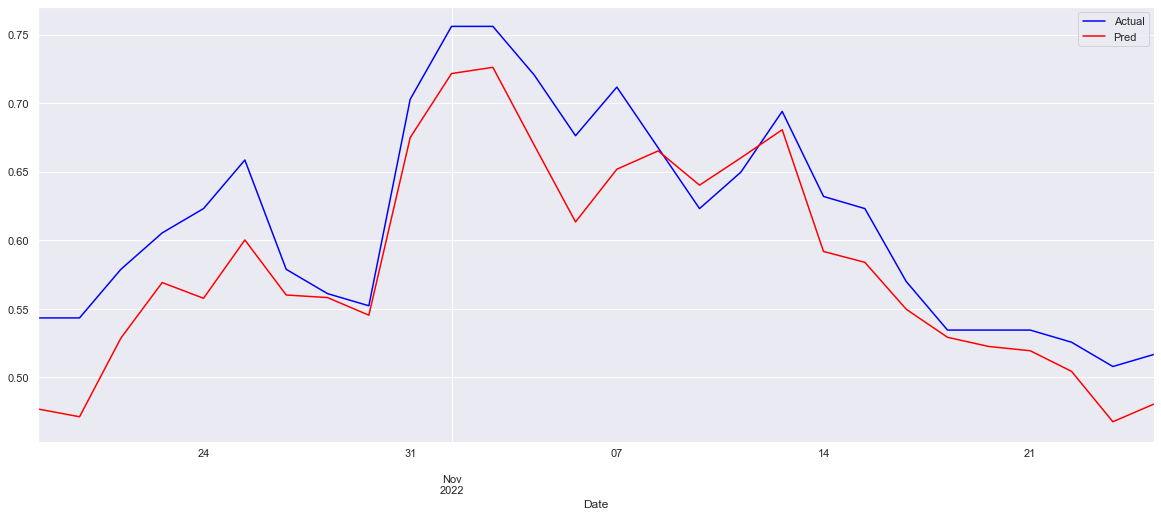

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/isat_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.tail(5)

,Pred,Actual
Date,,
2022-11-18,6266.175781,6300.0
2022-11-21,6257.479004,6300.0
2022-11-22,6215.070312,6275.0
2022-11-23,6111.341797,6225.0
2022-11-24,6147.915039,6250.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

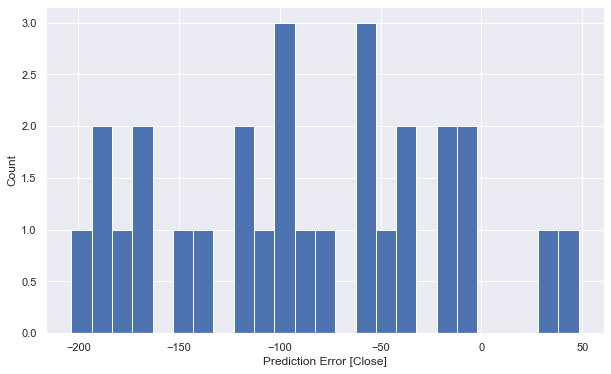

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

109.88386303079504

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

1.4118699800201906

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.725393305678924

### Save Model

In [28]:
# Save model
model.save_model('./models/isat.json')